# Answering Business Questions using SQL

This project will use SQL to answer business questions based off the [Chinook database](https://github.com/lerocha/chinook-database). The Chinook database represents a digital media store with tables for artists, albums, media tracks, invoices, and customers. The initial scenarios answered come from a dataquest project, with further analysis and scenarios added by me.

## Methodology
Using SQL (for analysis) and Python (for plotting) the following questions will be answered:

1. [Which albums should we purchase for the US store, based off the current best selling genres?](#q_1)
2. [How are sales staff performing?](#q_2)
3. [How are sales varying by country?](#q_3)
4. [Are customers purchasing whole albums or just individual tracks?](#q_4)
5. [Is the range of tracks in the store reflective of their sales popularity?](#q_5)
6. [How many tracks have been purchased vs not purchased?](#q_6)


## Results

1. I would recommend purchasing Red Tone (Punk), Slim Jim Bites (Blues), and Meteor and the Girls (Pop). However to increase sales quickly I would suggest adding some more Rock albums as these make up 53% of total sales.
2. The total sales per employee is correlated to their hire date, with sales increasing the longer an employee has been at the firm.
3. Sales are highest in the US where we have the most customers. It would also be worth looking into increasing the number of customers from the Czech Republic, Portugal, and India because these countries have the highest sales value per customer.
4. Whole album purchases make up almost a fifth (18.57%) of invoices.
5. There is a notable mismatch between the amount of stock held for some genres and their sales popularity. For example: Rock tracks make up over 55% of sales and yet represent only 37% of stock. It may be that increasing the variety of rock tracks will generate more sales given the genre's popularity with customers. Whilst Latin tracks comprise 16% of stock but only 3% of sales. It seems unprofitable to add any more Latin genre tracks to the store unless customer tastes are expected to shift favourably towards them in future.
6. Over 45% of tracks in the store have never been purchased. This suggests that management could save money by not stocking certain tracks, and should focus on artists/albums that are more popular with existing customers. When broken down by genre it becomes clear that tracks from certain genres should not be stocked at all.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

Connect Jupyter notebook to database file

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

### Database schema

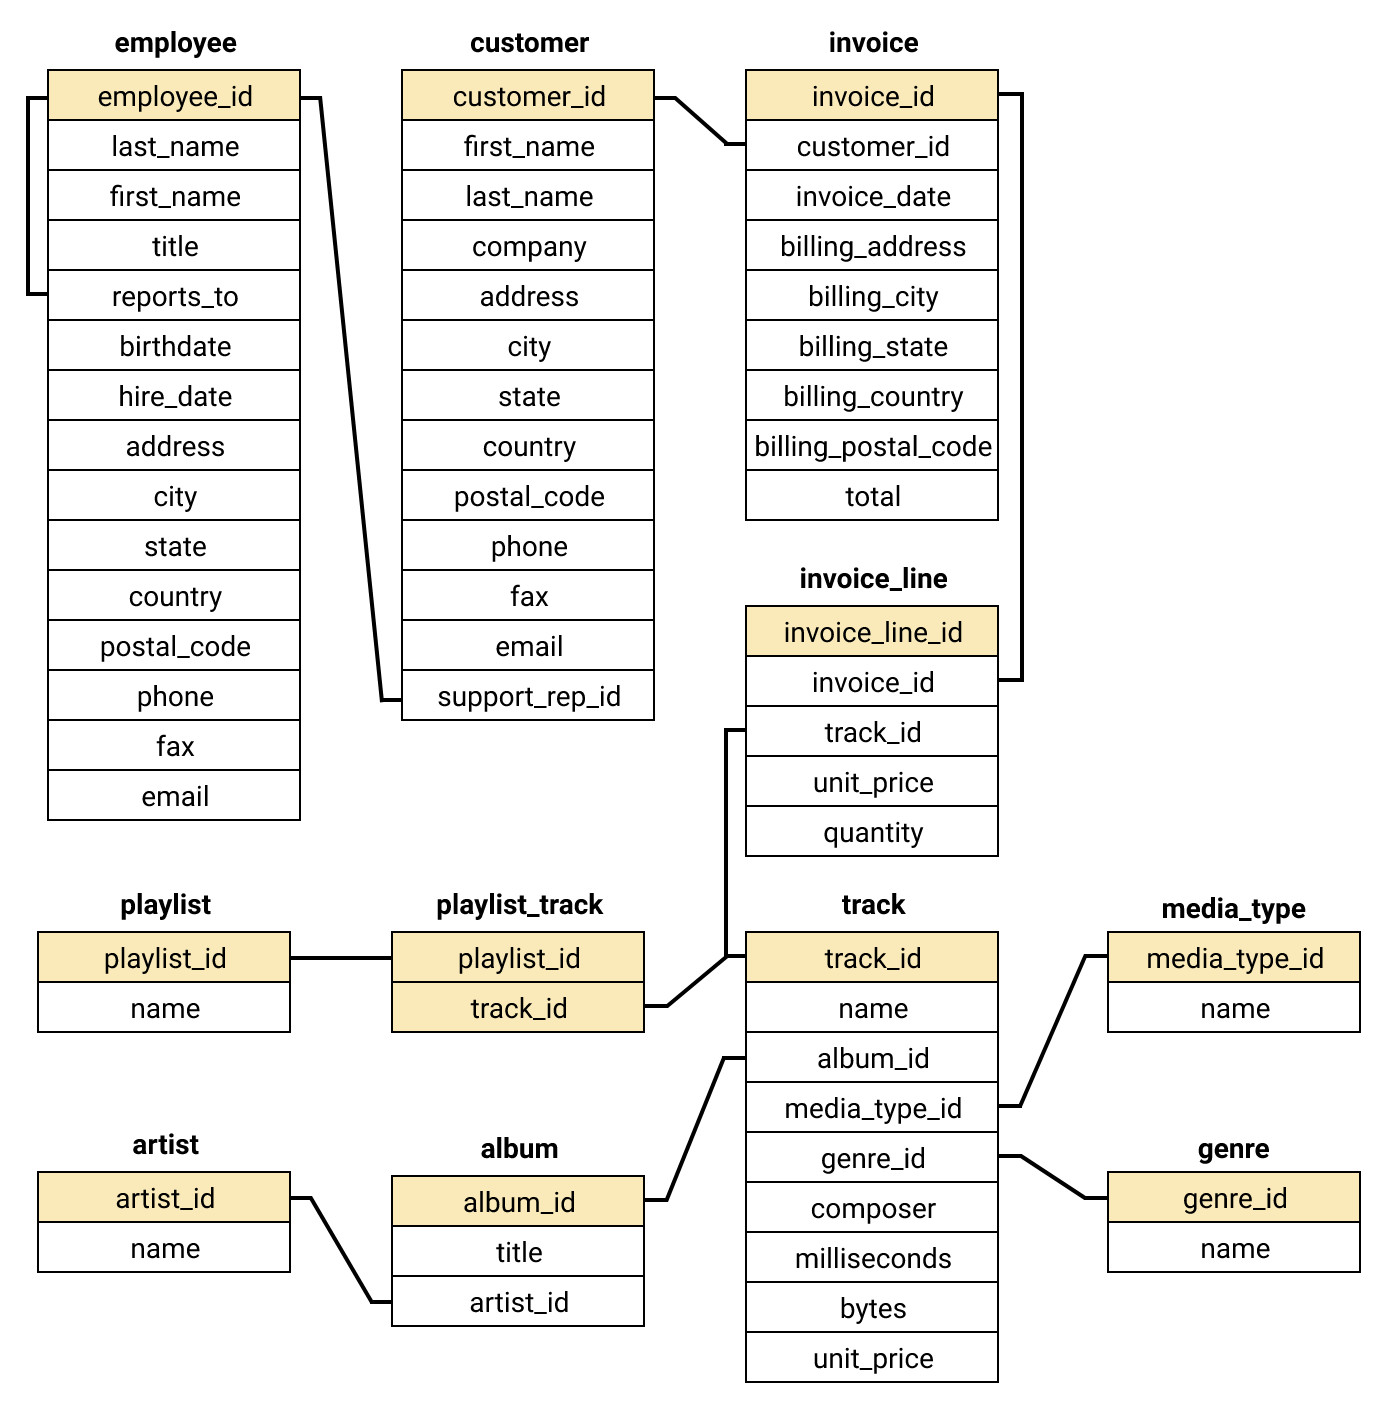

In [3]:
# Embed image using Base64 to encode the image data
from IPython import display 
from base64 import b64decode 
base64_data="/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAWABXADAREAAhEBAxEB/8QAHQABAAIDAQEBAQAAAAAAAAAAAAcIBQYJBAMCAf/EAHYQAAAEBAMDBgYLCA0HBwgEDwABAgMEBQYHCBESGCGWExQxV2jTCRUWIkHjKDI4SFFYdneltMQXGSNTYZHR1DM0OUJHSVJxgYWHscUkdHWys7XwN1ZiZ6Gm5CUmNnJzoqPCKUNjgoOSp8MnVFWEpME1RIaU1f/EABoBAQADAQEBAAAAAAAAAAAAAAADBAUCAQb/xAA/EQEAAgEABQoEBAYBAwUBAQAAAQIDBBETFFESFSExUlNxkaHRBTIzQWGBscEiNGJjkuHwI0JyJDVDovFEgv/aAAwDAQACEQMRAD8A6pgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1Srbs0PQM1l8sqesqfpyZTDLmcHNpoxCvRPnaS5NDiyNfnGRbiPeeQDawAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfGLi2ICFdiYl5uHh2kmtx51ZJQhJbzMzPcRF8JgPnLJrBTuAZjpdGMR8E8WpqJhXUuNrLPLNKkmZHvI+gB6gAAAAABj5hUMqlMdAwUdM4ODjY5RohIeIiENuRCi6SbSZ5qMvgLMBkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABo15L10dYKh4mrK4nLUmkzK0tJWpJrcfdVnpbaQnNS1nkZ5EXQRmeREZkFarYeFmsVc2tIOm9dQ0u9GPJh4aOn8E01CuOKPJKTW084aMzy3rJJFnvMgEn39xvW0w1XDp2kK3dmcHGTtluJajYeFS5Cw7SnlNa3VayUkkmlRnklW4t2fQAi2i/C3WDrGuW6cVFz2QMOuG01PZ1BNsS9R+gzWTqloI/5S0JIvSZAPxIvC5WEn1wWKYQ9UMHDPxJQrVQxkvQ3LjMzySsz5XlUoMzy1KaLLpPIt4CWcQ+Ne2+GCrqbp+uVzSHfnrfLMxUHCE8wy2ThIUt09RKIiM8z0pUeRHkR9ACL7d+FhsVca4cHSTDtQSVyNiChYWazeAbagnnFK0oLUh1a0EozIiNaEkWfnGkBXXwsnup7B/wD4P68gBe/Eji4tvhWk0HGVzNXURkdq5lKZe1y8ZEkn2ykozIiSX8pZpTnuzz3AI7w9+Eps3iNrFmlZPETenagisyg4Ko4VtjniiLM0trbdcQasuhJqIz9BGA2+hsaVAV5iDndmYaGncurSUqiUOImMGhph42TLVyayWZqJST1pMyLNO/d0AP7H40aAg8SzFjGmJzMK4cWhCuZwiFwrRmxzg9bhrIy0tecrJJ5fzgNGv34Tiy2H+tIulJk/OannsC4bMdD03CNvpg3C6W3HHXW0Goug0pNRpPceRkZEEwYesTFA4n6RdqChJqqMahnCZjYGKaNmKgnDLMkutnnlmWeSkmaTyPJR5HkEDXR8LHYm2FZRNOE9PqrehXDZiI6nYNp6EaWR5KTyjjzevLfvQSi3HkZgLJWYvZR9/wChYWrqImyJtJ31G2o9JodYdIiNTTiD3oWWZbj9BkZZkZGYb0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKa3Y8LBYy1NaRdNG5P6rioN1TEVF07BsvQrLiTyUnlHXm9eR570Eotx7wErweM22U2w8TO9EqmUTNqQliSKNbhGCOMhnDWhBtLaUotKyNxJ5GeRpMlEZkZGYZui8S9I13h1iL1S1uZJo9iWx80W2/DpTF8jBqeS9k2SzLVmwvSWrfu3lmAwFqsadsrsWVqS60JHRkioyn4xyCmEXO4cmltrQ2ys8koUs1Z8u2lJFvNR5EWeWYQnA+GEsXFTpmFfl9ZQEsdeNlM8iZS3zPd0q815TuX5Cbz/IA0nwneOJdv6Oo2nLYVVMpXVM4KDqZmcyokHCxModRFtkROGZmZqcQ2rTp6CI8/QAnHCPjRo66OGtNVTudRcGujJVAwtVTmdtpaQuMKGRyzqTSozWSnCVluI1GoiJOZ5ANCh/DGWDfqcpUpmrGII3Sb8dOStvmmX8vSTxvaf/AMFnu6AFhL1YqqCsZaOV3KnEVEzik5o8wzBxcjbRE8sTyFLbWnNaSNJpQZ55/AAgGeeGDsHJpnLYRpNUTRuLYZfdi4GWtm1Bm4lKjbd1vJUa0aslE2lZEZGRGeQDIXF8LXYOgJ3DS6GjZ3WBPMtvLjKcgm3YdklpJRJWp11szURKLUlJKNJ5pPJRGRBZSR3xoeoLQsXQhahhUUM7AqmHjd8zbbQ0nMlaiMsyUlRGk05Z6iNOWe4BVdrwxVgnKoKVGiq24I3Sb8dqlSOaEWft9PK8tp//AAWf5AE33+xl25w60VTFWVBER02kVSKylsXIWkRSHk8mThLIzWktJpMjIyM8wGIsNjxtjiSu1OaBobxxHxkslq5ouavwiGoF5pDjLaktmbnKGolPp6WyI9KjIz3ZhYsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQ7jAgqTmGGe4LFdPTSGpM5capg9JNJxiEJWlRG0S/NM9RJ3HuMsyAQLh0vfZzC1gVkVYySIquaW/RMnodL8whWlTByIciFpWfJJWSEo1pPIiPoyM8zMzMFS+F+sJTr0qba8pZ0cbDtRDqpZL2lJguUSSuTeNbyfPSR+cTevIyMukjIBKF1MetrrT2woq4UYubzqkqu1lLphJoNLpEpJEZodJa0GhXty05ZkbayPIyAbZe7FTQlgrTSm4lSvxj1PTZ2HagvFzKXXn1PNqdRpSaklloSpR7+ggGIrnGpbK2llqYuZVMdGySUVNDoiZRLYiGzmMYlSSWnSylR/vFJUajUSSJaczI1ERhHVkPCj2SvlWkHS0I/O6Vm8c4TMEmpIRphqJdP2raXGnXEpUfQRLNOZ5EWZmRGEfY5JbZGNxcWZXcGZVnCVkk4MpZDyFDRwT6OfK5EnVKUSmz5bVqUjeacvSRGQWNxMYyLa4UYCCXWswiXZnHJNyEksqZJ+MeQR5GskmpKUpzLLUtSSM8yLPI8g1TDd4RC0WJ+pzpqnYmaSSpFoW5DyqoIZDDsUlJalm0ptxxCjIiMzTqJWRGeWRGZB6MSvhA7SYW583IKmjJjOKkNtDrsmkEMh9+HQos0qdNa0IRmW8kmvVkZHlkZGYbBhmxm2zxXwccdFTCKYm0AgnYuSTZgmIxlszyJzSlSkLTnkRmhSiIzIjyzLMJzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcofDYTWZu1pZ+ULb5WSGzGRKGHHOSaffNxlKiUrMssk6CzzLSTh7yzAYXEnY3FFiQoKnJBGYcqLpKFk0Q25AR9PzaXMuJaNs2yh0mcYaeTUamz0kXShGX5QxmOCSTOIxI4TpPW8Clycrp6QQk8gYpaIlKnzjNMQ2tRGaHC1ayMyMyVv6SMBsHhjqSkkuupZY4OUwcGcYzEw8RzdhLfKtpfY0pVpIsyLWvL4NRgNm8NPRFPyG3VrYyVyWBlkQxHxME2qDh0M6WORQZN5JIvNI0JyL0b8ukBo3hJzTUd1sMBzFpuKRHyaC5y04klIcJb7WsjI+kjzPd+UBv/hqKJpOS21ttMoKVwEtn6Zm9BMHCspaWuE5HUtJkkizSlZNZZ+11nllqMBHfhBY+YTW5mEyNmxrVNYmRy16LNftjeU8wa8/y6jMBsl5JbBXA8M1TUhrlhqLpqHTCtwMNHElbDqUy1UQ0jSe4yVFmotJ9Jnl6QHy8MNIZXQl2bK1JR0BDSyt3VRS1uy9sm3XFMPQqoNRknLMyWt0iV0nlln5pZBl8fkEeGHHnaS/cOlUPJps603NnWUmatTBExE55elUI6hJF0noV0gPh4N2UzK898b8YiomEciI0lRTElbcLPKIiDU6aE9O9tpDLeW/zXfSAr74PWdXibndfTq19q6aunPH+QKaRtRxjDcRCocU6rJBOxDRmTqkmajIjzNtOZluATPY+xt+LBFidrid0TDUHKpvRM5iWYKUTODiGYKPNSXmG2mmX3FoJppyINGosiIiLPeWYRzgAiL0Q1qKpatdY2i7mSuNmK4eazKfxcKmJ/YW8oZSHYls+SJKjUXm5Gbi955GRBbjwVuHi6+HlVzIK4NMlTsomzsG/LmkTWFjEJebN9LySJl1w0nkpojNWXtC6cjAX9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaBiDmU0k1g7lTCSLcbnUJTMzfgVtHktL6YVxTZl+XURZAKK+Bpt9SFR4eq9jJpJJZNZrGVC5L4znkOh5S4NMIwpttRKI/MNTr+7oPM/gAfy6dmLKWbwN4g4azNbtVdCRzMvcmcOxPoaZognExaSb/AGEs2zURqLzjMz5MvgMBs+Gd9tfgbp2lLiFG3R1WIWRKLzVG7MDIj+A8jI/6SAQZgxtlJrx+DKudR85q6W0SmZVqvmk2m8QhmGTEtw0vebQs1GWZKNsyPLeRZmRHlkAx8+qq8GG7D/IKGvTZqmbp2IgnGFwc5lUaehSFLNbTiIqHWekj5Q9KltpNWvIzPVvDevCJTaip94N60Ext1ArldFxNRwbsugHFqUuFQcHMNTKjUpR5oXrSfnGWaTyPLIB8ceM3mcB4LrD1CQhrRAR0HTzcapHQpKZSpaEK/Ia0kr+dBAJfuTae2sP4KlCmZLKUQcNRMLNoSNS0gnPGCmUOE8TmWfKLeWZHv36zT0HkAppO5pM5j4ICRNTBTioaDuAcPAGvP9g5N5ZkWfo5RbvR+UBPWICiqfgvA+UZHQ8jl0PGty6SxaYhqFQlwnnHWycc1EWepXKLzPpPUefSAyFN2/ppXgZ4uMOQy/nj0liZi5ElDJJ1cSmOVpdNeWZqIkILPPoSRdG4BXmo6inDHgeqWg4V50oJ6vVwUWhstxw2US+SVfk5dLat/pIgG309QOIq7WDeR0BTeHmioqh5jLId6BqOGmcE3HOKI0uc7zXFkaXlKJWrUkjLUpJkW8gGsYv7dVnabAHYWk68gjl0/ls8maebHFsxWhlanHGsnGlrQotKyyyUeRZFuyyAdVMNtl6DtpbakYyl6PksjmLsjhkPTCCgW24p8ltNrXyjxFrXqUlKj1GeZpIz6CAS8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK/wCPz3G12P8AQy/9dADnXOf3FyQ/KZX154BM1Q0XT7HgZ2otuRy5uLORQsYcQmFQTnLnHt5u6ss9Z5nmrp3gNctpZ872+BwXLW2ziJpI3ZjPZaR5maXYaLfWtKS+FTSn0EXwuAK7zK5UfjAoTCpYeAiHXI+AcdgZryajVyTaXuRYWZejkoNpa/yEo/QAnbG/T0qmfhJbC0XPodtNDsQkmhIaWvozhjZOMdRyek9xpWaEtnn6CIt+WQDP+Gmo6lqfo62U8l0DBSmpymL8Ky5BspZdchktpWrenIzJtfJ5fyTcPLLM8w07HXHzCaYusKkbNiMprEyuRPRZH6HlR+a/QX74z9BfzEAzdcy+DrXw2UtlNWtNzGTQyWEwMLHoJbPmSU32kkSt2RRBqUXTmvdlvAW3uNh6sA7ino2tpvU0BSV04fmrktkkLOIWBcmRpcWlpZwplyjxrPU1mn2xI0/vQHNyzc9ulMMel251RVvJHcqvWZhNlKl1SRTTRQTZRnJrca5V5ojUgjS1uMzJKj3EWYCw+GbDzf2XY/oW69W2ylVvZHMmYnx3CSSbQS4dpK4JxCFEy3ELcMnIhttR7j881HuyPIOn4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACF8VOFOkMWdv0U5U/LQUXCOHESycQhFy8C6ZERmRHuUhRERKQe4yIugySogqlT/AIKSr4pyWSWtcRlV1BQUrdbXDSCF5dlJJbPNBNk5EONsmnIsjShWXoyATPiPwIpxAX1txcVFbrkCKORCITLHJaqNVFkxFG/vfU+k0mrPTmaVH6Tz6AH0xm4GNrqqqFnPlt5KeTHLfgPFPPOc61tL9ty7ejLksuhXT+TeGVxvYNdsmlaak3lf5IeJo1yM5fxZz7ltaNGnTyzenLpzzP8AmAUa8KzRLTV3sPlIPxbjjCZQzKXIplJNrUnnDbRrSR5kk8t5Fvy/KAm2TeCai5/c2VTy6l5p7c6nJQsuaSmaNuqecaJWpLC3nH3NDe4iUlCS1FnloATDivwKpxPXRt/WCa1Kl00mSSKAKU86KJJL6Xfb8s3o9rp9qr4fyAPTjFwF05ivjpRUbM+i6LryTtpZg59BNcqRtpWa0Icb1IM9KlKNKkrSaTUfT0AI2st4ME6du3K7j3buhN7tz+UuIegWpilzQlxs82lOuOuurcJB+clBaSIyLPMsyMNb8MHcu2kfYxyiY6dQsTcWCmsJGS+VQ6yVEQxmk9a3SLehs2XF5Z9KjR05bgsTgCsuuxeFWiZFGQ3NZzHQ5ziZoUnSsoiIPlNKy/lIQbbZ/wDswEH3X8FkmLujMK9s3dCb2hmszccci4WXJcJtKnD1Oci4y60ttBnvNs9Sd+7SREkBM2FHBlD4cZfVb08redXHqCqtJTiMnC1FDvklJp/YFLXqUZKNJrWpRmRERaSzIwgOoPBQTOla2ms4steyoLVyuaLPl5XB8vm2gzz5NLzUQ2paEmfmpWRmXpUfSAs/hPwuwGFehZhI4ep5vVswmkaqYzCZTV08nX1ERKU21qMm88szPNSlH7ZR5ERBNwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8PMtxDS2nUJcaWk0qQssyUR7jIy9JAOeVW+Caj5TVk9jLRXnnls6dnyjKPkcMh5SOTMzPktTT7fKNlqUSUOEeRHlqPMzATzaTANbu1WHeprTJXGTaCqhtRTqbvGlETEOGWSFoLI0t8nkRoTkZEZZnqMzMwrhTXghaglcmmtJxmIKovufxROOJp+XQrjDDrxl+DceaOIU0rSskKMtOatORGg8jIJhtR4Nql6Owu1RZSrajeq+WzqdLnjc1hYEpe/BPGyw0hTaTcdLUk2DPMzyMlmk05Z5hF7vgsK+m9NQVAzvEdO5jayDdQtmQFLVErk0q1JbLU+pKdP73MlJIyIyQXQQWMvFglo26GGCW2UgYqIpyTSdLCpTHtp5dyGea1ETq05pJ01EtzUWaczcMyyPLINBs34PdynbFVfau6Fwpjcmm5xzZEtZUlxkpGlglaDhOUddJs81JPJKST5mRkojMgENNeCAqJ6Fh6Uj8QM+ibZQ8TzlunEwjhIT52o9LZxBsoXvV+E5M9556d+QCxt98CdPXSwx09ZSlpyVCyKRxjEVDxJwPPlK5NLpK1p5RvNa1OqWpefSZ7t+4PVcXBr5fYNpPYbyv5h4vgoCD8oPFnKcpzZaFaub8sWWrRllyh5Z9JgPVLMIfi7BauwHlZymqWPS7yh8W5e3fU7r5vyvo1ZZcp6M8/QAxtosClNUPhWmFjKtmyq1kcdEPRDsc3CcxcSpa0rQptPKOaVoUkjJWZ5mW8ssyMK8wfgl60kkNFUvJcR9Syu3EStRuyFlh9KFoUeakLbTEpZUZ+lRoyPp0+gBMeInwd0uvXY+3FspRXEdTksoozKHjZlCHNIiJRyegiWZutacvRl5pFklKUkREQWqpOReS9KyaTcvznxdBMwfL6NHKcmgkatOZ5Z5Z5Znl8IDLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACP7/Wo+7lZqrKC8aeJPH0EcH4w5vzjkMzI9XJ6kaujo1F/OArrG+Ds53gtgLAfdA0c1mZzHyh8S56s31u6Ob843e3yz5T0Z5egBv8AM8IfjHBaiwHlZyemWMy7yh8W5+0fS7r5vyvp05Zcp6c8/QA2nCnh5RhlsdKrcuTxNUogXYlxUeqC5qTpPOqcNJtco5llqy9seeXo6AEF4XPBlSLDNfuPuOzV6qgYSzFtSmULlfNzl/LKIiUb3LL5Q0tGtv2ic9Znu6AEk4xMEdKYvZPKlTCYxFM1VJzV4un8E0Ti20KMjU042Zp5RGZEoi1JNJ7yMs1EoIKt34KmIibgSap70XanN2mZKaeZSmPS8bRpSeaUOOPPOK5LVkfJpJJHlvMyMyASxiYwMbRN/be3M8tvJ/yS5r/5L8U8553yMUcR+y8ujRnnp9qrLp39AD+4vcA8ixPz+UVhK6kjaBuHKUIbhp/L2zc1oQo1tktJLQrUhRnpcSolFnv1EREQajh08G4m2l3Ia6Ny7jzW7FawX7QfmSV6GFEk0pcWp1xxbqkkZ6czSSTPPIzIjIP3iW8GpLLu3SVc639cTG1leuuE9FRsubUpt50k6eVRybja2XDL2ykqMldJpzNSjDZsKeByY2Dr2Z19V91ajuVWkfB8wXExz7qGCZ1ErJaVuuLeMjLzTUrSnMzJOeRkFrgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARpc7Ddba8tSySoKzpaHns4kmXi+KefeQcPksllkSFpI/OIj3kYCSwAAAAEQ1ThItDW9127k1BREFOKzRyWUfGOvOIzaIibM2DXyRmkiLIzRnuL4AEvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANfuFWsDbWgKlq+ZtRD8tkEsiZrFNQiUqeW0w0p1aUEpSSNRpQZERmRZ5ZmXSArJK/CPSmeSyEmUtsNfOYS6MZREQ0XC0ch1p9paSUhaFpiDJSVEZGRkeRkZGQrzpGGs6pvGvxhJGO89MRL0/fCYX4vV+uCi/WB5vODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zlt9kMZ0gvfdKLt+3QdfUPUcPJlz3kazk7cvJyFS+2xqQXLKWea3MiPTpPQvfmWQmpkpkjXSYmPwczWa9EwsGO3IAAAAAAAAAAAAAAKoTLwiNOs1XVUilForuVaqm5zFyKOmFOU03GwnOodw0OJS4mI/mURKIlaVJMyLMQ3zY8c6r2iJ/GXcUtbpiH4++Ewvxer9cFF+sDjecHeR5w92d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mX7lvhEadequlZFN7RXcpJVSTmEkUDMKjppuChOdRDhIbSpxUR/OoySRq0pUZEeQ7pmx5J1UtEz+EvJpavTMLXiZwAAAAAAAAAAAAAKoTLwiNOs1XVUilForuVaqm5zFyKOmFOU03GwnOodw0OJS4mI/mURKIlaVJMyLMQ3zY8c6r2iJ/GXcUtbpiH4++Ewvxer9cFF+sDjecHeR5w92d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mX7lvhEadequlZFN7RXcpJVSTmEkUDMKjppuChOdRDhIbSpxUR/OoySRq0pUZEeQ7pmx5J1UtEz+EvJpavTMLXiZwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgGl4Xfcz2k+SEo+pND4DSfr5PGf1bmP5K+CThWSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr1TX7p+58zp/76IfW/CPoT4/tDL0r548FwBtqYAAAAAAAAAAAAAAKYYKv29iK+eKo/wC9gfJfF/rx4fvLU0X5J8VlBiLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK141f29h1+eKnP73xt/CPrz4fvCnpXyR4rnj61lgAAAAAAAAAAAACmGCr9vYivniqP+9gfJfF/rx4fvLU0X5J8VlBiLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK141f29h1+eKnP73xt/CPrz4fvCnpXyR4rnj61lgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4BpeF33M9pPkhKPqTQ+A0n6+Txn9W5j+Svgk4VkgAAAAAAAAAAAAAAI2+71T/3fvuQ8zmXlL4l8e865JvmfIcpo06tevXn6NGWXpFjYW2O2+2vUj5ccvkfdJIrpAAAAAAAAAAAaVbe8tH3cfqJmk5wmbLp+YLlcx0suNkzEJ9skjWktRdOSk5pPI8jE2TDfFq5catfTDit4tr1fZuohdo2svfqn76eV3iGDmUJ5Mzp+RRnjFptHKPtZalN6FrzQee4z0n+QhYzYLYOTyvvGtHS8X16vskkV0gAAAAAr1TX7p+58zp/76IfW/CPoT4/tDL0r548FwBtqYAAAAAAAAAAAAAAKYYKv29iK+eKo/wC9gfJfF/rx4fvLU0X5J8VlBiLgAAAAAAAAAAAAA+L0bDw7zLTr7TTrxmTaFrIlLMunSR9PSXQPdUj7DwAAAAAAAAAAAAaRSt6aMrW4FUUTJZ0iNqameT8awJMuJ5DWXm5LUkkr+A9Jnke48hNbDelK5LR0T1OIvWZmsdcN3ELtG1D36p+v7s15b2XwcyZnVG828YPxLTaYZ3l0akckpKzUeRFv1JT+TMWL4LY8dcs9Vv2RxeLWmsfZJIrpAAAAABWvGr+3sOvzxU5/e+Nv4R9efD94U9K+SPFc8fWssAAAAAAAAAAAAAUwwVft7EV88VR/3sD5L4v9ePD95ami/JPisoMRcAAAAAAAAarc+6FM2bomYVbV8y8UyCB0E/Fci48aTWtKEESG0qUZmpSS3F6czyIjMS4sV814pSNcy5taKRrlnZJOYKopNATaXPlFS+Ph24qGfSRkTjS0kpCiI8jLMjI94jtE1mYnrh7E641w9o8egAAAADS6SvHSNc1xVdISSbFG1DSy2m5tCEy4jm6nCM0ZKUkkr6DI9JnkZZHkJr4b0pW9o6J6nEXiZmI+zdBC7AAAAAGkQ16KOjLtRds2ZwldawsAUzelvIueawZpIlcpp0Z+ek9OrPJRHkJpw3jHtdX8PU45deVyfu3cQu0bS6/VPzO/00tC1BzJNSy6SpnrsUtpsoNTBuNt6Uq16zXm6ncaCLIj3/DYnBaMMZ/tM6kfLib8j7pJFdIAAAAAAAArXjV/b2HX54qc/vfG38I+vPh+8KelfJHiuePrWWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgGl4Xfcz2k+SEo+pND4DSfr5PGf1bmP5K+CThWSAAAAACC8ReIyPtZPaVoejKdKsLl1WtZSyVOPcjDsMoIzciX19JITkZ5FlmSVby0i7o+jxli2TJOqteuf2Q5MnJmK1jXMtEkmI+7dqrr0jSF9aZpeHllYRBQEoqOjXXzhmow9OmHfQ+o1ZqNRJJRZFmZZaiJRlPbR8OXHa+jzOuvXE8PycRkvW0Rkjr4PlXGKK6i8T9WWdt/RMjnsXASuHjoaYzOJcYZhSWhpS3YkyM9SCNzSSEESjNRb9x5+00bDsK58lpjXP/NROS/LmlYak9jGvhbe6J2rry2chnlfTuEQ/S66Ui3GoCKUa1JUb6nlqUltBIdWpW4y5PLSRKJZS7po+THtsd5isdevrcbXJW3ItHT9mzQWJK9Np7w0LSl6qWpFEirWM8Wy2c0g/EGUNFnpJDTpPKM1GaloTuJJbzMjVpMhFOj4MuK18Fp116ZidXU62l62iLx1szfDE3cKi8S8mtJQtGSyqI2c00mawzsdErhyh3ziHkKW8sjy5FCGTUZEnUpRkRHvHOHRsV8E5sltWqdX/AD8XV8lovyKwxNO4nbs2wvTSdBX2pamYGDrB04SSVFSLr5wpxWaSSy4h5SlZqUtKc/N3rTuMszLq2jYcuK2TR7T/AA9cS8jJetorkjreT+NQ/s5+1D3/APg//wBfs8/+f8mx1niQuNXV4qgttY2m5BNIymCbKfVLVj7yJbCPL3ph0oZycWvIlEZl0GlW7JOZx00fFTFGXSJmNfVEdbqclptNccdT22YxKVfMLtTGz92KellMXEbgPGUtjZM449LJrD7yNbRLPWk0mlR6VKzMkr9qad/mbR6RjjPhnXXqnX1wUyTyuReOll8I+Iec33ktZQVWSuBkVZ0nPHpPMpdAGvk0kn2jhEszPI1JdT0//VmY40vR64JrNJ11tGuHWLJN4nX1w1m1GMrypoG8Fy6ng4SW24pKbPQEni4JC1REwbaPLUepWlSnDcYSki0lqUZGe7MpMuh8m+PFT5rR0/g5rl1xa09UNTisRGJxVALurD2wo9qgUw3jTycfjok58cDp1m5rLJoj0edp0asv3hnuE0aPonL2M3nldWvo1a3HLy6uXqjV6pSrjGNSVKYbZPd6DhYqbQs+QyzJ5O3kmJi4x3MihsyzIlJUhzUZZ5E2rLUeRHVpol755wT0auufw4pZyxFOWjCrMR2IyyEgha9udbyj3aAN1oplB03GPqmspacWSCW6a1KacNJqIjJG4zMt6SPMrNNH0XPOzxXnlfbX1SjnJkpHKtHQuDKZpCTyVwcygH0xMDGMoiId9HtXG1pJSVF+QyMjGTMTWdUrUTr6XqHgrhhjv3D1rJLxzicSaS0rLqTqiYw0TEStg2kvtMJJS4l/eepw0lmpXpyGhpOCaTjrWZmbRH/4gx31xaZ6NUtEt/iPxF31l8TXNurd0g1bnnDiZdCVHGvszWbNNqNJqaWlXJNmoyMvPTpIyMs1ZZnPk0fRcE7PLeeV+HVDiuTJf+KsdDzeDImb86p+80wiYB6VxMXXkbEOwMR+yQy1IQo21/8ASSZmR/lIe/Eo5NscROv+GHmjzri0/iumMdbAAAAAFeqa/dP3PmdP/fRD634R9CfH9oZelfPHguANtTAAAAAAAAAAAAAABTDBV+3sRXzxVH/ewPkvi/148P3lqaL8k+KygxFwAAAAAa5cevpRayhJ7V0+eUzKJPCLi4hSCzWaUluSkvSpR5JIvSZkJMeO2W8Ur1y5taKxMyq1A33xR1dQxXLp221Es0Y8x4wg6cmEZFKnsVB5GpK0qSZMkpSMlERlmeZZJPMhpzg0Sl9la88rj0atf6q/LyzHKiI1erLXLxw8ywuUbd+iZVDRSZ/N4eWOwE21nzZSjdQ8kzQaTNSVtGRH0GWR5bxxj0LXpFsGSeqNfQ9tm/gi9Uw4nbrzGx1iatrmUwcLHzCTsNusw0Zq5JZqebbMlaTI+hZnuP0Cpo2KM+WuOeqUuS00rNoaHeHFdGWusVb2p4WQNzytK5KXwkplCHeShzjIlpK/PWZ5k2k1ZdOZmaSzLM1FPh0WMuW1JnVWuvXP4Q4vk5NYnV0y1WLv7iAs1VdLHdqh6Um1Hz6Obl65nQa4tx6VOLzMlPoeNRrSREZmaSIskq84zyScsYNGzVtsbTFo46ulzy8lJjlx0fgiHGDMbybWljspRSOtidTTyPLnMRlEpyh9XPv5B6eTy5P0mr8gt6JGDd8nTPVGv16kWXl7SvosferEnUFkaIoWWxdNwlSXgq1xEDA05Kn1JhFxJEnll8oosyZQa07z3nqLoLUpOdh0eua9pidVK/ef+dae+SaREaumWiVPiSvlh1ipNO720lR0Xb+YxTcHFTiiH4o3ZOtw/NU+h8z5RPoPQWXwKMzSlU9dH0fSImuj2nlR9p1dPk4nJkx9N46PwbfiixPVNZOu7SyGkaWhK0XW70awmF5wbTi1tph+R5N3PQlJqfzUpRGRJTmItG0amamS17auTq/d1kyTSaxEa9aN7kYsr7YZZrJZtd+g6UmVDzeJOBbeop+IXFwz5pUtttRvK0rUZJVuJKSPSrI92R2Mei6PpMTXBaeVHFxbLkx9N46Pwfe5WJfEfZKm03Gra3FHN27Q8zz2Uy6YPrnEA06tKEco6Z8kpRKUlJ6UGWai6CzMvMejaLmtssd55XpJbJkpHKtEak03+xNSyzVuZBPZbLHapntUxEPBU3JGF8k5MH3iI0ZmZGaEERlmeR71JLpUQp4NGnNeazOqI654Jb5IpETH3RLUWJS+tgH5HUN66Oo8reTOLbg4uOpCIiFxUlU4Z6FRBOqNLhFlkZt7t248zSk7ddG0fPrrgtPKjj9/BHOTJTpvHQzOI7FfXNrb+0fbWiKNgayjamlC4qDZW6ptw4jU6STNeokpZSlvlFmZZ6Uq3l0lxo+i48uG2XJbVql7ky2reK1jXrTfZWPuLMaHbeulLpJKqrOIcJcPT6lqhSZz/BmRrWs9WWee/wDoFLNGKL/9GZmPxTU5Wr+Prb4IHav1m7wvVlifvXRa6fk8ubprxdpmsGwaIuO5RozLnC8/O09CfgIX82LkYMeTXPTr/JBS2u9q6upHcixO3rxAVVUMVY2k6Rdt7I41cu8eVe/EJXNXkZGs4fkVFpTkZZGpKiyUkzMjM0lYto2DBWI0i08qftH28XEZL3mdnHQ1zBBUU5qvFxiLmdQyBymJ66mVIjZS46TvN3kNrQokrLctBmnUlRdKVJP0jvTa1po+KKzrjp6XOGZnJaZhegYq4AAAAAK141f29h1+eKnP73xt/CPrz4fvCnpXyR4rnj61lgAAAAAAAAAAAACmGCr9vYivniqP+9gfJfF/rx4fvLU0X5J8VlBiLgAAAAAAACF8ZFzHLPYbqwq5qSSuo1y8oRPiycs8rCPk5FstGTiMyzyJw1F+UiFzQ8e2z1pr1a9fV4IstuRSZaLiLxXT+xlIWdmsopiGny6vjYWFipYwhZvaFttqNuFIlEXKHqNKSVmWeWYn0fRa57ZItbVyf+dLjJlmkVmI62n3HxQ4gLAolNZ3NoGj2LbRcczDRkPIo19+aSxDueRuLUfJuKTkftEZKPIs055iXHo2jZ9ePFaeV+PVLi2TJT+K0dCXa9v9Obf4nrdUFHy6AOi61gYgoOcFrJ9Ee0SlG0Z6tJpUk2iLdmZufkFTHgrkwXyRP8Vft+CW15reK/aX7u5fmdUnf+1VsKYl0DMo+p1vxk3cjNZnAy9kiNTidKiyUokukk1ZlqQRZHnkGLBW+G+a89XV4lrzF4rH3adV+JS4twLxVFbexdOU/M4qltCJ9U1WPvJl0M+rPKHQhjJxSy0qIzI+lCiyyTmc1NGxY8UZdImY19UR1+rmclrWmuOOpk7H4lqrml3JjaC7lNwFMXCh4M5lAxUmdWuWzaFI8jWxrM1kZZKPIzM8krz0mkyHObRqRjjPhnXXq6euHtMkzbkXjpe6wN4Xa+v1fmmXafk0pRScfAMJmMAwbcTMCcQ/50Soz880k0REe7IjMc58Ozw4r65nla/y6uopflXtGrqaJJMSN7MQcbP5rYulqOTQcqi3IGHndaPxJLnDreWs4dtgy0pzMsjXuP4SPUlM9tH0fR4iNItPKn7Rq6PHW4jJe+uccRq/FvNj8W0FXVva7mlcSryJqO3zjrFUy03OVRDm2lSuUaV++SskL0lvPNJkRqzIzgz6LNL1jHOuLdTumXlRM26NXWjmT4hsS9yaNXcqibZ0izQa0KioCSTmLiFTyZQqc/wjZtmTSTWSc0pUWe8stZGRnYnR9Ex22WS88rjHVDiL5bRyqx0eqxFgb0yjEFaaQ11JmVwsNMm1cpBuqJS4Z5CjQ40o8izyUk8jyLMsjyLMUM+G2j5Jx2+yel4vWLQkIV3av0hu+9MMcNR23OnpO01A0eialPW2DKYOfh2E8gpzPe0XKmenLpIhfth1aLGXXPXq1fZBFv8AqzXV9mlTvE1dm6l36rouxNLUzGy2kHuZzmpKveeKFXFkZkphlLKiVmRpUWfne1PMklpNU1dGw4sdcmkWnXbqiHM5L2tNccdTQMO9R1ZUvhIazdrim26XqeGoAoaLhIaI5eGdNMVB6XmHPS2tJkoiPek80nvSYn0itK6FXZzrjlftKOkzOaeVHTqX1GGugAAAAAAAKg+Eurr7l9urT1lzHxn5O3IlM35lyvJc45uzFO8nr0q06tGWrSeWeeR9A2/hH158P3hT0r5I8USffzv+pP8A71/+CH1rLPv53/Un/wB6/wDwQB9/O/6k/wDvX/4IB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcVsUdi9pTwsNTW48d+Tnjrmv/lPmnOuR5GRNP/sWtGrPktPtiy1Z78sjCVfvGP8A12f91P8AxoDVLseBr+5faysqy+6/4z8nZLGzfmXkzyXOObsLd5PXztWnVoy1aTyzzyPoAX2wu+5ntJ8kJR9SaHwGk/XyeM/q3MfyV8EnCskAAAAAHPvF1Sq3MfFso6cVpObeSOd02uUQNSyh9EOtmLQ7EKNjlFEZES+VbLf0m4RdA3tEt/6O8VrFpideqeHQpZY/6sa51N0rrCXTEvqihE3BxC1pMYxM8h4iQy2oZnDuE/GoPUgkIU3vM8tOf/SIulREcNNKvNbbPFHV06o+zq2KNccq0vdbL906vB8kID+6FHOT+Rx+M/u9r9a3gXs/dI8Ov+iJz9TiQw/yWXxj9YL/AFq/mY9f+UzC/wDONAf7ZkNB+TN/4yZvmp4vFcGdy+SeFPt+cwjWIEoqgFQrBxDhIJx1UVGaUEZ9KjyPIvSe4h1jrNvh9tUf937Q8tMRnjXwfjH5MoWqrl4faBlTyYqq36zhZpzVg0qdh4Vs/PdWW/SnIzVmZZGTaz36Q0GJrjy5J6uTqM867VrHXre/+NQ/s5+1Dn/+D/8A1+z3/wCf8nhwQTOHom++Ii389dRC1c/Vj89YS+elyPg3lLUhxGZ+cREaVHl0cqXTvy602JvhxZK9WrV4S8w9FrVnr1v1cmOhbi+EntLAU46UZFUXJphFz+KhFayhEOtONtsuGR5Eo1LSRl05PF09AY4nHoN5t/3TGot/Fmrq+yMsVdZxeDvERcSppahxmW3To55qEKHQeSJ2zpaQvIi6SSvX+VTx5izotI0vDSk9dJ9EeSdleZj7x6tnv9YKZ218F4mi4CEWqZyiDgplNmGUkalOHEofi8/hJClrPP8Akt/AWQiwZ4yaftJ6p1xHl0Or0muDkwzNBWAgbhWXllWw2Jq4hUhGStLj63JywmGh2+TycaczRkjRvQpKujIyMcZM848s0nDXXr4Oq05VdfLnUifE3a6nLdYUrCu0dV0znVs5FVaIxypYRSVRMNDxDrjhvp0IyJSFm4RGacyWaUmWZ5C1o2W+TSMvLrqtMdXgiyViuOvJno1peuJhcp+MtZHTWssT1dxVARkOlT8TMJ3DuQUQ0ZkaSI+TMl5mRZEWZmeWWZipj0m0ZIjHhjleE60tsccnXa86lsrZ05L6PtxSkhlMeqayqVymEgYSPW4lw4llplCEOmpPmqNSUkrMtx57hl5LTe9rWjVMys1iIiIhsgjdOeuHympjWWHzGDI5Qhx2Zx9S1AxDMtEZqdcNg9LZEXpUfm/0jez2imbR7W6oiqjSJml4j8U9YD7jU5PsIlFRENMYOHbkMv5hNErdSgoN1kzJfK5n5mZES8zyzJRH6RR07Hauk2iY6+pPhtE44aD4NKbQc/lN7JpL30xUBG1/HxMO+j2rja0oUhRfkMjI/wCkT/EYms44nr5MI9HnXypjiucMhbAAAAAHPrFjhS2wcdkuo3yp8kuY23bm/PfF/PdeiaPNcno5VvLPl89Wo/a5Zb8y+t+EfQnx/aGXpXzx4MX94x/67P8Aup/40bam0K/HggHbLWdq2umbq+PlyCAXHnLvJzm/LpRkai5TnS9O7M89J9AC4ngj5743wYSOF1Z+K5rMIPL4M3jey/8Ajf8AaAuaAAAAAAAAAAACmGCr9vYivniqP+9gfJfF/rx4fvLU0X5J8VlBiLgAAAAArz4QWm5jVmDu5MBKmFxMWmEh4w22yzUbTEWy+6eX5G21n/QL+gWimk0mf+dCDPEzjnU2+zl1qTjcN9L1o3OYNimoSQw7sVFqdSSIXk2Uk4hZ55JUgyNJp9BlkIs2K8Z7Y9XTrd0tHIi32VZxu3NkV3cE9JVzTUtjpZTT1VQcShMbCEwtDSFvtm4aEmZEk1FuPPfmXwjT0LFbDpVsd56dUq2a0XxxaOrWl3wh1YyJnBpWa1zeCJM5hoZuWmT6T54o4hpZE1kfn+aRq3Z7iM+gVPh9LbzXo6utLnmNnLX7nOWknWG2x9G3cRGQ8BUUDLGJVNYUzaKAjShWkocN/PJo8nFb1EaTIlZluEmLbVz5MmH7a9ccY1ubciaVrf7tPulMbn4HIijZxB3YjboUbN5zDylymKpaQ/MVIczPWxEl56zIkmXoSRmnMlZ7pcUYdN5VZpybRGvXHV5ObcrDqmLa4bZjHdRC4sMJr7y0tMFOpo2bqz0pJSkwZJTme7Mz3EXpEeidOj5/CP3dZfqUeLFRHsW5xu4d6/qJ8oOjktzCTuRz2RMQ0U6y6hBuKPcjUbyDzM8sm1Hu0mY90WJyaLlx1+bol5k/hy1tPU2fwlFXSeXYVKgp995uJnVTvQcDJ5a2ep6LeKKZczbSW9RJJGrMiyz0l0qIR/DqWnSItHVGvX5OtImNnMcWg3xkcZTF7sD8nmJ6phLzi4SIPVqzdbhoFC9/p3kYnwWi2LSbR1Tq/WXF41WxxLZvCa/8mdq/nGlX+xihF8N+e/8A4z+zrSPljxb14Qn3G9y/8zY+tMiHQP5mn/Ps7z/TlWPFlJVFQ2Dmo4+czClqYl7LEFMKjlq9D0sXEQsEbTxKMjJORMOqzy3EkxpaLP8AHpFYjXM/bjqmVfLHRSfski8GEymHbe6rkYla5eo2YOw6UnOZxDrhYhalpNk06mzJW/SojLoIs+gjMVsOlX5f/Swxyo4RKS+KNX8V51PhciWpk/hL8OkAh9yJRC0pGsE+6ZGtwkwkenUoy9J5ZmPcc69Byz+MfrDy3Rmr4LxjFXABTLD9CuR2NnFXDMr5N15mVtoWZmWkzhlER7v5xr551aLgnx/VUp9S77eC8qOXwuHqLomIcagappScR0LOJa6okvsKN01EtaenTvNGrozbUXoD4nWZzbSOq0Rqe6PMcjk/eHhwjVLKqvxr4mprJY9iZy11csbbi4Zettw20LbXpUW4yJSFFmW48syzIe6XWaaLhi0ap6XmKYnJeYXVGOtgAAAACoPhLqF+6hbq09G8+8WeUVyJTKOe8lyvN+cMxTXKaNSdWnXnp1FnllmXSNv4R9efD94U9K+SPFEn3jH/AK7P+6n/AI0fWss+8Y/9dn/dT/xoDQK+wpXp8GPPYC6lt6oOtqbaSTc6W1AKh20o1fscXDE65qZPdk6Ss0q/kHpMw6N4TMYdFYtaM8ZSB4pdUMGhPjWnolwjiINZ7tRdHKNGftXCLf0GSVZkQTwAAAAAAAAAphgq/b2Ir54qj/vYHyXxf68eH7y1NF+SfFZQYi4AAAAAAAArJ4Sv3FFxv6t/3lCjS+HfzVPz/SVfSPpyjHFJ7zL5XyT7MLOi/wD9HhP7o8n/AMfjDevChe44qv8AzyA+tNiD4Z/M1/P9HekfTl9satEx85wyyespCg/Ki3z0DVUuWkt/+Tkk3iP06eTNSzL0m2keaFeIzzS3VbXE/mZY105UdcdLB4RZsxiJxA3OvyhC1SRDMNSlN8ujJTbLbaHYoyzL0uKSZGX8tZCTS43fDTR/v1z+zzFO0vOT8nlwNTNijb14h6AnjqIWrnKuiJ401EKydjYR41KQ6jPesiI0qPpy5Us+ke6bE3xYslerVq/N5hnVa1Z69b+V7MYa4/hLrYQdNvojHaIkce/UETCnqKFJ1p1tDDh7yJWpxvNO4yJ3pz6FInHoN5t/3TGot/FmjV9nnw2y2JnOI3GbL4NzkYuLipewy5nloWpmNSk8y6MjMh7pMxGDR5n8f2MfTfJDYvBk1LLjwvwFKLU3B1FSkwj4GcwDpkl5h04p10jWnpItKyTmfpQZZ7sij+JVnbzf7W1avJ1o8xyNXB5cQNzJBiPw04gJPbmDiZjGSBBQkZHssJJiOcZcJ10mHEGZvaUNq9G/WnLPUPdHx20fPitl+7y9oyUtFfs07DdY1NzrBUlU8lxH3ElssRK2WomCg5wyiHlbrbaUuQ+Ro8xLZkZER5eaST6DIxLpGfZZrUtirr18OtzjpyqRMWlP+De29DWwsy3L7d1a7WlMxcwiIxuaOOtuZuGaULQRoSkiIjb6MukzFHTMmTJl15a6pTYq1rXVWdcJyFJMp7SP7qhW3zct/WoQa1//AG+v/l+0qsfXnweDweU1hqUqa+duJu4iGrKBrSMmjsO8rJ6IhnSQlDqSPepObZqzLPInUmftiz6+IRNq48tflmsQ8wTqm1Z69b521qaVVP4Uy4TkpmEPMW4Ogig33IZZLSh5EVB628y3ZpzIjIug8yPeRkGStq6BXlR/3ftJWYnPOrguqMdbAAAAAAAAVrxq/t7Dr88VOf3vjb+EfXnw/eFPSvkjxXPH1rLAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr/j1/+P8AmwA6qAIqxY+5YvJ8jJz9ReAaXhd9zPaT5ISj6k0PgNJ+vk8Z/VuY/kr4JOFZIAAAAANSubaakLy0y5T9aSCEqCUrUSyYiSMlNrLcS21pMlIVkZlqSZHkZlnvEuPLfDblY51S5tWLxqtCPbU4LbQWaqRqoacpQvHzKdDExmMY/GOw6csiJvlVqJG7Ms0kR5GZZ5bhYy6ZnzV5NrdHkjripSdcQ36WWipKTXPnFw4OU8jWE3g24CNmXOXlcqwjRpRyZrNtOXJo3pSR7uneYgnLeccYpn+GEkViLcr7v7O7RUlUdyacr6YynnFW08y8xLJhzl5PN0OoUhwuTSskKzStRZqSZlnuy3BXLetJxxPRPWTWJtFp64K9tFSVzpnS8wqaU+MoymZk3NpS5zl5rm0UhRKQ5k2tJLyNJeaslJ3dAY8t8UWik9capLVi2qZ+yp18bVSG7nhGaXkVWyBE9pqKt2tD7T6FE2Syios0mTicjQstxkaTJRegxqYctsWhTak6p5X7Qq3rFs0RMdGpPtn8IVqbF1DET+k6YKHnr6DbOZx0U9GPtoMsjShTqlaCMtxmnIzLcZmW4Uc2l5s9eTe3QnripSdcQ3P7kNJfdU+6R4p/89PF3inxnzl79q6tfJ8lr5P22/Vp1flEG1vs9lr/AIdet3yY5XK+7Wry4W7ZX7ioONrKmW46awZEmHmcM+5CxTaSPMk8q0pKlJ6ciVmRZmZZGeYlw6TlwRqxz0Ob463+aGVs9YGgbCSh+XULTcNI2olRLiHkqW8/EKLoNx1w1LVlvyIzyLM8iLMcZs+TPOvJOt7WladFYVer6qJNjexC27pemJLHR9IUBOXpvUs9jYFTLKXmcktwball52txGS05byLMtyTMaeOttCw3veem0aoj91a0xmvER1Qu9EQ7UWw4w+2h5l1JoW24klJWkyyMjI+kjL0DF6lxXWYeDysFMqgemrtCob5Z7nDkvh5hFMwSnP5XIIcJBFv9qREn8g0I0/SYjVyv01oNhj169SdIuiafjqRXSz8lgHaaXC8yOUKh0c15DTpJvk8tJJItxFluFKL2i3Lienim1Rq1fZB0g8HvYWnKiYnENQrcQ5DOm9DwcdHRMTCNLMyMzJhxxSD3kW5RGX5OgXbafpNq8mbfohjBjideplrk2hvXU1azGZUhf7yIp17kihZCVGQUfzXS0hK/w7iyUvUtKl7y3a8i3EQ5x5cFaxF8WueOuYe2reZ1xbV+TzULZu+sgq6VzCo8RPlVI4d4lxcm8iIGD52jI/M5ZCzUj0byLPcPb5tHtWYpi1Tx5UkUyROuba/ySbbq0NJWm8feSkp8VePZi5Npj/lLz3LxTmWtz8ItWnPIvNTkkvQQq5Mt8urlzr1RqSVrFdepFlT4A7EVfXDtVzKg4dczfe5xENMRT7MM+50mpTKFkjMz3mRERKPpI8zztV0/SKU5EW6EU4cczrmEoWyszRlm2J0xRkiakMPOI9czjWId1xTa4hZESlJSpRk2nIiIkIJKSItxEK2TNkzapyTr1dCStK0+WG6CF2AAAAAK9U1+6fufM6f++iH1vwj6E+P7Qy9K+ePBcAbamjrEbIvKfD5c2UaNao6mZlDpSXTqVCuEWX5czIBTHwJs+51YGuJMas1QVSnFEXpInYVlJf0Zsn/2gOiYAAAAAAAAAAAKYYKv29iK+eKo/wC9gfJfF/rx4fvLU0X5J8VlBiLgAAAAA/LjaXW1IWkloURpUlRZkZH0kZAK7zHwfFg5nUi5w7QTLalvc4XL4eNiGoFTm/zubpcJsunLSREnLdl0jQjT9JivJ5Xv5oNhjmdepM9RW5piq6HiKNmsigYuln4YoNUpNkkMJZSRElKEpy0aci06cjSZEZZGRCnXJet+XE9PFLNYmOTMdCDZJ4OTD3IkzBLdANxZRrSmVc9mMU8bSD6SbNTuaD/6aclF/K3mLtviGk21fx/ohjBjj7JiqSzdFVjbqHoSeU7CTalIaHahWJdF6nCaQ0gkNmlZnrJSUlkSyVq/LvFSubJS+0rOqUs0rMcmY6EbW5wKWUtdVMHUUlo8nJvAmRwT8yjYiMKEMjzSbaHVqSkyPeSssyPeRkLGTTc+WvJtbo8nFcNKzriG+XosLQ2IKm2JHXUkROYGHe5xDmTzjLrDmWWpC0KJRZluMs8j9JHkIMOfJgtysc6nd6VvGqx9wSgnLSwls4mnIaPomFh0wzUrjVLeJKUnmkyWozWSiPeSiPMj6DINvk2m1if4jkV5PJ1dDSrY4IrM2iqeHqKn6QR47hd0JGTGMfjFQpF0ckTq1JQZb8lEWos+kTZNNz5a8m1ujycVw0rOuISLWFoqSr6rqSqefSnn08pR55+TRXOXm+ardJBOHoQskrz5NG5ZKIst2WZiCmW+OtqVnot1pJrFpiZ+xc20VJXjlkql9YSnxvByuZNTaDb5y8xyUU2laW3M2lpM8icX5pmaTz3keRBjy3wzM0nVrjUWrF+iXuuFb6QXVo2Z0pVMB40kEyQluKhOWcZ5RKVpWRa21JUXnJSe4y6BzjyWxWi9J1TBasWjVL5TC2VLTigG6ImEkhZjSjcG3AJlkYk3m+RbSSW0mazMzNJJTkoz1ZkR557wjJeL7SJ6TkxMcmepEdFYBrF0FUsLPZZRDb0bBucpBomMdERjMKrVqzbadcUjPPeRmRmRkRkZGLd9O0jJXkzb9EUYcdZ1xCTpzZijqgulILjR8n5es5DDOQkumfOnk8g04lxK08kSybVmTzhZqSZ+duPcWVaM1645xRP8MpJpWbRb7tTvFbK7VaVNDRtB3p+5xKG4NLLsq8lYSacq+S1mp7lXlEpOaVIToLcXJ59KjEuHJhpXVkx8qfGYc3reZ/htq/Jp0rsXiHhJnCPxuJ7n8G08hb0L5AS5vlkEojUjWS805lmWZbyzzE059GmOjD/9pcxTJ2/RMNM2hpKj68qis5RKeaVLU3I+No3nLy+c8knS35ilmhGRfyEpz9OYp2y3vSuO09EdSWKxEzaOuUd3RwQWXvHWKqpqejW4mdu5c5iYSMfhedZFl+FJpaSUeW7V7Yy3Ge4hZxabnw15FLdCO2Gl51zDcLZYebeWanc4m1FUzD09GzdphiMOFedNtxDKdLRE2pZoRkRnmaSIzMzM8z3iHJpGXNERknXqdVpWk66wkUV0gAAAAArXjV/b2HX54qc/vfG38I+vPh+8KelfJHiuePrWWAPlFQrMbDPQ8Qy3EQ7yDbcadSSkLSZZGlRHuMjLcZGA5aYs8B1XYbK2O+eG16LlyZetUXHU/AEanIIulxTCN/Kw5lnrZMj0lnkRp3IC0WCDHxTGLKQolUdyFP3Hg2dUbJTXkiKSRb34UzPNSPSaN6kenMslGFrgAAAAAAAUwwVft7EV88VR/wB7A+S+L/Xjw/eWpovyT4rKDEXAAAAAAAAGsXLtpTd4KJmVI1dLvG1PTHk+dQfLuM8pybiXUee2pKyyWhJ7jLPLI92ZCTHkvhvF6TqmHNqxaNUsZVNj6JrXyM8cyXnnkdGMR8j/AMrfb5m+zp5NfmrLlMtCdy9RHlvIx3XNkpyuTPzdbyaVnVr+z3XQtXS956Ni6UrKV+OJBFLbcehOcOsalIWS0HraUlRZKIj3GOcWW+G3LpOqXtqxeNVmfiJLAxUlclD8Mh6WuQ5wi4ZzNSVtGnSaDz6SNO4R65ieVHW91dGpgbX2spazFGwdKUbKUyWQwi3HGoVLzjxkpazWszW4pS1GalH0meRZEW4iISZct81uXedcvK1ikaqtUvHhbtlfmMhI+saZbjZtCJJDE0hX3IWLQnPPTyrSkqUneeSVZkWo8sjPMS4dJy4I1Unoc3x1v80MvaCw1BWFk0RLKFpyGkUPErJcS4ha3XohRZ5G464pS1ZZnkRnkWZ5EWY4y58medeSdb2tK06Kw99H2ipKgauq2p5DKeYzyq3mX5zFc5ec50tolk2ehazSjLlF7kEkjz355EPL5b5K1paeivU9isVmZj7o8ulgms3eOqnqkqWkUuTqIIkxUXARj8GcWW7c6TS0ks9xFqMtW4t+4hPi0zPhryKW6EdsNLzrmEpUFb6nLXUvB05SknhZFJIQj5KDhEaUkZnmajPpUoz3mozMz9JitkyWy25V51ykrWKxqhC9T+D8sPVlSxU7jKHQxERbvLRUPAR8TCwz68881MtuJQW/fkkiIXK6fpFK8mLfoinBjmdepslwrL1s7K6dlForkQtnZFKWFsLlkHS0JMWniMyNBpJ008npyV7X2xrMz3iPHmx65tnpy5n8Zh1aluiKTq/JpP3A8SHxqf8A8nct7wTbfRe4/wDtLjkZO36JmlNnqXldyoi4hS7lK6i5WmTxc45d0uWhyUhWnkdfJpzU2g8yTnuyzyzFOc15pstf8OvXqSxSItyvu0y8+Dq0l/p4xOqzpRuNnLSCbOYQsS7CvOoIsiS4bSk6yLdkaszIiyIyITYdLzYI5OO3Q5vipeddoZa2mGC19naoKoqMpKGkE3KWeJzfhn3jJULyiXDSpClmk1GtCTNwy1nlvUeZjnJpObNXk5La4163tcdKTrrCUhVSAAAAAAAAK141f29h1+eKnP73xt/CPrz4fvCnpXyR4rnj61lgDlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/wAev/x/zYAdVAEVYsfcsXk+Rk5+ovAIHw5YjbTSPD1a+WzK6FGS+YwdLSuHiYSKqCEadYdRCNJWhaFOEaVJMjIyMsyMjIx8RpGj5rZrzFJ1a5+08WzjyUikRMx1JE2orNdbdC8SwXeivu2fu58pd7Snag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1CK7U17TNxPCWREypWopTU0uatGqHci5PHNRbSHSnKFGg1tqMiURKSeWeeSiP0kPp/heO+PDMXiYnX9/CGdpNoteJifsu6NhUeeYwLU0l8TBvlqYiGlMuF8KVEZH/ANhgOXHgTI52Tzq9NLxJ5PsLl7xI+BSFRTbn/boAdTwAAAAAAAAAAAc/8LV5aAt3UOIWW1VXNN0zMXbuVDENwk4m8PCOraNbSSWSHFkZpM0qLPLLNJl6DHzHxTDkyZomlZmNX2j8ZaWjXrWkxM/dO+1FZrrboXiWC70Y+7Z+7nyla2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqEEYpby0BcSocPUtpWuabqaYtXcp6IchJPN4eLdQ0S3Ums0NrMySRqSWeWWaiL0kNj4XhyY80zesxGr7x+MKuk3rakRE/d0AH07NAAAAc58b/AIOeOi58u8VhOVp+u4F7xhFyWWL5A4pxJ6jfhDLLQ/6TQW5zflkrMlhtuA/wjUFfFcPby5htU9dGGM4Ztx5HIMzdSdxkSTy5OIIyPU1uIzzNPpSkL1gAAAAADn/havLQFu6hxCy2qq5pumZi7dyoYhuEnE3h4R1bRraSSyQ4sjNJmlRZ5ZZpMvQY+Y+KYcmTNE0rMxq+0fjLS0a9a0mJn7p32orNdbdC8SwXejH3bP3c+UrW0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQgjFLeWgLiVDh6ltK1zTdTTFq7lPRDkJJ5vDxbqGiW6k1mhtZmSSNSSzyyzURekhsfC8OTHmmb1mI1fePxhV0m9bUiIn7ugA+nZoA5V+HO/gT/AK7+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADlX/Hr/APH/ADYAdVAEVYsfcsXk+Rk5+ovAI0wyYZLPT/DbaiZzO1FDzGZRtJSmJioyLpyDdefdXBtKW4tamzNSlKMzNRmZmZmZgJL2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oBBVFW9pW2vhOHZZSFMyelZa7Z84lyDkkA1BsrdOdJSbhobSkjUaUILVlnkki9BALlAADlR4OQvIvwid/6SM+TaymyW0+hXIzRskZf/AHHFGA6rgAAAAAAAAAAApBg6shbq5U1xETOr6Bpeqpk1eCooZuMncmhox5DRKYUTZLcQoySSlrPTnlmoz9JgLFbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90ArrjFshbq2s1w7zOkKBpelZk7eCnYZyMkkmhoN5bRqfUbZrbQkzSakIPTnlmkj9BALvgAAAAACkeO7wdUrxCtP1zQJMU7dKFLlTW2fIszY07yS6Ze0eLItLv8xK3ZKQEbYKvCMTOVVEmzOIXl5BWEve5hCz+alyRuuFkSWIzP2rnRpe9qsjLUefnLDpKAAAAApBg6shbq5U1xETOr6Bpeqpk1eCooZuMncmhox5DRKYUTZLcQoySSlrPTnlmoz9JgLFbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90ArrjFshbq2s1w7zOkKBpelZk7eCnYZyMkkmhoN5bRqfUbZrbQkzSakIPTnlmkj9BALvgADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/wAev/x/zYAdVAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAGEktb05Us5nMolE/lc1m0lWhuZwEFGtvPwK16tCX20qNTZq0qyJRFnpPLoMBmwAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAByotWZ0L4amrZX+xlOFRu7oz5WXJjP/lzAdVwAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAADWa9ubSNrJSiZ1jU8ppeXuL5NuIm8a3DIcXlnpSazLUrLfkWZgFB3OpC6MsXMaOqiUVRAtmSXH5RHNxKW1H0JVoM9J7j3Hke4BswAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAFXMa+BClcW1OnGtGzT9wYJrTL58lvc6kt5MRJFvW2Z9B+2QZ5lmWpKgqVhVxvVnhJrlNisR0PFwcugVJh5dPorNxcC2e5slrLPloU8vNcLM0dG9JZIDqjAx0NM4KHjIOIai4SIbS6zEMLJbbqFFmlSVFuMjIyMjLpzAfcAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8ktKlGklEak9JEe8gH6AYSVVvTk8qGbSGWz+VzCeSjR4xlkLGtuxMFrLNHLNJUam9Rby1EWfoAZsAAAAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8ev/wAf82AHVQBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAABSrBZ7snGJ/pqT/AOpGgNzq3whdBSOo53KqdpKvrlsyJ1bE1m1EyA4+AgXEe3S48biC83fmacy3HvATLaS+dFXutuxXVJztmMpxaXOViHvwKoVTe9xDyVZG2pJbzz3ZGSiM0mRmEATHwnVsYYo+Yy+lLhT+jIGIOGia2lVOm5JWlEeRmb5uJVkW795meZZEYD94wsY8DRGHNdQ2+XPppE1LJ3I2RVTIZZzmBg9KkFriHFFkz7YyyWnMjJRGRGRgN8wYYgXb92ckMTHyuo4aey6Ty1M0mU9lnNGplErhyNx+GV7V1tS0qVqSRFkpORbwE+gISvjjCtxh2rKS03W8ZHS+Km8C/HQ0QzCG80aW8y5PzTNZuKURJSkknmZl0ANVtjj8oG41zpZQMdTtaUBUc2QpcrZrOS8wTMMiNRckZLX0pIzLVpI+gt5kRhu1+cVFE4e4mTyyeJms7qedavFdMU3AqjplGknpNDRGRZZlkRqUWZ55Z5HkGFsnjPoi9ddRdEJlFT0LW0PDnFFTlaSo5dGusl0rQnUolZFvyzzyzPLIjMgxVxce9tba3SqW3MdB1LM6zkpQxJlEmlRxj8xW8yh9KIZKFZrNLayUo1EkiyPfnlmGvU74TOzs0Yn7U7aqeiJ9KCbzpqpJQbM0i1OKJKEQ7DanDcWalJLTmRlqzMiSRmQbBaXHlQd07mQlv4qn6yt/Vke0p6Xy+tZNzBUclKTUfJGS1l7VKjLVpz0mRZnuAbpf7FHQ+HOHlTdSOx8ynk3cNuWU7IoU4yZRxl0m2yRluLo1KMiz3Z57gGFsZjJoe+lXzGj4eXVHRdawDPOHaZrKW+L49TRHka0o1KJRFmWZasyI88sswE7gAAAAAAAAKq/xpv8AYz/jgC1QAA5UX6V5CeGUt5Ns+T8cKlpas8tXLMLgv/lyAdVwAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAADk1ca+lE3ix8nNq/trW9W0fTdMGzLaSfptcQ+iK5ZBKiHIM1ZKZPWvz1ZkZk0RluLIL2WsntobdX/qez1C0ixSlUHKW6jmKJVLm4WBdZJaGkmWgyLWRvluJBFlnvAaPXPhLbU0NVtTUqqV1dPaokEyclr8okspTEPvKbMycdb/CEnk0mREZqNJnqLIj35BIF6sX9EWQj6ek8fAz+paun7BRMBSlMS446aONZH55skoiSWZGW9W80qyz0qyDH2lxt0Dd9dVy6BltTSKraagXZjH0fPpUcLN+RQnMzbZ1KJZnmkiSSs81ozItRZhXWz+PubVLjJr6SzCS19EUVGtyyFklPrp0kxEnecbYS69FJLz2m1LNa9SlKLSojIiIB0LAYGvaygLc0NUVWTUnlSuQy2JmkWUOgluGyw0p1egjMiNWlB5FmW/0gKwzDwnlrkSWHnMlpqvavkxQyImYTOQSDl4WU6kEs24p03EoStCVEaiSatPQZ5kZALB0le6iq1tKxcyWT6HOiXYJyPVNYjNpDTTerlTcJREaTQaFEoj6DSYCvkV4Ti2sJB+Ozo65C6EN8mCrpNMLKSnmrTqJ41kvLPdloz9GWYCY7xYnKIspZ2FudNomJmtJRZw/NomTNpfU8l8s2lpI1JI0mW/PMBD1ReE4tZTUaw/E05Xq6OfiChmq4bp1RSR0z3akPKWla0/8AqtmZ9JEZAPZWnhJrYUrGTFcrkVa1xT0tXyUfVdKyTncnhVkWakqiVOISeRbzNOosugzAWBpe69JVjbSEuDK55DPUdEwKpkmbOKNppDCSM1rXqyNGnSolEoiNJpMjIjIwFcH/AAnlqmHCjzp2vl0Tznm3l0inFnJM9ejVy2rWZZ/A3n+TPcAthJpxA1DKIKaSyLZj5bGsoiYaKh1ktt5paSUhaVFuMjIyMj/KA9gAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAABCOKrCVRWLGhlSWpGOZziFSpUqn8OgjiYBw/g6NbZmRamzPI/RkoiUQc77L4h7oeDLuci1F44SKnNtIhw1QEcxqdTDtGr9sQaj9s1mZGtg8jSZ5kSVGZLC6n30fDF1m/QE0/VgD76Phi6zfoCafqwDE+DZqmV1zSt9KkkkVz2Szi7M9mEDE8mpvlmHUQrja9KyJSc0qI8lERlnvIjAXAAAAAAAHnmMwhZRL4mOjohqDgoVpT78Q+skNtNpIzUtSj3ERERmZn0EQCpsf4TW2UOmKmUFSdw51RUK+bD1cS2m1OSRBko0mo3jWSsiMv5GfwEYCWrnYq6Atdain7jxcbETqk57FQ0JARklbS/yqnyUbaslKTkXmHnnvI9xlnmA2y8l2JJY22k8rmo0RS5LJ20OxKYFsnHjJTiWy0pMyI96y9JbswGAr/EvQlsLMy251SzJyW05MoaGiIJtTWqKiVPtk40y20kzNThpP2pHkWSjMyIjMgjSiPCDUBU9eyOkZ/TFc20mk+WluTuVxIjl7ExWoyJKWlktftjNJEasiM1JLPMyIBDmKXHVOaCxM2upyQyuuJdIpfN5hCVHBNyAlFPkI5EmygjVmb5JPlDzQady059JALU1ricoe2tm5bcqroiOpmSTFplUNAzGEUiYLdcTqQxzcs1crkR5p9GRmZkRGYCO6J8IJQFS1pJKZqGmK5tlGz1SUSeIrmQnL4aZLUeSUsuEtZedmWRq0kZmRZ5mRGG838xYUBhpnNIy+uomNgSqbnfNIqHhTeab5uls18ppPVmfLIJJJSozM8sgEaSfwk9rl1nB09VUkrS2fPkqVBTSt5J4ugooi9KFm4pREZZZGpKS3kRmRmRAPMrwm1qoSbwBTOQ11I6Vj30sQdazSnlsSaI1e1Uh01azSZZmR8n0EZnkRALD3Uu5SdlaEjqxrGcMyin4NKTXErI1mtSjyQhtKSNS1KPoJJGfp6CMwEHUN4Q23lW1pIqcm9OVvb5dQLJuSTKspHzCCmijPJJMO8orPVuyNRJIzUks8zyAbdfzGVbnDZVMokFavTKHjJrAvR0IuDg+XQ4TZ5E1uVq5RaskpLLIzMszIszAbjYq9Mtv5QLVWSqRz2n4RyIdhigqjg0wsURoPI1GhK1lpPPceYCQgFbLHItaWLG+nkqzPkXBT4v8plx7pqglamzNnm5aj9HTmW7oTkW4B5q/wDCCW9oy480omU0/Wlw5vJ1cnN3KKkvjBiWrI8lJeXrTvTv1aSVkaVEfnEZAIkwMV/I7p4z8S9V03Gc/kk0Zkr8M+bam1GXIKSZKSoiNKkqJSTIyzIyMgF9wAAAAABVXH173L55qc+0ALVAADlX4c7+BP8Arv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8ev8A8f8ANgB1UARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAUjweR8PK8XeM2Ni3kQ8JDTWUvPPLPJKEJbjTUoz+AiIzAeDD1cG7VzaNdmuHS3FsLaWkcmESmXnU/OjiI80KNtcQTEJpSjUpBEZKVmWk96siMBgvB2063N7LYkaYquMg5XCxVYTeXTJ6XuGxCQ5uQ6GnlMms80ILM9JqPMiJOZ7gH3oqQ4gMJFnDpKGpCkr+2cgIWJ5F+SxhwUzXAOqWtwltq1Id3LWelslmZKy1H6A2C4lUW8rPwW1YTi1so8n6MipHEqhpSaDQqDd5yfLtmnM8jJ3lOgzI88y3GAsZhO9yxZv5GSb6iyAlUBSPEHAQ0y8Jzhmai4dqJaTKpw8lDqCURLRCxK0KyP0pWlKiP0Gkj9AD6+EKbQi7uE6JSlJRCLkwLSXiLz0oW+xrSR9OStJZl6ciz6AGbvjdaLRiulVFWmttTdT3pbp84yLqupVKZh5NLTcMibUtCTdURqcLzUGWXKl06laQhCrFXbgfCO4c3rpvUZ46dgo9qHVRTUWhrkTYfJaHDiVGpR5qVllkWRnuzAb9ZRltXhbsQjhoSbiKYlxJWZbyI4aW55H+XIvzAPRdyn5bFeFkstFPQTLj/khGPa1JzzW2UaSFGXpNOo8j6S3fAWQe7HYhLWJfCLEISSH/LB1vlUlkrQaoXNOfTkfwAIwquOupM/Ck3DeoCUUrOZ/IaWg2Ja1WD7zTTEG41DKddh+SLPXyrziDP4FrL0mAkM7HYi7jYobT3OraVUBT7VIORDEU/TUwilREVCPINKm1E4gyUSdS8izL9kUAvGAAAAAAAAAqr/Gm/2M/wCOALVAADlR4Tz/AMzcc+H+s/aJaKX5rzyL/Jpmbp/9jxAOq4AAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAABSqjf3XCu/mzb+twQBRv7rhXfzZt/W4IB58CEBDbTuLmN5u2cYVXoZJ/QWska4o9OrpyzyPL8hAM9fWxtcLxOQ94bLVRS0VX8BJCk82pCplmpt+FNWslpU2etpR6kehJbiPVkoyUHws3eKCq3FPCSC7ln27d33Zkizlk4YjExkNMoBJrNaWXUZZFvdPSer2qs1EZEQDwWJ/dP8S/8AoWSfUoUBdUBFWLH3LF5PkZOfqLwDSMAMmgEYKrYwiYNhMNFSc1Psk2RJdNxazWai9JqzPPPpzAVkwXV7SdvPBaz6oa/lJVLScujY0oiTvIJxEVriW0tM6VbiJTziOncWozAbHcOaYkKswi1hHFSFqaAtg5RMY4zTazjYmaQkuKDWaUNm2aWEOEySdHm5JURZpLLIgh68MU7GeBgt648s3FlFQzZGf8lMY+lJf0JIi/oAXsxsSOXqwa3Vl/M2UwMNTUQbEOhOlDfJI1NaSLo0qQkyL/okAxmE+TQDGBCgoNuDYTCRFHIW8xyZaHFOMGpw1F0HqUpRnn05mAoi1PJvK/Antpl7jpNRE2XCRS0Gf4OHVNFGos/QSl6Un8Osy9ICybdLYpKkscig4SibN+RsdIClLLbMwjiTzRbHJpNJacs9JkZHl07wFgcHVrqosrhsoqiKziYaLqKTMvw77sG8p1nkziXVMpSpSUmZJaU2noLLLL0AJmAAAAAAABVXH173L55qc+0ALVAAAAAAAAAACKr6YXLYYlPEn3R6Z8o/EvL8w/y+KheR5bk+V/YHUas+Sb9tnlp3ZZnmEVfeuMMXVl9PzT9ZAPvXGGLqy+n5p+sgMT4NmlpXQ1K30puSQvMpLJ7sz2XwMNyinORYaRCtto1LM1KySkizUZmeW8zMBcAAAAAAAVl8JXMphKsEF0XpY441EqhYRhamuk2XI2HbeL+Y21rI/wAhmAlCyVMU+jDrQ8ihISFepp2mYOHKHIiUy8wuGTqz9CiWSjMzPp1GZ9ICluOSh6AtxgeoenrYxcPGUbCVvBnCLhZjz9slLXErcIndSs/PUrdnuMzAWH8JF7iS6X+ZQ/1tgBo10rC/d8wsWFgpXWEupCtpHCSedU85NNK2IqKahGyJpbZnmos1IPMkqMsiLSZKMgGr3HvTVlNxtHSPFpZeRRlLvTthEurWmI5T8DCTDJSWnFMKPlW9xrPUai3EeSVGW4Nhxp+7Jwd/6anH+pBAPJiiZbqPwiWF+Q1A029S7bE0mEO1EH+CXHIYcWg8jLI1JW1DGW895kWRZ7w2/wAKRJZRM8FVbxUzS2UTLXYGLlz6vbsxPO2kEaD+E0uLR/MtX84CKsQD8ZUd7sA0VUDZREziTiYmMTEIzPnHN5ctRmR/viXv/IZANk8LPJoGdWitWxHQrcS0/cWWQrhLTvNpyHiicRn0kSsizIvgL4CASF4SmVQcTgduUw5DNm1DQ0I4ygk5E2pEYxpNOXRlllu9G7oMBWjF1G1NPJFgbk0pZl01dmXN4woCfLWmXRce3DQPNiiDQWeRm86WXp1mXwgN6xJ2bxXYnbYRFFVDTVqpfDKimI1iPgJnGlEQrzSsyW2a0KIjNJrQZ5Z5LMBkbxyx2N8I3hUhp+zDxcc3IZm7EllyjfOW4OIXrTmX71xJKSfSRkR9IC9gAAo/hydiGMd2LtyESa4tDEpUykizzWUKrSWXp35APX4I6Elx4Sm5mwonp1Mp7HvTiIXvdXEksiLWrpM+TJs9+ftj+EB8MJ0BDS3H7ivZhIdqGZNyUOm20gkp1raWtasi9KlKUoz9JmZgLuAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr/AI9f/j/mwA6qAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAIOtFhiYthdm9NZRM9RPYa5UTCvuypcBySYJDKX0m2a+UVypLJ89+lGWnoPPcEM0rgJuTapmOpS2uImdUfa6MiHH/ABH4mYiY6ESs81IYjFK1Nmf8tJJMj35KPMzDfMOeB2TWIt5cygZhUDlZ0fWca++cJGQhsRDDDrZtKaceJxXKq0Ej8ISWz1EaiIsyyDSJTgkvJQ1LvUBReJKPlNtFIXDw8BH05DRUwg4ZWrUy3Fakq6DyJRadP71Kct4TRT+E+jqYwvxNjYFUWVMxEriJe5GOqSuJUt41KXEGeWnXyizWW7IjIiIsiARpbq31+cJFqik8riSxHtwz0HK5JT+uDptUnl7TT+p04lzXy2Z83RyajM0kRGk8swHr2h8TvxRv/wApUr7sBn27ET6697bO3yqcvIWf0pLI2HjKK/BzH8JEsvNZc9bWlPm8qSsybUR5Zbukg2DENhu+7zVVqJz5ReI/ISpoeo+Q5jzjn3JLQvkdXKI5PPRlryVln7UwGo3/AMH02uFduV3YtvcSLtfceDgfFj0e3L246GjobMzJDrKzIsyM+k9RGSU+bmkjINRpzAPUrV9qBu/Vt55lWdaU+66qPOPlDaIaKaUg0IZhmm3EphUpJbp7iWSlLzyTlkYSlROGDyOxa3Dvb5S888rpZDS7xFzDRzTkmoZGvl+VPXnzbPLQnLX0nlvD1VVhu8psVlFXo8oubeTcliJR4k5jr5xyvLfhOX5QtGXLe10Hnp6Sz3Avxhu+7bce0VV+UXibyAnSpvzTmPL8/wAzaPk9fKJ5L9i9tkv23Ru3hg8RGEcru1xIbjUbWMdbS6UiZVCwtQwMOiJbfhz1HyMQwsyJxJGpWWZ9ClEZKLIiD82qw43Dlty4Cu7pXmmlezKWMusS2TyyCTKJWwThaVrdZaV/lCsujXuI8unJJkFiQAAAAAAAAFVf403+xn/HAFqgABy38N/KHGIWztQsZochoiZQxuF6DMoZaPzaFgOnFPzZufSGWzNrI2o2GaiU5dGS0Eov7wGQAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAhSTYbvFGLifXv8ouV8aUymnPEXMdPJZOsucty/KHn+w5aNBe2z1bt4JNhu8UYuJ9e/yi5XxpTKac8Rcx08lk6y5y3L8oef7Dlo0F7bPVu3gsPhu+4lce7tV+UXjny/nSZvzTmPIcwyN0+T18orlf2X22SPa9G/cGr3twizSr7stXYtjcKMtdcc4JMujY1uBbjoOZQ6TLSh9hZkRmWlJaszLJCfNzIjIPxZnCRPaavGq7V0bjRFzK+ZgFyyXOplrUvg5bDqMzUltpBnmrzllq3blqzIz3gPJX2EWrXsS8TeC210V0DHTqHhYKope7Jmpg3Hss6CLTyiskKNDaE56cyyMyUWZkA/s2v/iTg5rGMQOFLxhBNPLQxF/dFlrXLtkoySvQbeadRZHke8s8gHrls7vFiJpWvLfXCsz9x+Sz6mY+Xs1J5Uwc80vvoJhKObMkhR5JdcczNRF+C05kaiMglWwNqPuG2apOgvGnjvxDBFB+MOb835fIzPVyepenp6NR/wA4CH7V4E5DReEqcWGqWoHqpks0eeeemUPCFAuoUtxDrakINbpEptbaFEZmZGaSzLLcA0PYLutUFDO26q3ErOpvbZqBOChZXByJiFiXEEnJpD8TrU440k9JKQaj1pLLNHoDY6lwDu1LgrkFgHa9S0qUxKXyqJMlz5RKYh14k835xuPJwk58oftc8t+RBYS9dt/uw2jq+h/GPijyglj8u5/yHL8hyiDTr5PUnVlnnlqLP4SAeS1VqPuZWOpy3fjTxl4okrco8Zc35LldLejlOT1K059OnUf84CO7LYOpFbjCwux1TTIq1kUQmKbioo4Q4I3UvPKdLSgnFmhSDMjJRKM80ke4BHMjwZ3to+nG6FpzE1NJdbplBQ8Ow5T0O5NYWFyy5BuM1kpORZElZZGndpIiLIwtRbyiYS29DyOl4CLj4+DlMKiEbippFKiYl0kllqccVvMz/oIugiIiIiDYgAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAABhazo+UXBpKcUzPoNEwks2hXIKLhnOhxpaTSos+kjyPcZbyPIy3kAqRBYHrt01Szlu6axIzaV2qUhcM1LXpDDvTOGhFaiOGbjNRKIsjIiUWnT0Eki3GEnVrgmoGqcLTNjIIomT0/BNIVLo9Bk5Ew8UlZuFEq6CWtS1LNZbiUTiyLTmRkEQVfgMvDd+g4yjLk4mJlPqdSyTcHBwVOQ8MS3EGXJORakOEuISk0krQpW9RErXmW8Jdutg6lF1rP2/pN+oo+SVNQjUIqQ1bK0E3EQsSw0hsnSbNR+ao20qNGrPNKclbswGgROCe5F1p1TiL33wduBScgjmpixT0up+HliIyIbM9C4hxBmaiyMyNOW8jPI0nmZhIuK7C9G4hF0PPKcrB2hK5ouYLmEmnSINMWhBrJHKIW0oyIyM22z35l5pkaVEZkA+N1cJa76WkpGS1vWcZEXHplaY2X1/KYREFEw8aRkZuoZQZJSk9KM0EZZ6EmRpMiMg0R7BJXl2JxICvveiIuRSsiikRjFMwEjYlcNGvI9q5FKbUfKFlmRpy6DPJRalZhKt6MNpXevHZyvCqEpQVu4yMiylxQPLc/wCXSyWnlOUTyWnkenSvPV0FlvBipw3bTVK0jJvKLyb8QVNCVHy/MedcvyCHkcjp5RGnVy2evM8tPtTz3BsGJGzW0HZKqbe+OPEHjxltnxjzXnPIaXkOZ8nrRqz0Ze2LpzAandDCJTV37A0vbWoJhFIiaahYNMrqKXFyEVCxUOyTSYhssz055HmgzPp6cyJRBHsPhGvNVqpZKLj4kpvP6Ol77LxwEikjMpjY/klktvlottZrLI0pzyzM8s8yUWoBJ1dYbfLTE9bO75VEcH5FwUdB+JjguU55zhl1rVy/KFo08rnloVnpyzLPMgXrureKhqqhYC3tjPumyVyCQ+9N/K6DlPIvmtxKmOReSalZJS2rWW4+Uy6UmA0qU3/xJxk1g2I7Cl4vgnXkIfi/uiy13kGzURKXoJvNWkszyLeeWQDdbW4bvua4grr3P8ovGPl3zL/yVzHkuY83bNH7LyiuU1Z5+1Tl+UBE0Vgerq3lf1LOLG3pibXU9VEYcfNKdfkbEzh2YhXt3YYnVZN559BERlkktWkkkkNvwt4Mzw03FuDVa67mFaP1emFVEKmsKSYlLzetTrq3icPlDcW4pWWhOksi35ZgLKgAAAAACquPr3uXzzU59oAWqAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr/AI9f/j/mwA6qAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqr/Gm/wBjP+OALVAADnz4amRc9w10pNEo1LgKoZQo/wCShyFiCP8A95CAFtMLE+8p8M9qpoatbkRS8tU4f/2hQzZL/wDeIwEpAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/wAev/x/zYAdVAEVYsfcsXk+Rk5+ovAK1YesEnlXYK2k7+75fCTeMqZlkb4ulNZchBwvKQra+SYb5E9DSdWlKczySRFnuASBsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ACP7KWh+4t4SSKknlrWFd84tMuN8Y1rNfGMY3qnDaOSQ5oTk0XJ6iTluUtZ57wF6gABT/AMLBISnGCerYnTqVLI2XxhbujOKbaM/zPGA2nwbc+8osE1r4g1alMwcRBnn0lyMW80RfmQQCy4AAAAAAAAAA51YcMMf3aaqxBzv7rF0KE5vdmoYLxdRVR+LoNzStpfKrb5NWbp8ppNWe9KEFluATXsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ACFMR+GP7i1VYfJ391i6Fd84uzT0F4urWo/GMG3qW6vlUN8mnJ0uT0krPclayy3gOioAAAAAAAAAAAAAA51YcMMf3aaqxBzv7rF0KE5vdmoYLxdRVR+LoNzStpfKrb5NWbp8ppNWe9KEFluATXsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ACFMR+GP7i1VYfJ391i6Fd84uzT0F4urWo/GMG3qW6vlUN8mnJ0uT0krPclayy3gOioAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8AHr/8f82AHVQBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgABAmPOQeUmDq7UJp18nInozLLP8AYDJ/P+jk8wEO+B8nvjfB6zC6s/Fc/joPL4M+Tey/+N/2gLugAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/x6//AB/zYAdVAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAeGdz2W0zK4iZziYQsqlsORKejI59LLLRGZERqWoyIt5kW8+kyAc27MojseVyrgT6p7/VLRLMHUMVKKVpCjqhagHeQYQThRBN+cbxGhRGa0pzM0OHqyIiSF8rQvymnLZQ8Cm4Ca7ZkCXYWYVLGx7T7prRmtfOXEqNKVoSpOrMyMiyM8gGRhbw0FHTaTyqGrenIiZzlCnJZBNTaHU9HITq1KYQS9ThFoVmaSPLSfwGA/NaXloC3EazB1bXNN0vFvJ1tQ86m8PBuOJ6M0pcWkzLcfQAyU0uBS8jp+HnsyqSUS+RxJpJiZxUc01DOmojNOl1SiSrMiMyyPfkYCF8GmLuV4q7cMzqIRKqfqVcREIXTjEzTERKGW1EROmgySvSeot+nLo3gLDgMbPKllFMtwjk4msFKURcQiDhlR0Qhknn156GkGoy1LVkeSS3nke4Br8Lei30bV66Uh67pqIqlDhtKkbU3h1RqVl0pNgl6yMvgyAbVHx8LK4J+MjYlqDhGEG47EPrJDbaS3mpSj3ERfCYDVKOvTb24cydl9K13TNTR7STU5CyecQ8W6gi6TNDazMi/oAZuZVhIZNN4WUzCdy6BmkW249DwMTFttvvNoSalrQgzJSkpSlRmZFkREZn0AMLR96LfXDmj8tpWu6aqaYw6TW9Byebw8W82kjyM1IbWZkWe7eQD8ye9lu6hqhdNSqvaYmdRoUpC5PBziHdjEqT7YjZSs1kZZHmWW7IBt0ZGQ8uhHoqLfbhYVlBuOvPLJCG0kWZqUo9xERekwGrUbeGgrix8TA0pW9OVPGwyTU/DSabQ8W40RGRGaktrUaSzMi3/AAgNvAAAAAAAAAVV/jTf7Gf8cAWqAAGlXukPlTZevpKSdZzKn5hB6cs8+UhnEZf+8Aoj4EWfc4s9cWS6s+Zz5qM0/By0OlGf/wDD/wDYA6RgAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAVFvPW9Ryvwi+HumoKfzSDpyaSmcOR8oYjXEQkWtEJEqQp1klaFmk0pMjUR5GkjLoAWarO4VK24lyJhVlTSel4BatCYqcx7UI0pXwEpxSSM95bgH2pKtqdr6UJmtMT6WVHK1KNCY2URjcUwai6SJbajTn/AEgMbW926GtmuHTWFaU9Sioks2EzyasQZul/0eVWnV0H0APa/cGloWlm6meqWUNU26SVNzhce0mDWSj0pMnjVoPM9xb957gEJ4SsYkmxMS+oyiFSeQzuXVBGSmDlLM1Q+/HQzLbayikIMkqNKta/akZeYe/pyCxYDGz+pZRSkAUdO5rBSaCNxLRRMwiEMN61HklOpZkWZn0F6QGvxF6LfQlXlSj9d00zVJuE0Ujcm8OmNNZ9CeQNevM8yyLIBt0RENQkO6++6hlhpJrcdcUSUoSRZmZme4iIvSA02l74W5redrk1OV/S8/nCNRKl8rnMNExCcs9WbaFmossjz3egBsM1quSSKZS2XzKcQEuj5kpSIGFi4pDTsUpOWomkKMjWZak56SPLMvhAYCmr2W7rOfrkVP17TE9naCUa5bLJxDxESkk71ZtoWaiy9O7cA/rV6reP1edKNV5TLlUpc5E5GicQ5xpOfyOQ169X5MswG4PPNw7S3XVpbaQk1KWs8iSRbzMz9BANPpW9Nva6nT0npuu6ZqGbskZuQEqnEPEvoIunU2hZqLLI+kgG5gAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAizE0qqE2emx0dX0ntnP+UYJmo58TXNWE8qnUlRukpJGtOaSM0nvPdv3kG6pqSX0/BSKFntQS5MxjybhmHXnm4fxhEaSz5FBq841HvJKc+kBjJJea39TVM9TcnrqmprULKlJdlEDN4d6LQafbEppKzWRlkeeZbsgGcbquSO1G7T6JxALnzTHOXJUmKQcUhnMi5Q2s9RJzMi1ZZby+EAnFVySno2Wwc1nEBLIuZO8hAw8ZFIacinNxaGkqMjWrzk7k5nvL4QHhrW5NI22g2YurqpktLQjytDb86mLMGhavgSpxSSM/5gHvpqqZLWcoZm1PzeAnsrez5KOlsSiIYcy6dK0GaT/oMBGlnHqrcubdVM9uTIazkyZkz4okUqS0UTIGsnCUzE6PO1KNJERLzPNpR5lqMiDbqyvNb+3UwYgKrrqmqYjn06moaczeHhHXC+FKXFpMy/mAbXBxkPMYRmKhH24qFeQTjTzKyWhxJlmSkqLcZGXpIBqEzvbbqS1UimJhX1MQFSrWltMmiZzDNxilK9qkmVLJZmfoLIBuoAA1+s7g0tbmWomNWVLKKXl618mmLnMe1CNKV/JJbikln+TMBVK4l3oqeY/8OcDSlavTCh55KJy9Ew0mmpuy2YKbhYk0KWltZtumlSSMjPPI0l6SAWsrO4lK24l7cfVtTSel4FxWhETOo9qEaUrduJTikkZ7y/OA/sguDS1WU67P5JUsonMhaSpbk0l8e0/CoSks1GbqFGkiIt5nnuIBBFv8blLVtiXru2KphT0LJpHDwK5XUCJ20tM3efaaUppotyTUlThoySpR5p6CPcAn+qqwkNCyZ2b1LO5dT0qaMkuR01i24ZhBn0Ebjhkks/5wHyo+u6auHKjmdK1FKqmlpLNvnknjWotnUXSnW2oyz/JmAzoAAAAAAqrj697l881OfaAFqgAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/49f/AI/5sAOqgCKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAMPVtISSvadjZBUcqhZ3JY1JIiYCOaJ1l4iUSiJST3HkaSP+ciAUU8FdaGiV07cGrTpaVHU0luBNpfLZscKnnMHDFDQ6eSbXlmlGl1wsi9C1fCAxuDH3F2Kb5TVV/u5gBtfgzsL9t4LD/bu57tOtR1exSYiL8dxbi3HmDJ11hKGiz0oSTadORF6TMwERQMppWwd4buRuKG0E0rRFSzx6MltwHZOU5l7cvMzJtvPzjhjQnLIkFrIsk5ESE5hY/Cnh7spUNmZ1Kqan0Jdm1Eznrk2lknmzJPsSZ0yPNhKXPPSaUrTucIlbzUZZrMzCPfBBW1pVrDlBVsin5emrnZhHQS52UOnnSmNaPwZudOncW78gC/QCkHhaIE5nZi2EGmJfglRFxpWyUTCr0PNGqGjC1oV+9UWeZH6DIgGqeEDwkWntHg8ntTUXRsvpqpKVelr0vnEvQbcZqOMYYM3Hs9bhml1R5qMz1ER9JAJMxdOW4q6wdtpveesJrJqdcfgZi9IJKRmqook2krKFU2lJuLQeatyTSRaiM1EZJMgqHiqrShKbTaut7ZWBrKy9QSWrIRtioJjTDUihI6HNDhqZPk3DN1a9CTI1ozNBO5nvMjCfMYdtpHd3whWHak6lh3IuRR8pmiouGbdU3y6GmX3eTUaTI9CjbJKiz3pNRekBqHhCMMNA26ndlptQMlZt7HzqqGaWj36XTzFT0JFINDmfJmRatGtOeWaicUSjMgGa8IlhftfZTC35YUDR8vo+qaVmMudls4lDfIxSVc4SjNxwvOdPztWpZmepKTz3AP34RW6fjmsLE23nkJPphRtQGueVNKqXYW7GTNlpKTRDoQgyUaMydNREfRkrcaCMBEN/6joVhNF1bYKwtwKDuNS83YimYiGo16AYi4QiUTzL3JmevUWkjNRGZlqSZ5KMB1uAAAAAAAAAVV/jTf7Gf8cAWqAAH4daQ80ttxJKQsjSpJ9BkfSQDlb4GJ5VLXMvjR7hmTjXNFaFdJHDvRLSv9qWf9ADqqAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAABSq+37p/ho/0LO/qUUAxeIlNjpHioi5xXErqm+VeLlDbcHbiVSRM7Zk0MRJPlUw+kkJNZkaz5RRn+FzyIjSYDRcJs3lsh8IpVUpo2haitTSk/o7xhF0hP4BMBlEtvNpS+3DtuLQlOWskmRllrcIiLMBj6rp+TWWxUXcq7ETaGbXGpWpIptVO1cmUlOoCWQXn5MONqMyZNKdCc8tZckektKszCbcI1jrF1XQ1epoOooa4tqKmmbUb5HzFjlIWTRCM1aCad/CJM82zycLPJtBl0ZmGi+CqtRRqKbuNVSaZlhVJKa+m0sgJqUMnnELClDwxEy2vLNKMnF+aW7zj+EB0AAUr8LstTeDmYKSo0qTOoAyUR5GR61AMDjGwU2dt9g2rWKk1GwcPP5FAFHQ9RGWqZuxCXEGpx2IPznNfnaiUZp848iTuyDZbwxlG3EwDWym95a8mtL07MZRJJjNnZYv8AyidPqg0uHCGWlSlk4szWZJ35oI8yJJmAqVjGqi20FZ2TVJbDD3WtpJ/IJtBvyutYmlW5NDmSd5ankuco6avNNKlpMzNPT0gJz8IjIJfdC+uD6Tztlxcqn01joeOh2HltG4y8qXE43rSZKIlJUpJmRkeRnvIBhvCW4aLf2jtPRdY24p6Dt7VEFU0JL2pnTjXNHeSdbdI8zbNOaiNCFEo/O3GWfnGA2rHJg3s9a/BpVEzpaiJfJp7TTEK/ATuGRpjzcKIaQanX/bOGolKz1Ge88yyMiyDX8dF5ZtMbHYbaSmT86fl9xkwkVU6aeaU5Hx0I0xCriGGkJ3qNw4nPTnvNJZ5lmQCL8RUdbKY2+lMXY6wlw6AubTUbCxkkm8HRj0GatDha0vuoUanPMNR6lkpRmkizyMwHVql5nETumZRMYuGVBxUXBsxD0MpJpNpa0EpSDI95ZGZlv+ABlAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAABT/wALB7iWr/8APZd9baAR/wCENpxiskYVKei34qFg5zWEDLYh6CeNl9LT5MtOaFlvSrStWRgMJ4RnDvbjD/YKQV9bikZbRlVUvP4ByCmUoa5F5Sc1FpcWR5ubySrUrNWaeneeYSXjDhvuLYnLF32YI2ZaqPOi6kcIvN5pFauQcX/0W1KdUZ/ClBfkMP3EQir9eErbUr/KKas1T5K83zm/G8eWZEfoz5EyP4SVDl/QGnYTbb0zi7uvee71zZRBVmuBqmIpmQyidtJioWWwcOlJlpYWRoM1JdbzM0n5yVmWRqPMPXSVLQOFPwj8koqh2TlVBXQkERGxFPMKyhIOOh0Oucs0jPzCNLBlluL8Moi3EkkhiMJFT+RF+sd9Rcml3xRNG5hyas8lcl4zcyPLfv0gMzgSwyUJeKwbN0ro05LbhVzX0RFzCZTOfw6YpbaSiHGm22dRHyRElsjzQSTLVpI9KUkQequ6HqXwfeDe98RTdVuTGTpi+XpSFU2rlpC3GRDcPyaXFLPXo5VK0nkRakqPIzUYCAKFg8PZ4eIalZ9YO5U+qqZy0nZjWHkY6/GuR7jepcQzFGvWSCcUZpSR6TIi1ErM8wuj4Oyf1jO8KFJMV3AzOBqCVKflhlN4dbEQ4w04ZMGpKyJW5s0JzPp0Z7wFlQFAqKt3JcW2Pm9MdcaCaqSnLaNQMnklPTEuVg21voWa3TaPzVGamHTPUR58onPPQnIMVUdjaMsp4USwqaJk7dPQE5ls4ioiWQZ6YRDyZfFINbTXQ2akkklEnIj0keWeZmGx4gDsTT+KqaTitZPVF9rhuStpqGt7KpGmdsyWGJCD1phjIkEa89f4RRmRuGrIiUkwGh4W3pCxj5rukqft3Prc0HVtFKiphRFTS9EEg3kuttm6mGQ44gm1JU6ksjIvwjhZEQDL2HsBbZHhIb6SRNDyMpRTcvksbJ4IoJHJS984aGcNxlOWSFGszVmXpPMBqV5rm0xXWP2soW6lFVTcWj6AgIeBklNSCULmcKiJebQ45ExLJGSTM9S0lqIyPSjPPQQDK2Qn8slGPClZpaG2NbW9t/VEsiJfVUtmNOvS+XFENtOuQ76G97bZ6ktpzLSRZqyLNatQdLAAAAAABVXH173L55qc+0ALVAADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/x6//AB/zYAdVAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAFX8ANmaxslQFxJbWkn8TRs2rmYziCa50y/ysI61DpbczaWok5m2vzVGSiy3kWZANPwy4ergW9wxX9pKoJBzCoKons/jJRB88h3OctRME00wrWhw0I1LSoslmkyyzMiLeAmDBNbeorRYW6BpCrZd4pqKVwzzcXB8u29ySlRDqyLW2pSD81ST3GfSAh+TVDijw7zao5BF0EvEHTkVHPRUkqFuoGIGMh2VERIholDqd5FkW8iyIzUepWZEQbXgWw/VdZ2EuPU1awEupydV1PVTjyXlDyXYWUt+eaWiUnzTVm4ZHozTkhG/0EEXYRlXBwP0dUtD3OodEutZT0RHTY7kMTND7ZsKUnk08zbSt5SlH8GRlnvTuzMJM++j4Yus36Amn6sA0nEnNIXHrZehZlYl3y5gqfuNAREyd0nL+QbYhnVPHlFk0atJRLO5JGZ692eR5BMGPW1tT3pwnVzRtGyzxzUky5jzSC5w0xynJx8O6vz3VJQWSG1nvUWeWRbzIgEa4nMPFyajp+wFZ0FLZfOaztcpt9yl5lEoabjtbUOlxKXTUSCWhUOWRmoi84zI8yIjCJMVdIYpMYdCyBhVmICiZPIp5DzMpE7UkLFTKPdSlxHKpcUbTTbaErcI0qMlKNaTIjIjMgsLdezVY1PjusbcWWyY4ijqblc0h5rMTimU82cehYhDSeTNZOLzU4gs0JURZ78iIwDHJZmsbw/cb8kJP438n65gJxMv8qZY5CEb1a3Pwi06ssy81Oaj9BGAyHhCLR1ZfHC3UdIUTKfHVRRcVBOMQfOWofWluIQtZ63VpQWSUme8/RuAYXFLhvrKuoa1lwLcvQULdG3TiXoSDmK9MPMGVoQl+FWstxZ6MiPPLJSyzLVqIPnJ7tYorkzqSSiGsxK7VQrcU0udVDUM8ZmjRMpURutw8OwaVKUoiMiUZ5b8s0nkoBa4AAAAAAAABVX+NN/sZ/wAcAWqAAAByowHl5EeFCvvTpnybEX46Sy3/ADTFp1v/AOGagHVcAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAACr92LM1jU2O+x1xJbJ+c0dTcsmsPNZlzplHNnHoaIQ0XJqWTi81OILNCTIs9+REYCOp/b692GvFTci5lAW8hrwUvX7cKqIgynTUvjpe8yjSSdbpHmjM15ElKi06CM06d4fyzFqr+R+Odu79zKQlkqksypR2VpRJpkw+3KPwupuGdzWTjrnmGpTiEqRm8WRkRGSQ2N+c4msPtxqwSxR7l/KCnMeuNkr7U8ZgI6ToVqMoVxLqfOQnckjSRluJWZGeggyOCuwlb0LX12rn11I5bRMyr+Mh3mqQlMQiIbl7bROec64jzFOKNwzM0+nUe41ZEGjYbpZcrBtWFz6equg0vWdiZ5N6zeuK1NW1FAQZQxr86EQlTrqjKHbSaEkSiNSjIlJIjMJB++j4Yus36Amn6sAj/FZVMr8IPhTqCTWAivL6ZQM6gucMcmqW6Ms1n50YTJH5u/cZgLFYvaCn10cNFwqUpiB8Zz+ayxUPBwnLNtcq4aknlrcUlKeg95mRAIAvZhZuNV2FfD5DU1BQSri2vakswXTszfbOHi34aFaQ7Dm4Rm2aicbIiM1aDLV528jAR/iqp7FVjGsxF0wVlpZQUHBRMPFPQMVUkNFxs1eSvTkwrzG2m0ko1nyisz0kSVGeZGEt4kbEV9ce8eFCopHTqoiW0XMXIqoVrjYZCpehRwJlmSnCNw/wAC7+xa/a/lLMNk8IbZmsb52UkchoiT+O5tDVNAzB2H50zD6WG0uktep1aEnlqTuI8zz3EA3DGzbeoru4W6+pCkpd42qKaQzLcJB8u2zyqkxDSzLW4pKC81Kj3mXQAjK92FOrrj4fbNuUzEwsgu5bSHl0dKuerStg4hphpL0MtSdSclKaR5xZpM2yIz0qMyD9sXgxXV4mX0/L7Iyi3M1N5tMyqueT5mYS9hCVlyimYZoycc1ER5Fq3Z5Gf74gtwglEhJKMjVlvMiyIz/mAfoAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAVv8IRaOrL44W6jpCiZT46qKLioJxiD5y1D60txCFrPW6tKCySkz3n6NwDX8VFj62uRP8NMTTsl8Ys0fWEumk8VzthrmkM0tk3HMlrSa8iQrcjUZ5biMBkPCN2ZrG/OGiNpShZP48n7kzhIhMJzpmHzbQozUet5aE7s+jPMBJOKmzLeIDD9WtDcmhcbMYBSpepzIiRGNmTkOeZ9BcohJGfwGYCPcBFjKts7aibTK5CFfdMq2cRE4ny3H231pVnoabNbalIMiQnX5p5Fypl6AEdwls7xYP7z1/PrZUOzdW2lczDxw/ImZs3AR0pjlGo3VI5UtK0KNXQWZ5JQXm6c1Bs1i7LXKuDiNib+XjlEHSMyg5Uckpqj4KOTGKlzCjM3HXnkeYpxWtwvN9CzzItKSAfjC1h8q2ir7YpJvWUgKCpevJuw7KXji2XefQ2uN5Q9La1Lb819vcskn527oPINKtNJMRGCqnI62NO2sYvLRMLFPvUxO4Oew8ueh23nFOcjFNu79y1qUaiyIjMyJRkZaQkalcM1d3Tw83Ipm99VORlRV+85FHAwbyoiCpxOonIZiGJRmSiacJKjyMiPIk5np1mGl23rnFZZahJbbaKsdL68mElh25bK6ugqlh4aAiIdBaG3HmllyhGlCU5l5pqy6CPeYSfNsV9OYZqRpKU4ia4lUtuBMYNUS+qSSeOchHclmR6OTbc9rmlJmenUZGZJSR5EGD++j4Yus36Amn6sA1W5dqLtYfsUdQXntFSUPceQVlBMw1SUmqYtwMQ3ENElKIhlxZZZeaR9CjzW7mnIyUkMFILdYgrq43LRXfrq3svo6kZJAzGFOWwk5h4x+WIcg4hCTiFkpKnVuOOp3NIMkpJOeR6gHqnNv73YZsUtzLjUBbiFvBS1wShXn4dM5Zl0dL3mUmkka3SPzM1L3JSojSSMzSad4f2ylpb9xmOcrvXOpWWS2TzOlHJahMmmLDzUoPlCU3CuZrJx1fmGpTiEqRqdLI8iySGQqCg7vWXxzVfcuj7couNSVfwEugYtxqcswDkqcZQyypauUIzUkktGrIk79RecRlkYZC69mrp2XxMTW+dnJBB11CVNANQVU0ZERyIF55TSUpbiId1fmEokoTmR5nnr81Rr80JCs5WuIC49yimlY0FKbW26hoN1vxRFzFEymsfEKMtDpLayQylOk8yUWfnGWSsyUgLCAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf8AXf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/49f8A4/5sAOqgCKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq/wAab/Yz/jgC1QAAAOU9Ml5CeG3mkH+xw84U9mZHkSuWk5P/AO0LL+cB1YAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr/j1/8Aj/mwA6qAIqxY+5YvJ8jJz9ReAVqw9bYX3AraeTH3D/JvyZlnivxt4455zXmrfI8vyfmcro06tPm6s8twCQPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAEf2U+6n98kivuu+R/lJ9yZfN/IrnXM+a+OG9OvnPn8rr5XPLzdOj05gL1AAAA5T4qTOhPC9Wjm37GU3OT+dnlmTrrsGf+rkA6sAAAAAAAAAADnVhw2i/KrEH9yL7l/k391moeceWvjHnnOtbWrRzbzOS0clln52rX6MgE1+ze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAIUxH7RflVh8+679y/yb+6zT3N/IrxjzznWt3Tr5z5nJaOVzy87Vo9GYDoqAAAAAAAAAAAAAAOdWHDaL8qsQf3IvuX+Tf3Wah5x5a+Meec61tatHNvM5LRyWWfnatfoyATX7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAHs3uz/8ATgB7N7s//TgB7N7s/wD04Aeze7P/ANOAIUxH7RflVh8+679y/wAm/us09zfyK8Y8851rd06+c+ZyWjlc8vO1aPRmA6KgADlX4c7+BP8Arv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8ev8A8f8ANgB1UARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVX+NN/sZ/wAcAWqAAAByo8LIZUdirsLWZ+ZyKWs3Oj9qxyHen8nLAOq4AAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8ev/AMf82AHVQBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAEev35o2GvZD2mcmDpVvES05s3Bc2c0HDEai1crloz8092eYD41Fceq5RfGkqNgqAjZpSU2gYmJj6xbiSTDyx1tKjQ0tvSeZrNKU+2L9kIyz0qAez7t1I/dn+5Vz93y18VeOuZc2c0c116NfKZaM9X73PMBG1a4hqjpzGvb2z8NBStdNVDT8VNYqKdacOMQ62T+lLaycJBJ/BJzI0Ge895egLCgAAAAAAAAAAAAAAAAACqv8ab/Yz/AI4AtUAAADmJ4cOQm/R9p52ST/ySPmEGai/+1bZWRf8AwDAdH6FnvlRRFPTnUS/GMuh4vUXp5RpK8/8AtAZwAAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAABVXAL74355qj+zgLVAAAAhTGZeueYdsNlYXCpuFl8bOpPzPm7E0bW5Dq5WMYYVrShaFHkl1Rlkot5F0luMJQoidv1LRcgm8UhtuJmEvh4t1DJGSErcbSoySRmZ5ZmeWZmA1++Nd1HbW107qOk6Mi6/n8Els4an4J7knInU4lKjJWlR+alSl5EkzPTkWWeZBEuJzErV1lZBZmNlsil0LH1nU0uks1l83Jb6oFuIRm6hCmnEEbiD83UepO72pgMhefENUdusUdkrbS2Clb8jrfxh4xiIppxUS1yDRLRyKkuJSnMz36kq/JkA3uXXJq2Lv5NaIft5HQtGwsoRHw9bqi0nDxMQakkcMTWnMjLUrfqz/Bn5uSiMBJQAAAAAAAAAAr1jsxDVHhhsDF1xS0FK4+bNTCGhEszhpxxg0OKMlGZNuIVnu3ecAsKAr1jgxDVHhptNKKopiClcfMIyoIOVONzZpxxomnScNSiJtxB6i0FkeeXTuMBYUAAAAAAAAAAAABVXH173L55qc+0ALVAADlX4c7+BP8Arv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8ev8A8f8ANgB1UARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAAAAAAByqn2HWcueErl9Gld+vERsTSS5imp0x6PGTKDW7/kyHNGRNbujL0nvAWcryvKoknhGLQUTD1FMipeNpGMiIyWc4UTEU8hMTpdcQW5S/MSef5CAVzi8N06ivCPPUgm8lfsRrlEqmZVK3MEFMUIOJy5qS9GXIl06cs8/SAnC6n7qxZb5GTD+6MAavc28kfiFxRVpbU7zHZS21BtssR0bK5qzLZpOY9wjNSGn3DI0IbyWk9OeRpIzI9adAZDDVd2c2zxYu2RibrqvRRU9kipxIZ9Fx7UfHQUQ2auUhn30KPXmhtavO/+zMiLUoBe0AAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAUI8M7IfGeFeSzBKc1y2qIV1SvgQuHiGz/95SPzALK4OZ95S4U7SR5q1rOmJeytXwrbYS2o/wA6DATEAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAABSKbzmucYuKC4VASSv5/ba2FuCYg4+LpKIKFmU1mDpGZpKIyPk0oNtxOREftSzLNZaQ3axtD3osbfiKoyb1FPLpWfmMrOMgqmqGIbdj5VGEo/8ndcM+UdJSU9OWXnIy05KIwiqz8LcDwg8dVlwIu61X20tlBzZ+VUxJqGjfF0TEttEWcVEPaTUrVqLzDI/O1EWkklmG9YXbm1/b/EZWeHe5FQO1quWSxE/pqqYxJJi4qBUpCVNPmXt1pUvLUe/NtzeZGnIIewp0LdPFnT1xoqo78VxTlOyes5hLYCHpyP5vHG4hDSvPiTI1cglK2yS0nIszcM8syAeSwctvbd66tybBz6+FQwlK28jjN6p5SomqgmKHFaWGTi1alISSUOLNXnK1HpM1Jy0hKmG6e15ZbGVVNh6lr6c3HpiIppFSSeZVG7y8fDLJ1DamlOmeaknm5nnuzQgyJOaswjix0jujilvdiIpuZXtrGk6MpWs42GhoWnozkY7fFRCWmkRCiM2mW0MmXJoLzjUWftSASRhprO4Vk8WNRYeq+rCY1/JomSlUVMT+cqNyO5Il6VtOuHma+h0szM8jZ3ZErIg/FzqEqyo7iVNNb24kXLK0qcSpulJFR1UsyVSoUjMkvRLzqUm6tW7NO8iUZ5KIiIiDI+DyvRUdbTq79vp5XDNzoChJpDNSisUOodXMISIJ/TqcQZk5p5DPVqUeazLMySQCGsE9vru4vbBNVBWN/a4kEtYmETCwDdNR5w8a8pJkanYmKPNa0katKWiySRIzzzUYDecP1UXYuhYzERaOPrSYx1xqBmcVKZLVTDxsxkQadaobW4k8/PWwojUZmrQ5krPLeGfonGJEO+DRirrR0wWurZTJHZO++6ebpzZCuatOL+FS1qZdP8iz6AE9YSZFVUgw6UM3XE5mE+qyKl6Y+Yxk0fU8+Tj5m6TSlK/FpWlvL/AKACXgAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAFVfCj+4Tub/AFZ/vSEARxLsJV4qjsnK6whsQtbQVw0yViNlsmk8SUPIWzSwSmoTmpEXKFkSUG4o8z9spKugBi66xYVXc3wVE3urLZpEU7XUOmDgoqYSpZsLREImkOw4ts05aScbPUZFuLlDT0EA9mOSNiJnbjChGRby4iKiK3kLrrzh5qWtTOalGfpMzMzAbJik/dBMKP8AXX1cgGw0rcOpovwm1ZUW9PY92k4a37cwZkyn1HCtxJxMIk3Ut9BLyWos/wDpGAhyyFPXYxPXbxByKY3qqqkqHpyuZhBQzNPxRtzE8oh5LbLcQrPkGG0ITkhBecajzyJJAJJwe1ZXNBYlbuWFrGs5lX8BTsLCTiRzqduG7Hc3dSg1occPM15cs2XnH0oUZFkrcGgWNktx8f8AG1ZdKOvFWduKFam78spiQUbGnAmbLWkyefURZOZmosyURmZkss0pJJANjwa1jctOMi99AV5X0dWsPTMBBNQi3S5JkyybJLpMl5qHFINJrNPSs1nvzAXqARJicgLoze2py+1E5lNMzyKikIjp/Nl5FLoHJRvPNJNKkqcLJJFqyIiNR5kZEZBRC/NeIwnSiUV7bnFhNrp1FAzNhqdUbP6rhZszHMrM+V5OGQebBF0biM0krMlEaSzCyWNq7VdeXlrrH2zm501VFwIl9UZUDSNT0ugGEkp1TRehZpJw9RZGRNGRGRq1JCsXhEsOVaWTwzPRKLy1dcCmYmZQjUzldbRRRzqXczNp6GeMtTeSiMjbMzIyXnnmkswsxjNulXc3uxbCwdtJ8ukZ9Wxvxs0qNhOp+Al7KVKVyW/cpRNu7yNJ5oSkjLUZkFcMfWHir7J2cpl47w1ZcCl4mp5e3GSytYko6IbicnDbeh4jIlITucSbZ5kZKI880gJrxxVLcx/E1YWg7d15G0OqqUTNiLiGTNbOlKEGbimc8nFoQbhoI/32W8ukB8r81lV+CGwkgo2VXKmFY3AripUy2W1XW8TyvixDpIJ15SnDUkm2sk5EfmpN01GRkkyMIvvBMZxhhoZq6FCYsY+59SSZ+Hcm1Kz6o4ePgpsytxLbqYeGSszZy16sk6lEklGSiMiAShjWxCzpTth5LJ62irU2/uKpUVNq2YSSH4RnkmnGWUunuYNXKb15lluPPSlZGGwWutLdK2t2KTndubxTS89oZprYqBqr583Mn4T2ul6FiEl5x+dnpTluSZHnqI0hot/rnTWvsa8baKr7uzextvpbJGY+WxkjmCZVEzyJcJsz/wAsWRkkiNTiCT0GbJkRGZmYCacM9vbwWquLUMkn9cPXPtDEQaYqQVDOYxD81YiM05suLLe6g0mvzzMyzQnIk6lEAsuAAACquPr3uXzzU59oAWqAAHKvw538Cf8AXf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/49f8A4/5sAOqgCKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAOe+Iqu5Fhz8JVRty6+i3pJQ8wot2XtzgoN6IaKJS49qayaSpRqIlNmeSTy5RPozMg225MU1HeFOsfEsK1svUTHOIVkZZpNMWZHke/oMBrd+rnU/hq8JNILg1/Evyai5xQSpW1OEwb0Q0iJTELUbZk0hSjPJKdxEeXKJM92eQbJcmKajvCnWPiWFa2XqJjnEKyMs0mmLMjyPf0GAiCtKKtrhuxiXLmd/aGg57be4D7c1kNXTCUHHMS+LM1G/DL0pUpGpS1fCeTbZ5ZKMyCeMMVS4ea7vHEqspamHOHk8G4p24EtkSYKCZeVkg4VDjhIcUtSVKz0pMsi9JHmQXCAAAAAAAAAAAAAAABVX+NN/sZ/xwBaoAAAFTvClyLx3gir1aUa3YFyAjEF8GmNZSo//wARagHq8GHPvH2CK3KlK1OwiY2DX+TRGvkkv/xNAC04AAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAFA5VXsBgTxd3bi7jNRkttvc6Jh5zKaqRCOPwzEYnXysO9yaVGkzU8vLduJCD3EozIJlspiymOJC9kZCW8kRR1mpXLzOLrOPhH4dUZMNZkTEKS9OpJFkajNOZaVZ5Zo1BX/CreunsAUNVlk70vxVJsy+cRMwpyoHoF56Dm0C5pMjQtpCvPLTqMj6NencpOQDdsMS5liQxkVliFg5VHSm3MNIEUvTkVMGDYdm/4RDi4hKFFnyRGTmR7s9aC6UrSkPZ4Kz/kru385k3/ANhCAMVg193ni0/z2A/vdAZX+Nw/sz+1gITwp4m6Fw9YkcUzNfxcZIZXNq8jDh52cC8/BJdRFxmbLi20qNC1ErUnMsjJK95Zbwk/D7UisWePCdXupyCjWrZUrTJUzKZxFQ6mCmr6nVrUaErIj0kbr+fpLJvUSTVkQQxa2v7LWhvBeVeKeQFF3UfqV+Kl0VUUidmrcTL8i5smDLk3EIyNKtKsklpU2RKySZJCTfBsVLL5piVxNczpeIoliaREpmMBIIuFRCOw0LlEmjUynLkzNLzStJEZFryz6Mw3fwQ3uNpd/pqP/wBdIBgP90fi6+Wbf+tFAK31xZyfM41Y7De3DmVs6zrCFuQ4jelJwiGXlxbJl0aFOINovgNlv4dwdZQAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAABVXwo/uE7m/1Z/vSEAR3KPCZ20oOxkrlcwh53LrpwMlYhGaLiZPE84djCZShrS5yfJKaWrSpKtWZoMjJOfmgItrOzk7sh4GSoJHUkO7Az2MVBTSKgXiyXCm/N4VSG1F0kom9Goj3ko1EfQAkDGv8A8leEj5Z0/wD7AgG14pP3QTCj/XX1cgCjf3XCu/mzb+twQB4PP/lUxX/OZMf9u+AWr/dWL0/IyX/3QYCMMKWIOlMAcpqyyV64iNpOJlE5iI2STdcuiImGm0E7p0LbNltZ55pMzMyIi1aTyUkyAZLArXrF0seeImq4OWzGVQMygYJ2Hh5rDmxEckRNpbWps96daUksiPfpUQDokApb4UiBnETauh4lyAms1tvBVRCxNbQMnNXLOyxJ5q1aTI9G5W/MiJRtmeWRGQVLxs3cw6V3hviZLYah4J96Di4SKmc+k9KqgGZW1q0El+IWyhRrcUaEERGereZq3bwtDjVemdB3SsTiak0si59S9LcsxPWZegnnWICLa0lEJItxkSHXSM8yLM295EeZBCvhHMattsQGG1+nLbRMyqvKZQkVMZk3LImGhJahJnoS6t5tGa1qMiSlOfQo8y05GE443GJpZTEdZzEW1KY6dUpTbUVJambgGzcchIR5DiUP6S6Up5Z0zM8i1IQRn5wCFPCA4ybeYiLSU3IravTOqoaGqeAjJlOUSuJhoKAy5RKGlrebRm4s1+akiMskqPPdkYTpik/dBMKP9dfVyAenwmNnJtXdFUDXEopk63Kgp8iaTKmuS5XxhL1Gg4hGjI9f7EgjIiM9Kln6AEVu3hwRTiVS9ujbSS2uKymK0swlHSuklFMTdM8lIXrbJtGn0nrMtxmWoiMwE44pbwS6x6qEklZ2sg5zYKYQvNJxFrl/PkyJxtOTKHIdKVt8mWbZEZZ+1XpzMkkYVnomJthMMZNr38Irkyag3ohxyvESpmLakxQHmmROIfIkpVpNwiJJaSUaMslkAm/ERfeg5PeSa0DiWt1LWrcrZbepWsYqVux0PELUlPKtqWlKlMOEfmnoy9rmrJKkmYaNgQKSnisrw7FrnZ4djkqTcKPKIKX+N+VRuhOXLXnp15578tWe7kwHREAAAFVcfXvcvnmpz7QAtUAAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/x6/wDx/wA2AHVQBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAHxiYRiNbJEQy2+glEokuoJREZdB5H6QH2AfGJhGI1skRDLb6CUSiS6glERl0HkfpAfYB84iHai2VsvtIeZWWSm3EkpKi/KR9IBDw7UIyhlhpDLKCyS22kkpSX5CLoAfQAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAQpjWkPlJhJu5BadZppuNikpyzzNlo3i/7WyAV98DXPfGuEuOgzVmqWVNGQ2k/QSmYd0v6M3T/AO0Be0AAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAD5RMKzGsLZiGW32V7lNupJSVfzkYD9Mstw7SGmkJbaQkkpQgsiSRbiIi9BAPnFwMNMGybiodqJbJRKJDyCWRGXQeR+kB9wAAAAFUsIGH6rbV3UxGzerpVDsSitKtdmspPl2nyiIZURFLJSkpM9PmuoPSoiPf+QBalhhuGZQ0y2hppBaUoQkkpSXwERdAD8vwUPFLaW8w08tlWttTiCUaFfCWfQf8wD7AADBV1Mp5JqNnUdTMmRUNQw8I47ASl2JTDJi3iSZoaN1Xmo1HkWo9xZgK9YZbOXFjbwVhe68cDLpLWc5gWZHKaelsQUS3KJa2olqQp0lGlS3HCJR6TyI0mefn6UhaIAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAHndgIV+KaiXIZlyIazJt5SCNaP5j6SAegAAAAAAAFV60jsUdF1hPkSmkKKu3TkTHORciioiMKVxcpQo80svIWWThI3ESkq1Hlmaiz0pDG2HwWRUTTt1ZlfdUDVFUXSi2X57L5U+81CQ0OyrUxDNuJUlzzTPeZGW5KE5qIjUoMh964wxdWX0/NP1kBN9mrH0Th+pFdMUDJfEMjXFLjFQvO34nN5ZJJStby1q3khO7PLd0AN1hYKHgUKRDMNQ6FKNaktIJJGo+kzy9ID7APPBQELLWeShIZmFaz1aGUEhOfw5EA+5kSiMjIjI9xkYD4wcDDS9kmYWHahmSPPk2UEhOf8xAPuAAPOzLoWHiXYhqGZaiHf2R1DZEtf8AOZbzAfcyJRGRkRke4yMB8IKAhZazyUJDMwrWerQygkJz+HIgH6ioRiOYUxEstxDK8tTbqCUk8jzLMj3dJAP0ww3DMoaZbQ00gtKUISSUpL4CIugB9AAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVf8ev/AMf82AHVQBFWLH3LF5PkZOfqLwCtWHrG35KWCtpJPuB3wnPi2mZZBeMZTRvLwcVycK2jlWHOWLW0rTqSrIs0mR5bwEgbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAj+yl3vu0+Ekip35FVhQnN7TLgvF1ayrxdGOaZw2vlUN61ZtHymklZ71IWWW4BeoAAAGtXNkPlTbarJKSdZzKUxcHpyzz5RlaMv8A3gHPLwH895xby6Mm1ZlCTSDjNPwcsy4jP/4H/YA6ZAAAAAAAAAOdWHDE59xaqsQck+5PdCu+cXZqGN8Y0VTnjGDb1LaRyS3OUTk6XJ6jTluStB57wE17fXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAhTEfic+7TVWHySfcnuhQnN7s09G+Ma1pzxdBuaVuo5JDnKKzdPlNRJy3pQs89wDoqAAAAAAAAAAAAAAOdWHDE59xaqsQck+5PdCu+cXZqGN8Y0VTnjGDb1LaRyS3OUTk6XJ6jTluStB57wE17fXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAhTEfic+7TVWHySfcnuhQnN7s09G+Ma1pzxdBuaVuo5JDnKKzdPlNRJy3pQs89wDoqAAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/x6/wDx/wA2AHVQBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/ABwBaoAAAAByo8EIfkdiGvvReXJ8klP4L4OaxbrX/Zy3/aA6rgAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V/x6/wDx/wA2AHVQBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAHwiY6GguT5xENMcookI5VZJ1KPoIs+k/yAPuAAAAA+EPHQ0Yt1LEQ0+plRocS2slGhXwHl0H+QwH3AAAAAAAAAAABVX+NN/sZ/xwBaoAAAAByowd/+YvhZ70yU8m0TU50SEejz4tmLTl/MlJ/0AOq4AAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAABF9J4hqcrG/Fc2mgoKaNVHSELCxcfFPtNlCOoiGm3EE0onDWZkTqc9SE7yPLPpMJQARfQOIanLi3iuDbaWwU0YnlEc18YxEU02mGd5dGtHIqS4pSsiLfqSn8mYCUAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAEX0niGpysb8VzaaCgpo1UdIQsLFx8U+02UI6iIabcQTSicNZmROpz1ITvI8s+kwlABodO3zoirLqVLbeVTxEXWVOMNxMzlpMOp5BCySaT5Q0khe5aMySo8tREeR5kQa3a/FBSt2pBcWbyiXziGhqFmcZKpkiNZaQt52GRqcUySXVEpJl0Go0mfpIgHyo7FjQdW4bmr4vOTCn6GUy+8tc0hiOJaS1Erhj1NsqczNTiNxJM8yUnPLeRBJ9J1TKq5peUVHI4xMwks2hGo6CikJUknmXEEtC8lERlmlRHkZEZdBkRgMsAAAAAAADzTKYw0nl0VHxjqWISFaW+86roQhJGpSj/mIjMBqVpbz0ffGg4esqMm6ZrTr63W0xa2XIfJTajSslIdSlScjL0l0b+gBuMNFMxjCHod1D7K96XGlEpJ/zGQD6gAAAAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf8AXf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcVsUd9NmvwsNTXH8SeUfiXmv/kznfNeW5aRNMfsuhenLldXtTz05bs8yCVfv53/Un/3r/wDBANUux4ZT7qFrKyo37kHizyiksbKOe+U3K835wwtrlNHNE6tOvPTqLPLLMukB0qwne5Ys38jJN9RZASqAAAAAAAAAo9VWMK+M/wARtzLQWttzT9QTGm1wyoabTR91qFhmVMpW4qK/CJ1KUpaUoSg0n7Yzz0mA3u7WKKvqHi7bWxp2kpVU9/KplLUdMJcUQpqUSgkt/wCURDitRrNknUupQklZmSD841aSWGPojE5de318qXthfyl6Zl71XpdKn6mo1985e8+2WaodxD5msl70kR7t60FkZGZkGNqzFZeWdYoblWWtnQ1NzaNp6HgImFnc8inmIWEaehWnnFxRIM1OGa3koQhsknlmZn5pgMrZDFVcRnEB9xO+dKSWnazmEAuZyKa0y64uXTNpGs1oSlxSlpUSW3Fbz/8Aq1ZpT5uoPtcPFDcas74zu01hKYkE7nNMstu1HUtWPvIlUuccLNDGljz1rMs+g9xpWWk9CjIPXZHFLWjl7HbLXrpaV0vcB6CVMpPMaffW5K5ywkjNfIk4ZrQpJIWeSjMzJC8yTkWoI6mOMO/NbX2upa21luKcncfScey2zOZs+61CQ8OaV6uclyqTW4tRIJBINPtXDMjItwRn4QyaXxemllyncloxiXJq2TOSlcLExHLOTc4dJutvpMzJMOT5vERpM1aCRvM8wFmb04nKxw24d5DUNcUzKprdGdTMpJByKn4lfMHIt1x02PwrnnEjkm0moz/fnpLIjzINKnmIrEnYec05Mru2/o6eUNN41qBiYu3zkY5GSlS88lPIeNXKEkiMz0Fp80/OIzIgFzwGs3Ifq2Foiau0LCyqNqxKE8wYnbi24NatadXKKR5xFp1ZZenIBQDwd0wvAd9b3oclNJFJHq9jlVe6mJf5eGjNT5qTBF0Lb5TcRub9P5QEzzDFFdq9V1aupDD5TFKRUoo+KOXzerq3fiCgXYws9TDDcPktWk0qI1byPce4jSag2vDXijqGv7iVPai6NMQ1G3Vp5ko1yHl7xuwMyg1GkiiIZSjM8s1ozSZmfnFvzJSUhZMAAAAAAAABVX+NN/sZ/wAcAWqAAAAAcqIkvITw3bS8+ShJuot38rlpNp/2pAOq4AAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAABV+vb3XyrO7k/oey9ByOFgqcS2Uxq24ZRbEviXVkZk1CIZIlukWkyNwjUWZGRkktJqD24XsTdU3IuBXFrLnU5L6ZudR6WH4pEmeU7AR0M6lKkvM6jNSSLWjMlGe5xO/PUSQ0JrFRe2/dyqwlWH+kqOfo2ko1crjKmrV+JJqYRaCzW3DkwojL4CMyUWRpUZpJREA0zBhUVT1X4QDEHMqzptNJVQuTSlmPlLcSUQ2042ww3rQ4RFqQ4SCcT/0XEkeZ7wG2y3FVfXEFXlXM2Co6jXaDpeYOSp2oqzfiSKZxLZZrTDkypOksjTlqJRZKQozLVpINYwGVBUNT4ysTMxqun/Jao3EyhEfKUxBPoYdQ2tB6HCIiWhWnWk/SlRAP3YzGNiQxKsLiaHtlSTMolU9cl83nc0iXUMLaSpGbcO3yxKN1KDNSlGZp85JaS9ISdX2J25NdXpqC1lgqYp+cTSl0NHUNT1e+8iVwLq96YdKGMnHF5EeZke40qLSekzAZnDXiaquuLlVXaW6tMwNK3Qp2GRMVFJ3VOS+ZwSjSkoiHNZmpJEpaCNKjM/OLeRkpKQjil8UWILEhF1XO7G0hQcPQsgmb8oaiq1ioo4yavNaTUbKWDSlojStJkTm7zi87MjIglC02LddUYeKvuLW9HTKjJpRnPG55JHEKUo3IZslqOHUoiJaV55EfQSsyMzItRhD8uxL4rqjtSi8UmtnQERQT0Mc0Ypko2McnzsCRGrWlxJ8iajQWoiJOo/Qgz3ALfWouHDXYtxT9XwkBGypmbwqYjmExaNuIh1byU2tJ+lKiMvgPLMtxgNsAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAABzZOrrlU/4S7EDLrV0nLqjqaaSuTpOLnkSpiWy1pEBCGp180eevMzSlKEGRnmZ9CTATlaLFLcqS4hIWy99qXp+SVJOoJyPp6e0o88qXTFLZKNbRJdNS0rIkOHmoyPzSLSWpJmGz2xvU/U+NS8tuVU5JYJmm5bLIhM7hWDTHxvKw7Lmh9efnJQbqiSWW4iIBBmCj/krxb/LOoP9gYBhir1dr/BFwFUolEvnxyyWTZ7xZNmuVhYkvGsUk0Ooz85JkZ5kA3692MWe2Swk2VubKKXlsZF1a7JYeJk0Oy5yTDUVAORC0QqErI9STbJCEmZlkeRgNeuzimxL2Hp9Fy62tfRrVsG4hlMfKJdMnnZ5LmXXEtoU66aiZUrUtKckJMtSiI8izMgl/FJiwZsXb6lY6mpKqsawrWKZgKXkiV8mUW64STJaz6SQklozIt5mtJZpIzUQQfenFVikwx2tjquuFbugJrCumw1DRlNRcVycteW4ktEY04s1LJSdaSU0rIlmjMzzyAXnkscuZyaAjHEpQuIh23VJT0EakkZkX5wHtAU9iMUF5L5XDrCR4fKVpF+m6RjFSyPqut34koaMjUF57EM3DmSvN/lGZkZGRnpJScw27DtinnlzXbi0ZXlKsUjdOg0kqaSth7loSKaW2a2n2TM9WhRERmRmeRLQeo9WRBDElvRcu8vg93KroWjaGkcPGwE8h51LCJ6EhoSCQl5ClwqEZ/hTIlKyVuMzAYfB3X97bfYBXakl1PUnHyKQSCImNONk5EuxkZycU6uIRENkaSI9BO6NB5mZJ3H0ALNSXFPLJng2RfVbLKWk04uauwaVeZzxtCkrhkmZ5/thJtkZnn0ANqwzXAqi69iqPrKsZZBSaeT2DKYKgZelZNNMuKNTGWtSlZqaNtR5n0qMvQAk8AAAAAAAFVcfXvcvnmpz7QAtUAAOVfhzv4E/67+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAKVYW/3QTFd/Uv1cwEX4g6GXF+E1lzM6r6oLXQdV0iiFklQyGLTDLiIhtwtUIbq0mkiPQo9O4zUbXpWRGEkzzCRSNP3jtU/XuImtZ7U0DOm5lTclqSbQ7hxT7KkuKQhJtkrSomySrIyzzJOeZkQDz2Vn0tl3hUsREuio6Hho+Pksn5pDuuElcQaIGENZII/bGRHmZFvyzPoIwH5vtNIS4HhMLASCQPJjZlScBMpjO1QxpWUEy40ZIS6e/SZmkiyPf8AhkdGojAfvBTNIegsWmJ+gqgdagaom1TqqOXNRCtLkdAvKecSbee9ZNocbPIujWfwGA/l7plDXM8JbYmQ0xEpjZlRUvmUzqF2FyWUCy43pQ26ZZklSjJKdJ5GXLo6NRGA9+Cz3ZOMT/TUn/1I0B+PCavNw7WH111aW2kXLlilLWeRJItZmZn6CASbjbjLPR1BU7Sd6WItNO1LOWYGAmUORoTAR2Rk28p8jImckqcPUrNOkl5kZZkYV7vZF3U8H7IqarGR3lmF0qHiZmxL3KQrFDcTHRDSy3HCxSfPWokluItKSzIzJRbgHQ8AAUn8Hk6hV2cWLRLSbiblx6lII95Eb7+RmXwHkf5jAePwXszhqQk13LWzh1uDrqQ1rHRcbAuqyefYcS0hESRHvUkzbMtRZlloPPziAJfM4a6vhXfGdKxCI6WUPQypZPo2GyUymKW+8aYc1lmRrLl0nkRkebThH7QyAXkAAAAAAAAAVV/jTf7Gf8cAWqAAAAAcqMaxnQ/hWbHzwvMamJyQ3HC3ZEqOdhl5/wAyCL+gwHVcAAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAoTSk7qvGTiQvJS81uzU1s6doGZ+KoCm6MjUS6OjEJW4hcY6+aVLUhRtluIsiJafa9Kw17BrASGUeEXvJLqcrSa1/LoOl2Ic55OpqcziXHUuQpOIVEH7fQrNG7o05egBuPgpppCUzbe4Fs5nENsVxTNWxxTOBdVpiHEqJtJP6DPM0mptScyIi80vhzMPzhrqOV1f4SnEvMZJMmJlALlUpYTGQbiXEG41Dw7ThEosyM0uIWk/ypMB9PBMTeCkNi6kt1HOtwdZUnUccxN5W4ZJebzUkic09JozSpOr4UGXwAP5g9qCWVRjxxVzGTx8PM4BxcpbRFQrhONqUhtbayJRbjyWlRbvSRgMh4Jj3OFS/LOZ/wCqwAg6w9moyqsWuIyjY27tZ2uqpyqIidQssp2PbhSm0E+666h/JST1mlDjZnl7UnC/LkFirM4dqKtxihjZ65emo7iXQltPqYipRPI5iJiUQC1+bqJKCWWSyIyLPdqTmWSizDQra2Qoa+SaluZhqu/VdpI6LmL3jiUNJS5ANxhHmpT8udMtBq6SzVpyPzSIiMgGw4ecVzlysNN3I69UHB1PLKKmEXIZzNZBBm/BzqEJJJW6htO5RGlRqVpyToUlWRZgNORZeLtTYaJuzhyxATmRULCSt2dwdM1K41MpRyZJNaoZPKb4czPUgyMlLJZmRmSt5BbPCveGOv7h8oqvppLm5VMpzBm5EwrJGTZOocW0tSCUZmSFG2a0kZmZJURZn0mErAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAopZ2rJNJPCsYgpTMJlDwUxm0nk6YCHfWSFRKkQMGa0oz3KURKI9JbzIjMiyI8g+uJeawdf8AhEMNlL0+tEZPKX8ZTacmwolc1hlttmhLhl7U/wACvcf41O7zizDI2J/dP8S/+hZJ9ShQGqYKP+SvFv8ALOoP9gYDVbafuJUZ/oabf72iADFF7gXCB/pmj/8AdToCwHhR/cJ3N/qz/ekIAhzFLGM0NWmCa4U7dOHpCTRKYGYRrmRMwbkRDwvJrUe7IsmnFGZnuJrPL4Q3fws9WSWGwZzaCcmsImLnMbAeLmOWSa4skvocUbZEfnESEmozLdll8JALgUn/AOism/zJn/UIBlgFIfBaR0NTNDXOtxMXW4Ss6crOYLmMrWoidS2sm0oeIulTZm2oiV/0fgMswnSSX9om6NW3UpGl23phNaTgyZm04YYQqDU4tpRkyl9Kj1rSZKSpJkWRoUXoAVpwSfuU88/0LUn98SAmXwcCYeYYHbZNKJuJYXBRTTiDyWk/8rfJSTLo+EjIwFD5lL5vJ4yoMDsMcUyiZ3Jh34N8tStFOuJ52vf0GaCbadMj6TUvpy3B2Dl0vhpTL4aBg2EQ0HDNJZZZbLJLaEkRJSRegiIiIB6AAAAAAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAA0qlrM0dRVwarriTSfmdUVVyPjiP5085zrkU6W/walmhGRbvMSnP05gPleCx1C38pgqfr6nIWo5WlzlWkPmpDjK8stbbiDSttWR5ZpUWZbj3ANJs1grs7YWolVDSNINs1CaDbTNphFPRsS2ky05NqeWrk/N83NBEZlmRnkArHA4eqOv14RHEbK6/pgpzKESySPwb6zdYWy8mChS1svNmlSVF0HpVvyyMjAWzsXhXtjhwRMFUHTLcrjZj+3Ji++5ExT5Z56TddUpRJzyPSRkWZEZkZ7wH5vdhTtdiIfgYquaXamUzgEkmFmkO+7CxbKczMkk60pKjTmZmSVGZEZmZFnvAZGymHG3OHeVxcDQFMQ8iTGqJcXE8o4/ExJlnlyjzqlLURGajJJnkWo8iLMBlaKszR1u6yrGq6fk/i+f1e8zETuL5087ztxolk2ehazSjLlV7kEkjz355EA/N4bLUZfuinqUrqSNT2SOOpfJlbi21tOpz0uNrQZKQoiUosyMtyjI8yMyMMJJ8MVs5PZOFtIVLQ8fQEMSyblMxWuJIjW8t5Sta1Gslco4pRKIyNOe7LIgGiW68HrYa11WwNSSWiCdmsvWTkAuZzCJjW4NRK1Eptt1xSSMlZGSjIzIyIyMjzMB+6/sjiAqGsptMqYxLeSMgiXjXByTyDl8bzNvIskcu4slOeneZZ7wHqtbZm+1KV3LJrWWIvy7puH5XndP+Q8BLudamlpR/lDSzWjStSF7i36NJ7jMBmlYP7TlfNm77VLFDV626qIOYQ8W82246ps2zcUyS+TNRpUeZ6d5nmeZ7wHzvRg3tHf6esz2sKURET9pBNlN4CJegopSCLSSVuMqSayy3FrzyLcWQDcbQ2PoWwlMqp+gabhKbla3OWcbhzWtby8stTjizUtw8iIs1KMyLcA3kAAAAAAAABVX+NN/sZ/xwBaoAAAAByp8MVnR97rFVmnNKmSe88t37WiWHf/zwDqqRkoiMjIyPeRkA/oAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAEC3mwMWSv5VRVLWVFNRk+VoJ6Pg4t+DciUpLIid5FaSXuIi1GWoiSREZEWQDY7bYV7VWerNdV0VR0LTc7clpShb0A+8hpcMSkK0mzr5M1GptJms06zMszUeZ5hrd58C9lL/AFWpqes6MbjZ8aUofjoSLfhFxKUkSUk7yS06zJJEklH5xERER5EQDbbX4Z7Y2VqOYT2h6RhKamUfBswESuBcdJtxloi0FyRrNBK3ZmskkpR5mozMzMBqN4cClkb71gVU1hRTUbPlaSfjISLfhFRRJIiInSaWklnkRFqPzsiIs8iIBuVrMN9trJz2czihqVhqbjpxDw0LGnBuu8m43Do0NETRrNCDIuk0pI1GZqUajMzAZS0tmaOsZTcTIaIk/iSUxMa7MHYfnT0RqfcJJLXqdWtRZ6U7iPIstxANXvfhNtXiJiIKMrilWpjNILIoaaQz7sJFtER5knlWlJUpJHnkSsyLMzIiPeAyNksNdt8Osui4SgKYh5IqNMji4s3HIiJiTLo5R51SlmWZmenPSRmeREA0O5fg/LEXYq+MqefUQlM6jlGuOflsfEwSYwzPNRuoacSkzUe81ZEZmeZmZgJcoK01HWwohuj6WpyAk9MoQtBy1lojbcJRZLNzVmbhqLco1mZn6TMBBsV4NLDpF1AuaKt8ltK3+crlzMzi24I3d+SuQS6SCLflpIiTluyy3ALKyqVQUjlkJLpdCMQEvhGksQ8LDNk20y2kiJKEJLclJERERF0ZAPUAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAACELi4KLK3ZqKp5/VdCw04ndSFDlMY92KiCdUbDaW2jaMnCJkyQlKTNrTqIvO1ZmAydh8KNrcNTccdv6Xak8XHJJEVHOvuxES6kjzJBuOKUZJI8vNTkW4jyz3gNnkVmaOpm6FTXElsn5tWNSMsQ81mXOnl85bZQhDRcmpZtoyS2gs0JIzy35mZgPJRNhKEt1KqultPSLxfBVZGxEwnLXPH3edPvp0urzWtRo1F6EGki9BEA8ksw4W6k9kl2ig6d5G3i2XodUm57EqzbdeU84XLG4bu9xalZ68yzyLItwBVOHC3VaUBR9FTmneeUxSL0HESWB57Eo5o5CtGzDnrS4S16EKMslqUR55qzPeA2C6VraYvTQkzo2spZ45puZclzuC5w6xynJuodR57SkrLJbaD3KLPLI9xmQCM8UqJHSljIeUzG1EwupRKXoeBmUilaeXiYOBSky5y2gz5RxTZpby0mSiz1ak6TMBzpr201kbuySHtphmtXPousKhj4cplVE8gowmJFBoWS3DU5EmfJnmkiPSRai1J1KM0pMOhVxrIXunlTKfoXEOqgqaRDsMQ8jVRUDMjaNDaUqUb7qyUrUojVkZbs8i3EA8VFWNxCyOrpPMKhxOeU8jhopt2Nk3kBL4TnrJHmprlkLNTeot2pJZkAz15sFFnb91F5Q1dSSXqgNvknJpL4t6CiHkadOlxTK08p5uRZqIzIiyI8twDerZ2RoWzlFrpOi6ag6fkLms3YaF1anlKLSpTjijNbijLItSlGeREWeREA+lr7N0dZqgWKJpCSoldLsm6aJc4+7Ep/CqNThGp5S1KJRqVuMzLfl0AI1o7D5ZfBjBVxcWnJC5TMIuBVEzZxiIiYpLcO1m4om2TUrIs8zySXoyLItwCIcNsO1iexd1NiKZp2LldFyqSNU3SsZMoU4d2ZLNSlPxiUHvyIlLaJR9KXCLpSokhdwAAAAAAAABVXH173L55qc+0ALVAADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgEaYZMTdnpBhttRLJndeh5dMoKkpTDRUHF1HBtPMOog2krbWhThGlSVEZGkyIyMjIwEl7WNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AgqirhUrcrwnDszpCppPVUtas+cM5GSSPajGUOlOkqNs1tqURKJK0HpzzyUR+kgFygAAAAHNPw3sh5xa+2c6058znETB6vg5Zgl5f/AMP/ANgDoDaafeVNq6MnRK1lMpLBRmrPPPlGELz/APeAbWAAAAAAACkGDq99urazXERLKvr6l6VmTt4KiiW4OdzmGg3ltGphJOEhxaTNJqQstWWWaTL0GAsVtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oCuuMW99urlTXDvLKQr6l6qmTV4KdiXIOSTmGjHkNEp9JuGhtajJJKWgtWWWaiL0kAu+AAAAAAAAAAAAAAKQYOr326trNcREsq+vqXpWZO3gqKJbg53OYaDeW0amEk4SHFpM0mpCy1ZZZpMvQYCxW1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegK64xb326uVNcO8spCvqXqqZNXgp2Jcg5JOYaMeQ0Sn0m4aG1qMkkpaC1ZZZqIvSQC74AA5V+HO/gT/AK7+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReARphkwyWen+G21EzmdqKHmMyjaSlMTFRkXTkG68+6uDaUtxa1NmalKUZmajMzMzMzASXsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QCCqKt7SttfCcOyykKZk9Ky12z5xLkHJIBqDZW6c6Sk3DQ2lJGo0oQWrLPJJF6CAXKAAAAAUY8MbIfG+EViMJOZyqo4KLM/gJTbzP/AOeIBOuByfeUmEK0cXq1cnTsLB5/+wRyP/5sBOQAAAAAAAKQYOrIW6uVNcREzq+gaXqqZNXgqKGbjJ3JoaMeQ0SmFE2S3EKMkkpaz055ZqM/SYCxWydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAGydZDqbt/wALwPdAK64xbIW6trNcO8zpCgaXpWZO3gp2GcjJJJoaDeW0an1G2a20JM0mpCD055ZpI/QQC74AAAAAAAAAAAAAApBg6shbq5U1xETOr6Bpeqpk1eCooZuMncmhox5DRKYUTZLcQoySSlrPTnlmoz9JgLFbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90ArrjFshbq2s1w7zOkKBpelZk7eCnYZyMkkmhoN5bRqfUbZrbQkzSakIPTnlmkj9BALvgADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAwkhrenKqmU3l8ln8rm8wk73NplCwEa2+7Au7/wAG8hKjNtXmq81REe4/gAZsB+UuIWpaUqSo0HpURHnpPIjyP4Nxkf8ASA/QAAwj1b05DVcxSjs/lbVUREKcazJFxrZRrkORqSbyWDVrNGaVFqIss0nv3GAzYAAwk1renJHUMpkMyn8rl88m+vxdLIqNbaiY3QWa+RaUolOaS3npI8vSAzYAAAAAAAAAAAAAAAACqv8AGm/2M/44AtUAAAAAq94TSReP8EVymko1OQzMHGIP+TycYwtR/wD4pK/OAxPgrJ947wSUQypWpyXPzCDUf80Y6tJf0JcSQC24AAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAflTiEKQlSkpNZ6UkZ5ajyM8i+HcRn/AEAP0AAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAADCUrW9OV3CxcVTU/ldQw0HFLgol6VRrcUhiIQRGtlZtqMkrSSkmaT3lqLMt4DNgPLHTODlcuiphGRbEJAQra3oiKfcShplCCM1qWozySSSIzMz3FkeYDAu3TotmhirVyr5C3RxpJRVCqZslL8jcJsj5xq5PI3DJHtvbHl07gGegZrBTOXwkfBxkPFwMW2h2HimHUraeQsiNCkKI8lEojIyMunPcA9QAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAABzQsNiVpqweJDFFCTKU1FVE+nFZmqAp+lJWqPj30NriCccJBGkiSk1oIzUot6iyz35BcnDtixoXEwzOGqaOZSmeyZzk5lTtQQpQsxhMzyJS2iUotJmRlmlR5HuPI8gGjYXJ1ahm42IiKoNuoUTmEqZ1yrCmy9TJxqFxBLOFLUeSDUh09+R70l0EkkhjrdeEqtXdiqKVkNKSmr5xGz6KRCqWxKUm1LFKdNtKotfK5NkenV5us9JkZkWeQCFPviky2w+S8nbj/AHPPJbV5I+TH/lDnvLftnkf2Tk9Pm6tWWfoAZjERdWnLMeE7o+qKoi3IaWw9tTaSiHZU8/EPLjYxLbLTaSNS1qUZESS/nPIiMyCdbQ47KEuzc5i3z1P1hQVWxbC4iAl1aSfmC45CSNRmzktefmpUrztOZJPLPIBsOIPF5Q2HGZySSztidVDVU6I1y+mqYgeezCIbIzI3Cb1JIk5kZb1EZ5KyI9KsgqPWGIanr+488Mzkplk/p6ayh2bszKRVPLFwEfBqXD5t62zzIyUSVZGlR9B55GAttfTF7Q9h6kldLxsJPqurWZt8vC0rSMuOYTJxrMy5Q2yNJJTuPLNRGeR5EeR5B8rH4xaHvtNqhkMugahpqsJCycTMKVqeWnBTNposi1k1qUSizNJZErMtScyLUWYVdpnwhc0jcZ05g35BcR23zlNNphKU8mv8uho032COKca/ZEtaTcLWajTmst28gFub/Yo6Hw5w8qbqR2PmU8m7htyynZFCnGTKOMuk22SMtxdGpRkWe7PPcAwtjMZNDX1q6ZUfDS+oqMraAaN96mKxlpy+PNoss1pRqURkWZZlq1ER55ZbwE7gAAAAAAAAACqv8ab/AGM/44AtUAAAAAiTFzISqXC3dqX6da3KXmK205Z5rRDrWj/3kkAq94F2e+MML1Qy5Ss3JfVMQRF8CFw0Mov/AHtYC/gAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAGBruupDbKkJrVNTzNmTyGVsm/FxsQZ6W05kRdG8zMzIiSRGZmZERGZkArLB+EztkcVK4icUtcGlaTmjxMwNZz2nVQ8miDP2qkPEs1Gk+nPRuLeeRANixPuWpjrsYfHK4KdxM9cqPlaSdkr2UKcVmwZHEZKLU3nyJkZZnuMuhSiUEH4g8eU3o3FpbynpRKK7g6Wl0bNIKoJS3T5KXPFNEaG1wRHmp5CVJNWpBp80yP0gLQSXFZSE3uxSFuX4CeSepqqp9uo5azNIImUqYU2pZtL881JeQTbmpsy3GhW/ozDM3GxCUvbK5tA0DMmpjGVJWrzrUth5ewl1LaWtJuOPGai0IIlGeZEe5Ct24BJoAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAOX+CDFhS9iqLubT0RT9WVrU8VcKbzApHRsnVMIpqF5KGQT7hakpSg1NrIs1Z+YrduAXpw84mqHxN01HTajomLQ/LX+azKUzSH5vGy93fkh5vMyLPSeRpNRHkos80qIggSz6bWnhMxELtSzPWZWmKqFqaFPndbhzAoEjd5Pzlfg9KmyIz848jzz6QEJVL+4cs/5lCf7/bATZeFu1mydh2cuszPXpZzqnmpWUgc0Oc/VAmbXKecX4PSheZl5xbssgEzXvxg26w81xIKXraKjpfFTqCiI6GimoblWCSylRmhRkes1rNOhCUpUalKSXpAapbjH7b+vrnyygo+nq0oGfzcleKU1lJDgG5iZbyJk9aj84t6dRJz3F7YyIw3XERitoXDPCyhNTrmMynU5cNqV0/IoXnUwjVEZEfJt5pLIjURZqUWZnkWZ7gGg0z4RC2tQVdTdIxskrKlawnszalbNPVHJDgoxlTh5NvOJUs08kZ5lqSpRkZbyLMswtCA+b77cKw4884hpltJrW4tRJSlJFmZmZ9BEQCpMf4TW2bXjCPlVJ3DqWj5e6pmKrSTU2p2TMmkzJRqeUtKiIss89HQe7MB7sVOMWVUfhtOrKDOfTtdUSSNiJDUdPys4qFgHG0pInYpSiyZIlL/AH6T3oWRl5pkAy+CnEz92mx8DMKihp/AzaRSaDfnU+qGXFBQcctbazcfh3dyXEFySlKUREREpJ+kBrUf4TS2rLMXNZbR9xqhouEcU2/WsqppS5M3pUaVKN5S0qyIy/kANixM4tpRRWG+JrCjUT2f+UsgmD8gn1OS04tiBeTDGbUREme5lCVqSZ6yPLQsjLzTIB8cBGJOOv7Z+TtTyBqRdTS6XMuTKeTeV82hJi4tSy1Q7hZJcItO/SRZbgHgqvwkdspDOJ1Dyan64ruTSN1TM2qalJEcXKYBafb8pEGtJZJLeakkaTLeRmQCxFuLj05duipXVtJTRqcyCZt8rDRjJGRKIjMlEaTIjSolEZGkyIyMjIyAbKAAAAAAKq4+ve5fPNTn2gBaoAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAFI8B8DD7TmLqM5Bvnfle21y+ktejXFHpz6cs9+QD5T1lqQ+F0ps5AhDTk6t+4qoEsZFr0uPE2tw896vwMKnIy3ElB789wYDAv/wAqmNn5Zxv+3jwG8+CXgIaEwV008xDtMvRUwmDr7iEESnVlErQSlH6TJKEpzP0JIvQA8P8AG4f2Z/awHnr2Xwsf4XO3a4mHaiFw1t3H2FOoJRtOc5jk6059B5KUWZfCYD6452kQmKLCLMWkJRHeVcRC8sRecbSzhSUk/hLp/mzPLLMB57ONtzjwqd94ibobcmMqpuWsSgnValMQy2YVThtEZFkRqVmoy6DcUWe/eH2xRQrKPCG4VYhLLaYhxE4bW6SS1qSljNKTPpMiNSjIvRqP4TAZGv7sTmZYtqmoyxdt6Rj7oy6UMqqWuKqcWzDwzK0NrZhz5EuWdLI2TySe4yyy80zII3ouFuNBeFNpRVzV0mdRxNv3l66NZiWoVbHLRCUcoUQpS1OakKIzzy0k3uzIwG+Ub+64V382bf1uCARdVMddWZeFJuK9QMppSdT6RUtBsS1qsHnmmmIJxqGW65Dm0Rnr5V1xJn8Diy9JgJDOx2Iu42KG09zq2lVAU+1SDkQxFP01MIpURFQjyDSptROIMlEnUvIsy/ZFALxgAAAAAAAAACqv8ab/AGM/44AtUAAAAAxFYSRNTUlO5OsiNMwgX4QyPoycbUn/APmA5q+A9nSlU9d2RuZpVCxkuiiQrcebiIhCv9ikB1BAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAApR4U5XO7b2pk8es26Ym1wZZCTkyPJK2DS6ZoUf8ncaujpQXwALSXZoejq5tfPabrZmETRsTCG3HJiHih2WmU5GSuUzLk9OkjJRGWnIj3ZAKeYrZTI5BdLBHK6ZiUxdOQNRtwstfRE85SuGQmES0ZO5nyhaCT52Z59OZgNhxSfugmFH+uvq5AP74SmSRVES62F+pOwt2Z21qJh6NS0W92XRC0IeQo/SRqJtH5CdX0APPZSIhMR/hArg3Ohn/GFLW8k0NTUiiEn+CciX0qciHEflSSnkH6cnEZ+giC7gAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAKReCpl8K1bu8MciHaTGvXImbDsQSCJxbaGYc0INXSZJNxwyL0GtXwmA/Np4ViR+FevDByj8DAR9Ew0fM2Gsib57ykGSFKIuhRoWpX5daj9IDScGPuLsU3ymqr/dzADVal/cOWf8yhP9/tgNqxne4uws/Kalf93PgN4xCS+FmfhOcMzMZDtRTSZVN30oeQSkk43DRLjayI/SlaUqI/QaSMt5APN4Sx9UBXeGCPZJKYuHuDCKadNJGafwrJ5fzGaSzL05EA+0vZROvC7TTx6lDhSm3ZOyEnzz0KU80lamyMiyPJ6KLdnu1b+kiD7Y8IVnaYwixHJI5wVYON8rpLXp1wp6c+nLPfkAu0AwNeyeW1FQ9QymcxfMJTMJfEQcXFcqlrkmnG1IWolq3JMiUZ5nuIBSOg6bxBYRrTppST0nSV/LQQDEQqFVKow4KaLgnVOOOEtCiU27nrXklBLNRHlmee4NomtW25rjwY9dzi1kmKnKQiKamhtSfTpVBvfhOWbUWpRZ69R5keRkojLpAbjZep6YozwdFJTus4VMwpSCoRlyZQSmycKKY5sRKZ0HuVrI9GR7j1b9wCOKHnmIi5ti2o2jKDtJbi1Mzkrq5ZT85OOiYzxe62ZoPKHNDSSW2o1F6fOLMt4DVsKj7jvge6wStalJapeqkIIz9qWUWeRf0mZ/0gN5tvOJjIPBLJmModcYmMNb+NcZeZI9bRk07mssug0lmefoyz9ADRMHJ4lZDhkoSFt7SVqIikH4Dl4Z6Yx8YmJfNxSlOKfJBaeUNRqJRF0ZZegBO+ASwlcYdbYVNTdbJkzCoyoYibS+FkkQt5iFYdbaI2UmtKckpUhWRZek9+8BZwAAAAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAKbO4DqypS5dw7iW4vbH0VVtWzZ2PWSZI1EwRQ61Good5h1a0uqQo1Gl7JJp1KLTv3Bv+GrCS9ZqtKmuJWlZxVybo1G2mGjagioVMKhmHI0mTDLKTMkJzQjPIyL8GgiSkiyMPVYvCj9xaqr2Tnyp8c/dKnL835DxfyHi7lFxC+T1cqrlcucZaskZ6ejfuDYMJ+H3ZgslKLe+PvKXxe9EPeMeZ805TlXlOZcnyjmWWrL2x55Z7gGi4gcJdU3CvVIbs21uWu2dbQEqOSRMQcoamDMVCGta97bhknURrP2xKzyRlpNJGA2qOw1OzHFbTd636o1vSiljptcn8XkXOFG684cRyxOZI3ve00H7X22/cH1vxhu+7bce0VV+UXibyAnSpvzTmPL8/wAzaPk9fKJ5L9i9tkv23Ru3hrWITCLG3MuPJ7oW8rqLtfdCWQpwBzmGhExbEbC5mZNPsLMkryMzyM8y6CMlaU6Q1KmsDFVuXyt5duu7zzGuKuplURzluIk7UNCPtLaNDbUO20tKYckGtxSlaVm4ZlmSct4ZW7+DWppve2YXdtHdOMtfWs2hG4KbpcljUygo9CEJQhRtOHpSokoQWZkovNIyJJmZmHhtZgVnlA4jZHeSd3emlbVE1Ln4GcpmsrQko43ErJJsGl3KFbRqbyaJKy8w8jLXuDM3hwkVVUeISDvDbS5zluqndliJJNm3ZQ1MWoyES4Sz0k4eSFHoQR7j9okyNJkeoMtiHwj/AHW66kVx6MrOOtndGSQ6oSGqCAh0xLcRDmZmTMQwoyS4kjUrLM+hRkZKIiIg/NqsONw5bcuAru6V5ppXsyljLrEtk8sgkyiVsE4Wla3WWlf5QrLo17iPLpySZBYkAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAHKfwVX/mbjDv5RZ+YbKYr8Hll+1ZgbX/Zy3/aA6sAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAaDfSyVMYhrZTehqthnHpTMEkZOsKJL0M6k823mlGR5LSe/eRkZZkZGRmRhXCPwRXYr2SMURcTEZNamti2pCX5TCSJiDj5gygyNDT8YSlLMiMizM9WrLfvyyCU7sYUJfcOqbITGUzhul5Va6YIi4SVNQPLoiWUEylDCVm4nkiSlkiJWS+no3bw8mKjC1M78TuhKtpKtnLf17RcS8/K5wmBRGNml0kE4hxtRkRl5hZZ5lkaiNJkoB9cS03p6icIVVyu69SQk4f8AJVyCj4xaGoR2aRnN9BOMsl5qHHHi1ISkskqMstyQGD8HFZlyyuE2koONhzh51PUqn8xStOS+UiMjbJRdJKSyllJke8jSfR0ALOAAAAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAABVXAL74355qj+zgLVAAAAAAAApBRPg/LiWYVVEythiBjqYnlQTd+YRaHadYiYBxlZkaG+QeW4ROoM3PwxHmolJTpLLMwmXC7hUh8PS6ons3qeMry4FVxCYmd1NHtE0t/TnobbbJStCE5nuzPPd0ESUpDHWYwh/cistdOgPKzxt5czOazHxj4t5HmXPYZDGjk+VVymjRqz1J1Z5ZJ6QGKmeCbxjgcRh28s+T0stM+UnivP2kemMz5ty3p06P2T05/kAZW8+EP7rtlrWUB5WeKfIaZyqY+MfFvLc95lDLY0cnyqeT169WepWnLLJXSA2Cu8N3lrigtneDyi5l5GQUdB+JuY8pzznDLrWrluULk9PK55aFZ6csyzzIPLicwwbRs1tpG+Uvk95GVA1PdHMOc880KQfJZ8qjk89PtvO6egBHGL+2NE1tee3kfAXYatBfKDhIhdPzZSEuFGQqTyWw4hZpQotTq9KTVmZLd81ZEZEFa67oupYzGrh2lU+vK7e2v4WcqmEwZgIOHg4GSwDJtuGfIsGaUuL0OmpR5Gom0EZF5uoLbVDfvEdLZ/M4SV4WPHEsYinWoWY/dDlrHOmUrMkO8mpGaNSSJWk95Z5H0AMrQ1YXTvc/OaNu1h6RQ1FTSVxEPFx7lYwc0S/rIkGxyTCUrLUlSz1ke7T8JkAjKT4Irx2/pd6gqCxJTCRW2WTjUNAR1Ow8XMIFhZq1NNRWtKt+rcotGn96RekJqpDCjRtFYZoqyMvVGFTUXLImXxMYpwudOrfJXKvmrLLWalmoiy0lkRZZFkA0yymEeo6PsxVVprkXFO41CR8tbk8og25Q1L3ZZCkl1K8nEmpTiz1tGk1mrQbJZdJkA0GQYCbnS6lk25jMSE9etA20qGRIYOSw8PHnCnmRQxxualkjSek8vNMsyJCSPcEuYfcKENZnDLGWZnFQFVkpi2Y+FejW4DmSlQ8Xr5RBoNx0sy5Re/P0lu3bwxmFnDBWVg6amVF1NctFwrdohFQMokETI2Yc4Vpa1KcJx0lKW4Rks06VGZZHuyLIgGjyPBHc2zyphI7L37jKGoCNiHIhun5pIGJsqWGtWpZQzzqsyTvPJJkXwmalGagFhrE2fbsfb2HpoqknVWxRxD0bFzefRan34iIdVrdUWZ5NpNRmZITuLMzPNRqUYSEAAAAAAKq4+ve5fPNTn2gBaoAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAcqMNJ+QvhhbpynLkvHKpt5v8rlTbjf+3TmA6rgAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAEYXIwyWvu/W8kq6s6Pg6in0maJiCiI1bqm20Es1klTJKJteSjM/PSrpMBJ4AAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAA0u6Vl6GvbJG5RXVLS2p4BpRqZRHskpbCjLI1NrLJTZmW7NJkYDEWiw1WwsMuKcoKipZTkTFJ0PRUOg1xDiM89BurNS9OeR6c8t3QAksAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgFasPWCTyrsFbSd/d8vhJvGVMyyN8XSmsuQg4XlIVtfJMN8iehpOrSlOZ5JIiz3AJA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gBH9lLQ/cW8JJFSTy1rCu+cWmXG+Ma1mvjGMb1ThtHJIc0JyaLk9RJy3KWs894C9QAAAAAA5UVwXkJ4bKQTDPkmpwqH3ehXLSpUL/2qT+cB1XAAAAAAABzqw4YY/u01ViDnf3WLoUJze7NQwXi6iqj8XQbmlbS+VW3yas3T5TSas96UILLcAmvYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqAEKYj8Mf3Fqqw+Tv7rF0K75xdmnoLxdWtR+MYNvUt1fKob5NOTpcnpJWe5K1llvAdFQAAAAAAAAAAAAABzqw4YY/u01ViDnf3WLoUJze7NQwXi6iqj8XQbmlbS+VW3yas3T5TSas96UILLcAmvYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqAEKYj8Mf3Fqqw+Tv7rF0K75xdmnoLxdWtR+MYNvUt1fKob5NOTpcnpJWe5K1llvAdFQAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/ABwBaoAAAAAAcp/CA/8AmT4TCwtTp/BsP+JlPKzy1cnM3Uuf/DUkgHVgAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf8AXf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAUR8HJiCaZsDWs9uvclDeiu46AhZnWU9ItLaYWEUlht2Ic3JI1KMkEeRajPLeYC7cmqCW1bI2pnIJrBTWXxSDVDTCBeREML6S1JUg8lER/AfoARVh2nc9kNm35pcm61N3BiGYyIddqqVnDw8A0xqLS2paNLZGnfmeRZaiLflmYb9BXXoiZVJA09CVjIIqfx0MmNhJUxNGFxUQwpHKJdbaJWpSDR5xKIjI0788gHxrG8dA27mMPAVXXFN0zHxKSUxCzmbw8I66RnkRpS4tJqLPduAbZDxDUXDtPsOoeYdSS23W1EpK0mWZGRluMjL0gPoAxdS1TJaLk0RN6hm8BIpTDlm9HzOJRDsNF/wBJxZkkv6TAUnxv3+RMJlh/jLY3HKJlUxrqGgJjEUlPdbES2a2yUy8phzStO880KzLee4BdipapktGSh6bVBN4CRStnLlY6ZRKIdhvPo1LWZJL+kwGNom59HXLh4h+kKtkdVsQ5kl5ySTJmMS0Z55Eo2lKIs8j6fgMBBlW44aUpnE9S1sEzKnH5BNJXERsdUyp40luXvt8qRQ6y9qSjNtJZKUR+f0ALFRs+lktky5vFzGEhZShon1R7z6UMJbMsyWbhnpJORlvzyAYSiLr0Rc0ok6PrGQVWUNkT5yOaMRnJZ9GrklK0/wBIDagAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAcrPDTsOU5XFkasYTm6yccjUW4yUy7DOoLP/AO+r8xgOp0NENxkM0+yoltOoJaFF0GkyzIwH1AAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAPBPJ9LKYlURM5xMYSUy2HTqejI59LLLRfCpajIiL+cwGDoi7FD3M5x5H1lT9V82/Z/Ec0YjOS/9bklq09JdICEatxw0pTOJ6lrYJmVOPyCaSuIjY6plTxpLcvfb5Uih1l7UlGbaSyUoj8/oAWFmtUSaRSFyeTKbwMukrbZPLmUXEoahktn0LNxRkkknmW/PLeAxFEXYoe5nOPI+sqfqvm37P4jmjEZyX/rcktWnpLpAQrdjGxTNtMQNvLdIjafjoCfuxzE4m650034kch05kh5O8kqUrNOS1JMjI+kwFhfKGVHIUzvxnB+JVQ5RaZjzhHNzZNOonScz06DSZHqzyy35gMFRd3aFuRExMPSVaU9VMRClqfaks1YjFslmRZrJtajTvMi3/CA20AAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAFKMLt8Uya8+KNy4lwCgack9YNwUtXU865OEgUGqJyZZN5ZIbIyQXmpy9qW7cAt/StYSGupM1N6ancuqGVOmaW46VRbcSwsy6SJxszSeX84CO7Hqq1yrbnrqO40jriX+P3EyiWyhDROSKHI1EULEGgiPlS3JMlZnmgzzzUZEFRMON060nngrrh1bMqvn0wqqFhJyqHnkVM3nY5k0J8w0PqUa0mn0ZHu9ACX5HPq9qHAZbCcSO60uoGrYuVyuIiatq1bcSh4jQRuJcXEaiNa+nNWZnkZbs8yCz8bVEop6KlMsnE8l8JNZjm3CMxMQhhyNWgi18k2pWastRGZJzy1EAw9OXmt/WNQPSGQV1TU8njOrlZZLZvDxES3p9tqaQs1FlkeeZbgGfqGpJRSMniZvPZpBSWVQydT8dMYhDDDRZ5ZqWsySkszIt5gNblV8Lcz2UImstr+l5hK1xSYFMbCzmGdZVEKIzSyS0rNJuGSVGSc8zyPduAbsAANNrG9FvrdzBmAquu6apmOeIlNws4m8PCOrL4UpcWkz/AKAG2QcZDzGEZioR9uKhXkE408yslocSZZkpKi3GRl6SAadNr523kNTlTczuDS0uqJSybKURc6hmos1HuJPIqWS8z+DIBtc4nMvp6WRExmsdDSyXwydb0XGPJaaaT8KlqMiSX5TMAh5zL4uUNTZiOhnpW6wUU3HNvJUwtk06icJZHpNBp36s8st4DF/dCpXyT8qfKWT+TP8A+2uftcy/ZOT/AGbVo9v5nT7bd0gMZNb029kVQwsgmVd0zLp7FEk4eVxc4h2ol4lFmnQ0pZKVmXRkW8BpuKjEjKMNVp57U7r0rj5/Bw6H4GQRkxRDPRxG8htWgt6jIiUZ5pSftQGw2zvjStw7XS2syn8kh4VUuhoyZ8lM2nGpa440lamnXMyJBpNRl52R7ugBkXr1W8h5m1Lna8plqYOwXjJuEXOIcnVwnJ8rzgka8za5Pz9eWnTvzy3gNmk06l1RSyHmUpj4aZy6ITrZi4N5LzLqc8s0rSZkZZkfQYDzU/Vkjq1qKdkc5l85ahXlQ0QuXxSHyZdLIzbWaDPSosyzSe/eAywAAAKq4+ve5fPNTn2gBaoAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAHMTwX2GW2t1rd3BqutKVgqsmTdXRsrh2Zw2URDQzSWYdw1NtK81Lijd85eWeSEEWWW8JZ8HpKIe3l78UNtpLysNSNO1HBxErlynVLbhSiExGtKNRmeWTLaczPMyQWYCDLBfuNtx/wCsv9s2AsHhdsDbixGFqlrxyyl2phXcPRCahdnMa6tyIWtcuJ1TRGasktkk+TSkiIiSRenMwFW8MdZWhndtI+pruWZru7VwKviomMm9RnSS5kwZG6pLaIR7URNpShJb2ySZGZpI9KUkQWg8GDHT6XUXcWkYyT1NKqSklROOUqVUwLsNEJlr2o22sl9Ojk81EWZEpw9+RlkF1gFEcQdMw+JHwhVCWmq7XG28pumHKpfkanFJZj4xTjjSVOacsySRt5EfoJwuhaiMI8x64d7dWkujh3n1E0pL6UjI+tIKCi2pQ0UPDvoQ80pBqaTknWkzVkoiI8lHnnuyCZ8a0JZhm7lu5tdaOn1Yx8Iw6UjtdKII5giZOmatUSqGSnNZ+1Lz1ElXJZZKyUQCBKen1Nyzwgdjplb60dVWOYn0LMICbS2dyRuTMzNomFKRoh23FJ808jVuSeZNnvMswG23Vw82yPwl9rqaOhJD4gnFMR8wmMt5ijkIuJ/yo+VcRlkpeaUnmfwEA+GOuu5NF4q7W2nqaRVFP7VySSlUEwpalIFyIcj3tTzUOhbSDSamm+RQe48iJai6egNJq2paTgr+2frSxNlq8t3N4GdswFQIKkXpbL4yVOqSh0nUNZpNSSIzz0l06lZmlOQdVQAAAAAAAAABVX+NN/sZ/wAcAWqAAAAAAHOPw28i5xZG38505nB1CqE1fBy0M4v/APMALw2Fn3lTYy3c51avGNOS6LM888zXDNq//mA3sAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAApb4Rm21WVhMLS1BDUjMrj25pmbOx1U0fKVGb8Yj8FyThM5/hyQSXS0EX78yPzVKNIaRaiHw03gxE0RUFro1+y1yafcWqKpHxN4odmrBkWuHcZ3NKPQlzPkzNWSjM89JGQeC6uHm2R+EvtdTR0JIfEE4piPmExlvMUchFxP+VHyriMslLzSk8z+AgErY3ZFZeAmtr13Tms5jJVKnnEyS2kjYOIRO3yQSEaodtOpfJ5oJOakp3mnoWojCttU1BSkqxg4dKht1ZarbGRcwni5VMCnFPMySGmkM4baDQllpxRGpKVr1ZpSfnpM8zIsgkPFNYa3S8e2HyCVRUkOEquInUXPmTgkaJm9yfKco+WXnq1qNWZ+kzMB8fCB1ZJ5Vd6xtk4ySzx+1TMKqazamKPhFuvx0PDpUiFhUstmkzaQbB5pIyySrVuNCTIIyvHUlFsVZbSsLBWLr2ga4p2fQ64hxmjnZfCRsuMjS+y9yZmSjV5pGZlmaVOEZ7wHWQAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAHOXCvh7t9eDFpihndb0zBVU/J6sUxAws1bJ+Fa5Vx83FcirNKlHyaCzUR5EW7LMwGyWupKW4YfCVxlvKJbVK6HrujynrshZNXNoSLbddSS2079O6Hc+Ai5YyLcSSINh8Hn/yqYr/AJzJj/t3wEK4XP3H65v+ZT3/AFADFH+4/Wy/zKRf6gCR/CMULA3NxJ4UqVmj0UxLJrNJxDRZwT6mXVsmmB5Rslp3pJac0mZb8lGAwPhAbBW+w80NbS4dtqVl1FVPIaxl7LUZJmebqeZUTilIdNPt8zQjzlZnlqLoUYDacVVOtYg8elorM1OtyIt7ASF6ro6UpdUhuPfJcQ0hK9PSSeRSX/quOEWWowGj+EWwzW2tXJrS1ZRdLQNJzFyupZKohmTNFDQ0S0pDziVONJySpxJtbl5aslrzM89wdJQGu3FqlVDW+qepEslEKk8ripiTJ9DhtNKc0/06cgFMcCWGOgbv4eoa5dz6bllwq4r1+LmE0m0+h0xTqC5w40hDJqL8ERJbI829JkajIjySnIPRcKiaqwA4K70rpqr3pnK2YwnaUZcSon5CxFxTUPySXFKVq5PltaTyLzyUeWajAbfZfAFZiIw7SOUVDRctqCczuUtRc0qOMaJyZORTzRLcdbiTLlG8lKPSSTIiyLMjPMzCvND1jP5l4NTEJRNRTJydRFv4+PpmEmDpma3YVlTRtkZnv80zWRZ9CSQXoAW/tP7gWjfmyg/91IAUr/iKP+P+c4CYrgYKbOSbAhUsyRRcFEVHC0U/PiqKII1zJcc3BHEE6qIPz8jcTvQRknIzLLIBpF3aVktyfBPyWvKnlEFO6yldKQbMFPIxknIuHSUU02ehw95GaSyM89+Z/CAkS41taVt74L+pHqap+XyJ2cUTAxswXAQ6WjinzYZM3HMvbKPM95/CA2bBtg6tRKsP1AVK7SzMyqaoqTh3ZhOI5xbr7iI2BSl5kjM8ktk24bZJIsiSRenMzCH8Nd6o3C9hWxB0JO4pSqgs7HRkPLVukSSdailK5isi/kriFKV+RLiQFlvB/wBnlWWwqUVK4tlTU6mrBzyaG4Rk4qIicnMl5/vkN8k2f/swFiQAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAKn+DgsfW1hLQ1lJK7kviKZzCsIyaQzHO2IjlIZyHhUIc1MrWks1NrLIzI928t5AMhhhszWNu8S+JOq6gk/i+QVfM5bESSL50y7zttpMUTh6ELNSMuVRuWSTPPdnkYCH7Q4W7n0v4NGtbUzOmebV9Mee81lHP4VfKco4hSPwyXTaLMiPpWWXpAWxszbp+W4ZaFoOrZeTUTD0hAySbwBuJWSVpgkMvta0GaVbyUnNJmR9JGYCsFopRiJwVU/F2zk1r2r10LBxLztNzuBnsPLYiHadWpw2Ilt0jP2ylK1EWRGoyI1FkSQluW4iZth/tkiqcT87kdIRc7m7jUsgJHBRMYmBaNBrbhnXGUuco4kkLM1kkk/lPMBiPvo+GLrN+gJp+rANZvnQdWVrcK2WKTD8zCVlMYeUcziZHGLOCKdSp3UtBtqdJPJuFyqz88iP2m49GhQR5fGiMSmKqrbRT6Z2ggaFp6laphI96UrqKGjI9aCcQp2KUvNtBNoS3pJsiNwzUZ5GWWQSXiLtPdaisVlOX9tlSkFclDEgVT8ypiIj24KJbb1rXyrDrnmlnqItxKUW8tKiWZpDSJjQWJC8OKeyF2KpttLKWpun4yKYckcLOYeKi5ZDOoSlcREOGtBOmvXuS0RmkmTzSRmRKDecVduLoU9ihtnfC3NEIuQiQymLk8fIETNqAeInCc0OJcczLL8MfQSjLR0ZHmQe/EtYu5U5uVbm/droGCO5NNwHMJlSkyi0pamEG5qUuGS/uRrQp54iUZkk8yURkaSJQZmjLoYk7o13TrT1pZbaOj4SJS9O42fThqaRMa0SfOh4dpnSaDMzL8IrduI/QaVBZ4AAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAFKPC9yHxxg3j4vTq8VTuAjM/gzUpjP8A+Nl/SAlbADPfKLBraeL16+TkyYPP/wBgtbOX9HJ5f0ALAgAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAFesTdPXtgKqo6urPRrU7RJDebnNBR8YULDzlpaTJKkOK81LqNSstRkXtD36dKghWdW+vHi1v5aSqartLDWdkFATRE2emcZOWI+Yx6kKQ4UK1ySSMmjUgiPVkRkpR55lpMNpxW22ufT+J22N8bb0Ui43iGVxcmmNPlMm4F3Q4TmhxDjm7peVnkSjLQW7I8yD44lrSXaK/VrL/2/pKAqycU9KFy2aUTGTNEO6knUuGs2X1ZNmpPLuJNXTmhBklZGZEGg3EovEziDvXY+vZ9amW0jS9I1KzFOSBmfQ0VHsMKcZN+KedNSEKIkt+a2gteZHmneRgJOxnWtuREXlsxd23NKNV7EUO9HIjad5+3BPPNxDaUktDjnm5Fkoj3GZHpPSos8g+uI6yFx7lu2jvbQcrgqfvJR7CYh+mJnFpcYfaiGi5zAKiE5JUpBqcbJZaUqJazzT5pkGQp26+Ju5tU0/Lm7Oyy00lYim3Z5OqhnTM1NxlKiNxiGYYNKjUoiMiWZ5b+lOWZhacAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAFAaIofEXhyvbfGuqcthAV1S9XVG7FNyRU8h4KOeaJS1MxbLma0knJxaVNOJJftTIukBv2G6ztz63xGT6/wDeOSQlITVcpTIadpSHjExa5fCa9aluOJzSajM1ZZHvN1zNKdxANgwbWZrG1Nf4g5lVMn8VwVVVzGTiTu86Ze51COOuqQ5k2tRozJSfNWSVb95AIvsLhmuVRfg3q6tbOab5nXcyhps3CSnn0M5yink5NFyqXDaLV+VZZenIAv1hmuVWng3qFtbJqb55XcthpS3Fynn0M3yamU5OlyqnCaPT+RZ5+jMBKGJ6zNY3ExL4bKrp+T+MJBSEzmURO4vnTLXNG3UwpNnoWslLz5Je5BKMst+WZAHhDbM1jfOykjkNESfx3NoapoGYOw/OmYfSw2l0lr1OrQk8tSdxHmee4gGOxdWJuBF3Xt7fO0MHBTivKPbdgIuQx7yWUTWXuEvNtLijJKVp5V7LUZfsmZHmgiUFY8bFxL13Tg7PNVvbSCtfIHK7lyIOTOzlqZzGYxn4RJOkptKUttISpadKsjUbqT3kW4Lh1/4QrD/a6sptSlT194sn8qeOHjITxNMHeScIiMy1tw6kq6S3kZkA/NDY3sP2Iio2rc05WhVBNqgYiIZEsOUx8OUQ2TDi3k8o4whKfwaHD3qLoyLfkQCHbTyjERgupqKtdTtqmby0dCRT7lMz6Fn0PLXWWnXTc5GKbdLpJa1qNRZFmZkRmW9ISLSmGOvLnYdrjUre+rnJlUVevORRwsI6p+Dp5OonIZiHJR5KJpxKVHlkR5EkjPTrMNHoas8WdpLcQdsSszLqxn0ohClsrrlqo4dqXusoToZeeZXk4akJSnNJmlS8ugs94bbbnBFEUngzrK08wnjEXWNYsxkbN54lKjZVMn0lkotxKNtBobLoI1ESjyI1ZEEb0JNcWErsnBWSOyMpg4qXyYqdRXMZUkOcCmFS1yLbxQyCNa1E3pyIlZmos1JLeRB+Nly5/wB6e+415M//AKSf/wBic/hf/wBu86/ZuV5H9h8/2/5PbbgFn7hUFPp5hDqWioGB5ep4yhomTMQPLNp1xa5eplLes1Egs1mRajVp9OeW8BEsHhqq6oPBuM2cmEG3Ka1OnChOaPRLa0Iim3eVQ2pxs1IyNSElqIzIswGuwdO3ruvgUrO2FS2oVSdWS2noSQSpBzyFfKdLbbShbhZGlDBfg0n5yzI9W5W4BZzD1S00oawVtKbncLzKdSemZZL46G5RLnIvtQrbbiNSDNKslJMs0mZHluMyAUTxn4efug4/bbSSVxiUS24kGy5VktQZny0NLXSdNx0j3ES2m0NoP+U2e7fkYdKyIkkRERERbiIgH9AAABVXH173L55qc+0ALVAADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq/wAab/Yz/jgC1QAAAAAArd4RqReUWCm6cKSNZtQDMYX5ORiWXs/zNmA0nwS8+8cYK6ahdWrxVMZhB5fBnEKey/8AjALjgAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAERX/AMPEPfJuQx0LV1Q0NVNPuOuyqeU/GG2pk3CSTiXGj8x1CiSkjIyI92WZEZkYRzQmB9bN1ZJcO6VzZ/d2oKfWbkjZmjDULAy9w8vwqYdGaTcIySZKIyLNKTMjNKTILRgAAAAAAAAAAAAADyTaFfjpVGw0LFqgIp5lbbUWhBLUys0mSVkk9xmkzI8j+ABAuH/CY9aiv51cOs69md0rizODTLSnkzhkQyISDSrVyLDCVKJslKyM8jy3biLNWoLCgAAAAKq4+ve5fPNTn2gBaoAAcq/DnfwJ/wBd/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAK1YetsL7gVtPJj7h/k35MyzxX428cc85rzVvkeX5PzOV0adWnzdWeW4BIHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aeze7P/04Aeze7P8A9OAHs3uz/wDTgB7N7s//AE4Aj+yn3U/vkkV913yP8pPuTL5v5Fc65nzXxw3p1858/ldfK55ebp0enMBeoAAAAAARpiakPlPhxulKdOpcXS8zaQWWeSzhXNJ/0KyMBT7wKU+55h1rGUKVqXA1O48RfAh2FYyL87aj/pAdDAAAAAABzqw4bRflViD+5F9y/wAm/us1Dzjy18Y8851ra1aObeZyWjkss/O1a/RkAmv2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAEKYj9ovyqw+fdd+5f5N/dZp7m/kV4x55zrW7p1858zktHK55edq0ejMB0VAAAAAAAAAAAAAAHOrDhtF+VWIP7kX3L/Jv7rNQ848tfGPPOda2tWjm3mclo5LLPztWv0ZAJr9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwBCmI/aL8qsPn3XfuX+Tf3Wae5v5FeMeec61u6dfOfM5LRyueXnatHozAdFQAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAB45zLGp1KI6Xv72YthcOvMs/NUk0n/2GA5geBFmLkA/eanInND8O9LXybP0KI4ptz/tJADqWAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAOVfhzv4E/67+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAr1gTxDVHiesDCVxVMFK4CbOzCJhFMydpxtgkNqIkmROOLVnv3+cAneeRrkskswjGiSp2Hh3HUkssyM0pMyz/JuAQrgjvxP8SeHeRV7U0HLYGcR8RFtOsSlpxuHImn1tp0pcWtWeSSzzUe/wCABPAAAAAAAAAAAAAAAAAAAAKq/wAab/Yz/jgC1QAAAAAAAOVHg0iOjcfuICjz8xCEzMkpPdnzeaIQnL+h0z/mAdVwAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAAAAAAADQ4691Iy688utU/HuprWPlRzqHgihnDQqFJbiDWbmWgj1NL80zz3flAb4AAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAy+K3EnU1i7nWHpyQwMpi4GvKobkkzcmLLq3GWVPwzZqYNDiCSvJ5W9RKLMi3dOYWTARrda5NW0PVlvpXTlvo6s5dUE15lN5nCxJNIkkP5v+UOEaT1FkpSstxfgzLPNSSMI2q/EnU1P48aIspDwMpXSs8pdydxMY6y6cch5KowiShZOEgkf5MjcaDPerfvLIPdbXENUdY4yLv2mjYKVtU5SEvl0XARTDThRbq4iHZcWTqjcNBkRuqy0oTuIs8+kw3qytyquuN5WeVdu463/AIpnD0vgOexaX/GUOn2sSnJKdJH8Bak/ApW/IJLAAAAAAAAAAAAAAGhye91Iz28M+thBx7rlYySBbmUdBnDOJQ2w5o0qJwy0qM+URuI89/5AG+AACtlnsSdTXBxe3itXMYGUs09R0PCuwETCsupi3TdQ2auVUpw0GXnnlpQn0dICyYAAAAAAAK9Y1MQ1R4caLoab01BSuOiZ7WEDT8SiatOOIRDvNvqWpBNuIMlkbScjMzLeeZH6AsKAAKq4+ve5fPNTn2gBaoAAcq/DnfwJ/wBd/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAB5pk5FMy6KcgWW4iNS0tTDLq9CFuER6UqVkeRGeRGeR5AKBzu3M8ioaYTO9eMWItndCIdcch5BTtXQ8sk0tIlmbLZwyzQt9OjQZmo0meeRmreow2OxGNioIjwfNSXbqxLE4qik+dSxyIRpS1MYlCm0Q7itGRZKN9klGnLPJRkRZkQDz2dw03ouHbKSXQm2IutZZceewjU7hZaw+hVPwpOo5Rph2BMtCy0qQStOki84iJWRGYR9guvOrD34LOpLgNQ6YqKlEbG81acIzQqJdfbZY1EW/TyjqDP8AJnvLpAbvRGF681RWcZuROcRVbMXEmsq8ceKTiErkLJutG4UM5BGWgyyUlKjQREk9WlJ7gEbWUq+d0F4Gybz+nJrFSSdQSopcNHwLptPMmc1JJmlRbyzJRl/MZgJtsJQ9fUBQEDiCuheWpaqbYo5U4i6TaWpuVtMFBk8n8HqMnHkoTvcNOalGZ7+kwiS2cymuKSiF3KrzFbGWrn82W89JaUpmpYaXwcoZJwyaTFMGslRBnpzMlmlRkZZq3mQDfbSYvbhVFgcupU6ihajubb1+Mky5hBNpcZjVNEjTHElJaVESFqWZEWSuSM8iJWQDSLX29rK8tnZZX9s8WNUVHeN2DamURT8TPWlyhuJNKVOQjkvMvwRJzUnNRadxK0ERgJdxt3rujaXDDQ0aUSxRlTTyYy+U1TUUvZOLZkaHGz5w81uPdrLJKj3kR5F5xpMg1+nrP3HpiY0pW1h8Qk5vTL0xrTdQyWrqlamcDFQqiM1rYcTmTKiy3J6czz1ZJNKgvQAAAAAAAAAAACqv8ab/AGM/44AtUAAAAAAADlRZg/IXwz9cSnLkvHKo/wA0/wB9ysGiN/7dOYDquAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAFW8cN6azot62ltLcxzUkrW5M4VLIeePtE6Uuhm+T5w8lJkZGsieRlnvy1ZFqyMg0WuMOd88PkHKq1tRdiu7sTmEimSnFH1nNERcNM4dS8nOb8ppKHMs88iMzyzMlebkYZfEVcuvrsYk6Vw+W7qSJoFp6TKqOqqigkJXHwsLq0oh2TzybWatBGojz/AAqDI8iMlhpd1mq98H5VFD1mzdSrbk2snE3ZklRSquY8phFQfKkZpiYd7JJlkSHD0kRFmkiPVqzSEj1VcOpoTwm1G0WzPY9qk4m37kwekyX1FCuRJRMWknVN9BryQks/+iQBjKuHU1G34wxSuRT2PlMuntVrhJpCwj6m241klQ/4N0i9snzlbj+EwEeXFj7r3M8IdUlrqVubM6KpU6NZj4/mx8qqHaJ1klrhEK8xEQtakI5Qy81C3DLM8gH3pRuvMJ2NK3Vu4y6FUXIoG4cvjSJFYxhxsXAxUO2twlIdPfkZk2nIiSRk4rMjNJGQRVWOG6dF4R6maQ+7JX5xsdRLszRUpzBHjGGRzmKLmra9GRM+YZ6cs81K3gJSxTR90qgxr2ttVQtzJpREvndKvLjotlRulkhUQbjxNZklTxob0pUeRpMyMjIyIB8sQUHXeCyn7IVam59WVjTEkqVUuq1+dxzr6o6Ci1mpLjyTUZHyKScQkz9Kmy9BAN+xf3Aqqe31sPZ+hahjpFF1DNVzqeRcqiFMuplUOnNaTWk9yXE8vl6DU2kBboAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBE/hRoKczK5+FyEp2YtSioH6x5KXTB9knm4WJU/Bk06pB7lklZpUaT6SLIB8sRdrbs4PaCTealb41vXcRIYmHdn9P1ZGlES6OYceS2vkmSySwWa0lknMyIzMlFkQDfMTd6Z4q5mEiNpSeTKTyGs5625GwjDymkxkK4mFWht5JHkosnD3H8JgMBcv8AdgbTfN+//rzMBlbE/un+Jf8A0LJPqUKAxWG+69ZVJZXFhMppU0zmEfT1QVDDyiJiIlS1wLbUMpTSGjM/MJB7yIugBrGGWyV3MUmG+lq0qvENXNPRkVDPJlEPTUYcMSCQ+4gnY1zPXFKUpJnp1JIk6SIwG1Yd8YFUy3AfX1fVw4ifVdb2Mj5G9EObufRLRNchyppIiPNUQ0hSi6STqPeZgPPZXDXeq5VspJdKdYiq2lNwp/BtzqElbDyTkUITqeUaZdgTLQstKkaiSScszIiPLMw23wWl0Kqu7hsj5/WE9jahmyqjjGSiY95Tq0Nk2ypLaTUZmSSNSsi9GYC4QCheJeo7m1L4QqhLV0dciaULIp9RnOI04P8ACEjS/GqdcabV5hPqQylCXDLNO4y3kQDHXBgrjYC7r2zqArrVdcu2NVztmnZ1LqzjTjn4R10jNDrLh+13JcWRJJP7Fkeolbg3u/Fe17fLFRC4fKAq2Nt/JZVJSn1WVHKkkUfoUpJNw0O4f7GZk40epJkfnn0kgyUGrVq9cDAVdW3MwcuTVFzbR1jOGqdmkLW8aUdHSyKd3tPtRGkjMsicUaCIiybURkZqSpIfbF9dGeTHFfRdpp1dCZWStnHSNUzdqKVvlAxEzjOUWjmyI1RaWdJEk+nLNXnEZqRkG+2ZtLdy3lyY6VwN0Jjc2yE+lDhw8+n02RFzmVRhkskqZfIvwqdyd/RmosiLQeoK4Wqw6zkvCL3Dpn7r9eHFSan4CYuz3n6OfTFGcMfNohejJTXnEWREW5JbwFl8S1KV7Vtx4fx7eFmyljYOBI3pjJ5w3LptMI7PM0nEOJJLLZJM+hR+0PNJ6iNARPhxu/G2+xkw1opNel2+duqjkTsygZnMJwzNoyWRbRuGplcU0Z6s0NGZkeksnEGRFkeoMthk/dLsTv8AmUv/ANmyAvUArZjmvvU1nqCpiSUGphqvq6n0NTUmiolvW3CLeVkp80mRkZpzSkiMjLNZHkZJMjCMq9wsXwtDSbFa2zvhXtwbgS1xp+KpyqJgmIlM3TrInWm4dRklgtJmZeeZ5FkSkmZKIM1iXvRcSqriWjsfQ0Yq3lXVzAnN59NjSl+IksGhBqcbZPPSpzNt5OovShORlq1EGjX3pe5GAmSSq7FOXbra5VIwMwhoaqKarqYlMOWhnV6DchnTSnkVEtSSIiLpURmZpI0qDdcWV3Kyr+7NprG2uql2kH64hXZ3NKohE/5RDyxCFLTyB7jSpZNu7yMlZpQWZEpQCAscWHyrLJUzaxx279W3BpKLryVIdllaRKY6KZjSbfNDzMRpJSW9BPkbfR5yDzPLMBP2Mq/k+hb0UFY2ma3grYKqGDcnE+rKMcbbXBQCTcSlthThklLjimnEkrPMjJGRkRmYCLYi4cVhNvRbFdM4gZheqg6um7NPzuTVHUDM4jIB100pbimXEHqQgjzM05EXm5HqNRGkJxx9e9y+eanPtAC1QAA5V+HO/gT/AK7+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAADVrqtVC9a+sG6SVoqtcnjEyhRmRZRhsL5A8z3F+E09IDmZhYvHhrtvaWGkldW6eqC/yIiJRNZJNKVdmc7mccp1Z5IddaUSdRGnzVLQZZHmRnvUGYwkWqjL9+DSvFQMthkQ0/i6ij+RlriyRyUW1zSIaYUZ5EnNbaU5nkRZ7+gwEr2N8I/b6Q2fpukamhKjau7JZezJn6IakkW7MI2MZbS3pbMkGkjWadWS1EoszzLdvCK8MlmZve7wTVYULKWc5/FTGLdhIdeSVLiIeKZfS1me5JrNnRmeWWreZAJStv4Ra3jlkZZRs1g5+1d6ElKZK7QsNJIpca9HNtE1obMm+TIlKLMtSyNJHvLMt4QzQP7iVUf/7z/vZIC8tN0Kd0ME8oo5L6YZdQW/YlaX1FmTSnpclsl5fkNRH/AEAKKYf6lwx2gt2ihMRlt5NSF0KZ5SHjlzmm3IlU0bJZm3ENONtL15pNJbz35ak5p6AtRbqrmqewvVXX1irElTcYuIXEQVMx0GmBcncO2tKecpba87NTJqUhJlmZp0lqI0mYVLvxdDCTdm1sXPKWp6LpW/zrJHLJTS8pi4GaQ043ZIWTSEsryc9svM1GWo0+fuAWnrS7dzbLYVLVzmuqA+6Ey7BwsNcGHdaOIjISGU2nW8pky0uKJJKJzV5uvpMiMzIKp3ZndjqorigZjg7ajIa88ROodxTVLQcZBwaYLfypRbTiUNIbzJOoiLLTq1+aZAOtgAAAAAAAAAAAKq/xpv8AYz/jgC1QAAAAAAAOVF5v/MTwz9Dzbc345OA87+Vy0GuC/wDlyAdVwAAAAABVXAL74355qj+zgLVAAAAAAAAAAAApxj9pSoKeq2zF75BJIuomLcTh52dS6WNmuKXL4jkidcQkt6tBNqLLoLlMz80lGQfOsfCM07XUPJadw8w53PuNOYhpDUvel0UzCS9k1fhHotxSUaEpLMtxnl0nuyzDA4gX5jhcxp09f6ay2OmNuZ3TZ01UswlcMt85U4lZLQ8ttOZk0ZoZ37/ar6VaSUGrYmLw094QSIouzlnHIqq5WueQs1qiokQD7MFLIFslZpUp1KNS1a8yTlvNGnpPcGexX1axh0x6WqvPVUPFs27iaafpmPm8NCriEwLxOPuJUskEZlmb7e7IzNKV6SUacgEe39xSUbiPxSYXioAplN6eldWkpdRPy9+Eg331uMEbDXLISpa0EnNe4iLWjpz3BMNG/uuFd/Nm39bggDFJ+6CYUf66+rkA1fEzcmRYffCP28uPXj0TJaHfoV6UJnRQbsQ0UUURFLNvJpKlGZE62Z5EftyPozMg2K5MU1HeFOsfEsK1svUTHOIVkZZpNMWZHke/oMBZDEpaNi+1iK2oV5CVOzeWuNwpryyRFJych1nn6EuobP8Ao9ACl3gwmKkvXX1S3draHcRHUvIoC3krJ7NSiOHbSqLUoz6HDUSFH8HLrL8ph0cAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACquAX3xvzzVH9nARV4UGcv01dDC9O4aVRk9elVXLmJSyXI1xMWTDkI6bTSf3y1EgySXpMyIBh8XWNCiMUFn4uzVnfGlY3ArCIhoA5b4piYY5clL7bjqnzdQki06DSZpNSU71GZEWYDYsV1KlQt0cEFNk+cSUnqBmXE8ZZcpySINvV/TpzAeu5f7sDab5v3/APXmYDK2J/dP8S/+hZJ9ShQEf4Vf+QLGh8pqn+qqAWA8G77iS1v+ZRH1t8BWTDBaqPvbgbxN0VKTLxtNK6nJQSFKJJOPttQTrSDM9xEpbaU5n0aswG/2H8ItbyjLMUxRFWQtQQV2qelzEifolmSRTkfGRbDaWUpa0t8mRuaSURKUnLUZZbizD7+Bt9yPGfKaN/2MOAvUA5x4p7pSuzPhSrY1bPIWPiJLA0Ioo1yWwq4lyGaW9MkKfU2gjUaEatSsiMySRnkeWQD94hL305jzudaG1loH4qqJVK6lhanqOoGYJ5mGl0OwlZEWp1Cc1Ghx3pIi1aEkZmZkkNtvRN4jCNjlcvbUMvjYq1dZ0+3I5vOIKGXEeJ4ptTehbqEEaiQZMt5H6da8iM0kRhr9+LrSXwgFx7XW1tIcVUlMyGpIapqmqpMI6xBQLTCVpJlK3UFqcUl1zIssjM0dJazSEl4o780zQ12Yejr825l8dZOZwJPS2sImXLmLTMfuI2XkEhXJK3LyUjzt6D6NRpCGMKPkgvHATmGc5v8AcU8SOlVpHzkpTz3JzkeQKI87lNZNZZF7XlNPmGoBs00unTmHnwoFcTe4EVEU/KavpaAgZJGqg3n24x/VDN6E8khRl5zayzMiItO8yzLMNaxB1BQ9CeEAm89xKSZ6ZWwckDDFFxUylzswlMO9oaOISphCFkpw3Cf/AHqsiNBmWRpMgwltrkUFcDwltqZrbujk0fRS6ej4SWxhSgpWzOVkxEqU+y1oQakFnoJRlmfJn0ZAJYwyful2J3/Mpf8A7NkBeoBUvwiNvKlnVHW8uDScofqKaW3quDqV2TQqDW9FwzayNwm0kRmpRGlB5EXtdZ+jIwwlZ+EyoioKShYKy8NHXDulNTbal9JnKopC2FmsicOKUaUpQlBaszSsyzyPPTmogxGKaW1TZjEJZzEhHyRydSqTSdVPVozI23HeYNOE4fOG0+2U0lyIdPeX7xJHvURkGrYrsSlN42rewlkbFxMVWk3qqPgvG0xalsQ1CSeBQ8h43n1uoTpMltoPIi6ErL22SVBn8WEmiMMeIeyl92JTHzehKclC6RqFcE2br0DCGlwmX1kR5mkjeWZme7NBF0rSAi/HHi7t/iRpi2Mots9M6lgJdXUrmEwnhSuJhoKEURPNoh1LebRm6vljURER+ahR5gN8x323llH4nbe3urGhk19axmUqp+poRMDzvxeRLeW1GLbyPNJG8W/4GzLcak5h6aMrbCDXVzqTpy1FpJVcCcxcY25Exskpo2GpKyRGoop9x9tsiJKiTuLf0/viJKglHH173L55qc+0ALVAADlX4c7+BP8Arv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAAD4nBQ5xZRRsNHFEjkye0FrJOeenV05Z+gB9gHnKAhSjDiyhmSizToN/QWs0/Bq6cgHoAfBMDDJjFRZQ7RRSk6DfJBazT8Bq6ctxbgH3AAHniZdCxjrDsRDMvusK1NLcbJSmz3Hmkz6D3F0fAQD0APOmXQqY1UYUMyUWpOk3ybLlDL4DV05biAegB54WXQsCt1UNDMw6nVanFNNkk1n8J5dJ7z6QHoAAAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAAHKjwlReRmP/D/WBHySElKzWsvTzeZrWrP/AO66RfzAOq4AAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAHnhoCFg3HnIeGZYW8rW6ptBJNxXwqMuk959PwgPuZEojIyIyPcZGA+MHAw0vZJmFh2oZkjz5NlBITn/MQD9xEO1FsrZfaQ8ysslNuJJSVF+Uj6QCHh2oRlDLDSGWUFklttJJSkvyEXQA+gAA+MVBQ8e1yUSw1EN5krQ6glFmXQeRgPsAhzEnUl5JJT8vg7N0dLKlm8yN6HiJjNZi3DNSjzU8m+bajI3izNXmp3kaS3GR5APVhasS1hysjT9EnGJmkyhycippMiI84yMdWbjzmZ7zLNWkjVv0oTnvASyAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUA87UBCsRTsS3DMtxDuROPJQRLX/OfSYD0AAAAAADwzyHjouSzBiVxjcvmbsO4iFjHmeWQw6aTJDim8y1klWRmnMs8ssyAU/mUdjKh5K7TLNE2/mFRqZOBTchuaci3yZlkTxwuknCcL2xkkjTq6EGW4BslvPB22yl+HejbYV/LfLdEieemC4oouJg0qjHjM3VJ5FxB6SIyQklGe5JGe/MA+9cYYurL6fmn6yAwx4U51SmOe1FY0nI2oK1lI0QdOpWccS1w6y56SGyS4s3VkRPtecefTvPcYC3cJAQsASyhYZmGJxWtZNIJOpXwnl0mA+y0JcQpKkkpKiyNJlmRkA+cLCMQLCWIZluHZRnpbaQSUlmeZ5EW7pMB+n2G4llbTzaHWllpUhaSUlRfAZH0gP5DQrMEwhmHZbYZRuS20kkpT/MRAP5EQUPFm0b7DTxtLJxs3EErQouhRZ9B/lAIqEYjmFMRLLcQyvLU26glJPI8yzI93SQD6kRJIiIiIi3ERAMBX9BSG6NGzalKngfGcgmrJw8ZCcs41yrZmR5a21JUnoLeRkYCuv3rjDF1ZfT80/WQE1WUsJQmHalYqm7eyLyfksVGrmD0Nzx+J1PqQ22pep5a1FmlpssiPLzejMzzDeGYCFhoh59mGZafe3uOIQRKX/6xlvP+kB6AHng4CFlzam4WGZhkKUa1JZQSCNXpMyL07iAfZaEuIUlSSUlRZGkyzIyAfOEgoeAYJmFYahmU5mTbKCSkvh3EA+wDzwUuhZY0bUHDMwjRq1GhhskEZ9GeRencX5gFXcfXvcvnmpz7QAtUAAOVfhzv4E/67+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAVqw9Y2/JSwVtJJ9wO+E58W0zLILxjKaN5eDiuThW0cqw5yxa2ladSVZFmkyPLeAkDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwEf2Uu992nwkkVO/IqsKE5vaZcF4urWVeLoxzTOG18qhvWrNo+U0krPepCyy3AL1AAAAAAAA5Z+G6lzsBEWZqOG8x2HdmTBuF0kojhXG/wC5YDqBJ5k3OZRAzBn9hi2EPo/9VSSUX94D2AAAAAOdWHDE59xaqsQck+5PdCu+cXZqGN8Y0VTnjGDb1LaRyS3OUTk6XJ6jTluStB57wE17fXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAhTEfic+7TVWHySfcnuhQnN7s09G+Ma1pzxdBuaVuo5JDnKKzdPlNRJy3pQs89wDoqAAAAAAAAAAAAAAOdWHDE59xaqsQck+5PdCu+cXZqGN8Y0VTnjGDb1LaRyS3OUTk6XJ6jTluStB57wE17fXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAhTEfic+7TVWHySfcnuhQnN7s09G+Ma1pzxdBuaVuo5JDnKKzdPlNRJy3pQs89wDoqAAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq/xpv9jP+OALVAAAAAAAA55+GukRReHajZsSc1wVTtsGfwJdhYgzP87SfzgLg4ZZ95UYcrXTY1a1xlLy15w88/POFb1F/QrMgElgAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAOVfhzv4E/67+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAAADQ5TfKiZ5eGd2tgp2l+upLANzOOlRMOkbUOvk8lcoadBn+GaMyJRn+ETu6cg3VqOhn4h1huIacfZy5RpCyNSM+jMukv6QH3AAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAU48LRIfHGCupYrTq8VTGXxmfwZxCWc//jAN28HLPfKLBTayKNes2oB6DP8AJyMS8zl+ZsgFkQAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAPm++3DMrdecS00gtSlrURJSXwmZ9AAw+3EsodZcS60stSVoURpUXwkZdID6ANPu/dCVWVtpUNcTuHjIqUyOFOLiWZehC31oIyLJBLUlJnv9KiAZC3tawNyqApqr5Y1EMS2fyyGmsK1FpSl5DT7SXUJWSVKIlElZEZEZlnnkZ9IDYAAAAAAAARfQOIanLi3iuDbaWwU0YnlEc18YxEU02mGd5dGtHIqS4pSsiLfqSn8mYCUAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAHwhI6GmDZuQsQ1Etko0mtlZLIjLpLMvSA+4AA+EPHQ0Yt1LEQ0+plRocS2slGhXwHl0H+QwH3AAEX2NxDU5f/AMsvJ6CmkH5Kz1+n43xm023ykQzlqU1ocXmg89xq0n+QgEoAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAAAAAAAV4xMYmp1bGsaQtrbum2KxunVhOPQMBGvmzBwUM2RmuJiFFv0eavJJGRnoXvIyIlBo0oxN3ms9d+jaNv7StJNyetIxMsk9U0M9EnCtRqsiRDvNxBmvNSlEWrzS35lqIlGQZ2EvbUE2xe3ftzTtK0yU8kdHtTCVziKaW3ERkSpDRssRTqTz5AnHuhJZkXRvAVtwsTO+m3belS5LRJTN+NkqayQUVE8lDQuki1QJ5ZrXyWo8nN2rL0ALV4dcSc+uVem8NsaxlUvk9Q0RMEcyKA1kUdL3dRtPmS1KyVp5JR5GRfhk7ukB9bHYjZ7ejEReGlISWy5uhKEiGZW1NG+UOKio8yyeQZ6tGlCm3iMiLP2m/eYCwoAAAAAAAAAAAAAAAKq/xpv8AYz/jgC1QAAAAAAAK+4/5D5SYNLsQmnVycnVGZf8AsHEP5/0cnmAirwQk+8cYN4CE1avFU7j4PL4M1Jfy/wDjZ/0gLrgAAAAKq4BffG/PNUf2cBaoAAAAAAeKdRy5ZJo+MbSla4eHcdSlXQZpSZkR/mAUZsxiqxRYnLUQFXW7t3QMpZaN9qJjami4rkZi8hxRaINptZKSSU6CNbq8jWSyLLIBNmFjFpD3zt/VcZVkqTRNX0PFOwNVyl1epuCW2SjN1J7z5Mybc6d5G2st5ESlBGFIYlMSGI2UR1a2ZoSiJXbxL7rUrdrmJiij5yhtWlTjKWFJQ2RqSpPn7iPdqPIwEq4c8XEsvTa+q6gnsnepCo6KeiISqZE4rllQLrCVKWaVERa0mSF5bsyNKk78szCGKTxO4ob02/ibq22t7QSbeLXELlslnkXFKnkwYZcWhSkqbWllKjNtRElWW8t2ojIzD84kb2XFvhgajqwo2k5ZJZFNKfmiKul1UOPtTCXEgiRlCklJE4Z5PGSlkRGXJnkWZkQbngQqm4NPYUpTNq6lEoTSUppiDiqeKm+XiZjFwzbDi3CeaMsjdNKWtKW+k1KL4AGut37xb1dQ8wuRTtraHkNIsNuxUPS9SxEb5QxMO3nmotJoaQpRJPJKySe7oPMsw9l6b6S3Ej4M2tLgyyDclrU1kLxPQLq9aoZ9t4m3W9WRaiJaFZKyLMsjyLPIgnjCd7lizfyMk31FkBKoCqdwMTlya3vhP7UWEpqnZvNqXZacqKpavfeTK4F1zeiHShj8ItZkSt5HuNKiy80zAZHD5ibrSfXhndm7w0vLKYuPL5eU4g4qQvrcls2gzXoNxklmakGRn0KUZnkrcnSZANPgcUd68RFW1S3h7pWjTomm41yWOVVXL8VyM1iUFmtMK3DmRkksyyNWZGSkmZpzyIJFwt4pI6887q+ha2psqLunRzyW5xJm3uVYdaV7SIYX6UKzLdvyJSDzMlEAi6QYrL6YjKsqSLsFR1GvW4kEeuW+P6ziIlKpu83kazhiZUWhORlkakqLJSTMyPNJBrGAupp3V+MnExNakp5ylJ+6mUIjpO48T3NnkNrbWSXC3LQZo1JUXSlST9IDbpTijvpiJm1STHD/AEdRqqBkcc7Lm59W8TEEqdPN5azhUMKTpRvLJS9x5lmZHqSkJdwnYk3cRFJTxM6kR0pXVLTJyTVFIjc5QoaJRu1oV6UKyVl05GlRZqIiUYTmAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAA0q70XcCCo1xy2cBIZjVPLNkhio3nWoQ2s/PM1N+dqyyyAUf8EpG3NOhpvDuS6myt0dQTJcVGJfe8ZJjtLWaEI9obXtd57+kBJElxRXwxITyo4nD9SlFt0JI41yXIqavH4rRN3m/bc2bhzIyTvLJSsyMjLMyPNJBtFlsVdZ3lkFxqPKk5XS1+aLUTETT00i1rlz6lH5j6HEecbSsj6NWWaD1GSyMBX/wd0wvAd9b3oclNJFJHq9jlVe6mJf5eGjNT5qTBF0Lb5TcRub9P5QFgK1vhfiuLu1JRVmqBkMBK6a0Nx1W3FKMYgYx5RGfJwqGSJbhJ0qI1lqLMt+kjSagyeFnE1VN0a4r22dyqYgqXuVRS2VRyJQ8p2BjGHk6m3mdRmpJGk0HpUZnktJ7jzSkI88Gh74X5zJp/8oC6oAAAAAAAAAAAAAAqrj697l881OfaAFqgAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAFILjzCGtx4U6gqgqVxEHJKnoh6SSqYxZ6WUxqH3FqZJZ7iUZGkvRmb6S6VZGFibu39oe2FZ0HSU/bemlSVZM0QUplsCwiIeQszIucLSpRcm0kzLNfo3/AeQQBav8AdWL0/IyX/wB0GA/GGB1EP4Q/FVCurS3EuNyZ5DKzyWpBQ5ZqJPSZFrRv6POT8JANZxpVOvCLirofEBDQq3JHPJHHUxPmmknk8+20p6E1GXSa1JbL/wBWG9HSAmPwdVr4u3GF+QR84QflNV7ztUzV1ZZLcdijJbZq+A+RJrMvQeoBZsAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAaHfyReVFi7iyYkazmFOTGEJPwmuGcSX94Cj/gSJ9zmyFwJLqz5nUSYzT8HLQzaP8A8wA6OAAAAAKq4BffG/PNUf2cBaoAAAAAAYmrP/RWc/5k9/qGAqH4JapJVGYMZNCMzGGcipTHx6Y9knS1QpqfW4nlC/e5oUSiM/QAiO0cki75TLHlUVCmt+R1PDOSWUPQxmtqZRTcLEpWbZ55GSzWnI/giCMvgMLH+DpuJT1UYPKHRARkOw9TsCqXTaGUskLg32lK1m6Rn5uoi5TM92Ss93QQRFhKqSTzO7GMG8TUM/H20iY1tltcIyb7czTBsvqilto/+tzSolERZ6ieyLpyMPhQGH2VxFr37mYWr8Ty3lMxDb0e1IJw8iNksO6kzNbbjL2Zw+8slKVrURb95ZEA2GCvzPMTXgva+rWfSxuCnb1OTaGiihG1JZfNlK0m82RmZkkyTmZZmRGSvQQDdrP3Mftb4Nem63lMO1NoyQUGmNYYNWptTzMOe5ek89KVJPURGRkSVFuMBD1v6FeulhmZvZdDExXcOqZSx6OiWKfqNEnlMEsyM+a8i0nznEmWg055meZEnMBptm/3Fuqf8ymn15QC9WE73LFm/kZJvqLICVQFIcFc1haHxY4oaEnz7cHVczqg6hgGYgyS5GwDxuuINvPeom0ON55dHKfz5BPsTfGjarvfObSScnZhXEHInI2LmEKyhcPLkKUaCadeJWpDmpaT0ER7lkfw5BA/gnp/BQWHiYW9iibl9Z0fPY6DnUqcURRDS1PGolqT05bzb1byzaMs9wDE2kiGbteEkvdU9JxDcbT0roxumYmbwytTCpgtcOokksiyUaeRdSZkeZG3u3AMp4J2pZbB4bo2hYlbUvq6kJ3Hws7lbqiREMLN41EtaenTvNGo92bSiz3ZANXw0zaDudi5xjvUnNGJgzMYOBg4OPhXc2lOlDusmaVl0kTiTLUW7dmRmWRgI28HtYiJujZFUsg753EoGoqemMXAzekJNMm4ZEA6TylErkVN60kolFmZ5+eSyz3ZEFscHdl6CtVVN1I6kroR9zZ7NY+FbqKImMczFOw0Uyl1RalNpLzlE+rUZ570ZdKVEAs2AAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAKJ+DDgHp3hPuHKISJTDTB6qJxDJUe9TDi2WiSai6SyMyMBnfBS1LL28MqKDeJEvrCj5vMICdyp49MSy6qJW4SlIzzyyWSNRFlm2oukjAY3D9Gwty/CU3urmmHCjKVlVOQlORUxh164eLj9UOo9KiPIzQUO4g8s8tOfQZZh6fB7uoavFiyglqJMWi48a+pk9yibW+/oVl8B5Hkf5AGv0bNKuxlYhLz0/ObvVLbamqBnC5TAU1RUciWxsQ224tCox580m4aFG2R9GXn5Eaf3wYbA7DSGU4+cQMtp+spjXUuYlMvbank4mpzKLilIQyl7XEHvc5NzU3n0ESUp9BAN88Gh74X5zJp/8oC6oAAAAAAAAAAAAAAqrj697l881OfaAFqgAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAGk3csvRN9qTcpqu6ehaik6lk6lmI1JW04RGRLbcQZLbVkZlqSZHkZl0GYDSbKYM7Q4fp49PKNpJuFnzqOSObR0S9GRKEZZGlC3lK5MjLcejLMtx5gN2lVmaOkl1p1cmCk/I1rOYJuXx8z508rlmEaNCOSNZtpy5NG9KSPdvPeYDUq6wiWpuNd2RXOndME9W0miIaKhpmxFvMmpyHUlbCnEIWSXNBpTlqI9xER5kWQCtmLquZTjHraSYcaPlEymsTA1Sy/V84dgFtw0nhIbVy2l1RF+FWSskmncZHpI/P3BfGFhWYKGZh4dpDLDKCbbbQWSUJIsiIi9BEQD6gAAAAAAAAAAAAAAAqr/ABpv9jP+OALVAAAAAAAA+UTDtxkM6w8kltOoNC0n0GkyyMgHLHwK8Quna2vdSb6jN1k4FZEfoNlyKaWf/vp/MA6pgAAAAKq4BffG/PNUf2cBaoAAAAAAYqqyNVLzgiIzM4N4iIv/AFDAc68CmCG098sJVITeu6NWdQk/HsPRsNEvwEQ+yUW5pQ9ySk8oW5OWsjMiSREZFuAdA7cW0pe0VIQNLUdJYaQSGCIyZgoUjyIzPM1KUZmpSjPealGZmfSZgIcuJ4Puw10KuiqlndDNomkao1xxy2OiYJqMMzJRm62y4lJmZlmZkRGZnmZmYCbKLoan7dUvBU5TMnhJHI4Jvk2ICDaJDaC9O70mfSZnmZmZmZmYCAKk8Gxh3qmooicRVAIhnIlwnYiEl0xioSFeURmeZstOJQXT0JIi/IAn2V0DTkkopuj4CSQMHS7cIqATKGWEphyYUk0qb0FuyMjPP4czz6QEf2Vwl2tw9tVUzQ9MlLIWpuTTNIWIinotp5DZOEhvS8pREkiecLL0krI88iyDSZR4OLDrJK1TVENbaCVHId5dELERUQ9BIczzzKGW4bZl/wBE0mkvQRZEA36ncLFr6Us5NbVSumVQ1BTM3Di5Qcxi3OU5Q0mvJ1TpupzNJHklZf8AaYDW7g2GuUcLTEmtDeT7kdJSGUsSpmS+S8NOtSWi0Nq5aJXrLJskIyMzz0ZmZmZgNVhMPmJhmKZcfxZ84ZStKls/c3lidaSPenMnN2ZbswElXwwpWuxEvQMVXNMNzGaQBEmFmkM+7CxjKSPPSTrSkqNOZmelRmRGZmREe8BlbKYebe4d5C/KaApqHkMPEqSuKeStb0RFKLPI3XXDUteWasiM8i1HkRZgNPu9ggsxfGqVVLVVHpcqBxJNxExl0Y/AuxKMtOl42VpJzcRFmojVkRFnluASPa20dHWTpJmmaHp+EpySNKNwoaFIzNazIiNa1qM1OLMiIjUozPIi37gEW3awF2OvbWq6squiW4mfPGRxUVBxsRCc7yIi/CpaWklHkWRqy1GW7PcWQbtarDbbWyE9nU4oWlYem46csw8PHHCPPG24hhOloiaUs0IyIzzNCSNRmZqzM8wGm3awK2UvVVj1T1LR5eUEQWmJmEsjX4FyKLLI+VJlaSWZlkRqMtWREWeQCT7X2lo+y1JsU1RFPwdOSRpRuFDQiT89Z5ZrWtRmpxZkRFqUZnkRFnkRANuAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAEN0fhDtTQF5pjdKn6YKV1jMCfOIiWYt7kVKePN1ZMmvk0mr05JIt5nlnvAYq72Bqy18KpXUtU0chc+eTycTHy6MfgXIpGWRk9yK0k5mW7UojVkRFnkAk22VqaRszScNTNFSCEp2SMGakwsIk/OUfStajM1LUeRZqUZmeRb9wDQ4/B1aSY3uhbtrpRLVdw75RRTGHjH2kOPEnSTi2krJtSsvTp3+nMBjLyYFbI36qvymrGiWoyfL0k/HwcW/BriUpLIid5FaSWeWRajLVkRESsiyAbPbXC5a2ztZRFU0VSMNTk6iJaiUOuwT7yWlwyTQZJNk1m3qzbQZuadZnmZqPUrMM/bOzNHWe8ofJCT+KPKCZuziZf5U8/wAvFuZa3Pwi1ac8i81OSS9BEA3UAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4BGmGTE3Z6QYbbUSyZ3XoeXTKCpKUw0VBxdRwbTzDqINpK21oU4RpUlRGRpMiMjIyMBJe1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegIKoq4VK3K8Jw7M6QqaT1VLWrPnDORkkj2oxlDpTpKjbNbalESiStB6c88lEfpIBcoAAAAAAAAByn8H4nyJ8JffumDLk4d4pylpOWWfJzNpTe7/2alGA6sAAAAAKQYOr326trNcREsq+vqXpWZO3gqKJbg53OYaDeW0amEk4SHFpM0mpCy1ZZZpMvQYCxW1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegG1jZDrkt/wAUQPegK64xb326uVNcO8spCvqXqqZNXgp2Jcg5JOYaMeQ0Sn0m4aG1qMkkpaC1ZZZqIvSQC74AAAAAAAAAAAAAApBg6vfbq2s1xESyr6+pelZk7eCooluDnc5hoN5bRqYSThIcWkzSakLLVllmky9BgLFbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96ArrjFvfbq5U1w7yykK+peqpk1eCnYlyDkk5hox5DRKfSbhobWoySSloLVllmoi9JALvgADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgEaYZMMlnp/httRM5naih5jMo2kpTExUZF05BuvPurg2lLcWtTZmpSlGZmozMzMzMwEl7J1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90AbJ1kOpu3/AAvA90Agqire0rbXwnDsspCmZPSstds+cS5BySAag2VunOkpNw0NpSRqNKEFqyzySReggFygAAAAAAAAHKehv/MTw2U/l5/g25wqJ39BHy0qKK/1k5fzgOrAAAAACkGDqyFurlTXERM6voGl6qmTV4Kihm4ydyaGjHkNEphRNktxCjJJKWs9OeWajP0mAsVsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QCuuMWyFurazXDvM6QoGl6VmTt4KdhnIySSaGg3ltGp9RtmttCTNJqQg9OeWaSP0EAu+AAAAAAAAAAAAAAI0m2GSz0/msbM5naih5jMo15cTFRkXTkG68+6tRqW4tamzNSlKMzNRmZmZmZgPLsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QD1SnDJZ6QTWCmcstRQ8umUE8iJhYyEpyDaeYdQolIcQtLZGlSVERkojIyMiMgElgADlX4c7+BP+u/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq/xpv8AYz/jgC1QAAAAAAAADlRiVPyE8MNa2bZcn45VKfOP99y3KQX/AMuQDquAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAYGo69pmj5hJ4CfVFKZJHTmIKElkNMY5qHcjnjNKSaYStRG4szWktKczzUW7eQDPAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAQLefGZRVm66YohEnqivq2XDlGOU5REqOZRsOyeWTjqdSSSR5keWeeRkeWSiMw+FusbtvrpULVtQSKCqN2Z0qglzeknZWpM7hzM8iSUMSj1nmRl5qjIjIyPIBAmEHHDOrj3+ubTVRS6tZlLY+oUQ9PNOyIkNyKHPljNqMUnI2TyJBefqPzT3gJ9vDjUoe0lfFQkPJ6quFXCGSiYinaGlBzKMhWjIjJbpakpTmRkeWo1ESkmZESiMw9VqMZFB3loysp3IIafImdIQ7kROaVjZapqcQ5pQtZNlD5mS1q5NSUklR5qLLMjAVuw+Y8pvWWLS4dPTeUV3GUtMY2VwVPylynySuRqdIkOLjSLJTKFKUStSzV5pGfoAWZvti6oewc+lVOTGGndVVjNGzehKWpOAOPmTjW8uUNolJJKcyMi1KIzyPIjyPIPvh/xYUPiLiZzLZEibSKppLpOZUzUkEcFMoVKstK1NZqI05mRZpUeRmWeWpOYTMAAAAAAAAAAAAAAKq/xpv8AYz/jgC1QAAAAAAAADlR4VQvI7GLYKtM+T5JML+F+DmswJ3/s5b/tAdVwAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAiy/uJOi8NUsp2ZVu/FQctnc0blLUXDsk4iHcUlSuUd3kaW0pSZmZEo924jARBB+ErtgmqZRK57T9c0ZKZw8TMtqeppAcFKovM8krQ6azXoV/KUgiIt6tJEZgI18JvUctpK7WFOfzeLbgZPLK1THRkWvM0MsNvwS3FnlmeRJSZ7vgASlIfCP2zmdcSOnprIK3o+Fn0QUNKKhqaRHBSyPUoyJBtuKWatKjNOSlISRZkasiATPfK/lF4dqMOpq2mnMIJbpQ8NDstm7Exjx+1aZbLetR5GfwERZmZFvARXQOPugqurqT0jP6bra2E4nZkmTpryRnLmpko8sksrJayMzzIi1aczMiLMzIjDb764uLeYcappmSVzGRkuXP2Yp+GjG4flGG0sJJSyWZHq1HmSUpSlRqUZERZmA0ugvCC29rO5UnoiZU9WtBzadr5KTvVhIzgIeZLP2qWVa1Hmrdp1EnMzIukyIwk2/WI6icONPwMyq+Nf5xMn+ayyUS5g4iPmD27NDDJb1Zak5meSSNSSMyNRZhpdmcbVD3ir9VCuyWq6ArNUOcXDSKt5T4uiYxkiMzWyWtZKyIjPLMjMiUZEZJMyCwYAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAUurqyty6LxN1reGw8+pCqpnPIWHgako+onjJbSmkJbQbTzas0KMmfarNJEer2xERJDO4YbuU9cHEJXMvqq1KrX39g5Y2qcJVEFFImEASmkJcbfTklaSMmPRu1JyUrzsg17Af7o/F18s2/wDWigH4hbsVbWWIi6lP4crcUNAzWTxTMLV1cVat1puMi06yJkm4YuVcNJk6RKM8s0qzyLSZhquFiHrOE8JPeRFfKp46odpKDdjFUq081Aub4Qm1El5RrNWjSRmZnvzy3ANtwt/ugmK7+pfq5gIftdMrzzLHNiYnVvJJRk4n8JHwsteXWMTEMvQ0CRLSwUPyRe0Wlls1f+o38O8JitpYu/E0xlyO8lfy+iZBBsyF6RTFmlo6IWqMbMlraNaXE+cZOG3v1dDafgIBdMAAAAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAcvvDhSRSpBaKetkaVQsXMYQ1p3Hm4iHWn83JKAdKqQnZVLSclm6ctMwgWIssvgcbSr/8AmAy4AAAKq4BffG/PNUf2cBaoAAAAAAAAAAAABSbwnEO1GQ+H9h9pD7DtypYhxpxJKStJksjIyPcZGXoASH4R+Tymb4Lrl+N2mltwsG1Ew63TIuTiEvt8kaT9CjUZJ/LqMvSAq1iIN2p6e8Hic/bKYvTGYSTn6I1BOE+biZbyhOJUWR6szzIy9JkAmTwvLaSwgvRRERREJP4B+Hd/fNOZrTqSfoPJSi/pMB8L/MNVD4TjD1KJ62mJkUJIphMJexEFm0ceSIhRqIjLI1p5FhRb8yNKT3bswzXhYJXK4nBrUE0izS1NpRMpdFyh8j0uNRJxTbZmhRbyPknHuj4PyANLv0y5UWMfBgqfwqIiMdg46KiWolojyiEwzTmo0n0KS4klF8BpL4AGS8Ke+qXyexMwYJKYyGuFAradNJGpBklSt35M0pPL8hANLxARtxpr4T+nmKLldNTWeSSiucyWFq2IcbhCJbjhPPN8mWrlfOWn/wBVBn6CAbZWlkMS957z2dq2sJNbmQs0RUDMwdjafmEUcU5Bqdb5yz+EQZKJTaDyLdvPpLMBe4AAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V+HO/gT/AK7+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAACrlxsHdSNXgnVz7N3PibX1PUCWkz6CeljUxl0yNstKXDZWZaF5Z+cWe8zMtJqUZhncOuFGNtNX1R3JreuYu5NzqghG4CKnb8E3BMsQqTSrkGWGzMkpM0IzPPI+TTklO/MMVT+EmqLe4nqguVRNzFyKk6rjWphUtIvSlqIKMdQlRfg31Hm3qUtSjNJEotR71FkRBgqvwT1nI7vVVX9lryxtr4mr3kxE+lcRJmJrCvvZmZvNpdMiQrM1HkZGea1ZKSR6QGSw84Io2w9+p7c6JubNK2jp9JvF00bnUERvxETyjSziCfJzzUlyRJS1oMkpPLUeRAPTMMJFVSLFLH3coC5zlKS+o34FdVU6/KGoxMxahzSSm23Vnm1yiEmnMi1JNajJWRkkg+16MH8xqm7iLs2ur+LtbcZyFTAzCLagUR0HNWU5ElMQwsyIzIkpLVv3IRuzSRgM9ZHD1WdG11G1zci7M3uPVD8IcBDwzUOmWSqCYNRKMkQjSjSteaU+erfu6M94CeQAAAAAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAAABQLw0ci8YYX6dmKE5rl9Uw5qP4G1w0Sk/8A3tAC0WEefeU2Fu00xNWtxyl5chxWeea0Q6EL/wDeSYCWwAAAVVwC++N+eao/s4C1QAAAAAAAAAAAACjPhU5KmpKdsdKFRUTApj7hQEKcVBr0PsktDidbasj0rLPMjy3GRAMxV2Bq5l4nZXTt1r/x9Y20gIlEQuRwsiYl8VMCQebaIl9tXnZbiNWR55aiJKj1EEp3/wAKrN7q0szPIaoEU1D23nrU4agG5cT6YxLbjCyYIycRyRZMadWSstXRuyMMhi9w3bVdmomgvKLyX5aNYjPGHMed5cmZnp5PlG+nPp1bvgMB+sTGGCT4jpTI3lTeNpKsaciufSCqZXkcTL3t2e4zLWhRpQZpzLM0pyMgEXMYKq3ubU1NR9+LwvXMkdORaI6BpqBkjErgn4lBea9FcmZ8r0n5uRFvMs8lKSYSfdLDd90rEFai5/lF4u8hOe/+SuY8rz7nDZI/ZeUTyenLP2qs/wAgDy4rsMG09KqJgvKXya8mqgYnuvmHO+c8mlRcllyqNGer22/LLoAfHErhOgr8zmmatktTx9v7k0upRyeqpW2lxbaFZ6mnmjMidbPNXmmZe2WW9KlJUGDt9hnug9cSQVbde+MyrZMgcU/LpFJZa3JoLljQaOUiORVm/uUrzTyLflvSZpMLLgAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAVI8KnIfHeCSt3kp1OS5+XxiS/mjGkKP8AoS4owGX8GbPvKDBHbR01ZuQzMXBrLPPTyUY+hJf/AIpJP+kBaAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAA1C4VpKRut4i8q5K1OfEcxbm0u5VxxHN4pvPQ6WhRZmWZ7jzL8gDbwAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAADHw1QyqMm8VKYeZwb80hEpXEQLcQhT7KVe1NaCPUkj9BmQDIAAAAAAD4RsdDSyEei4yIahYVlJrdffWSEISXSalHuIvymA/MumUJOIFmNgIpmNg3062oiGcJxtxPwpURmRl/MA9IAAAAD8PPNw7S3XVpbaQk1KWs8iSRbzMz9BANZoi6lFXNZjHqPrCQ1WzBGlMU5I5mxGJYNRGaSWbSlacySrLPLPI/gAZqTT6WVHBnFymYwk0hSWps34J9LyCWk8lJ1JMyzI+kvQA94AAAAAAAAAAAAAAAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgFasPWCTyrsFbSd/d8vhJvGVMyyN8XSmsuQg4XlIVtfJMN8iehpOrSlOZ5JIiz3AJA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gBH9lLQ/cW8JJFSTy1rCu+cWmXG+Ma1mvjGMb1ThtHJIc0JyaLk9RJy3KWs894C9QAAAAAAAACDccch8pMIV3ITTq5OnYqMy/9gjlv/wA2AgvwOU98bYRXoQ16jldRxsIRfySUhl7/APPGAvMAAADnVhwwx/dpqrEHO/usXQoTm92ahgvF1FVH4ug3NK2l8qtvk1Zunymk1Z70oQWW4BNewL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAIUxH4Y/uLVVh8nf3WLoV3zi7NPQXi6taj8Ywbepbq+VQ3yacnS5PSSs9yVrLLeA6KgAAAAAAAAAAAAAAAAAAAAAAAoHh1l9kmvCKXSiKXmVZv3JWUx8YwcyQ0UsaVy7fOTbWk9ayNenQlRZJLP4E5Bt048LNYmReUjUY5UTcfJInmhwBS5BvRjhKWlRMfhdJknkzM1LUgt6d+ZkQDfrC4+LZYjKXqybUo3O0x1NQLkxjZDHQjaI9bCEqPU0lLikLzNOksl7jNJK05kA2vDVivoXFVTM5ndFrj2YaUxRQsWzNWEsOoM0EtK8iWotJlmRHn0pVuAYOweOC22IxusIqmlTSBlNKMpiJpNpyw3DQjTauUMlEvlD3aWnFZmRZEnMwEOznwxFg5VU65Uy3VU0hEuaDnMFLG+aH8KiJbyXTL/8AB/zZgJQxN1ray8eCiqqkmk9mEfbKaQLL65pTOlUVkmKb0aEuZFqS8lJLQvI9y0mRHmAxeDSs7TWvwVymoadns0hLbScox52bVUlDcQRlEr5U1IbzIs3DMkIRmZ5pLI1HvDQ5Z4YmwcxqlEpcaquAg1PckU6ipY3zPLPLWZJeU6SfTvbz+EgFoLoX/oKz1tEV9U9RQsJS7yG1wsYyfLc85ROptLCUZm4ak+cWnPcRn0EZkFdbXeFlsXc+tYSmtdQUs/GOkxDR1QQTLUI44Z5JSa2nnDRmeW9ZJLeWZkAuaAxNWf8AorOf8ye/1DAcqPBMJlC8PuJFNQHFpkJwDRTA4BWmIKG5pF8ryR+hejVpP4cgE44Da7slYzC1citKGj6wm9KSeaLipu9PIZlMUayaaJKWWm16MiQpGZ5kZnnnuIiIM3O/DC2ElEllkey3VM2fjdZrl8DLWucQpJUpJG7yjyEFq05kSVqPIyMyLMgFnLR4gKIvZatu4dNThB0xodXEREaXIKgzaLN1L5KPJBoLeZmeWWRkZkZGArJPvDCWDktVOSdlNUTeEbc5M51AS1s4M95kai1vJdNO7PMm9+ZZZgLhUJXUhubSEqqmmJmzOJDNGSfhI2HM9LiczI+neRkZGRpMiMjIyMiMjAZ4AAAAAAAAAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVX+NN/sZ/wAcAWqAAAAAAAAAanduReVNqazkujlPGMljYPR/K5RhaMv+0Bz/APAhT7nFr7mSXVnzOcQ0Zp+DlmDRn/8Aw/8A2AOlgAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAADlVhD/dcL1f139bZAf3wU1Kyae4jcQEfMpVBx8ZBRRNwz8UwlxTKXIqJ5QkGZHp1aEZ5dOkgHmwUS2EpvwrN6ZVKoZqXy0m52ymEh0EhpLfPWFaEpLcSSMiyItxZERbgEVor1eAi7WK23KVKgoKdyV1FPoLMvwjrieZ6C6DNEPGumZl6WTLLpyDdPuZTSzHgdZvM4VhyHmNbTCEmk0dTkS0QTkS0hgs+nQpDbJ5f/bqLoMwFiMMlp7bTLwXxHGSaUxkDMacmUfNI11lBuKikKeNTinMtRLaU2lKTzzTyScuggFSsOEzmkV4KzEVBRC3FymFmsMcJrzNKVrXCG6lJ/BubPIvSoz9IDHXBmEzhPBB2wYg1LRL4qtYhuONBn5ySXGrQlRelOtJK/nQkBfiVWAshW2Ae38nrRUppyijkMpj11AqIh4FcPELQ0o3ucuJ0oW644pKjP23KqT0mApJ4TKWyejaUw70ZRE4TVVtYCAjFSqMXMG4hmNVy7aVEqIbMkKJKdKCMstJKPf0gNlxJ2MxRYkKDpuQxmHOjKShZLEIXL4+n5vL2XEtGg2yh0mcYaeTUZtnkRdKEZflDqXaGGn0FaaioeqmlsVQzJIJuatOPJeUiLJhBPJNxJmlZk5qLURmR9JGYDMVZ/wCis5/zJ7/UMByW8F/7ljFP/oU/qMYAxWEf9y5xJf565/sIYBMmBqh6dmngwrhxMZIpdFRMTCT5bz70KhTjim4dXJmajLPNOktJ57siyyAVysfO5tKfBRX4KWvPNocqmEYfNsz8xl04FDv8xKLSg/hI8gGw4cafv3WOD1dH0LYCi6tomoGI1hyo4qYQiI995bi0KdVrikKQ60ZESM0FkTaDLPpMLx+DEs5cKxmHaYUzcWWHKZgVQRMVL4Xn0PFpKDWxD5GlbDi0kRuk+eWeeeZ5ZGWYW5AAAAAAAAAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAAAYeqqwkNCyZ2b1LO5dT0qaMkuR01i24ZhBn0Ebjhkks/wCcB56MuDS1xpauY0nUsoqiXoXyaouTR7UW0lX8k1tqUWf5MwHzrW5dIW2hGYqrqqklKwzyjS09OpizBocMukkqcUkjPeXR8IDIU1VMlrOUMzan5vAT2VvZ8lHS2JREMOZdOlaDNJ/0GASaqZLUcRMGJTN4CaPy59ULGtQUSh5UK8RmRtuEkzNCyMjzSrI9wBD1VJYuoIqQsTeAenkK0T8RLG4lColls8slraI9SUnqTkZllvL4QGAmd6reSWSvTiYV5TMBKGYpUC7HxM4h22ERCSI1MqcUskk4RKTmkzzLMt28Bkoe4lKRdJeVLFTSd6mNOvx03HtKgtOrTnyxK0Zat3T07gEI4b8Zkhv1XNxabdekkoiaeqOIksoS1N23nJ0w2pZFEtIPI1EpKNXmaiyPpAS7PL0W+pmHmD84rumpSxL4goOMcjpxDsphnzzyacNSyJCz0qySrI9x7twDMyWs6fqSYR0DKJ7LZpHQGkouGgoxt5yH1Z6eUSkzNGeR5Z5Z5GA/b9WSOFqOGp96cy9mfRLJxDErcikJinWi1ZrS0Z6lJLSreRZeafwGAywAAAAAAAAAAAKq/wAab/Yz/jgC1QAAAAAAAAD+GRKIyMiMj3GRgOVXgdFHSF7L60YZmnkiZPR/m0S+1/8AngHVYAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAADyzSawUjl0TMJlGMS+Ahmzdfiop1LTTSCLM1KUoyJJF8JmA5zUjPGsY2Kq6DNSX2nVHU3S03h5VSchpCo2YFEy85ZG6nPUURqNsj81JmfK5EoiIiMOgFa3JpG20GzF1dVMlpaEeVobfnUxZg0LV8CVOKSRn/ADAPXTFYSGt5M3N6dncun8pczJEfK4tuJYVl05OIM0n+cB/aZq+RVrLlR9PTuXT6AS4bKoqWRbcS0SyIjNJqQZlmRGR5dO8gH8kVZSCqIqYwsmnktm8TLXeQjWYGLbfXCuZmWh0kmZoVmlRZKyPzT+ABmAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAKq2hwMfcqxcVre/y28aeUnPf/IXinkeb84eQ5+z8urXp0Ze0LPPPcA9WEjBNss19cepvLPyn8sHkPc18V805ppddcy1cs5r/ZcuhPtfy7g8tocDH3KsXFa3v8tvGnlJz3/yF4p5Hm/OHkOfs/Lq16dGXtCzzz3ANexpeDflmLy4ckq5usjo2Og4ApfGJblJRhxiEuKWhWfLN6VJ1rTmZKzLT/JyAWbqO01L1VayJt1MpYh6kn5amUnAEekkw6UEhBJMt6TSSUmRlvI0kfoAUGivBBVDAtx9MU/iAn8qtnHxHLv065CuKSveW5xCIhDLqvNT55oLoLzfN3hZmZYIqXgsIc2sLSUydp6WzBpJOzqJhyi33H+WbdW+6glNktSuTJORGkiLSRbkkQDxUDgTpmR4RfuCVZN3KrlJuPveNmIQoJ5p1b6nm3W0mtzQtClFkZmZHkZGWRmQCusL4ISoItqCpaeYgKhmVsIKI5wxTbcM4lKd5nkhCohTLa/OX+EJs+k/N848gtHfDA9be9ljpHbN+DckUvpxlDUgj4I9T8uNKSTuNWfKEoiLWSvbdOZKIlEFbqf8FJV8U5LJLWuIyq6goKVutrhpBC8uykktnmgmyciHG2TTkWRpQrL0ZAJJvJjYuraS5U6pCnMLta17JJUptmFqKBejFsxqTaQrUlRQLpHkajSZ8oozNJ5nmA/Vm8Y9074XEl9DVJhmrC3ElnLMUzEVPNDilQ8DphnVpNZLgmknqUhKCzWnesuk9xh6sL/g+9m61l06N8vfKLy5gjg+e+J+a8y/APNatHLr5T9mzy1J9rlnvzIPLaPwdn3LMLlybO/dA8Z+WTynvHXiXkeZ5ttIy5HnCuU/Ys/bp6fybw3+wuEP7iGFye2c8rPHXjRmYs+OvFvIclzps0Z8jyqs9Geftyz/ACAMJhcwHybD/ZKtLZVDP0XAklUxTj0Xykt5kRNrZQ0aNPKuHmWjUSiMjI8st5ZgIJb8E3VlGR8xl9ucRVT0bRkxdNcRKGW3kqNJllkvkYltDx6d2akJ3ALq4erHSnDpaaS0HJZjMJrBS4lqOLmb3KOuOLUa1mRdCE6lHkhJZEXwnmZhI4AAAAAAAAAA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAAChkTR8pxUeEcryQ1/DIn9HWxkkGmU09G74RyKiW2nHH3GTyJft1p3kZHpbMzyIiMJgk2C6S23xJyG59sYiDoKVHBvwNR0vLoPRBzVCknySkoSpKGlIUZK3JyzQncWaswhDCRbSmcXV1bz3fudKIOtH4OqIimZFKZ40mKhZZBw6UqIksKzbzUl1G8yPzkrUW9SjMMhR1LwOFTwjkmoWhmjldBXMp5+PiKeZUfNYKOh0ur5ZpGZ6CNMPl6C/CqItxJJIZ3wef/Kpiv+cyY/7d8AtX+6sXp+Rkv/ugwEW+Drwy26uxKLsVXW9OQtWxbFdTSVwkHOE84hIRBIYcW42yrzCcWbiSUvI1ZNNkRlkeYbXhAtpTMoxA4qrJuSiHmNtWI+WR8NT0anlYRk3kLcWgkKzzLMmi3n0MoAeTweFmqGavTiHmaKTlKZhS1wo+CkcSUKjlJawTj6CbYPLzEknzci9ADAYacM9u77YrsUM0r6n26n8T1WpiBg4xxfN2uVcfNxehJkSlnyaCzPPIi3dICRqtgEYcfCS0dUEOgoOlLtyRUgi8jybRMoZKCZPLoI1JRDNp9Jm45+UB6ML8IV7sbd9bxOmb8pptxFCSFZnqRmzpOLUk/wD1kpURl6IhXw7wuwAAAAAAAAAAACqv8ab/AGM/44AtUAAAAAAAAAAOVGChPkN4Vi+EiMuTamHjsmm8siIlRzMSj8yCMB1XAAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAx1RU7LKtkUfJZ1AMTSUx7KoeKgopsltPtqLJSFJPcZGXoAUCwJ2Nt87iVxHPLo2TKdpOsWkSFZwaM5YRLiDImN34PLQno/kkAzN6isPTWKmpJtV1P1ViBuRFwLCEUTLJCieMyGFJBZaWDJLSNRZLPWo1FqNWRa8zDWcEc4gJFj3ulTNJ0ZUVs6Nm1Ktzw6QqCETBrhopt6Ga5RDCXFpSlXLOmWRluVlkREREGBxQVBUfg9ru1PFW1dgEU/eOFd5pK4iKbYTJJ2S0IVGNpUeSWsnjVmeSSUZErJKEkYXVwnYdZXhls5LKVhHUx83eM46dTbpVHxzhEbjhme80lkSU579KSz35mYTIAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAFQLw2gufaTE7FX4tFT0LXbU/lbcrqmkH49EE/EckSCaiId1fmakobbLI8z80yIla/NDM2vhb+3ivjKq4rqWO2gt9IYZ5uFoqGnCY2InL7iTTysWprJGhG5SUmWZGkiyMjNQDSYC2d4cHl4bgTq2VCsXVtnXEx8cuyNiaty+Pk8avPlTRypaVtqNXQRGeSUF5ugzUGzWKsrciv8AEZFX9vFKYOk5pCyo5LTdHQccUYctYUZmt155HmKcVrcLzfQ4eZFkkiDRJdRt9MJWIO7U6oO1bV3KGuFNCnbSYefMy1+Ai1KWt0l8qStxqdWW5JkZJQeosjSAzeF60V7IPGTca611Kalskg6jp9mFhTlMwZiGGFJWxohsiVyiloQ2ZKWaSSaiVpPI0gN2wA2ZrGyVAXEltaSfxNGzauZjOIJrnTL/ACsI61DpbczaWok5m2vzVGSiy3kWZAFhLM1jRWMPEFXE5k/M6XqrxZ4nj+dMuc65Fk0ufg0rNaMj3eelOfozAaZh7oC7mH/FHdKWPW9bqC3twapiqiTWUNN2Wky1tzlXSQuHPNa1EpaW8vN35mWogG54S7M1jbK9eIufVLJ/Fspq2pkTCSxHOmXedMEp8zXpbWpSPbp3LJJ7+jpAYvwnlMNx2FuPq6HmDcnqCh5pA1DJ5gsiJTcSh9LZJSZ+lXK7i3kaiRmXwBveBu0LtlcMFEyOOaW3PIuF8bzZTufKqi4k+VWThnvNSCUls/8A2ZfzgJ5AAAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAAAAAcqIQjoXw3bzftIWbqVv6NXLSbV/tSy/oAdVwAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAACr+EuzNY2yvXiLn1SyfxbKatqZEwksRzpl3nTBKfM16W1qUj26dyySe/o6QEZ+QV9MK+I661Y0HbSEvDSlxYxqPMm50zLY2XvI1mTa1OkeaCN1wiIiUWRJPUk8yMPTh5tJfeDxu1Nd26NLS+Dl0+pBcua8RzBh5mXrJ+HW1CGSlk4tZIYVqcJJoNS9x5dAf2mMH1QYlq1upXmIWRKlETPIRdO0tT3PGIpUilxecmIStpa2+XNelRGR7lE5mWlZEQTDgvlN2aKtm9Q92JUfPaXiDl0pqNEYw+icwCTMmXNKHFOIUlKSLJxKTNJoM81asgsCAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFUJl4RGnWarqqRSi0V3KtVTc5i5FHTCnKabjYTnUO4aHEpcTEfzKIlEStKkmZFmIb5seOdV7RE/jLuKWt0xD8ffCYX4vV+uCi/WBxvODvI84e7O/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zJ98Jhfi9X64KL9YDecHeR5wbO/Zk++Ewvxer9cFF+sBvODvI84NnfsyffCYX4vV+uCi/WA3nB3kecGzv2ZPvhML8Xq/XBRfrAbzg7yPODZ37Mn3wmF+L1frgov1gN5wd5HnBs79mT74TC/F6v1wUX6wG84O8jzg2d+zL9y3wiNOvVXSsim9oruUkqpJzCSKBmFR003BQnOohwkNpU4qI/nUZJI1aUqMiPId0zY8k6qWiZ/CXk0tXpmFrxM4AHKvw538Cf8AXf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAABXS7+EaMvtdiBnFZXFmkwtpBREPGtW6ZhENQjkQ0kslPPErU6g1FqNBp3ZmRGWYCxYAAAAAAAAAAAACqv8AGm/2M/44AtUAAAAAAAAAAOVGMM/IXwtFl5zlyaJoclNbno8+LdhFfmSRAOq4AAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKYYKv29iK+eKo/72B8l8X+vHh+8tTRfknxWUGIuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAArXjV/b2HX54qc/vfG38I+vPh+8KelfJHiuePrWWAOVfhzv4E/wCu/sADqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgFasPW2F9wK2nkx9w/yb8mZZ4r8beOOec15q3yPL8n5nK6NOrT5urPLcAkD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwBH9lPup/fJIr7rvkf5SfcmXzfyK51zPmvjhvTr5z5/K6+Vzy83To9OYC9QAAAAAAAAAA5UeF6/8zcQ9iK13I5ElfhP81i2nf8As5b/ALQHVcAAAHOrDhtF+VWIP7kX3L/Jv7rNQ848tfGPPOda2tWjm3mclo5LLPztWv0ZAJr9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAEKYj9ovyqw+fdd+5f5N/dZp7m/kV4x55zrW7p1858zktHK55edq0ejMB0VAAAAAAAAAAAAAAFMMFX7exFfPFUf97A+S+L/Xjw/eWpovyT4rKDEXAAAAGk0teija0uBVFESacpjKnpnk/GkCTDiOQ1lmnJakklf5dBnke48hNbDelK5LR0T1OIvWZmsdcN2ELsAAAAAaVdu8tH2Mpdqoq2nCZJJ3ItuCREKZcdzdXnpTpQlR9CVKM8txJMxNiw3z25OONcuLXrSNdm6iF2AAAAANMvHdWU2QtpPK4nsPGxcpk7aHX2ZchC31EpxLZaCWpKTPNZdKi3ZibDitmvGOvXLi9opXlSw9UYiqFoW3dK1rU00XIZJUqoRuXnEsLW6pyJb5RtCktEvIyTmajz0lpPf0Z910fJe9sdI1zGv0eTkrWItP3SWKyQAAAAAYesavlFAUrNqkn0YmXyWVwy4uLilJUom20Fmo9KSMzP8hEZn0EQ7pS2S0Vr1y8mYrGuXyoatpNcikJTU9PRnP5JNYdMTCRPJqRrQroM0qIlEf5DIjIL0tjtNLdcFZi0a4fC5Vey+1tAVBV81ZiYiWySCdj4hqDSlTy220mpRIJSkkasi3ZmRflHuOk5bxSOuXlrRWJmS2tey+6VAU/V8qZiYeWzuCaj4dqMSlLyG3EkpJLJKlESsj35GZflDJScV5pPXBW0WiJhsgjdAAArXjV/b2HX54qc/vfG38I+vPh+8KelfJHiuePrWWAOVfhzv4E/67+wAOqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqr/ABpv9jP+OALVAAAAAAAAAADmZ4cCQ84t9a2dac+ZzSMg9Xwcs02vL/8Ah/8AsAdDrZT7ypttSc6NWs5lKYSM1Z558oyhef8A7wDZQABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAABTDBV+3sRXzxVH/AHsD5L4v9ePD95ami/JPisoMRcAAAAV+s3eF6ssT966LXT8nlzdNeLtM1g2DRFx3KNGZc4Xn52noT8BC/mxcjBjya56df5IKW13tXV1Ifs/ivxB4jqbmr9v6ApCDelUyfg4qdVDERCJe5p0mhlpttZuKdyPUpRmSS1JLIW82i6No9o2lp6Y6o60VMuTJH8MJAszigre6trLptPUpASu7lAuvwkVJUm47BRT6ELU2SDJWoicNtxBFqPIyJWZkeQr5tGx4slP4tdLff7pKZLWrPR0w32zWI2W3IwyS+7cwSzBQ7cpfjpqywo9EO5DksohKczzItTajSR78jTvPpEObR5x55wxx6Pz6ndMkWpy5RrJcaEypzCJLLxV7T0M3OZ7EGxJKck5rJcata1Jh281mo81k2tw1ER+Z0JM/NOxbQ4tpM4Mc9Edcz6o4yzGPl2hiKnv1ibtJS6bgV1bmi42iWCS/M5PT0ZEHOZbDmZalrUtRtLNBHmZIzLceZpIjUXdcGiZbbPHeeV9pnql5N8tY5VojU2jFHiSl9M4d6QuFTsnk1YymfzWXJhmZ3Dm6yTbyVrS5ozLS4g0F0+1Mj9JCLRtHm2a2K0zExE9TrJk1Ui0dLbMS+IuLs07SlM0rICq641XxSoSSSZT3JNZIyNx55f71tBKL4M9+8iSoyi0bR4zcq951Vr1y6yZORqiI1zKOIrEfeixdZ0rD3ypekVUdUse3Kmagop6JNMuinP2NMQiIUZqI8jzNJERElRkajLSdiNHwZ62nR7Tyo6dU6unyR7S9JjaR0TwbffHEfVMnupLLS2npyAqi4kXAnM4x+cPqbl0ohc9KXH9GSlGZ5eakyPenp1EQiwaPScc5s06q9XR1y7vkmLcikdLG2txG3Ck98IS0d6qckUoqKcQbsdIZ5S7zq5dMUt6jcaJLpmtC0pSo/OMj832pakmrrLo+KcW2wTMxHXE9cPK5LRbkXhZsZqwrv4Qn3G9y/wDM2PrTI0NA/maf8+yDP9OWmXVu+9ZrC1YKYM09J6jOaRtPyo2J0wbrbGuCUsn2yIyydSbRaVejMxLiw7bSMsa5jVyp6PFxa3IpWdXBs+JnE/VVlLuW1o+maQZrB2rm41CYMnTaiFPtpSTJJcM9CEa1kbilEeSEqMugR6No1M2O9721cnU6yZJpaIiNetqT+JW99nLp0NJry0nRzdK1lM0yiDmtKRMQaoGIcMibS9yyjJW9REeRJLIlKI/NyOXdtHzY7WwWnXWNfS52l6WiLx0SkLENiQndBVxTNs7dU7D1bc6omVxbELHPmzBy+ETmRxMQojIzTmhZElJkZ6Fb89JKg0fR65KTlyzqrHnM8Id3yTWYrWNcy1ij8R10KBvNTNur5U1TcAqrCdRI6kpF984JyIQRGcO4h7NZKPNJEeZb1JLIyMzTJfR8OTFOXR5n+HrietzGS1bRXJHWtMMxZR/iCrBdvrH11Ujcvg5suVyeJiigJgjXDxGlsz0OJ9KT6DL4BPgptMtaa9WuXF55NZlFswxVSy12DelbqzaSQzL8wlUGUBT0pTyLTkU83m3DNFv0IIiM/TklB5EZkRHajRZy6TbDWeqZ6Z/VHtIrji8oZvxcHE05hsreY19b2kEUtNpHENPwkhi30zWUIcbMkuvpcUpDhJNRa0oPMi1HuIjFvBj0Tb1jHedcT9+qUN7ZeRM2joWXwd+5XtT8nIL/AGSRnaX/ADF/GVjF8kJhFRKAACteNX9vYdfnipz+98bfwj68+H7wp6V8keK54+tZYA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAAAAANDure6kbLeTXlXHuwPlFNWZLLuShnHuVinc9CD0EekjyPzjyIgG+AACvWKfENUdj60slKJFBSuLhq3rCFp+YrmLTi1tQ7rjaVKZNDiSSvJZ5GolF0bjAWFAAAAAAAB4Z5GuSySzCMaJKnYeHcdSSyzIzSkzLP8m4BCuCO/E/xJ4d5FXtTQctgZxHxEW06xKWnG4ciafW2nSlxa1Z5JLPNR7/gATwAAAAAAAAAqr/Gm/wBjP+OALVAAAAAAAAAACiXhlJEc1wmQEYSczllTQcSavgSpmIa/vdSAsFgpn3lJhJtHG6tZppuChVKzzzNlomT/AO1swE1gACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAH8M8iMyIz/IXpAQHAX9rmJwtXAuVPrdu2+qiQS2bxsHIJ08cSTnNWFuMuOaSbVoWacjItJmRGaTyNJgNtww3Qmt6rA0RXE7h4OFm08l6YuJZl6FoYQs1KLJBLUpRFu9KjASgAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAABTDBV+3sRXzxVH/ewPkvi/wBePD95ami/JPisoMRcAAAAU8w0+7uxP/1R/sDGtpP8ph/NVx/Vu/vguPc+1F8r5j/qsh8T+tHhBo/yT4mD/wB1xiz/ANLyn/UjA0v+WweE/sYvqXV3uO7OLYzi6eFmSIdh1V/V0viqdWy3miHlscrlIvLduba5FLZl8BuH6DMaGPk5Yppdv+2J1+MdSC2uszij7ynPHtTcLbCiLDTuFgVqoigKula49hCdSWYNvQlBqIi6Mm9GeXS4RekUtBtOW+Wsz/FaJ802aOTFZ+0SnHE9c6lqdww1xUEbOIJyUTKQRUPAvNPJWiNcfYWhlDRkeSzWaiyyz3Zn0EZilo2O9s9axHTEpsloikypfeSl5nRvgy7KSucNOMR6Z7L4hTTxZLQl5cS82lRZFkZIcSWRlmWWR7xsYbRfTsk14T+ypeJjDWJTXiJjWKAx92ErKoFohKYi5dHyRuYPnkzDxikPEklKPck18u2kjPLMjPfkk8qWjxOTQ8uOvXrifyTZP4ctbT1J7vZfSi7QFTMJUyHZnH1DM2ZdK5VAsIiIl95Z5JWTalF5pHkRq9BqIvSKOHBkza5p9o1ymvetdWv7qdVlb52b+ElruVzO4VRWweqmSwMRIY6RRaYZUyJthhpcPqUkyPz2XTJJdJtn6ciGvTJq0GsxSLapnXr+yrNdeaYmdWtK8vwx0nTOIO3kZVF9KrqiupYqIjZHJagmTDrjqCQXLElOglaTTvMiMsySfSSVZVZ0m9sN4pjiKz1zEJNnEXjXbpW+GStK7+EJ9xvcv/M2PrTI0NA/maf8+yDP9OUF4vPcg4Z/lHTP+73hd0T+ZzeFv1Q5fp0/JvOJb3d2GD+t/wDYEING/lM35O8n1aHhFv4BfnGlv/zB8P8A/l/8ZM//AG+KNr+0YqJ8IzK25xXU8tvB1NSiYaUT6SxSYZTj7bnnQpuLSaSI9Cj07jNSm/5REdnBfVoU8msW1T0xP6o7x/1umdWuEhzzCvSkjuvbJ6ur/VfO6ggp01Maek1RzRhZxMQypLhpQk0aslcmSTMss8yTnmZEK9dKvbHfZ4oiNXTMQknHEWjlWXJGQtIexie5Xut8nI3/AGShb0T+Yp4wiy/JKnl8IWIgsAeGuqjYci5PS8xkUzmjSUGpJQ5NKTrURejUpKP/AMINbBMTpman3nXEKt/pUnhqWixiXCpk8HlezdM9gFyydSB5mWxSH0qRGLebyaS0Ze3NRqLo9GZnuIxm6JjvvNa6umJ6VjLaNnM62w4O/cr2p+TkF/skiPS/5i/jLrF8kJhFRKAACteNX9vYdfnipz+98bfwj68+H7wp6V8keK54+tZYA5V+HO/gT/rv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAKu+Epryo7a4R6on9KzqNp+dMRcChqPl7ymXkEqJbSoiUW8syMyP+cBG9ycNF527Vx90IDEVWq7lQcuOd+KoeITD084pDfKnDIgiLSSciUglL1ZnpNSekB6Kvx4zxeA2i7oyCBhCuFWMU1TkDDadTDMzNx1p1zQZn5pc3cWlKjMvObI8yPeH5rrCjeS3NsJjXkhxF19OboSeCXM3oGPjkuyGNcbRrcYbglJ0oJRJMkmozLPIzIs9wLu40qtm/g6ZfeahoRqAqOaJago19tBvIlDnLKYiHiSZHuJaMkaiPLlEGer0hgJPaC4D1MSau8PeKCfXaqeHeZdmEoqaoG46URzaj/Co5Hphen2p5qSW4jSoiMg17wlloptFVlampXa+qmFRUlbyqAbkCI1CoKSuGySDfhC0+a6RoNWo8y1LUeW8BaW4lvrsURh0haRtnXHjSr24g24ms63iSciYeEW4466/mTZpW4gjS2klJIiSWeeaSAU0v1VasKtLwNeW8xcTW5dZSmPhym9IVBVkNM4eYtLUROk1BpUamSzPMyLUaUmZkpJpIwE2Y+I5MzuDhFjEpNCYi48seJJ9JEp1g8v+0Bd4Bha1qqDoSjZ9Usx1eL5NAPzGJ0ZauSZbU4vLPdnkkwFILI2nupjKts3dur72Vzb2JqBx9+QU7RUfzGBl0KlxSGuWQRZxGejVvMjNJlmreZEG3wmIC7OG/CNcKo7ySpEwq6kIxyWyeaL5NLU/QtxDUJEqS2fmka15qLzVGhOftjMBhqZwmXqre2cJXE3xFV5KrsTGDTMmZdBxqWZBCvLRrRDOQRJ0qIsySpRZFnmek8t4f2lce86PALVd2Z1K4dNf0rEuU5GwZp0sOTQltNocNJH7XKIacWlJkW5ZEZbgHlpjCzemItP90GZYhq0+6VHSs5o7JYt8nKfQpbXKHCLgzLSScvMNaNOk8zSkBo+F2/WzX4KJuu2WWYqaQcRHQ8thn89DkW7HLbb1EWWaUmrWosyzShREZAPJOaeqSAtDEXE2zI1y8MPLznK5E1UsGcjU+lHKnBJgSVpPeRtkeWRnv0ER5ALtYWbyrxA4faJr95hELFziCM4ppr2iYhtxTL2n4E8o2vIvQWXSAlUAAAAAAVV/jTf7Gf8AHAFqgAAAAAAAAABVjwn0i8e4IbikSdTsImCjEfk0RrBqP/8AE1APN4LWfFPMEVAoNWp2AXHwa9/8mNeUkv8A8VSQFsAABVXAL74355qj+zgLVAAAAAAAAAAAAAADnjHXZisV98bjSyb32iLI21ouZKkcBAyGeMyqaTeKbNSXohb7h6ib1FuSRGkyNJZEZKMw3fBfeWfwF/bgWLnVw27syqTy5ufU9VvOURMQ5CGptDrEQ8hSiWtC3myzM9WZLPoNJJCJsFVtbr4u8P7NTVfiDr6RQ7UwiYWXs03MDh4hRpNOpyJiDI1ubzNKWyMkpJJGR5qMB6cNskvfiJntxbU1je2o5JIrXzlyVLndNqKFnU5Wp11LanYo9SkoSlk1EW9SuVIlGrSRkEs4RqtrmgMT11rC1ZWkzuFKpBL4ScyadTtXKRyGnEt62nXDPUs/wyC3570GZZasgGLuJQlUVDXNTTW+eJd6y0ndi1opWnaOqxiTEiEL2jsQ66lKnln6U5dJHkoiMkkGZ8HZfSobjO3YoSoKyZuKmg50iEltWNqS4qZQTpvE0tTiDNLn7XUZKzM/OyzPIjAR/hyuHU1z/BX3VnlWz2PqOcLkVStKjpk+p500JhHNKdSt+RegBYnAH7ja0/8AoZH+usBYAAAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACmGCr9vYivniqP8AvYHyXxf68eH7y1NF+SfFZQYi4AAAA06mbQ0lR9eVRWcolPNKlqbkfG0bzl5fOeSTpb8xSzQjIv5CU5+nMS2y3vSuO09EdTmKxEzaOuS1toqSstT0RI6NlPiaVxEY5Husc5ef1PuZEtep1alFnpLcR5btxD3LlvmtyrzrkrWKRqq/tH2ipKgauq2p5DKeYzyq3mX5zFc5ec50tolk2ehazSjLlF7kEkjz355EF8t8la0tPRXqIrFZmY+75zmzVGVDc+RXEmEjaiaykcM5CS+aKdcJTDSyWSk6CUSFbnHMjUkzLUeRkEZslcc4on+GXk0rNotMdLZKgp+WVXJI2TzmAh5pKo1pTETBxbZONPIMsjSpJ7jIR1tNZi1Z1S6mImNUoJpvABYilakhp1B0M29EQjvLwsNHR8TEwsOvPMzSy44pHTkeSiMsyLLLIXbafpFq8mbfohjBjidepKt0rRUlemnoeR1lKfHMrh4xuPaY5y8xpfbzJC9TS0qPLUe4zy37yFbFlvhtyqTqlLasXjVZ67jWzpe7dKxNN1hJYWfSWIMlLhYojyJRdC0qIyUhRZnkpJkZZnv3jnHkvity6TqktWLRqsji0uDG0Fk6jKoKXpNDc9Qjk2ZhHxT0Y7Do06cmuVWom92ZZpIjyMyzy3Cxl0zPmryb26PJHXFSk64htt4rBUDfySsyuu6bhp6xDmaod1altPw5n0m26g0rTnkWZEeR5FmRiLDnyYJ1451O70rfotDWrZYSrb2T8aR1ByJuS1NGw7jJVBGLcj4to1FuMlPKVkRHpM0pyJWks8xJk0rLm1RknXHDq/RzXFWny9bSfuB4kPjU/wD5O5b3gn2+i9x/9pccjJ2/RtdMWAqie0bVlKXquL92CQTxEO2iE8RtSPmyW1qWstcK4Sl61ckfSWnk93tjEVs9K2rfBTkTH46/1dRSZiYvOv0bjV9hqFryj6ZpaeyPn0ipqJhYuVQnO32+bOw7am2Va0LJS9KFKLJZmR55mRmIaZ8lLTes9M9f5u5pW0RE/Z7qmtDSVYV5S9ZzeU87qWmeW8UxvOXkc25VOlzzErJC8y/lpVl6MhzXLelLY6z0T1vZrEzFp64Li2hpK7PiHyrlPjXxFMW5tLv8peZ5CKbz0Ofg1p1ZZn5qs0n6SDHlvi18idWuNRasW1a3zuxZiir402Uhrin4WoJalfKtofNSHGV5Zam3EGS0HkeWaTLMtw9xZsmC3Kxzql5albxqtDTbRYPbTWPn6p9S1KoanxoNtM0j4l2MiGkmnTk2p1StHm7s05GZGZZ5bhNl0vNmryb26HNcVKTriGl/cDxIfGp//J3Le8E230XuP/tLjkZO36NroqxddRMoqeRXdup91imZ3AHAqlfk6xJuTSrMlnysMvWepJ5ZZll0kYivnx662w05Mx+Ov9XUUt0xedcJIl1sKWlduoeg2pLDu0gxAlLUSmL1RDRw5J0k2rlDUaiy9KjM/wAorzkvN9pr6evWk5MRHJ+yFpF4OvD9T8XMX2KAaiDjmHYZSIuPinktNuJNK+TJTh6FZKPJZecncaTIxct8Q0m2rXb9EUYMcfZPNHUhKKApWVU3IYTmEllUMiEg4blFuck0gskp1LM1HkRdJmZ/lFG97ZLTa3XKaIisaoZgcPQAAVrxq/t7Dr88VOf3vjb+EfXnw/eFPSvkjxXPH1rLAHKvw538Cf8AXf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAU/wDCwe4lq/8Az2XfW2gGsV34SG3ErsVFSaUlOjuu/KilcLRERJoluPZmC2SQhDhG2SDSlSiVmlR6iLJOZ7gGiVfg/rulfB22vlMllbkZcihJuzWS5S1qU664brzrkMlKT3rQl5G5O8zZMk71bwkaufCY21qi0sfAUUU4m905xBuS+AoluUxJxzEetBoJDv4MkaUKVmZpUeZEeRZ55B9aVkde4JcBVFwMvodmvppLlG9VUjTqccRCxTjrsRoSnMnFNcohs05GkyJSugjMwrDiIqzDZXsnlM3wzwkxlOIB+YQ65NB0dLIyAeQs3Uk8h9rQllJEjX7X0kW80GrMLI+Elam8ntJZWsJ1DLiWqVrSUzOoXYBo3CYQlCuVcJJfvNZaS/KpJekBi8flx2L44UaIrWgXprVdpYupGXqmOSw77D8VK2XHW3yUhZIcJsnWzI9REWokKzyLMBXvGReTDdWeGKb0/Yeg4OMjWFwURMJ5J6VVBIk7JPtpI4iJcZQo1uK0NFkatRq3q3ZGFisaEdDzSd4Lo2FdS/CxFdyZ5p1PQtClQ5pMv5yMgF8gGr3SopFybZVdSLjxQ7c/k8ZKlPHn5hPsraNW74NeYCkWF7GfReGCzEHai9y4+g67opLsCqCiJc+8mZMk6s2XYZbSFJWRpUlOZmRGZaiPSeZBs9wZVc7HPgouQiZ0mikI2ZxhxlHyl5CmoyKg4d5DzJxJLWZJceJCkF7Us8le1MgH9onwm9sqetBLoaqynEvunK4JuAjaGVKYhMe9MEIJHJt/g9BEtRZkZmWRKLMiPcAjylcHVeTzwbVwqamUvXB3CrGbO1oiSqyS407yjC0QpkfQtbcPuSZ+ap0iVlkZEG6Up4S23UzsnDyKLhJ67d1Er8WP0KxJ4nnjkelo21IJfJ8mlBqI1ZmojSnpTmWkBEFobITrEB4IJmmaaa5zULMfFTKBhNRJ5ytmPcUpojP98pGsk+jVpzMi3gMtSN7MFR0BBrqm1UoldxYdlEPMKMKj1qmCo4kkS2mkk0SDzXnpNSk7jLVpPcAv1YuBlkvtHTDcoohy3EvchecIpZ1ltlcvNxSnFoUhBmSVGpalGW481HmRHmRBvYAAAAAAqr/Gm/2M/wCOALVAAAAAAAAAACHcY0h8pcKd24Ak61nTEweQn4VtsKcSX50EArX4GKe+M8K06gFLzXLaoimkp+BC4eGcI/8A8ZS/zAL7AACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAHK6mqQs/hbv5dGlsRVv5YunKgnb07pKtJpJlR0M6w6ZqOENxKFGlSCNO7LIlE4Z5EaTUFpcIVQ2Srauanmtl7VokUlgYNEIVdQ0mTL4WZGtzU5DNaiS6okm22o/NyzLfp8zWGreCG9xtLv9NR/+ukAwH+6PxdfLNv8A1ooAtX+6sXp+Rkv/ALoMBXWxlw7J2fre6LWKOn+e3ofqSIiG4io6fdm3O4VWkmCg/wAEtKE6kr0nkkjSpBJUaSySEmeC+msLMb+Yon2Keeo1qPmcsjYSnoyGTCvwcOpUcpCFMlkSDJLjeaS3FqIgGIwb/uR90/8AQ1UfVHAFqsAfuNrT/wChkf66wFgAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAOf+Fq8tAW7qHELLaqrmm6ZmLt3KhiG4ScTeHhHVtGtpJLJDiyM0maVFnllmky9Bj5j4phyZM0TSszGr7R+MtLRr1rSYmfunfais11t0LxLBd6Mfds/dz5StbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1CCMUt5aAuJUOHqW0rXNN1NMWruU9EOQknm8PFuoaJbqTWaG1mZJI1JLPLLNRF6SGx8Lw5MeaZvWYjV94/GFXSb1tSIifu6AD6dmgDlX4c7+BP8Arv7AA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAK64/bOVTfnDFUVG0bBNzCfxkTBuMw7sQhhKktxCFr89ZkkskpP0gJzkMlag5bKlREKz4whoRtg3jQk1oyTkaSV05Z59HwgMuA86ICFai3IpEMyiKcIkrfSgiWoiyyI1dJ9BfmAegB5mJbCQsQ7EMwrDL729x1tskqX/OZFmf9ID7uNoebU24lK0KI0qSosyMj6SMgH5h4dqEZQyw0hllBZJbbSSUpL8hF0APzCwUPAoUiGYah0KUa1JaQSSNR9Jnl6QH2AVvrbwdeHq4tXTip6ht94wnk3inIyNivHUwa5V5Z5qVoREJSnMz6EkRfkAZW0+BSx1jq3g6vomiPEtRQiHG2IzxtHRGhLiDQstDr6kHmlRlvL07gE5xMuhYx1h2IhmX3WFamluNkpTZ7jzSZ9B7i6PgIB6AHwVAwyoxMWcO0cUlOgnzQWsk/ASunLee4B9wHnTAQqIxcWmGZTFrToU+SCJak7txq6TLcX5gHoAedUuhVRqYw4Zk4tKdJPm2XKEXwErpy3mA9AAAAAAAAKq/xpv8AYz/jgC1QAAAAAAAAAAwVeSHypoeopLp1eMZdEQen4eUaUjL/ALQHOHwHk+N+j7sSQ1H/AJJHy+MJJ/8A2rbyDP8A+AQDp2AAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAfGLgoePYUzFMNRLKsjNt5BKSfwbjAfRttDLaW20pQhJElKUlkREXQREA/QAAAPi9BQ8S6y68w064yepta0EZoP4UmfR/QA+wAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFIMHVkLdXKmuIiZ1fQNL1VMmrwVFDNxk7k0NGPIaJTCibJbiFGSSUtZ6c8s1GfpMBYrZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugDZOsh1N2/wCF4HugFdcYtkLdW1muHeZ0hQNL0rMnbwU7DORkkk0NBvLaNT6jbNbaEmaTUhB6c8s0kfoIBd8AAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8ArVh6xt+SlgraST7gd8Jz4tpmWQXjGU0by8HFcnCto5Vhzli1tK06kqyLNJkeW8BIG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgI/spd77tPhJIqd+RVYUJze0y4LxdWsq8XRjmmcNr5VDetWbR8ppJWe9SFlluAXqAAAAAAAAAAAByo8Eyfkdiov1ReXJ8kl38F8HNY5bX/AGct/wBoDquAAOdWHDE59xaqsQck+5PdCu+cXZqGN8Y0VTnjGDb1LaRyS3OUTk6XJ6jTluStB57wE17fXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAhTEfic+7TVWHySfcnuhQnN7s09G+Ma1pzxdBuaVuo5JDnKKzdPlNRJy3pQs89wDoqAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAB+VrS2hSlKJKUlmajPIiIB+gAAAAAAAflLiFqUlKkmpO5REe8v5wH6AAAAAAH55RHKG3qTrItWnPfl8OQD9AMIzW9ORNXP0o1P5W7VEPClGvSREa2ca3DmaUk8pglayRmpJajLLNRb95AM2AAAAAAAAAqrj697l881OfaAFqgAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAcqMKpFQvhebuyn9jKbnOCJPRnyrzUZ/8uYDquAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAABBeN37n6cMdYuXRbm7tDo5pz9MiURRmZxbKWjRmZEeTqmzMj3ZZ7jAfiu8S9tsNFB2w8eOzCXU5UBQsrlUStJOFCt8kjQuJWpeaUpQZGpXnHuM94DR5d4Se18RV8mlEzkVb0xKJ3EJhpXVU/kKoOUxql+0U26pevSr+UpBEXSrIiMwEyTbEDTEiv3I7RRzcfD1RO5W5NZe8plPNIhtGvWhLmrPlCJpajTp6Czz3kA/tzr/Uzaiurf0hNmo+Kntbxy4GVw8AylzI0aOUddzUWltJOJMzLM8s9x5ANRvTjMoazFaQ9F+LakrquHWSiVUxRUrOYxzLJ5ZLcRqSlJGRkeRq1ZGR5ZGRmGVsDitoXEW7N4CQKmUmqWTq0zOmaihOZzOD3kWa2jM92ZkRmkzyPceRmQDU8PLlsIvEhiAdo9ueprZmOl7dUrmbmcIbhoeJnmxEo/NybXnmW7cRbtwDzXAx+0FRtazylpJTNb3LmUhPTOV0LI/GLEtUXSl5w1oSRlkZHlnkZGR5GRkQStZa/VFX+oFFYUdNkxkoJamokn0Gy7BupIjW08hW9CkkZGfoyMjIzIyMBBc38Jla6CipjESynq7qikpbEHDR1ayKnlPySGUXttT5rSeRdOZJPMt6cyMjAWco2spLcKlZXUlOTFmbSOZsJiYSNYM9Draug9+RkfoMjIjIyMjIjIBmgFbJCi1ruPmpChGp991xujkOxbjjv/kzxfyzCS0Fqz5TUpvdlp3KPpzMw+94MddAWkuKugmJPVdwKwh2SfjZRRMq8YPQLZkRkb2a0EncaTMiMzIlJzIsyAQJhxu1T17PCc1jVFNOxJwLttyh3YeOh1Q8TCvtxsGl1l5tW9C0KIyMv6SMyMjAdBwAAAAAAAAFP/CTVTK6GpWxdSTuK5lJZPdmRTCOieTU5yLDSIpxxelBGpWSUmeSSMzy3EZgMt99HwxdZv0BNP1YA++j4Yus36Amn6sAoB4VvFHbDEp9y77nFTeUfiXxpz/8AyCKheR5bmnJfs7SNWfJOe1zy078syzDtSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAInkeJOmagxIVDZSHgZsiqpHJ0zuJjHWWigVsqNgiShZOGs1/5SjcaCLcrfuLMJYAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAcp6kT5CeG3lcWRcmxOFNGScsiVy0nNg/wD4iTP+cB1YAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAPytaW0KUpRJSkszUZ5ERAPnCxbEcwl+GebiGVZ6XGlEpJ5HkeRl+UgH2AAAAAAAAAAGjW8vZRl1Z/WMlpecpmcypGYnKpyyTDjfNokjURozWkiVkpC05pzLNB7wG8gIvs3iGpy+E/uFKJFBTSEiaInr1PzFcxabQh2IaWpKlMmhxRqRmg8jUST6NxAJQAAABVXH173L55qc+0ALVAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAVV8KP7hO5v9Wf70hAEQYxpZCTqW4KZdMIZqNgIurZLDxEM+gltutqTDJUhST3GRkZkZH0kYCQvCzQEPE4KalccZQtcLMJe6wZl+xq5whGZf/dWov5jMB5seEujaaoC0l+YBtcTOLazeDmEcaPbvy6J5NqLRu6dR8n/Mk1mA/VsHmcRHhBavr2HdKNpO2Uih5DJoltWbL0dFoN191B9BmltbjasvQaAGP8Hi0xN7u4oqgmiCXWS67iIGKU6WbjMI2tzkG055mSCPWRF6SbT06SAfy7kM1IfCo2Ri5C2TU1ndNzFmfJZ80noRDMQbK3cunJaCIjMt5tILPcWQeDDBGR0vxM44YqWINyZMRcudhUEnVqdSxHmgsvT5xFuAbd4KKAlrGC+mY6ENLkzmcwmMVNXTPNbkTztxsjWfSauSbZ6c92QDFYpqLoa0mGzE1N7YxTEPVE9ZbdqWGl8wN9TDjruhw1Mko+QNbbr+eRJzLM/3oDWcPTOJqFw40LJaTomz8ZQ79PwxQiI2OjdUVDuskpSn0EWk1ua1KcLLI1KUAm/ATY6tMOuH+Hoet4iAfj4OZRT0ImWxCnmmoZ1RLJOpSUnnyinTMsv3wCxgClVG/uuFd/Nm39bggHk8GOzDzKJxBT+YpSqs4u4UexMnFl+FSygkqaSee8kktcQRF+T8gD7UNCMQ3hc7hLZZbaW/bZpx1SEEk3F85gU6lZdJ5JSWZ+giL0ALtAAAAAAAAAKf+EmpaV1zSti6bncLz2Szi7Mil8dDcopvlmHURTbiNSDJSc0qMs0mRlnuMjAZb71xhi6svp+afrIB964wxdWX0/NP1kA+9cYYurL6fmn6yAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAACo95MVd0KdxUnZe3lDyap46MppE2hIuYxS4dEI8bxpU7EqI97CUIPzUES1KUkiPeA8lD4qrtW8v9TVrb/0pTMrVVxOIp6paPeeOBffRlmytL6lLzMzSWfmmRrQWkyVmQQrUlV15S/hWLmJtxSkNVdUzKjYaBZRMYk4eCgUmmBcVFRKiLVyaeTJOlOSlKcQRHmYCd7QYnbrSnEfB2XvjS9NSyezuWOTSRTmkHnlQcUlslGttSXlKWR6W3Dz3GWj2pkolAPZdDFFcGpL5zGz9h6Ykc+qSRQ7cTUVQ1U88iUyvlCI22TJnJbizI/3p7jzLI9K9IfSzmKSuIS+abLXwpiT03W8dBKmMjnFNxDjkqnDSdRrQ2Tpm4haSQs8lGZmSFZknzdYarMsXF5KpxI3Qs/bmgJBOI+m1Qpwk7m0Q6xBQbS2krW5GGlRqWo1LSlDbREZlrMzyQYDaMO+Jy4k7vvUFlryUvJJFW8DKkzuBmFMvOLl8dC60oPJLilLSZGosjM9+SyMkmktQeOr8Tt07l3jqm3eH+lqbmZ0etEPP6qrN59EuaizzzhWkMGTi1p0qI1ehSVFllpUoNnwv4majuZWVZ2zuXTUJSd0qR5N2Mhpa6pyCjoVwiNETDmozUSfOTmRmeWtG/MzSkLGgAAAAAAAAAAAAKq/xpv9jP8AjgC1QAAAAAAAAAAAOU+O/wD8x/ChWJqMvMh4vxKp5zL4Ji605/8ADNP5wHVgAAVVwC++N+eao/s4C1QAAAMPWNUwNDUjO6kmZrTLZPAvzCKNpOpZNNNqcXkXpPSk9wCllOYn8U10LaPXcoi3FAnb1ZPRUFIJjGxS57GQrSlEpaFoUTJKPQrJJkR5luSrMsw3G9mN+aUZgxlF7qbpZMLM46JYhnZDUSHEqhVqdW06hRJNCjyUg9Kt2pJpVkWYCe7/ANxI20dkq4rSWwzEZHyGUREwYh4rVyTi20Gokq0mR5Hl6DIBXS8eNyqra4SbP3agaal81nVZTCWwsZKkJdUhKYiGfeWTBEslGvNpKU6jP22/MBh7o4mMUtj6dK49Y2tohy3LLra5jJpTMX3Z1LodZkRG68auRUaTURGaEKLM/QWaiDecUOMyMtDa61Fc0JI2Kxl9bzaChmYR0lk+9DRDJupJkkqLJ4yIkkSsyIz3kA0W6OJ/E7h7lMNcG4ls6JftqUQ0mZS+nJhEPTaVNuKJCTddUrkVmSjIs0INJmpJZpzzATNiExcSSzdp6YqmRy96s5xWbkNDUnJoMzQqaOxCUqaPPIzSjStJmeRnmpJdKtwRJWeJXEnh0ksHXV4aAoiZ26U803NE0TFRJzKTIdWSUrd5ZRtu6TUlJk3uNRl5ySPMBuWLnGDNrESS005oeQwldwdbTZmFah0KXysWw4lC2+bGkyLlHCWRJNRKLNRbjAa7UlVYtZpZatIioaKtxJ41bK9EHz6IUbUvVDPG/qWhxZLfSfJEWWST878gDBeCdjLjuYbqUh5tL6eatsiFjzk8ZCvOnM3X/GL3KE+g/MJBKN7I078iR8JgLygKz41cUtTYZStsdM0xD1ZEVPPkyp2XOGsn3SPTkhg0mRE4o1aS1EZZmW4B8IfEbceyVka0uJiIpyQ06mXOt+KZVSz6n3YgnCIkMrUpxaTc1mSdSckkRKVlkQCO6mxL4qLcUEm61V2ropNvWm0RkfTsBHRPj+BhFafwji1HyRmklZmRJzLI9SU5HkG6YlMacwtbSdlqmoCnWa3l9w5lDw7EEtSkRL7LyEKbQyZKyS8rWSclZkStxkA0u52KbEnhuh5bW907dUTFWxeim2Ji3SkZEuzKUJcVpQby3FcmsyMyLzEaVGaU6kGojAXYlM1hJ7KoKZS+IRFwEYyiIh4hs80utrSSkqL8hkZH/SA9YCtOF6/CLhVViARMpDIqYg6Nq+NlrsfLWDZVGNsqcScTFKMz1OaWizUAjegcUWI7Ec1NK0tBb6imLYw8U7Dy1VXxcS3MZylpelamTbUSG8zIy89OlJkadSjSYDweDBnEfUVS4k5rNJQ7T8zjq+ioqKlL7hOOQTq1uqWwpRERKNCjNJmRFmaQF7QAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAEVYo7F7Sliamtx478nPHXNf/KfNOdcjyMU0/8AsWtGrPktPtiy1Z78sjDVLtYUfuo/cO/86fFn3M5zATf/APp/K+Mubcl+D/ZU8jq5L23n5aug8t4bBiww+7T9kpvb3x95NeMHod7xjzPnfJ8k8lzLk+Ubzz05e2LLPPeA3Or7by6ubWTahZv/AJRLJnKXJTEL0FnoW0bZrIj6FFnqL4DIt+4BH+ELDFAYTrQooyFm51DGuxz8wj5wqF5scW84ZER8nrXp0tobR7Y89JnuzyINOuXg9nh3emd0rO3HiLW1fOmkMzyHXLm5hLZppyJLi2FmRJcIs/PLP8hJNSlKDM2Awlna2v55cmtqyjLm3QnDBQjtQR0KiEahYYjI+RhodBmlpJ5Fnkfo3EnNRGGasthu+5BeW8Ve+UXjb7ocbBxni/mPI+L+QJ4tPKcorldXLdOlGWnoPPcEXP4Ka7ttVFRRVirzPWxpqootUdHU5FyJiaQ8NELy1uwpuKLk8yIvMy9BFnkSSSEl2SwlUnaK3FU0xMIiJraMrFx9+qpxOjzfnDjyVJc1kR+anJSiJJHu1GeZmZmYRLT2Cm7tqpY/SVr8RcfTFulurVCyqZU9DzCMlra1GpTbEStRHkeZ5ZEnIzzIszMzDe4yFuThcoOkaNtdbWb3xhGWX1R84nlZw8DFNOmslFqOISeslmtZkSMiSSSL05gMLtD4nfijf/lKlfdgN6pvDm7LsVs3vm/PND03pZunl05zQj5uonWHDc5wTmS97OnTyZe2zz3ZGEe3AwW1bLrw1BciyV2Ii1M3qjSdQS9yUMzKCjHSzPl0tuHpSvMzM80mea1mSk6jIw91gcE8dZjEJO7tTe5kyryeTuQqlMx8aQCW3HX1PMOG+laXNKGyJhKEskjJKcvOPLeFpAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAACjkznkukvhdIFEfGsQSo63ZQkKT7hI5Z44lSibTn0qMkKMi6TyMB/MdU0hKwxPYWaFk7rcfVMJWLM/ioRhRKchYJlxpxbiy6UkaG3FFn08kr4AHxtp+7A3Z+b9j/XlgDK32/dP8NH+hZ39SigHgwgzOGt7jXxO0TUL6JfUdQTiHn0paiDJJx8Grl15tGZFr0JeRmRZ5ed06VGA/WI6YQtyvCIYdKXptxuNndHomU5ny4dWrmUK4hrk0umXtTPkjIkn+OR0EsjMPbhb/AHQTFd/Uv1cwGKnBmXhgZERGZZ2/UR/l894BDWFOyUbVl6r8UTHXmre21bwFWRcc7Jqfjm4QplDOqNSIwkKSZrM8yMzLcSXG/wCUWYWfw84eqItliXqmetXhntx7mNU+mWzOBn8exExENCOPNLQpWhBKIyUwksjPcSyzItScwtgAAAAAAAAAAAAAqr/Gm/2M/wCOALVAAAAAAAAAAAA51eFGw03RvHcm1VR2tpqInszlTMSl6IYdYbKFWh1lxg1G8pKd5qWZZ7vNMBoH/wBJ1/x5MAH/ANJ1/wAeTACf/BWeU/3LLt+W3/pn902b+PP2L9v8hCc4/Yvwf7Lr9p5v8ndkAuqAAADV7oVDJaTtvU85qSEcjqdgZbEPzKGaY5dTkKlszdLk/wB8WjVmXwZgKQUjYWFkVm37o4Yb9Tyh6POGfmrNOz51uPkzKk5rcZU27mcOe7So1a1ke8zMBp2KO8U9xN+CjgLgzWVNwMzdmUMcwRCpMmTNqMXDm6gjMzJKlaTyzPI1GWZ5ZgLTYz7mUu/gjr2feO4NuWVBTbrcseU8kyi1xDWTKG8jPWpRqL2ufpPoIzAVJxHTGGlHg48KEfGOpYhIWoadfedV0IQmBilKUf8AMRGYC4uNm5dLU/g5uRNo2aQURLZ3TsVL5Y826l1EW/EsKbh+SMsyX5y0qzTnkSTV0FmApvfGDXbXBvgyOpVlK0y6p5NGxionzebNG2t4zX8GlB7y9GR/AAtl4Qe5FMUxg2r5+YzGDcansrVL5Wgnkq54+9kTfJZe3yz5TMs8koM+gswFZLtSWPsxT2AurKwbdgJBSXIy+evxBeZLHn4eE0G7u3aSadzMzyLkt35Qs74Qi4lN0vg7rxcxjoZ0p/LDl0qaS4SjjIh7ImuSIs9eWfKZl+9SZgK5XrpaaURQmAOQTttbE3l1VSCGimHDPUy4nmxG2efpT7X+gBfy6TDkTbKrmWkKcdck8YhCElmajNlZERAK7+CxjGIrAxbttp1DjkO5M2nkpPM21nMYlZJP4D0rSf8AMogFsAFKvCGf8qmFD5zJd/t2AH88LhTcxnmFaDjoNMScDJKlgZlMzhCzcTCkl5o1F8GS3mzzy3Zb9wDwTXDFJats5GVRNMWNyI63Ezla3IqOjJ6wcG9BuIMlpc1N5ZGlRpNJ78zNOWe4BoGKKSUhZijcFkJJ6jRMaHkdZy6JYqCKeQaHIMnGneXUtJEnToM1ZkRFkAnjwllwadp3BpWcPHRsM9EVEwzAyiGS6RrjXlvNqI2iLPVpSRuGZbsk/lIBN2H6nphSVhrbSObJWiayympbBRaV+2J5uFbQsj/LqSYDfgHPPDLTkwrCUY75DKdRTSaVZUMDCaOnlnUxSEZfl1KIBLHgzLg0/OcGtJQMPGw0LGUyiKgpxCOOEhcE4l91ZqdI1GaCUlRLzPIt59GWRBqPg2J3AVLXWJ+byqLaj5ZMLiRsXCxbCtTbzK3XlIWk/SRpMjI/gMBeIAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAACgd07L0zezwmkTIK3ppuoaYiLbp1txCVpQl0oo9KkOoMlIWRGeSkqJREZ794CydkcHVpsPc7jZ3RlLlCz6MQbbs2jop6MitB9KErdUo0EeW/TlnkWeeRZBt0ssfRMnvBNrpQcl5Gu5rL0yuMm3O31crDEbRk3yRrNpP7A1vSgj83p3nmH2ntmaOqa6FM3EmUn5zWNNsvw8qmXOnkc2beQtDpcmlZNrzS4ss1pMyz3ZGRANevhhctliLRAKrumGprGy/wDacxYechouHLPPSl5pSVac9+kzMszzyz3gPRZPDTbbDvBRjFBUvDyV2NyOMjVOOREVEmW/8I86pSzLMzPTnpIzPIiAZmlrM0dRVwarriTSfmdUVVyPjiP5085zrkU6W/walmhGRbvMSnP05gPi9Y+iYi8DF0nJLqrtiXnK25tzt8tMNmo+T5LXyR+2VvNGe/pAarevCDafEHNYWb1pSjcZPIVJIam8FEOwcWSS6EqdZUk1pLM8iVmRZnlkAz1lMO9u8O8kipXb+mYaQMRakrinkrW9ERKk56TcecUpass1ZEZ5FqPIizMBI4AAAAAAAAAAAACqv8ab/Yz/AI4AtUAAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAB+XG0PNqbcSlaFEaVJUWZGR9JGQCsk68Gth2ntRPzd636IY4h0nn4CBmMVDQTqyMzIzYbcJCSLP2qSJP5N55hO0RbGk4q3y6Fcp2XHRyoPxeckTDpTCkxllyZILcRfBlvI9/TvAQHIvBlYb5BETF1q3TcWUcy5DqbjplFvpZQsjJXJanc0KyPcsvPTkRkoj3gI28I1beV0lh5snR9NydSaflVfyaDh5enlIkmoZENFpJKjWalKSRZEZqM/ymAlmA8HPh7ltZQ9SM2+YOJh3jiGIF2NiHIFpw1ajNMMpw2yLP95p0/8ARAR94TOSnPoOwsIuA8Ywq7jS5MSwpnlUKaMlkolpyMjSZHkee7eAkWnvB34f6XrWEqiAoFrn8E9ziEh4iOiX4SGc1a9SGFuG2XnbyTlpI+gi3AJ1rKi5FcOmY+namlMLPJHHt8nEwEa2TjTqcyMsyP0kZEZGW8jIjLIyAQfb3wfVhrZVXB1FJqGQ7M4BzlYA5nHxMa1BKz1EbTbzikEZHvJRkZkZEZGR7wEq3DszR11prScyqmT+NI2lZm3OJO7zp5nmsW2pKkOZNrSS8jSnzVkpO7eQDdDIlEZGRGR7jIwFboTA1RltH6rqCybhWluDPIYoNFRMsKmjMG0qJZfeQiCfc5HJzkSTlkWjPNOWWRhh9njE78bn/wDJrK+8Ab/JMN3lJIqP+7HUX3WKspOdePJTUHMfE3IPpUlTR83hnCQrQaC9vqI/SQCYZnLIOdy2Kl8xhGI+AimlMRELFNpcaebUWSkLQojJSTIzIyMsjIwFbYbwa+HaFqEpqm3yFpS/zlMtdmMUuAJ3d53Nzd0H0ZaTI05bssgEf+EQpSGntbYXZQuUNR8lVcKBh4mBOGJyH5sbjKVIWjLTyZpzIyMsstwCUaL8HzYWga5hKtlNCtlNYF3loJEXHRMTDwa9WolNMuOKQkyVvLd5p705bgGWu9aK9lZVk5MqFv8A/c7kCmW0JknkZBTTS4Recvl3lko9XTllkQDX6TsTiJk9VSaPneKLygksLGsvx0o+59LobnzCVkpxjlkLNTetJGnWnenVmW8gEwW8szR1qZrVkypaT+K42qpm5OJw7zp57nUW4pSluZOLUSMzUrzUElO/cQCKK98HrYK5Vfv1lPqCYenUU8cTFnDRkRDsRTpnqNbjTa0oUozPNR5ecZnqzzMBJ9rLE0HZJc+OhqbhqbRPIso2OYhHHORW6RZEaG1KNLSSLcSGySkvgAb6AAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAHOrDhhj+7TVWIOd/dYuhQnN7s1DBeLqKqPxdBuaVtL5VbfJqzdPlNJqz3pQgstwCa9gXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oAQpiPwx/cWqrD5O/usXQrvnF2aegvF1a1H4xg29S3V8qhvk05OlyeklZ7krWWW8B0VAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwCNMMmJuz0gw22olkzuvQ8umUFSUphoqDi6jg2nmHUQbSVtrQpwjSpKiMjSZEZGRkYCS9rGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9AQVRVwqVuV4Th2Z0hU0nqqWtWfOGcjJJHtRjKHSnSVG2a21KIlElaD0555KI/SQC5QAAAAAAAAAAAAAAAKQYOr326trNcREsq+vqXpWZO3gqKJbg53OYaDeW0amEk4SHFpM0mpCy1ZZZpMvQYCxW1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegK64xb326uVNcO8spCvqXqqZNXgp2Jcg5JOYaMeQ0Sn0m4aG1qMkkpaC1ZZZqIvSQC74AAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReARphkwyWen+G21EzmdqKHmMyjaSlMTFRkXTkG68+6uDaUtxa1NmalKUZmajMzMzMzASXsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QCCqKt7SttfCcOyykKZk9Ky12z5xLkHJIBqDZW6c6Sk3DQ2lJGo0oQWrLPJJF6CAXKAAAAAAAAAAAAAAABGk2wyWen81jZnM7UUPMZlGvLiYqMi6cg3Xn3VqNS3FrU2ZqUpRmZqMzMzMzMB5dk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6AeqU4ZLPSCawUzllqKHl0ygnkRMLGQlOQbTzDqFEpDiFpbI0qSoiMlEZGRkRkAksAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAK0XAxuUtROJehLYpmFPRUmnkPHLmlQLnbSEyh5hp1SWnS3pJSlNkjJSknmroM9wCeYqvaZgXpYzE1FKYd2aMqiIBt2OaSqLaSnWpbRGr8Ikk+cZpzLLf0APlS1yaRrmSRk5puqZLUEngnFsxUwlcxZiYdhxCSWtC3EKNKVJSpKjIzIyJRGe4wGNpK91uq/nDkppevqXqSatpNS4GUTmGin0kXSZobWaiIvTuAbZMZlCSeAfjo+KZgYKHQbj0TEuE222kulSlGZERF8JgNZoq8NBXJioiGpGt6cqmIhk6nmZLNoeMW0XRmom1qMi/nAV08t6j++heSnj+aeS/3POe+JOeucy5xzrTy3IatGvLdqyzy9IC0TtZSBipmaccnktbqF5rl25SqLbKLW3kZ60tZ6zTklW8iy3H8ADMAIpxOeVZWimKqMuDJ7Yz1MRDm3UU+S0cK0jlE60KN0lJI1FuIzSe/duzzIJCTM2ZJTbcdOJpCpZhoZLkVMnVJYYPJJanTMzyQk959OREfSApf4RPEdK4vCdOJxaa6EI9NYSbwLTswoyoEqfZSpR5pU5DOakke7cZ7wF5AAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAANGld9LdTyvHKJl1cSCYVc2a0rksLMWnIpBoIzWk20qMyNJEZmXSWR5gN5AAAAAAAAAAAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAPvGP/XZ/3U/8aAfeMf8Ars/7qf8AjQE/+CsoX7l9rLt0bz7xn5O3Nm8o57yXJc45uxCNcpo1K06tGenUeWeWZ9IC6oAAAAAAAAAAAOdd+LAW2X4SGxckVQ8jOUVJL51GziCOCRyUwfKGiXCceTlktRLIlZn6SzAezG/aOnLgYt8LNv4+FXDUrEMTODdgYFw4cjhW2mz5uRoMjShSUcmZJMj0qMiMgEl4nLE2LtXh28npzM4m1ttnJ6zMI6VU5mSp5E6SSmFUjJa3NZNIM0oyP8ESjMtOZBTzGHVFvJPamnastdh8rez1R03OISJllYRVKtyaGcSWfmuOpd5R3V5ppUtJmZp9tvVmFosZUMV7sWdi7DTh+IRQszbjKinsEy8bZTEmG3FMMrMjIzSSmFEZEf8A9Zq6UpMg3e6WAmkJhPKJqi08NKbS1lTEzZikTKTy8m24uGSRk5DvNNqQS9fmkalZmZaiPMlGArJjDxDRGGXwgMzrCXyRyoJyq25QcugkpUbfLKiFr5R3Tv5NtDbi1ZdJIyzTnqILIYAbPyOFoBu80bUSLgXGr+HKNm1UqUauTSaizgmSMiNtDakEhSciPU3kZESEJSFsgFP/AAsHuJav/wA9l31toBpeM6FduvcjDDZOPin4ejaqiHJhPIdhw0HGtwrLS0MmZbySf4T09Kkn0pIwGj+FEwrWptphkTU1H0VLKWnUvmMJCIiZQ1zflmVmZKQ8Sdzu8knmrNWaS39OYdLAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAhTF3ekrJWXnsybllQx8fHQUXBwURT8AcUqCfOGcUh97Iy5NtJpIzWeeW4BWLwUxW2mFtafZgrZRkHcGCg4mPjK4mUgSlEWbkQps0w8erNSvMUlJoSZFkle7pzCW5/4R+3UFHzgqcpO4Fw5JJnVMzKpaQp44yVwik+21vqcQWRFv1ERkZbyMyyASqxiZoyb2DiLwU8qPqukYeFVGOJk8OS4tLaFZPZtLUkyU3ko1JM8yJJmWe7MPjH4qrdy/Dui9a5spdDrg0xaHW0Eb6lKVyZMEjP8AZuU/BmnPcojzPIjMBvlu61YuPQ8lqiFl0wlUJNoZMWxCTVlLMShtW9BrQSlaTNOSss8yIyzyPMiDYgAAAAAAAAAAAAAAAVV/jTf7Gf8AHAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHKvw538Cf8AXf2AB1UAAFVcAvvjfnmqP7OAtUAAAAAAAAAAACn+L+2NyoLEBZ+9ltaQRX8XR7cdBTCnjmDUE441ENKbStC17uh1zPIlGRkg9JlqMg9VzrV3EudiYwx3HOkDlcBIIKNfqaHOZQ7vih+Ihk/gNWpJv6XNSNbaTI9Oe4jAZPHXYaubtSy3NUW6bgplVdA1EzP4aRzJ4mWJhoNKtGozJJKJTaCLUaSyUvziPLMIAxYU7isxj2eeptqy0toGWQkUxFPS6KqSFi4+aupUZETSz5NtptGo1q1mSlaUklR7yMJ/xV2LrqtajtpeG2TEG1c2hluuIkc1eSlqYQz7el+FU6R6UrIjWklaiT56/OLcYDXIuZ4lcSFUUvJ4yiYjD9R0smDUfPZs3UbcXMJihBHqg4fkNOlC8zI1KLLoVn5uhQbFEWPquL8Ih90t+RNvUH5CnJvGbj7Ci52b5qNrkTXym9Bn52jTkZlmA1GgLZ1XgdvFWcVJpeqPwyTWFiKhjlIiW9dJPttqW8pDKlk46yaUH5rSVK06CIjU3+EDaPvo+GLrN+gJp+rANPxM1nJsf+EetpFYSM8vJqxMIBtyH5Jcu0qS+h0y1RhMp9okz6fRl07gG34sMOdZ19JbW11bo4Ru6Ft4hEZAwMc4SGZg0pLZPwql5kRauTSRGZkWRrLNOrUQQZiqk2KbGLZOJpRNjYChIeFioeLeZiqnhYqKmbiFZEhj9jQ0hOpS1G4reSSJJmeZGHR4AAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAI/xC/8AIFcv5MzP6q4AhbAPNJbJPB+0JMZypKJPCSaOiI1SyM0kwiIiFOGZF0lpIwGhYf68vdc63sHN7FW5tba+0j78R4ohKnKLciopBOrSp7kYTQhGpaVZko8/gNRZGYfvwSjD6LC3Fl8cmFUcNX8zhlMwqT5ukih4TUlslZnozNWRHmeR7wFUJJLKEfxkQtrlzuPdw0Q9dPREvg1sEcpXP+bp/wAh5XVkbJOK0JLoMlZZGSzcMOyJESSIiIiItxEQD+gAAAAAAAAAAAAAAAqr/Gm/2M/44AtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V+HO/gT/rv7AA6qAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAAAAAADX7h0n5eUBU1M865j46lkTLudcnynI8s0pvXpzLVlqzyzLPLpIBo9irAQVn8PEmtPMpimqZdBQMRL4mKXC82KLaeW4pZG3rXpLJ00+2PozAV/pTARcy3EreoejcR09p+0rrjqkyNuTQ65jDNOGZraZjTPU3mZqPWgk5Goz0meZmG12cwTTywuH24VsaNuccA7U00fj4KfuSQ1xEsbebaZWgklElyi+TZIkukaNKj1adxEAykdgLoWKwjMWKacOHh4doohiflDkcQiaFmrn2nUWajUaiNGr9jM2yURZGAnC19Nz6jrfyKR1NUZVfO5fDJhoieFB80VGadyXFN8o5ks0kWo9R5qzPIs8iDaQAAAAAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAABzqw4bRflViD+5F9y/wAm/us1Dzjy18Y8851ra1aObeZyWjkss/O1a/RkAmv2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAEKYj9ovyqw+fdd+5f5N/dZp7m/kV4x55zrW7p1858zktHK55edq0ejMB0VAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHKvw538Cf9d/YAHVQAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAK1YesEnlXYK2k7+75fCTeMqZlkb4ulNZchBwvKQra+SYb5E9DSdWlKczySRFnuASBsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ACP7KWh+4t4SSKknlrWFd84tMuN8Y1rNfGMY3qnDaOSQ5oTk0XJ6iTluUtZ57wF6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHKvw538Cf9d/YAHVQAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAA0S+Fd1JbW2U3qKkqLi7gz6E5Pm9PwT5MuRGpxKVGStKj81KjVkSTM9OW7pIMfcq/tOWStRBV3cQoimIBxMMiJhiaVFuQr7qSPkT5Ij1GlWaTUW7cAksAAAAAARnXlyqvpi7FB0xJreRtR05PlPlNamYiibZk5ITmnWjSerV+VSfgTqPcAkwAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqr/Gm/2M/wCOALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVfhzv4E/wCu/sADqoAAKq4BffG/PNUf2cBaoAAAAAAAABEuLWopnSWGS586kse/K5tAU/GRELGwrhodYcS0ZpWlRbyMj9IBhKqKZ1bhkthOp1HvzSbR9PwcRFRsU4a3X3FNEalqUe8zM/SApRbW+VwZl4J2t67i6ynMRWULFuoYnrkYs4toijGEkSXM8y81Si/mMwG4v4fbyVthuhbox2IatoKu0Uy3OoCVySM5rKEkmFJ1th5ot7y1EREp1at6lKMyMtwD03JxKVjWfgnF3YgZ1ESWtHYKCbcmsrWcO6T7c3ahHnEmki0mskLzJO7zzIt2QDQ/CaUBNZxhQp+4cVXVSOtLg5NDvU0qKI5a+6pJqVErRlmbpmr22foIBfizVs461FIrkkwrSoa8fVFLiPGtTRCX4oiUSSJslEki0FpMyLLpUYDewFAasTdO8fhBLkWykd155Q1FQdPQUdFNyxzN9tJtMZphdWaWVqccI1OEWrIlEXtjAeiWxdxcGGLG3NGzi5FR3Mtdclb8BDLqyJOMj5dHIJOnJ495kanGi/epMlr83NBGAw1SQF3b849b1WykV357QNDyqXyuLeKWOqVEMkqChlE3C+cXI63HFrWtJke7L98YDerjzmr7SYosJ9uoeuZ9NpVEwcxhZu9GRazXOFMw6dDsTvPlF5+dmee8wC4lUV3igxaVNZqlq4m9uKDoeWw0TUE1ptwmZnHxb6UrQy0/lm0kkr6S9La8yVmWkNmtPbq9FgcQkBTaqoqG7FmJ7BPOOTiqYxERMZDFoSpSErdMyW6hzJKdycs1keSdJmoIXgrsxOL+69xFT2/cXZK3FKzVyRyWV09PWJTMZm62Zk5FuvOHr0H5pknI05Ky3GhRqCScFN658d57kWQn9eM3ShKbh2JtT9XpfQ+9FwTmgltPOIUZOLbU62nVnnq15nlpIgucAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAAAAAAGmVPeq3lEzxmS1FXlMyGcPZG3L5nOIeGiF5nkWltayUef5CAbDPKklFMSZ6bziaQUplLJJNyPjohDLCCUokp1OKMklmpSSLM95mRekBrE0vvbSRz2HkkyuHSkvnMQSDZl0VO4ZqIcJZEaNLalko9RGWWRb89wD1VheGgreTGFl9VVvTlMx8UklQ8LOJtDwjrxGeRGhLiyNRZ7txdIDaoWKZjYZqIh3UREO8gnG3WlEpC0mWZKIy3GRlvzIBpUffi2kqqbycjbiUpB1DyhNeKYidwyIvWfQnkjXrz/JkA8GIxdRt2YqQ6TrWU28qA22kwtSTzk+aQZm8glazcI0lrSakEZkeSllkWeQCvWP+tquoOx9mImU1jHQ04i63ksDMZxIYlcEmYtqhog3c+SUWbTikkrRmafa9ORALnAAAAAAAAAAAAAACqv8AGm/2M/44AtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V+HO/gT/rv7AA6qAACquAX3xvzzVH9nAWqAAAAAAAAARniaoqZXGw73JpiTNcvN5rT8bCwbO4uVeUyrQjM+jUrIs/RmAqHhd8ILbagMOtGUFMmp5EXVkUvTJSoeEksUqOiopnNtDaFcmbZGskpM9SiNOZ5kWWQCHbUfuLdwf89f+vQ4C/8ASfuLpN837P8Au4gFFv4ij/j/AJzgJm8IRTsyqHwcMtOWwT0ccDCyaNiEsINam2UoQSlmRb8k6iMz9BZme4jAWwsnfSi8Q1FlVdCTZc4kpRCoRby4V2HUh5KUqU2aXUpPMiWneWad+4zAb8A5yTi+tP2A8J9defVYxMG6biKXl8JFzaCg3IluW5twqkuvpbI1JbM06NREeSlJzLfmQZGpLoyrHRjJs4xbHnU4oa2kU9Pp3VJQrjMMb6uTNphBuJSZmamUp6PO1qMsyQZgN1sT+6f4l/8AQsk+pQoBik/dBMKP9dfVyAYCpKuYwV44bgV7XUPGwtrrly+CNupYeEciWZfHQ6Et8i/yaTUklZOGWRH7dGWeSjSEqWuxhRWIe/EFJLVSYp7amXwbzs/rSOg4iHRznIyah4Q1kklq1aNWpPtdRl0EZhUqhKVsxhXu7ciiMSNAyxUDNZ7ETmla2msjVGQ0ZCO5f5PrQhRoNGST05ZEpTmeXm6gtXg9ntla5rCqp3Zy1CaaksDDtwLNbsyVMvh5sS1a3WWdRJcNKTbaM809OWZJ83UFqgAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAACN8SNx4q0Vg6/rKA0+MZNJomKhDWnUknybMmjMsjzLWacyPdl0gObdg5pYuJsewVxLG3GuNWdTMrjp3VzlJuxz0S88Zq5SGizXqSkiMtK0ac8tR5mZgPXFzCrV+CAunJasgZ3A+T09hpVKPKGFch4tyXFMJe6wakuER5Fyq0FlmREjSR5JyIJ/rLBFZw8E03faoqXHUTdGuTZFRvt65kqNTB8sTy4j26s3CIzTmSTIzLIiPIBjsDmE+1128J1M1RXtKwta1RU8K8cfO55qiYwkodcYaQ06ozU0SGmm0p0GXtQHy8H9MVTjALV8mn1YRdMSaSx83lKaiQ8lD8tgkpStTiXFkZINPKuGR5ebuyyyIBDk1Zw4P4a6jpuhLA15X0JDyeLUxdBqkEZORKW1HztUe4ttwkpWRLUlKdJJIy0ZZkA2GsKvmVc+BCTNZvEuxkdzSEg1PPrNa1Ih5+3Dt5me8/MaSX9ADesfXuWMOXyzpz6jEAOgAAAAAAAAAAAAAAAqr/Gm/2M/44AtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V+HO/gT/rv7AA6qAACquAX3xvzzVH9nAWqAAAAAAAAAAHnTAQqIxcWmGZTFrToU+SCJak7txq6TLcX5gHoAAAAAQ9ebCLaTEE5J115R7U58TodbgUsxsTBpZS4aTX5sO62R5mhJ78+j+cBG33rjDF1ZfT80/WQHrtzYWqKWx2XGuK9LWmaGm1LwUpl8SUSha1utJhiUg28zWRETSt6i35flAWYg4GGl7JMwsO1DMkefJsoJCc/5iAfcAAfN9huJZW082h1pZaVIWklJUXwGR9IBDw7UIyhlhpDLKCyS22kkpSX5CLoAfmLgoePYUzFMNRLKsjNt5BKSfwbjAfRCEtoSlKSSlJZEkiyIiAfoAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAAAA1y49Cy659v6kpCbaylk9lz8tiFN5EtKHW1INSc+hRasyP4SIBTi0ExxPYWKHh7XKtBDXel8n1Q0gqmW1FDy9tcNq/BtxDb2ak6CPL0FpIk5nlrMNtxDWqvbejAbV1JVDAyad3UnT0M+3KpEtENDstpmLD5Mcq+4SFKbaQrNZmkj05FqPzlhNtQ0ZOY7DFM6SYg9dQPUe7KkQfKoLOJOCNom9Zno9ueWrPL055bwGv4Jrb1FaLC3QNIVbLvFNRSuGebi4Pl23uSUqIdWRa21KQfmqSe4z6QFf7H4PK7dwMXRtJVMKikqkqOcR8XAm7FNPt6VGwtlS1MqWRIUprSovbERnu6AHilURiumViEWRaslIaaehZB5POVlE1Ew5ArhUsciSmoVsjUTi2yIizVpJR5qJJbiD4tYYLor8FC9ZlVKKbuOhWlMnVMIQycLx4UXqJ4neSIuRMz3rI80mXTkRhIeLywld3QsFZWm6YkXjOdU7U0kmE0hueMNc3Yh4V5t5epxaUq0qWkskmZnnuIyAXAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHKvw538Cf9d/YAHVQAAc6sOGJz7i1VYg5J9ye6Fd84uzUMb4xoqnPGMG3qW0jkluconJ0uT1GnLclaDz3gJr2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68BCmI/E592mqsPkk+5PdChOb3Zp6N8Y1rTni6Dc0rdRySHOUVm6fKaiTlvShZ57gHRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaVe+io65Vl6+pCWOw7Eyn9PzCVQrsWpSWUOvwzjSFLNKVGSSUsjMyIzyzyI+gBWq3tFY0La0BTVISx2w78tkEshpVCuxap0p5bTDSWkKWaUpI1GlBGZkRFnnkRdADYPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cALKWUvftTxV3buxVv/8A0MXSkPC0U5Hf/rzcUla0xKP/AGpGZL/keb0mAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5V+HO/gT/rv7AA6qAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAHwg46GmDJPQsQ1EtGeXKMrJac/5yAaZai99FXvgp3F0VOkTqHk0ydlMa4hlxsm4lvI1JLWktRZKIyUnNJ57jAbnBx0NMGSehYhqJaM8uUZWS05/zkA+4AAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAABVXAL74355qj+zgLVAAAAAAAAAAAAp1OcU14LxXtq+g8P1L0nESujHuZTuq63diSglRnnEqHZTDmSzMlJUWeSt6TzJJGk1BkLA4qrm1zinn9m7h0PJ6TjZHTKpu+9LopcSUS8URDtpcaWZkXIrQ/mSTTqSZZGe4yAbthgxETq+VZXok82lsBAMUPVsVT0E5Ba9T7LTjiSW5qUZazJBZ6ci39ADx2+xLT2r8a10LMRMrl7MipSUQkwhY9onOdPLdahFqSvNWnIjiFZZJL2pflAahFX0xH3crCqmLQW8pinaUp+McgETe5qY1h2cOoy1KhmWdKkoPMtKl5pMjLziPNKQ2/DBinmN8qLrpqoacRS9wKFjn5ZPZS26bsOT6CXpW2vPM0KNtZZZnvSeRmRkZhCtksWmJ3E/ayFqi3dtqHliIdx5qKmNSxcSmGj3UrV+Cg2UL1lpToJTji9JrNRFlpMBJVm8TlysRVg5tOKLpOQSq6cgnjkhnEjqCKdKBada0m6pK2/O3kpORb8jJRZnkRmEN+CAjLjnZaFhnZfTxWxKKjlNRqXnfGpxmtHmmj9j5PLVv6egBI9gr6XNvFZqu5vbSi6EldUSqvo2TqgoonoSCiIdtppa4lw2zNSohSnE5n0GRfkAQ/wCCzml4YXDPMSkEopWJpJluaPSl6LefOOempaTbadQkySTJqzIzI9XQAtVhSxSQ1/MNrdy56zDSSLl/PG57DQ+rkoJyHNSl5ajMyLkuTXkZ7teQD74ML5VViPss1cCp5LASFqZzCJTKYWB15qgm18mlbhrUeazWl0t2RZJIy6QE7gAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAABVXAL74355qj+zgLVAAAAAAAAAAAAo14NuawtHVbiAtjOH22K0l1cxs1cYfPS/FQrpIQh5JGea0Zt6syzyJ1Jn7Ysw/ltKildReFuuOqVzCHmKIS3aYR9cM4TiW3kxUDrbMy3ak5kRl6D3HvIwHo8H7MYaCvvixkEQ8lmcFX8XMeZrPJw4Z19/Q6RelJ7t5dGpOfSQDBYdKildU+FXxCzCTzCHmcAdPQTBRMI4TjZraal7TiSUW4zStC0n+VJgMfh2iqkxxy6trgVpeqsKAl0pncRBQ9I0ZN0SdMshW0pUlUW4STWszJR5qMyLNCjz/epDzeDoVKVT7Fh4iqCLquTFOUphJ5HxZxb8c2SIskvLePe6ass9f77PP0gJU8E/wC4lpD/AD2Y/W3QGK8Gh74X5zJp/wDKA/HghnUbITMJqLnMHPo9mIa/fNLzQrSovQeSiP8ApAfvwVn/ACV3b+cyb/7CEAfjwQzqNkBiG1EUTCz6PafZP27S9SD0qLpI8jI8j+EBWjEPOp3hvuPiBsXT0M9pvK/L5hSyCzJtLsdEEzHNkRdBL1OtFl0E2n+YB1Htdb+X2ptxTNHSov8AyfIpcxL2lGWRrJtBJNZ/lUZGo/ymYDaAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVfhzv4E/67+wAOqgAAqrgF98b881R/ZwFqgAAAAAAAAAAAQjenBhaG/9SQ1RVjShRFQMIJoppARb0FEOIIsiS4pladZEW4jVmZFuIyLcArvYS0dPWc8JpVkgo6nW6fpaEtohthqHbVyZrOLgzUanFZmtZ5GZqUZqPLeYCeby4FLJX7q/yorGjERk+WSUvxsJGPwi4lKSIkk7yS0ksyIiLUfnZERZ5EQDZ7WYWbWWTqmKqKh6Qhqcm0TL0St52EiHjQuHQaTJPJqWaM80JM16dSjzMzMzPMNJuB4PSwFza4eq2e2/h3JzEvHERaoSMiIVqKcM8zW4004lBqM8zMyIjUZnqzASDbjDbba0MxqmNo2loenXKnS0iatQT7yWHibStKCSyazbayJxZfg0p9sYDN2ntHSdjqIg6QomU+JadhFuOMQfOXYjQpxZrWet1alnmpRnvP07gHytnZmjrPeUPkhJ/FHlBM3ZxMv8qef5eLcy1ufhFq055F5qckl6CIBplC4OrSW0u7HXLpmlEyerY1LxOxDEY/yObp5uqSyazbSavgJJEXoIgG52qszR1kpVN5bRcn8TQU2mb04jWudPP8rFupQlxzN1ajTmTaPNSZJLLcRZmA0Gm8JtnbM3Inl3JHS5yao1Q8S/FRMLExCmiSsjU8pEPrNBGoiPclP8xEAgKh6gleOTGXR1yKdkEaVtbaSx82Z/M4FUN40mT55IbbJREpSGiycLP2qiPMi1lqC+AAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr8Od/An/Xf2AB1UAAFIMHV77dW1muIiWVfX1L0rMnbwVFEtwc7nMNBvLaNTCScJDi0maTUhZasss0mXoMBYraxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQFdcYt77dXKmuHeWUhX1L1VMmrwU7EuQcknMNGPIaJT6TcNDa1GSSUtBasss1EXpIBd8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr8Od/An/Xf2AB1UAAEaTbDJZ6fzWNmcztRQ8xmUa8uJioyLpyDdefdWo1LcWtTZmpSlGZmozMzMzMwHl2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oB6pThks9IJrBTOWWooeXTKCeREwsZCU5BtPMOoUSkOIWlsjSpKiIyURkZGRGQCSwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHKvw538Cf9d/YAHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByr8Od/An/Xf2AB1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV/lGNah51ikjbCsSqoEVhCa9ca5DsFLz0w5RB5LJ43PaHl+x9P5N4CwAAAAI/v3euR4drTz24VSQswjZLJ+Q5wxK20ORCuVfbYToStaEnkp1JnmotxH0nuMI9axw22bwyyu+kwObSijpk8uHhoaLhUqjlupiHGNHJtrWnM1MrUXn5aSzMyPcAly2lxpFdyg5JWNMxZxsinEOUTCvKbNCjSZmRkpJ7yURkZGXwkYDZgGKntWSOl+Q8czmXyjl9XJc+ikM8ppy1adRlnlmWeXRmXwgMqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACN8Ql+JBhstbMq9qaDmUdJ4B1lp1iUtNuRBm64ltOlLi0JyzUWeai3fCAzFoLoSq9VtKeriSQ8ZCymeQpRcMzMEIQ+hBmZZLJClJI93oUYDcAAAAV/21qH2sdnzxVUHln/APr3N2PF37Q597fluU/Yt37H7bd0ecAzNHYu7a15fafWilE1iHqykxPc5ZXCLQypTRkTqEOGWSlIM9/8x5GeQCZwH5WtLaFKUokpSWZqM8iIgGNkdUyWp0PKk03gJslkyJxUDEoeJBnnlq0meWeR9PwAMoA8c2nMvkMCuNmcdDS6DQZEqIi3ktNpMzyLNSjIizPcA/UtmcHOYFqNl8WxHQbpGbcRDOJcbWWeW5STMj3kZf0APUAAAAAjfEJfiQYbLWzKvamg5lHSeAdZadYlLTbkQZuuJbTpS4tCcs1Fnmot3wgMhZK70nvza2QV7T8NHQcnnTS3YdiZNoREIJLi2z1pQtaSPNB9Cj3ZAN4AAAAAAAAAAAAAAAAAAAByr8Od/An/AF39gAdVAAAAAAAAAAAAAAAAAABip7VkjpfkPHM5l8o5fVyXPopDPKactWnUZZ5Zlnl0Zl8IDKgAAAAACB8VWMii8IMBTsXWMsn0ybnrr7UMUjh2XTQbRINWvlXm8iPlCyyz9PQAnCXRrczl8NGNEpLUQ0l1JLLJREoiMs/y7wHoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAc9Lq+EVulSuLGrLM0bbWW1pGwiihpOwwp1ES88cO29rdUa9JNoJTilZEW5Jb071EHqw8+EQuJF4iYazd+6BgKJqOZKS1AREsQ60hLyk6mkLQ466S0udCXELy1ZFkeZmkIroH921qP8A/ef90pAS/crHXeas76VFbTD1aqBql+nVPIjZtUalNsPm0sm3TbzeYQlJOHpSZuKNfSRZAPXhu8IFWl9KeulSsZRMDJb1UXK4qPak5cqcJHOMK5Nxk2zVyjaydNDZlrVvWR57jIBseD/H0d+bBXGr2r5bL5PMaJN6JjoOWKWTaoRMObray1qUZKUbbyfg8wsgFbbhYqq8xbeDjvrVFV09J5FKYCNlEvl65Ul4jiHSmEKt/Ubi1bkktnLL0qV8ADJ0jcuGtV4HihpzG0lIq2hVzCJhXJRUTCnoVZKm0Xko0pMj1JNJGRke4wEy1Ljql9gMDNtLhNUbLmptUUK3CSimpSRw0vhlElZmfpNLSEoLzSzMzURbszUkI/mOPvEpZOLpKdXkszJG6JqLStlymlOHGNNmSVGZlzh4iWSFErQtKNW8syMj0hAXhgavr2qa6oop/TkFLKCZKMdpKcMPpU9NGnWoJUQp1snFKbNCuTIiUhGeo+nLcHVbD7UVy6ot0zHXZpWAo2rziXUOSuWxKIhpLJGXJr1odcLMyzzLV/QQCSQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQbjRv3N8NOH2eV9IpfBTSZQERCtIhphr5FROvobUZ6FJPcSjMt/SApbOfCS4mHbYS66MpshJ4a3CGWyjZvGoiHiec1aHHWtLyFNtGvNJKUhZEfSo+gBuOMbEBJ8TfgwZnXsnh1QCY2MgGouXuL1qg4lEY2lxo1ZFqIj3krIs0qSeRZ5EGxUFicYwr+DhtPUyZBFVPN4yXtwEulcNmRLePlVa3FERmltKUGZmRGZnpIss8yCOZ74RjEjZSHpSr7u2akMut3Ua0nCOSxxbcabak8oRGZxLuhwmz1aHG0GrIy83I8glW/ePyo7L4hLWyJMkk8ZauuYeXxsPUDyXkRLbD7hIdP25JzQSkOZGn2q0+kBksW2N2r7PYi7f2gt7T8nn89qNtg4hc0J1RQ6n3zaaIuTWnLIkLWrP8Aemk9wCvf8ev/AMf82AEtYeL9QNY+EXulRqLbUhJphANzBl2qpdBKRNIxLD7SCJ1w1GR6syNRkRZmlOfQQDDueEAvjfa6NaU9hytnT1RSWlVKRETCoYhXKRREtaEuILl2CQThoVpTmo8izM055EGct9jkujiDsFWpUpaxhq69PuNMTCSzB42IN6EdJxLj7SnVtmlSNCiNs1GZHpyNWrIgrb4HKorly2sKgllMUrATago6NhvKWdREShD8u0sxBscmg3UmvUrMjyQvL8gDsQA5/eGAn9xIWxjsplNMwUZbiK5u5Op85EITEQcQmKRyLaGzcJSiUekjMkKyz6SAatg7vpdu0uAafVPMqKk7FJUrIzi6UmLkSTipqo4p7lifbQ8a0ElR5FmlGf5QHpw6eEVvniKrSiIKTWhhjpZ6aNwVTVFCwEY/DQ6FO7zacJZIaNDRpM9Zr3mZ5EXSHujsfl/r1V1VMBh5s9Lp7TdO/s8xqTWl2JQZrJDiEHEMEWvQrS2RrUZFmeWeRBL+DLHrK8SdsaxnlUS1mkJ1RTfOJ60halw6YbQ4vnCNRakkRMukpB6jToLeeogFekeEmxCXcOpaoszZaXTa3MheWiIjJm08/EmlCdZ7232y16MlGhCXDTqTmZ7jMP5iUxYSvF34M6saohJaqSTaAm0vgJpLFO8oll4ollRKQvItSFJURkZkRkZKLflmYY+gcd0JhawPWVpumJaxVtzJzDOnCyVWtaGGTjn0kt1LZ6zUs/MQgsjUeZ9CclB0RsrMa9nNuZVMLlS+VSerYtHLRMsk5LNmDI/atKUpa9ayL2xkenM8izItSg3kAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAABxw8NBO68j7o0lLqgp2DltDwHO/JibsvpW9MtbECqM5VBOKNHJuklKc0IzI8y1dIC0WIHGne3Dbhwpesq1t7TsmrqaT92WREmXEHEQzcMTS1tuJWy+rzj0dGs/5iAfKw+P65dfv1hWta2riqXs5KqYfnEtmjMtiTiZlEodYQhpp5aiaXypOOaUpTuMi88ySowEcRPhDcUUzoOZ3YlFkafhbTQDxpeejnXVxiEJWSFHny6FKIlGRGtMOaS3/AeQWbluPii38HyL9xsDEQcHpVDKkROkt85gSzb5qleREojUWol5e0840lkaSCqcR4SzEtKKMhLqzOyUkatFEvpJuMJMQl42lL0J/DG8eRKV5pOGwSTM05Z5lmGteFouhJr1WJsBXEgNzxTPDj4tlD5ETjZmiHJTayIzLUhRKSeRmWaTyMyATxc7wgFRwV4aOstYympZXlVmw1DzaJmBunCwjuhOaNTaiyJpJKU6s8yT0e2JREF65MmYJlEEU2XDOTQmUc6XBoUhg3dJazbSozUSc88iMzPLLMwHsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYCa3ApeQ1BByKZ1JKJdO4xKVQ0si45pqJfJSjSk0NKUSlEakqIsi3mRl6AGNpu81v6yqF+QyCuqank9YJRuyyWzeHiIlsk+21NIWaiy9OZbgH5ld6bezyrF0tLq7pmYVMhSkqksLOIdyNSaSzURspWayMi6d24Bs82m8BIJbETCZxsPLoCHTreiot1LTTafhUtRkRF/OYDXKJvDQVy332aQrenKqeYTqdbkk2h4xTZfCom1qyLeXSAyFZXApe3MrTMqsqSUUxLlLJtMZOY5qEZNZ9CSW4pJZ/kzAc48XV/KhX4QvD1L6HuNM1UNPEyBT8LT88c8WTAnJzENOmpLTnJukpCSQrMjzJOR7iyAWEqpu7K8eEjXAXfpmBtulhCX6IdmLRR6/8nzWjmpp1rWtf4RLmrzU5+gslBZStbk0jbaDZi6uqmS0tCPK0NvzqYswaFq+BKnFJIz/AJgHppOtKer2UpmtMz6WVFLFKNKY2UxjcUyZ/AS2zNOe8vSAzQCA8Z+J5rCxZ2NqmETKplUKXWUwclmEWTS4pCnkIcUhJHrUSCXmekjy9ID8Yc8XVKXesZT9cVJUVMUxM4xB8/ly5u0lME4brqW0K1qI0mpLRqIlZGeR5biATSVXSJVN+UJTqXnIOR5x41KKb5ryX4zlc9On8ueQDBLvTb1uTtTddd0yiVOvKhm45U4hyYW6kiUpsl69JqIlEZpzzIjL4QBV6bepqxFLHXdMlUy1ElMlOcQ/PVGZZkRM69ZmZfkAbg883DtLddWltpCTUpazyJJFvMzP0EA0ymb4W5rWeqklPV/S8+nKNRql0snMNExBZdObaFmrd6dwDdgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByJbuFTdsfDL1JPKrnMJIJMl92HcmEe4TbDS3JWhKNaz3JI1GRZnkRZ7zIB9MSFeSDEX4UqyKbczCDqhiSPyduLmUrdJ5lZw8c7GPmhxJmhaW2Tz1J9JKIzPLcGdoH921qP/APef90pAYOm77VditxSXDkNdX+mdiKPpx2JTAy2VTREoUtLT/JcmbylIzWREa1mvUeeeSSSXmh4vBXnAqx+3dOWT6LqqWnJpucLPo903YiZNeNYTREurMiNS3E5LUZlmZqMwEF4pUzrCLem/tsZM3zema5aYWySPMJEKuJbi2tGXSSC5eHMvgUr4AF3b82aOwvge5lSL7XJTNmBlcXMSy387fmsK86k/h0qXoL8iCAQrWX7iVQn+mnP97RoDe61nVnmfBwWJkV44Ko0yyaQZqlk5pyGQ65L4tslZGo1qIvOS4rzcj1EhfQZEYCK7m1xcXAMmjZ1bnEnA3ZoyPd0w1OxMUmKJMOkiVpNnlHSQ0ZFp1tqbMjPcRZmA3Tw1Myen9M2Am7kE5AnFw01fch3MzNhTiJerk1HkW8t5dBe1PcA6j0ZXdN3GkTU6pSfy2pJQ4o0JjpTFtxLJqL2ydaDMtRZ7y6S9IDOgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAp/wCFg9xLV/8Ansu+ttAIJpzFPaeUeCtepmKq+TxVTrpOKkBU7zlPPyjHUuNoPkD8/SlS0r5TLTknPUAhOl6YmVPeBqrKLj0uoYnNXNTCCJwjIuQJ+EYzTn6DcYcP0bzP+cwkq6OJqucOfg37AooOIVKZlUMKqFfnSWkuKhWmyUo0I1EZJWs1FkrLMiQrLfkZBAuNqnpRKLK0BHniSnd6Kmm0QiNipNGT3nkJBpUwpSnkQ+tRsGSlE2WoyPI1FkWRkQWlx62fRcnwctqqzgEpfjqOkspjUuN+drg4iFYaeJOXo1GwvPoybMBHPg5kzvFrjPnt6qrRyy6Xk8M3qV56TjFQyYRo9/wobiHPyKyPp3gM/wDx6/8Ax/zYAfzCIeXhbr1mRGf/APW9xen/ACtkBrkqtxaG+Nz64rSw96Z7h8rWFeW/MZRUbiJe064tSzdJo0vpWhslpM1pPlCQZkWkiNJEE4+DfxSXHxBU1dKjq4jWqsiqahkpgqhhWkkcSTnLI5NSkkkl58mRoVpJRlq1Z7gETeBSuHS9ON3Gp6bVDLJXPZvGS/xdLo2LQy/GmSIglEyhRkbhlmWZJzMsy+EB1gAVC8K6y45gjrNSEKUluLlylmksySXPGizP4CzMi/nMgEF0FXdN1B4HueyGWT+Wx88k9NRBTGWQ0W2uJgtca4aOWaI9Teot5GoizLozATT4K+JOAwLU1EoZU+tqImbpNI9s4ZRTp5F+U8sgFQLBXqqPGBUteVPdbE7NrMyuUqQ7CSCn5ymUZtr1n+D85OtLZJSnoWtRqLMyMy1BqXg+qbj62tLi4k0hJ6azCPpXkoNJ5m7FKNMXpLozNa+jI+k1b8gE8+C7xPWptZhVqOTVlVUnpuayubRcbES+YxSGn45pbLZpUy2syN5R6FN6EEZ5oLMt5GYfHEre22t+fB23Jn9rqEiqJkbE8l0G+UTKYWAKKfS+yozSUO4sl6UrSRmeWWeQCn9uLc15hVpyzmKFMHA1HTkVMnS5maDdOFbSpTJJdNRZIU4knuTWnPQpCTz1GRAO7dtbiyK7dBSOsaZjCjpFOYVMVCvZZHpPpSov3q0qI0qT6FJMvQA2YAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAByv8ObDuKh7LPkgzaQqcoUv0EpRQJkX9OlX5gGb8L3cOl7nYZaCnVI1DLKmlKqp5Pnspi0RLRLKDeM0GpBnpURKTmk8jLMsyAWQr6784sN4OyXV1T8KiLnUqo6UFCJcRrS2463Dsk6pPpJvldZke7JG/cA54R86furgxqe5VwcUlQxtXzBL7DVvWp6TLDi0vmhLL0GSvPJaSJ3zUJSSVF8GZB8Y+lplU3gf5TFy1pT7Mir1cwmBN7+TYNDrOZl8BLiGvz5/lAXJt3jhsFRmBqgfKqby2pzl0glknjqMZTDxUxeiGW2mlkcG6tJaUqbNzWvJJkkjIzM0kYVx8KRV1OV9h0w91HSNNv0lTU0XM4uAlETBNQa2Wl8iZK5JpSkJJf7IWkzzJZH0mAwWH0p14MPFJT8LcVEBGUhXcnh0O1EwyakwyV6VKWhxSdRE095rif3yDSs056CIOzLLzcQ0h1paXGlpJSVoPMlEe8jI/SQD9gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOSHhMqUhq98IvZSl42IiYWBnktksqiXoNzk3kNPzaLaWaFZHkrSs8jyP8AmMBHWPHC5R2GjELaqT2zem1Lsz9pCXnmZg4t5lZxBMm424o9STNCzIyzy3dG8wGR8JBhUonBo/aipbWHMpLM3omIN15+MW+s34fkFsvpUr2iyNSsyTkR7siLLeG1+FevQdT3ytpQFQx8xlVtWpfBzubMSzJb7nLurJxaUnkla0NN5I1biUpXwgK6XOu5Zm1tzrf1zhmRVVOTKTPqdmbE7Weh4kqQaCSfKLM0uJN1DiDPSaTLdvMBZO/NMJxg+FYYthV8bFJoyRNFDNwkO5oVyLcCUU6lJl0KcdPI1dOjIs80kA0y/WHSjsM3hI7DU3QzEXCSWPmVPTQ4aLiVP8k6qbLaUSFK87SZMpVkZnvUrflkRBJ1ffu2tOf/ALt/ulQD44qZNYROMybTG6NRVjeeevJKHbt5SksUopeWguRY5ZES2Z6S1LNtBkZqUZqIjMyMNT8G9P4Wl/CBVhTlFwE+pah5rBRumnKhSaIphDZpcZS8g1KyW2ZqIjM1K0qMjM9RmYdhwFFfC82tpiocM0ZXEwlnOKop56Hh5ZH84dTzdt+JaS8XJkokK1ERFmpJmXoyARlYTBpR1xfBmzOLp+QclXlXSRcY9GlEvOKiouDinlwqUoWs0N56eTM0JTmSzzzAVtYxXaPBbPWz54Rz7ylKRk1qLlClpnz7lPhy5QlNfzHl0ANtxxWZOw+A7D1SsQwTE157ER8yLLJXOn2eVcSr4TRrJvP4GyAbLi8wDW7tXg0lV1KYdmkPWEEzLYyYRsXHqd8YHEqbQszSo8krJx0lkaMtxKzI+kgwOMbFLWNT4DMPspemkUmJrGDiznsVqWTkaiAcQwgnFGXnk4o+UVv3mgjPMjLMIEvZP8N8qoGl4iyJ1vKbkSmMYcfm8zPkkRCUoM1OlpdVyThOJQpOgiIs1dO4yDubh2ryNujYa31XTIiKZTmRQcbF6SIkm8tlJuGRF0EaszIvgMBIYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADkhE2hk92fC61pIKxpvx3ScyREIiGolpZNLylaDSZOJyNKiURGSkmRkZEZGRgOgdi8GdoMOM2i5tQlItS6cRKDaXMYmIdin0tn0oQt1StCT9OnLPIs88iyDLy/C3bCV3tibuwtM8lcOI1crOefxR6tTPIq/Am7yRfgyJO5H5eneA1C6eASxF5K1cqyp6EYiJ6+snIqIg4yIhCi1F6XUNOJSpR+lWWo/SZgM7bXBzZ2z1wn63oui2adqR5lcMuIg42KJrkl6dSCYN02iLzU7iQWRkRlvAc72Ju94TbHDQtRyuhI+SUBSLDJTWNmTRa3UMPLe5J5ac0ka1qJtLZGZkRuKz6dIdTLpWtpi9NCTOjaylnjmm5lyXO4LnDrHKcm6h1HntKSssltoPcos8sj3GZANKjcI9p5hZKAtFEUpylvIF44iHk3jGLLQ4by3jPlid5U/wji1ZGsy35dBEQDNu4d7cxVooS18VSkHHUJCMpYh5PGqciEtJSZmk0uLUbhKIzMyXq1FnuMBF1v/AAcWHu2tVQ9QyigGnpnCupehVTKOiYxuHWR5kpLbrikGZHkZGojMsiyMgEq3qsHQWIal26fr+nmZ/LWXeXYJbi2XWHMjLW242pK0nke/I8j9JGA+9mLJ0hh/oZikKIlzkrkTLzkQlh2JcfUbizzUo1OKM9+7dnkA3oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFRfCqwcRH4K6uZhmHIl5UZLzJtpBqUf+Vt57iAR3hc8H/ZC7OHm1tWVhQSXqkclLaoxbcXEwhRKiUZEbzba0pUeRFmeRGfpMwFwK8sPQVyrXpt1UFOQ8RRKUMNok8K65CNNpZUlTSUmypCkkk0p3EZFuAeCZYaLZTqz0Da2Y0lCTChIBtLcJKopx13m+nPSpDylm6lZalESyXqyUZZ5GYCK5d4MzDdL5BFSg7cMxcPEvIfW9ETKMVEEpOZJJLxOktCfOPNKTIlbtRHkQDQMdl8afwq2Hl9mqcomYTtVU0/FSCRwqXFxLEK0ltLBJWpxSnXDShwjSneZ6CLMi3gNu8Gfh2j8PmGyCbqCXLltV1HErm8xh3k5OsJURIYZWXSRpbSlRpPelTiyPfmAl3Zcth93b7svkz/+kn/9t8/iv/1Xmv7DyvI/sPme0/L7beAUhhbthQd3J3c+RUzzGuZzy/P5rz+Kc5bllpW5+CW6bac1JSfmpLLLdkA027uACxV7qqiKlqaiGznsSrXExsui34NUSr0qcS0tKVKP0qMtR+kzASjaay1EWKpdNPUHTcHTcpJXKLahiUpbq8stbjizNbissi1LUZ5FlmAherMAlsoCoJ7cG3lNQtMXX5tFxMjmhxkQmChJotpZMxK4fNbelLikqNPJqSZEfmK3kYQ99xvwhnXtb/8A/wBFn/8A5QCdrE2iu3NbcVdS+JioacuWzN3EtMMy2HShgobR56FkmGh/O1ZKI8jMsiMjIyAeihMBlkrcU1WVPSOkXWJLVzCIWbwjk1i3CeZQpSkNko3dSCI1HvSZK+EzASjae0dJ2OoiDpCiZT4lp2EW44xB85diNCnFmtZ63VqWealGe8/TuARBVXg7sPlZ145V8zt3Crmz0QcVENsRcQzCxDp79S2EOE2eZ7zIkkSjM9RHmYDdrP4U7WWDqSdz6gKVTTkynKdEcpiOiXGnE69ZETLjqm0ESjPLQksiMyLItwDRbgeDpw+XLq56pZzb9hEziHDdivF0bEQbUQo95mtppxKCMzzMzSRGZmZmZmAkeosNds6ptCi1sdSUIigUcnpkkE47CNkaFk4k9TKkLz1lqM9WajzM88zAfRrDpbpqyv3JPJppy3vN1QpSZ6JecImzcN3c6pZukZLPUSteojyyMsiAeqzNiaJw+Uu9TlBSh2RyR2IVFnBrmETFoS6oiJRp5dxZoz0lmSTIs9+WZmA34AAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAABoN6LEULiEpJNN19IGp/KkPFEtIW4404y6RGRLbcbUlSTyUZbjyMjyPMgEcFgEsY5auBt1EUY5F0lBTNc4ZgnZtGkootbfJqdNxLxLPzN2nPT6cs94CaGKGkLFEM0ecrh4imWpemVlLIojfaVCpbJsmlkvM1p0FpPVnn6cwFfpb4NHDfK5rMo9u28O6qPZdYWxETCLdZaS4k0rNpCnTJtWRmZKTkpB5Gg05EAla1mHS3dlqCmVE0jTbcBSkyedfi5VFxL8cy8pxtLbhGUQtw9KkoSRpz09O7MzzCJ4LwZ2HCAqsp83blhx5LnLJgn4+JcgyXnn+wKcNBp/6Bkaf+j0AJMvThdthiGlsjl9f0sieQUkNZy9huNiYNMPrSlKiImHEZlkhJZHmRZbsgHpvFhutvf6l5VT1e0y3P5TKnSegmjin2FsKJBo3ONLQvI0nkZGrI8iMyMyIyDcKKo2U28pOU01IWHYWSyqHTCwbD0S7EKaaSWSUco6pS1ERbizUeRERdBEAzYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgGLzC5c+6GPqytx6YpnxnRlO+JPGkz5/Ctc35vNXn3vwTjqXFaWlpV5qTzzyLM9wD+eELwt3Pvlf20VSURTPjuSyHR4xiefwsPyGUUhw/NddQpXmkZ+aR/nAZDwqmGa5WJGQW6hrc035RPSmJjXI1PPoaF5JLiGSQeb7iNWZoV7XPLLeAY38Edb3XmVvbo2ti2IC59IQkMxzR91DfOOQXyrKm1q/Bk424a/b+aolERmWkiMPLbiqseFzK7pSGqWm6VttTUtjmnptMOSbWcewnLlGlNlEOqUak55cmTZZmXnJyLIMNjCwnXgpvFLKsRFhoSHnU+UhtMxlDzraFE6hnm5q0rWhLjTjOlCkkolEZGounNIR1PMM+Ku9WKmzV4bi0dJYdMtmsrXGwcljodpMngYaPJ4yWhx9SlqMluuZIU4e/LcfmkEsVfhbufNPCkSW7sLTPK28h+Q5Wc8/hS06ZcbKvwJu8qf4QyTuR+Xo3gI/qTDViMwzYyq3u1aWj5TcmW1a9GrTz+JaQcMUW8l9ba0KeaUhSHEERLSZpNBZGZGoyIPlYiw98LK4yKhvxeWnoCEpVUsmM0n9RSiNYdhYJBwZvL0Q6XDiFE2aOSyS2ozMsyNRecYWb++j4Yus36Amn6sAx15p9RvhGMKtw6Ys/UzE8j2Vw3JvRMJEwbaYpt1D6Wj5ZtB+elCk6sjIjURn0AMR4N6RX9tvRzturqURA01SVOQptyaPQ605FRDq31rWham31pUkiWeSiQkujzjAUUh8KktnvhUJhbWANqNpaFqA57GNsmSmmYQm0xiodX5CNZQ+XSRqy/KAsn4b3/kstp/pmI/2BAI+uTbPGniMthSFpJrTFOpodLUE8ip4GIaZRGMJbLkVxJm8askkZGaEMpUZpI9Kt2YWDxL+DfbuVhVt5b+kpnDs1VQEOaZdFR+aGI43Ep52hZkRm2bi0pcI8jIjSST3GaiDQZHUXhDqik8uoZ2mKdpx2G5Nl6tY1yHVELShRZrcWl9xC9RbjNtnUZZ+nMwHRuUojWpVBImbzERMksoKJehWzbaW7pLWpCDUo0pNWZkRqMyLIsz6QHrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcq/DnfwJ/139gAdVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeSbSmBn8qjZZM4KHmMtjWVw0VBxbSXWX2lpNK21oURkpKkmZGkyMjIzIwEa7J1kOpu3/C8D3QDb6HtlR1soWJhaPpOR0nDRSycfZkctZg0PLIsiUsmkpJRkW7MwHjvHQUbdC2FR0pLqhiqUjprCKh2Z1Ako3oNRmRk4kkrQZmWXoUXT0gIRweYEKewnTCfVA5UUbW9bTtPIxU+j2SZNLWrWpCEalmRrWRKWpS1GZoT0ZHmGUxo4OIPGNTFOSaMqh+l0yaMci0vMQSYk3TWjRpMjWnLLpz3gJ4pWRppimJPJkvHEJl0GzCE8adJrJtBI1ZejPLPIBlAAAAAAAAAAAAAAAAAAAAAABXzGde+trIUhQblv4SQRdR1VWMBSzXlK2+uEb5y2/ktXIrSssltozMtWSTV5pnkOMl4x0m89URrdVjlTEQ0Lylxq/i7C/mnX6Rj874OE+nutbrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjDfcGN762vfSFeOXAhJBCVHStYx9LO+TTb6IRzmzbGa08stSzzW4vIz05pJPmkeY2Md4yUi8dUxrVbRyZmJWDHbkAAAAAAAAAAAAAaVe+tY62tl6+q+WNQ78ykFPzCawrUWlSmVusQzjqErJKkmaTUgiMiMjyzyMukBVegrrYyLiUNTtVy2HsYxLp7LoaaQzUUicpdQ080lxBLJKjIlESizIjMs88jPpGPk+KYcd5pMTridX291uujXtETEwzvlLjV/F2F/NOv0jjnfBwn093u634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634w9thr83rj8UMZaa7MHQKUlRy6ph4qjGo3P9utwyULVEr/ACumZEj+R53SQ0dH0imk0m9InVr1dKDJjnHOqVsxaRAAAAAAAAAAA5V+HO/gT/rv7AA6qAACjlN4gsUN2avua3QMFaOGpylKxmdLM+UbU0TFuc1cLStXIuKQeaFozMtOatXmkWQztJ07Ho14peJ16tfR/wDqxjw2yRrhsflLjV/F2F/NOv0irzvg4T6e6Tdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8Ya5UmILFDaar7ZN19BWjiacqusZZSz3k41NFRbfOnD1LTyziUFkhC8jPVkrT5plmLWj6dj0m80pE69Wvp/8A1Hkw2xxrleMaKuAAAAAAAAAAAAAAAAqZfm/N64DFDB2mtNB0CpJ0ciqYiKrNqNz/AG65DKQhUMv8jRkRo/l+d0EKuk6RTRqRe8Tq16uhLjxzknVDxeUuNX8XYX806/SM7nfBwn090+634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634weUuNX8XYX806/SHO+DhPp7m634wwVe3WxkW7oaoqrmUPYx+XSKXRM0iWoVE5U6tplpTiyQSlERqMknkRmRZ5ZmXSO8fxTDkvFIidczq+3u8to16xMzMLUWQrWOuVZegavmbUOxMp/T8vmsU1CJUllDr8M26tKCUpRkklLMiIzM8sszPpGwqN1AAAAAAAAAVN8IT+0cPXzxU9/dEitpP0MnhP6JMfz18U7j4BuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAII8Ht+0cQvzxVD/dDD7/RvoY/CP0YeT57eK2QsowAAAAAAAAAAAABFWLH3LF5PkZOfqLwDS8LvuZ7SfJCUfUmh8BpP18njP6tzH8lfBJwrJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV6pr90/c+Z0/wDfRD634R9CfH9oZelfPHguANtTAAAAAAAAAAByr8Od/An/AF39gAdVAABTDBV+3sRXzxVH/ewPkvi/148P3lqaL8k+KygxFwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFa8av7ew6/PFTn9742/hH158P3hT0r5I8Vzx9aywAAAAAAAAAAAAAAAFP6l/dP2/mdL/AH0YxPi/0I8f2lc0X558FhR8k1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARjii9zPdv5ITf6k6LOjfXx+MfqjyfJbwbphO9yxZv5GSb6iyPv2GlUAAAAAAAABU3whP7Rw9fPFT390SK2k/QyeE/okx/PXxTuPgG4AAAAAAAAAAAAgW0N+qgr/ABK3jt7MIOWsyWjeYeL34ZpxMS7y7ZqXyqlLNJ5GW7SlP5cxey4K48GPLHXbX6Ia3m17Vn7J6FFMAACBcV1+qgsX9zPxDBy2L8pqshJFGeMWnF8mw7nqU3oWjJZZbjPUX5DF7RcFc/L5X2iZQ5LzTVq+8t3qq4dUyS7tH0tLaDjJzTU3ZiHJjVDUQSGZWpCTNCVI0nqNRkRb1J9sWWrIyENcdLY7Xm2qY+3F3Npi0REdCQxXdgDSKJvJStwq0rKlZJGuxM6pF9mHm7K4dbaWVuks0ElSiIl58mv2pnll+UTXw3x1re0dFupxF4tMxH2buIXbW7k1JNqPoKfTuRSB6qpxAwi34WTQ7nJuRjhFubSrI8jP8hGfwEZ7hJjrW94radUT93NpmImYh96DnsyqiipFOJxJXacmsfBMxMVKH3Cccg3FoJSmlKIizNJnl0F0dBdA8vWK2mtZ1xH3KzMxEy1PEhcmZ2fsZWVZyZiEiZpJoBUVDsxyFLYUolEWSySpKjLf6FEJdHxxmy1x26pc5LTSs2hmLNVjG3EtBQ1VzJphiYz2RQM0iWoVKktIdeh0OLJBKMzJJGo8iMzPLLMz6RzmpGPJakdUTMOqTyqxMtxELoAAAAAAABBHg9v2jiF+eKof7oYff6N9DH4R+jDyfPbxWyFlGAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAaXhd9zPaT5ISj6k0PgNJ+vk8Z/VuY/kr4JOFZIAAAAAAAAAACBbvX6qCgMStnLey+Dlr0lrLn/jB+JacVEtcg2SkckpKySWZnv1JV+TIXsWCuTBkyz111eqG15retY+6ehRTAAA0K/dezC1tlq2q+VMw0RMpJKYiPh2oxKlMrcbQakkskqSZpzLfkZH+UT4KRly1pPVMuL2mtZmEfw1/K2fwsUfcqT0EquarnEFAxL0hkzpw6CN4iNxaDVyiiSnPo8495ZnkRmU+wx7xbFa3JiNfTLjl25EWiNcp5h1rdYbW42bLikkamzMjNB5byzLceX5BRTPoA0ifXkpWmrpUxbyPjXWqqqRh+IlsKmHWpDqGULW4ZuEWlOSW1HvMs8hNXDe2O2WI6I63E3iLRX7y3cQuwBHtnLg1RcGDqN2p6FjKGdl04fl8G1GRBOnHQ6MtESnJKckqzPozLduUYnzY6Y5jkW5WuP+Q4paba9cakhCB2gbB9fqoMQNIVpNaig5bBRElqyNkUOmWNONoWwy2ypKlktazNZm6rMyMi3FuL03tLwVwWrFfvEShxXm8TM8U8iimAAAAAAAAV6pr90/c+Z0/99EPrfhH0J8f2hl6V88eC4A21MAAAAAAAAAAHKvw538Cf9d/YAHVQAAUwwVft7EV88VR/3sD5L4v9ePD95ami/JPisoMRcAAAAAAAAAABpE+vJStNXSpi3kfGutVVUjD8RLYVMOtSHUMoWtwzcItKcktqPeZZ5CauG9sdssR0R1uJvEWiv3lu4hdgAAAACBfu9VBtpfch5nLfJryT8e865JznnL8to06tejRl6NGefpF7YV3XbffXqQ8udpyPtqT0KKYAaDfGvamtrbyLntJUTFXAnLLzLaJJBv8AIuOIUskqXq0qPJJHnuSf5iMynw0pkvyb25McXF7TWNcRrbvAPuxUDDPPw6oR9xtK3IdaiUbSjIjNJmW4zI92ZfAIZ6JdoNxr36qDDfYyKrOmoOWx00aj4eFSzNmnHGDS4oyUZk2tCs927zhd0PBXSMuzv1Ic15x15UJ5FFMAAAAAAAAAACteNX9vYdfnipz+98bfwj68+H7wp6V8keK54+tZYAAAAAAAAAAAAAAACn9S/un7fzOl/voxifF/oR4/tK5ovzz4LCj5JqAAAAAAAAAAAAIGxg36qDD9SFFzWnYOWxsROqsgpFEJmbTjiEMPNvKUpBIWgyWRtJyMzMt57j9F7RMFc9rRb7RMoct5pETHFutaXEqqnLpUVTcqoGNqCnp1y/jKpGYpLbUp0JzTrQaT1avyqT+TUe4Q0x0tjtabapjqji6m0xaIiEiCukAABiatqiXUPSk6qObuqYlMngnphGOoQazQy02pxxRJLeZklJnkW8x1Ss3tFa9cvJmIjXLyW+ryTXPouUVVT0QuLks1YKIhXnGlNqWgzMszSoiMug+kh1kpbFaaW64eVtFo1w2ERugAAAAAAfl1SkNLUhBuKIjMkEZEaj+DfuAR/Yu4FU3LobxzWFCxVvJucW8wUnjIkn18kk8kuaiSnce8t5F7XMtxkLGfHTHfk0tyo4uKWm0a5jUkIV3aBsFF+qgxIWMhazqWDlsDNHY+IhVMylpxtgktqIkmROLWrPfv84XtMwV0fLs6dX4ocN5yV5Up5FFMAACMcUXuZ7t/JCb/AFJ0WdG+vj8Y/VHk+S3g3TCd7lizfyMk31FkffsNKoAAAAAAAACpvhCf2jh6+eKnv7okVtJ+hk8J/RJj+evincfANwAAAAAAAAAUSlUBce+2Lu+dCN3YqOkKIkrkveVDyV8kRadbHmtwzqiPm6TM3FLNJZqMkflG3M4sGjY8nIibTr6/34qccq+S1eVqhm7Wz+u8NmLaUWbqeuJrcSjKylr0wkczqJ83o+DiGkuKW0t4zzURpaVuPdmtvSST1EfGWuPSdHnPSvJtWenV1PazbHk5EzriXvw0+7uxP/1R/sDHOk/ymH83uP6t2HqyhajnVRz6a3wxKvWki34lZSKnKSqtmVQ0NDZfglOm6SVPqPI88yLPSeSiI8k90vWKxGj4eVxmY1//AI8mJmZm99X5sTZS5Fx76YXL00tCVs9Nq1oyYRMBJKxkr+hyZoZPlGVE42eSuV5NSNZHkpDiek8zPvNjxYNIx3muqtuuJ+zylrXpaNfTH3bW5i2dX4OQ7pFMFJqc5J4q5wR/hSmmrmvKZfDr/Df+rvEW6f8Ardjq6Nev8uv/AE62v/R5f3R7iNp+o6YsjhUgKvmsdOapKtpU/M4uYvKdfOIc1uLQpR7zJBr0F+RBCfR7VtlzzSNUcmdSPJExWmvr1pku3XtRyjHtYqloKdx0LTk2lc1dj5W08pMPFLbhYhSFOI6FGk0pMs+gyIVMWOs6JlvMdMTH6wmtaYy1j7I5vbcGa17jGmVrKsuvN7L0JLZRDxkrfkswRK4idxDhINRlFqLcRKU4gkHmRm1uLMzFjDjjHo0ZqUi9pnp19Or8kd7TbJyJnVCSrSWiu5TszrajprcuZ1VbGays1U/WLschyeQEQrSRpJzIzX5qlmSzMyzbTkRajIVsuXDaK3rTVaJ6Y+0pK1vGusz0eqCsH1lJmWLS+KfulVcZ0pOpWuJVztOc+zKIPKO838IRaDIssty1fCL2l5o3fH/BH8UT+XV1IcVJ2lunqdFR8+vIdxhVLNaPwyXEnUjmERKptBStTsNGwjhtusr1J85Ki3ke8W9ErF89K2jXGtFlmYpMwhS7mIasaAwXWcfp2NOLuTXsBJJTBzKMMnFpiYiEQp2JVqz1Kz3ZmR+c4RmR5ZC7i0emTSskWj+GuufKepDa9q466uudTR8TWF6vLZYZq0npX1rKq4tMt/8ALcrqOJ51Lo1o1J5QmG1ZqhzIz1JNJn7UknkR5lNo2k48metdlEdPRq6/9ucmO1aTPKmVt8LvuZ7SfJCUfUmhlaT9fJ4z+qzj+Svgk4VkgAAAAAAADlpRfhIdj64t8KN+535W8+uRPJvz3x3zLRreS1yejm7meXIZ6tRe2yy3Zn9/o30MfhH6MPJ89vFuX387/qT/AO9f/ghZRn387/qT/wC9f/ggD7+d/wBSf/ev/wAEAffzv+pP/vX/AOCAPv53/Un/AN6//BAH387/AKk/+9f/AIIA+/nf9Sf/AHr/APBAH387/qT/AO9f/ggD7+d/1J/96/8AwQB9/O/6k/8AvX/4IA+/nf8AUn/3r/8ABANUux4ZT7qFrKyo37kHizyiksbKOe+U3K835wwtrlNHNE6tOvPTqLPLLMukBfbC77me0nyQlH1JofAaT9fJ4z+rcx/JXwScKyQAAAAAAABTrF9VFwU4mLGUZQ9axdHIqRuZsRbzSeVa0k2nNw2T81a0INZo1biXpP0DW0SuLYZMmSuvVqVcs25da1nVraZfKSXDwMu03dCWXYq+4VJKmbMvqOQ1fHHGJUy7mZusdBNmRpMiJJZkZo3qTqIT4LYtN14ZpFZ1dEw4vFsOq0W1w3TEk4l3HVheWhRLQopupKknmRkbBZGRiDR/5TN+TvJ9WjZsRFLVvVVxWvKC7bVnLMwkIRlGyacIl80mEXuNRLfcSRNISWrIkmrcnMyPV5sej2x1p/Dj5d/xjXEQ6yRaZ6baoRxhwunHUliwjLSS27Tt56Am0gVN4Cbxc1bmcZL30rNKmVxTaj1HpSozLdkSmzIk787GkYovo+2mnItE6tWrVr/JHjtqyciLa4bpgxuVUMsnl4rZ3CqGLnM8oadKfamk2fNbrssdTqZWaj3mREjWfwE6khDpmOsxjy4o1RaPtxd4rTE2raepFdI1fVl28GmJK5tRTmYxknqZM18npbFvKUzBS9lLiUk0g9yc1KUg8unkSFq9KYtJw4qx0xq1+KOJm2O9p+5d6vajtv4Ly286padx1PzZEBJ2kxsveU06SFI85Oot+Rhhx1yafet41xrktaa4ImEpY+rt1Pb1m2chlNSPUFTdVTlUBPqyh0EbktYTyZklKjL8GpZKcUSyyMuRPeRZitoOKmTl2mOVMR0RxSZrTXVETqifu8dCWnuJQ1waOqK1t6Jtd23sbEpYqOCqyfNzMm4c9JG/DPkR+cRGaiQkiMzSRGZkox7fLivS1c2OK2+2qNXm8rW0TE0trhEF77DzZePe1ElK6daJfqKGm8axNCjUc5lCSZiHORhFackNmRaDIyPzTMhbwZ43S9uRHRq/Pq60V6TtYjXPS6HyGWLksil0udjYiZOQkM3DqjYtWp6INKSSbjh+lSsszP4TMYFp5UzOpeiNUanvHL1S7Crf6dynDffGvKvm0dUi6Wqmc82THRBrVyLMMwtqHQo/apNSjIi6CNZjY0rBWc+PHSNWuI/fpVMd5ilrT9pljbG2Pu1fa3UrutUl+KypqqagbOZy2VSN9KZPAsqMzYS5CKzQ8RpyUZHluMiM1GWo+s+bDgvOGmKJiOidfX5vKUveOXNp1yyvgsW45qzdxUTN1p+ZJr+YpinWSyQt0oeE1mksi3GrPLcOfiera01dXJj93ujfLOviucMdbAAAAAAAAV6pr90/c+Z0/wDfRD634R9CfH9oZelfPHguANtTAAAAAAAAAH5WtLaFKUokpSWZqM8iIgHGvwnN65Ji8vDb23VpWYutJvT7sfCriJa3yjMW/EHD+YwovbpQUOo1Oe0yPMjMiMwEhf8A0nX/AB5MAH/0nX/HkwAlvwaPlP8Ac6ux5bf+mf3SJt48/Yv2/wAjC84/Yvwf7Lr9p5v8ndkPkvi/148P3lqaL8k+K3wxFwAAAAAAAAAAHOG99h5svHvaiSldOtEv1FDTeNYmhRqOcyhJMxDnIwitOSGzItBkZH5pmQ+hwZ43S9uRHRq/Pq61C9J2sRrnpSHivmdy5LfHD7bqg7gzKQxE5hI2Bi5nEq5Yn+TabSqJeb3JddSnlFpI8i15dAr6LGKcWXLkpr1av/xJl5UWrWst+nFmLvWwshF0tRN04ufz6ZTjnMdWNbRanYiVQCm0JdKHJWssyNvNJGZEXKLMsjyMoIzYcuXl5KaoiOqPvP4u5petdVZ/OVcLyV23hXl8kregMT0zujN4OYssTukp9VEPNm4yHXnyimmEq1M5GRFuzMiVnqLTv0cNN6mceTDyY+0xGpBe2z/irfX+axeLS6NZP3IttZS3k6KmajrZyIfjp+TZLdl8Awg1rNoj3a1EhzI8yMuTyLI1Eos/RcVORfPljXFftxlPltbXFK9ctenVkry4eqipWo7eXCrS7MsdmDMLUVM1dMURilwqiPlH4dbmnkjTluSR55qTvURGR9xmwaRW1ctIrP2mI/VzNL0mJrMy0q8N3qasX4RCaVjVcYcJKYG25ea2nU6+4cVkhptP75aj3EW4ukzMiIzKbDhvn0OKU6+V+zi9opm5U8Ev4WZfdC5k4irwXGnMdJpdOmP/ADeoKFfUiEgINW9D0QksuUeUk8y1dGrMyI9KW6mlThxxsMUa5jrnjPslx8q38dvJZgZywrX4Q+t6gt3hXqSeUxOIyQzhiKgktR0A8bTqCVEoSoiUW8syMyP+caPw+lcmkRW8a46f0V88zWkzDAYrrs1tDotDaygZwciqy4b3JPz/AE63IGEabbU+4jP9+ZLM8y35IVkZGZKLvRcWOdpmyRriv2/F5ktb+GleuVeseuHarLO4cHo07xVdXMlemEK1MZXV0SUbqczPQ6w4fnNZGWRozMjJR5nmRDQ0HSKZs+rZxWfw6EGbHNKfNrdOB820AAAAAAAAAAAVrxq/t7Dr88VOf3vjb+EfXnw/eFPSvkjxXPH1rLAAAAAAAAAAAAc1MaGMO9cbiuldlcO8y0TqEhdEcwzCQTxxUYpBvqQa4pCkIS0ylJmepO9SyP2pANW/+k6/48mAD/6Tr/jyYAZTCd93bbsmO0J/6Z/c3c5p+0P2h40Z0ftL8H+y8v0+d8O7SMT4v9CPH9pXNF+efB0FHyTUAAAAVCx2VhXskuFYaQ0FVkRScbUU/egHn0GamVEfIEk3Wuh0k61GSVbj6D3GY1tBpjtTLbJXXqhVzTaJrFZ1a0W4qqcuZgtp2R3Upu9VYVg8U1bgpjI6ti+dQESTiVr81lOlLafwZlkkiMiV5qk5b7Oi2xaZacN8cR0dcdaPJFsUcuLa2w38stdqzdnpvdhi/tYzCuZI03MY6WrfSUke89HKNNwhESUJLM8syVmScjSWeZR4M2HNljDOKOTPR+Pm6vS9K8vlTrbpiMxYz2mcPVqpnS70BJKzuemXtQUdHGkoWVpiGW3HohWvMsm+VQWasyLVqPPTkcOj6LW2a8X6a01/nqdZMsxSJjrlEF1plNMNNGtXIonFBMLlz2VPsLm9Mz2oIeOhZoyt1KHEw8OSlGzlqI/N1GSSUZKLIhbxRGk22WTDyYnqmI1avGUVteOOVW+tK2I28lWXPr+0Vo7Z1E9R71eS85/MqgYSXOYWWk2biSaPpStRIc3pMjzSgsyI1Cro+GmKmTNljXyeiI/FLkvNprSs6taGMZth6os5Tts1uXXqmu6Wiq3liHZdV8QUbEsxhIeNDzURkSko0k8Rt9HnJPM8hc0PPTNN/wCCKzyZ6ujoRZaTSI/i1xrWGv8A19UdP4ycPNPS2dx0DIpz408Yy9h5SWYvQyRo5RJblaT3lmKGClbaNltMdMatSe9pjJWIejEPS1dVVcRo59dpmztloOEI1R0nmyJfNI+MPIzSp9xJEygiNWWRn7Xek9RGjzR7Y60/hpy7/jGuIgyRaZ6baoRthwunH0fi1ftRKrvOXpoCayBU3gZpGTRqZxUuiEOKJTLkU2Z6z0oMzSeW5bZkRb9VjSMUX0fbTj5FonV1atf5I8dtWTkRbXC8oxVxAON+gIutcPVZxcLVk7ppElkUzj3oaUPk23MkJhHDOHiCMj1NKyyMiy3GYvaFkimasTWJ1zHX9un7Ic1ddJ6UHYc7L1eeBKJmNMXGqw6gndNoiZPBc+0Myt9la3Etw2giNCXDIkKzM8yMXdIzU3vVekaonp/HxQ46TstcS2iCxbuu+DlcukqYmVUNSVUpVEas3fGpK5qlwy/lGs0vZfAefQI50T/1ux1dGvX+XX/p1tf+jy/u0K9U1u/bK0OGCQwNeTSDr+oJ/DQsymMwiVuk7ERCkLJqJLfyjTanSQaeg0oyy3ifDGDJkzWmv8MR0flwcXm9a0jX0yymIS0t2cMlCPXcpS91ZVfMpE41EzmR1JE8vLo1lTiUuclDlkhpJaiM0lmZJ1GlRGRZ86Plw6TfY3xxET1THX5vb1vjjlxaZbjiexUTNmibQyihZ1B0hOLppZiWqhmZoNuTy9TTTjrx68k69LySLP4FZZK0mUOjaLHLyWyRrin24y6yZJ1VivRrRNc+sIvCYzIK/o7EdMrrQLUxYhqipeoKgYmhxMMtXnuQyUmZsmk/QRbtRHqyI0qtYqRpWvHfFyeExGrzR2nZarVtrdFWXm4llt1pZONOJJSFpPMlEZZkZD59efsBRPDZiZqKkvB51FdSqJpFVTPZW/GJYfmr6nVOOm6hqHQtRnno5RxBGRHnlnkNvSdGrfTIw0jVE6v9qePJMYZvLN2ow53jq+gZPcaaX8q6AuFNoVqbMSrlSVIoblEk4iHdg8tKiyNKVGnTlvyI8sz4y6RgpecUYo5MdH4+b2uO8xypt0+j3+Cn9yPL/wDS8d/rkOfin8zPhD3RvprhDJWgAARjii9zPdv5ITf6k6LOjfXx+MfqjyfJbwbphO9yxZv5GSb6iyPv2GlUAAAAAAAABU3whP7Rw9fPFT390SK2k/QyeE/okx/PXxTuPgG4AAAAAAAAAOetFX8paw+O3EPF1kqOl0jmK5Y0qdMwTsRCwjiWE6EPm2lRo16j0mZZZoPMyG9fBfPomKKdca+hRi8Uy25TYqQrKGxh44KSrejoeLjLa24lsShU9iGHGGY2OfQtGholER7tbat5Ef4I8yyNOfF6Tomi2x5PmvPV+EOona5YtXqhsWG/lNujFFyOkndMp0a89OrkDyzy9Ai0j+Uw/n+rrH9W6vuHK5tlrWQNVw+IWmFx18lzqIcjEz+nnJnGR6lGRNlDKNtaEke9Jb0ErMjIzSZGNDSMefLNZ0a3/T1fadWrxQY7Urr2kfxJj8GZNmJlPsQGiTLph5yr1xh0+80TTstbdU8bbKkEREnTpUjIiIvMPIU/iUTEYunX0dfFLo89NvFDybSzxnGKrDwbCitu7WBXIJO/QcKTBqNn/wBnyhEzl/KLP8oubWu7bz/3auT/AM/VFyZ2mz+2vWsH4Rb+AX5xpb/8wz/h/wD8v/jKfP8A9vi/t7P3SPDr/oic/U4kMP8AJZfGP1gv9av5vxfm9dCSu7c2ofEXQEtZoU2m36XqyJlrsaxEGoi5VtS0oUplwjPLzctyTMzIjSZ+4MOSccZNFt/F9416i968rk5I6Ps0rBCUtPEzW6rMKnez54pSZeMecFAeNDWjMoQn/Pzy5TPPf057uTE2m69hXb6tpr/PV+Opxh1cueR8rIWSuVILLY6b70xWUS/JptXU1lKqeQuEecRHea+RaVoSZJzN5BZqMk5kos8yMc5sds2iYr06YrE63tLRTLaLfdeoYi4gvHN7ke6P+iF/66Rd0L+Yp4oc305V9vNb+op9ghw7VvScudnE8t/BU9URQDBKNx9huEaNwkEneZkZNq3FnpSrIX8OStdKy47zqi3Kj1QXrM4q2j7anxxMY7LZ3owz1nTtEKnU/qWZStXOJU1KYhCpY0Rkp16JcUjk0oQSTzNKlZmaS6DzL3RtBy4c9bZNURE8evwMmat6TFeta7C77me0nyQlH1JoZek/XyeM/qs4/kr4JOFZIAAAAAAAAgjwe37RxC/PFUP90MPv9G+hj8I/Rh5Pnt4rZCyjAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovANLwu+5ntJ8kJR9SaHwGk/XyeM/q3MfyV8EnCskAAAAAAAAUZxtVsxbjF5hyqSLl8wmcJL0zRx+HlcOb8RyZtoStaWy3qJCVGsyLfkkxtaFScmjZqROrXqU808nJWWvYrsQFM4zpDTllrORkVVcyn80hoiax7ME+zDy2CbPUpbpuISZGStJ5ZGRaTI/ONJHJouC+hzOfPGqIjo/GXOW8ZYilOnW3/EZDNQWOTC1Dsp0MsomzaE5meSShyIizP8AIK+j9OiZp8P1SZPq0RreOoaIofHVU83xGSlcdQjsnh2qOi5nLXZhKmckNm8nkUpWRuGsnc80nke88iNJi1hrkvola6LP8Wvp6dUo7zWMszk6vs8dorg0VXHhGqQmtD0sdJUnF0hEwkrWcrKXNzc0KfWqKZaJKc0mRKSRmWZkzvy3EXuXHkpoVoyW1zr6enXq/B5W1bZomsao1PT4RaV1PaW6sBXNFQ63HbjU/EUHMUNHkZvOGnkVEf4xST0pP0EyfR6fPh80y45x5P8AtnlPc8TW3Kr9+hYO8duYS0WASraMgdKmJLRj8Ibieh1aWD5Rz+dSzUr/AO8KGHJOXTK3n72T3rycU1/BW7Ep+5P25/zOS/6o0NG/9wv+avk+hH5LP4sbuPWpKmlVLQcPWNo5o65C1PFqhDjFS0si5NxbGRkpszPeZkeWgy6TSR5ui4trr5FtV46vtrWMtuTq1xrhUlUba2b4j7XReEspi3PXps0uqUyViLYlKZWakm5zpDyUpSWnVkSSIukstegaurNGC8aZ1aujXq16/wAFb+CbxsfzS/i8q6W2bxl2EuXVa35fRUvg5rAxc1bhnH0MOuQ7qEJUltJq3m6k8iIzyJRkR5GKmiUnNo2XFT5p1JcsxTJW09S5khnkFU8il04lj/OZbMIZuLhXtCkco04kloVpURGWaTI8jIj+EhkWrNZms9cLUTrjXD3jl65/4R7dO3bwk4iaOh1oai5zWM8hYZbhmSUvHDQptGrL0ayTn+Qbul5NlpGK8/aI/WVLFXlY7V/GWWw546aHtbZ6n7d3EZnshuTS0IiSLppMoiYiKjFMlybKWNCTSZqSlBES1JLV0ebkY50jQcmXLOXFqms9OvXD3HmrWsVt1wz/AILiIiIq0Vyn4uCdlsW5cGZLegogsnIdZw8Iam1f9JJ5kf5SEfxPVGSmqdf8Mfu60f5Z8VyxkLQAAAAAAACvVNfun7nzOn/voh9b8I+hPj+0MvSvnjwXAG2pgAAAAAAAMVVFUyeiaej57P5lDSeTQDRvxUdGOk20yguk1KPcX/8AM9wDlRfbFlc7whFfRFnLAwEXL6IXmiZThzUwqMYzyU7EOZZsQx+hv26+gyM1cmQXhwf4JKKwkUxplzaZ3WMY0SZlUkS0ROu+k2mS38k1n+9I8zyI1GeRZBYsAAUwwVft7EV88VR/3sD5L4v9ePD95ami/JPisoMRcAAAAAAAAAABSXGBVkvszjEsFc+qVPQVFQENNJfGTNqHceTDuuQ7iEkpKEme/liMiIjMySvIj0jZ0Sk5tGy4qfNOpUyzyMlbT1Ppe6pZbWmMjCTUMmieeSibQcyj4KJ5NSOVYdhUrbXpURKTmlRHkoiMs95EY8w1mmjZ62641fqXmJyUmGT8JQ3Nioa38VEQExmttYSpoeIrOBlZLNx6ASZKMlkgyPk8iczzMi1G3vI8jHPw7k8u0ROq2ro8Xuka9UcPuq7jOu5YOtbBuyWyNFQcQuGi4V+Yz6UUycAxLW8zSSHXltIUbjitKSIsyV5xmrMsj09DxaTTNytIt+Uzr1q+W2OaaqQtBixajrd3vtBiHlssi6hpSQw8RLp8UrbN11qCiG1k3EEgulCeVWoz3byQRnv3Zui6smLJo0zqmerxhYy/w2rkjqZeaY6ZVcypaXpSwrKbgVDMo1o5lExMviWoGUwBkfKPvLUTZkot2Sd+eRl7Y0kfEaFOOtr6R/DEdXVrmXs5otMRj6Ub3Ys9Sd7/AAlJU9WUrKbyhNvzfKHU4pBE5yrjZLzSZHmknFGXwKyPpIhYxZr4dB5WOdU8pHasXzarcG1YYK3nWG66LuG64Uc5FQJJVE0HUUTuTHweZnzRSvQ4jeRJ9GlSS3clqi0mldIx71ij/wAo4Tx/57u8czjts7fkuYMhaVQ8KF7jiq/88gPrTY1Phn8zX8/0VtI+nLXMXknnNEzqw175bKoqeSmhHVInsHBN8o83BRDTaVPpT6dBEvP8qkmeREZiTRJreMujzOqbdXjDnLExNbx9kRY+8YVur+YcouQ29iplUzrcdCRkxi25XEMQ8tbJeSeWcdQktSlqSlJJzzPPfu329A0TLgzxbL0df360WbLW9NVXS8fONAAAAAAAAAAAFa8av7ew6/PFTn9742/hH158P3hT0r5I8Vzx9aywAAAAAAAAAAaXee6Msspaqqa5nBlzGRwDkWbZq0m8siybaI/5S1mhBflUQDnv4Ii1s0rmqriYg6sziptOIt6Agoh1P7I64snox4iPo8420EZf/aJAdPAABT+pf3T9v5nS/wB9GMT4v9CPH9pXNF+efBYUfJNQAAABT3G37oLCr8r1/wCtDDW0L6Ofw91XN89PFi/C3+5XhPlHCf7J8d/Cv5j8peaT8iYsc3uR7o/6IX/rpFPQv5inilzfTlWq+dp5rWeD7DPWkrpvy0ZoiVyaYzOnOTJw46AVBw/LpJGR6/2NJGREZ6VKP96NLBlimk5sczq5UzqnhOuVe9ZnHS0Rr1an9VdrBtOZbAN0damArerI9SW4elJVSqijtZmRKSs1oJtOnMzM9ZluPLMt482WnRM8u+qI++voOVhn5Y1z4NtxQQL2H2/1n75w9PRR0LJJUumJ5Cy5kluSuFUlzkVGhB5aEG6reRmkjbIs81Jzi0ad4w5NHmf4pnXH4u8n8F65NXQjbGfiroXELTlt5Vb12ZVFAwFbS2Oj50UtiIeDhVETraGFLeQjN1fKmoiIj3IPeLOh6Lk0e15y9Gus9GtHlyVvERXimHEt7u7DB/W/+wIU9G/lM35Jcn1aIyvhOqFonHdPp3iIlT0bb92SQzdHxMzl7swlbSybb5wk2kJWRrNwntxoVlmRmRZpMWcNcl9EiujT/Fr6ftKO81jLM5Or7Mfaa4NE1l4RiiZtQlKKpSj4+k4qAlTpStMuZmymziHFxLTRJTmgyI0EZlqPkt5EXR1lx5KaFauS2u0T09OvV1dDytqzmiaxqjU6QD55faFf6QRlVWIuPJJcyqImEypuZQcM0kszW65CuIQki+EzURCfBaKZaWnqiY/VxeNdZiEF+DqvfSNbWLpmhJdMHTq+lpaTU3lb0K82qGyeWkjNakEhWe48kqMyz3kW8XfiGG9Ms5JjomehDgvE1isdcK0zC0k7bxiPYdyh1fc1mVXt3G5PLJHNSYWpxnL8Wbhcjl8KCP8AKNKMtd23n/uiOT/z9VfkztNn9tetOHhIJ25TNR4eJw1L4qbuy+uoaLRL4FGt+KNtbaiabT6Vqy0kXwmQpfDq8quWuvVrqmzzqms/iwWKjGXRN8rNx9srVrj6wr6sDbljUnalz7TsGRuJN03+UQkkmkkqSeRnkfnGekjMd6LoeTBljLm6K16detzky1vXk06Zl88WeH2NoqjsPtSu00dxKetjBsyipJK3DlEKiYLkWGlPpbMvO08koz+A1IPcSVGTRc8Xtlpr5M36Yn8TLTVFZ1a4h8G7kYPqni5HK7fWnltx6kmsQ00iSSWmDQ+w2pRE466p5tCEEhOozzVluLMySZqL3Z6bXXOS/JiPvMnKwzqitdcr+MstwzLbTSCbabSSUISWRJIiyIiGEuv2A5u4YrVR97PBbVVR0qIlTWPi4t2EbM8uVeYiGn228+gtSmiTme7zt4+h0nLGHT63t1Rq9lDHXl4JrCTLP+EKoSVWpp+mZ5CT1N2ZXBNyl6impREqjYqNZQTelBk3oTrNOeSlEaczzLdvrZtAyTkm9dXInp1641aklc9YrET18GV8FQRpwkS8jLIynEdmR/8ArkOfin8zPhD3RvprgjJWgAARjii9zPdv5ITf6k6LOjfXx+MfqjyfJbwbphO9yxZv5GSb6iyPv2GlUAAAAAAAABU3whP7Rw9fPFT390SK2k/QyeE/okx/PXxTuPgG4AAAAAAAAAK42YsrU1JYpr61lOpeyimasKXplrvLtuG+TTRpcJTZGZpLM8vOIsxoZs1L6Pix1nprr1oKUmL2tPVKxUPDMwbKWWGkMMp3JbbSSUl/MRDP6076APi5BsOxDT62G1vtZk26pBGpGe48j6SzHusYWv5pP5JRk3j6WkjdSVDDsGuClLsUmGTFOF0IN1Xmoz37z3DvHFbWiLzqji5tMxHQhHDRaGuoe4la3dutDwEvripWmJdCSaXPcs1KZeyRZNE4SjJSlqJKlZGZZozz84yK5pOXHyK4MPyx9+Mosdba5vfrlY4Z6cAfKJhWY1hTMQy2+yrLU26klJPI8yzI/wAoa9XUP0yy3DNIaabS00gtKUIIiSkvgIiAfCPlUHNEaYuGbf8AMUglLT5ySUWStJ9JZl8A9iZjqeatat33tTDf1c/Tky/WBo846V2/SPZBu+PgkSzOFe12H2ZzGYUBTHiGMmDKWIlzxhFRPKISrURZPOrIt/pIiMV82lZtIiIyW16vBJTHSnTWEriqkfCHgYaEceWxDtMreVrcU2gkmtXwqMuk959I91zI+48AAAAAAAAABBHg9v2jiF+eKof7oYff6N9DH4R+jDyfPbxWyFlGAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAaXhd9zPaT5ISj6k0PgNJ+vk8Z/VuY/kr4JOFZIAAAAAAAArneyzVVVpirsbW8qgmn6dpbxj40iFRCEKZ5Vokt5IM9Ssz/kkeQ0MOalNHyY5npnVqQXpM5K2j7LCw8DDQjjy2Idplbytbim0Ek1q+FRl0nvPpFDXMp33Hg+MVBsRzJsxLDcQye823UEpJ/0GPYnV1D7DwVRhba3ZvviDpepLm03LKNoSgoyIjpPK4aPTGvzWMPzGYhw0KyQlBETiSMiUR7jI9RmnUnJhwYZpinXa3X9tUK3Jve8TaNUQtcMtZAAB54KXQstbUiEhmYVCj1GllskEZ/DkQ9mZnrH7iYVmNYUzEMtvsqy1NupJSTyPMsyP8o816uoQVcHApY66dYzKqaoojxnPpitK4qLKbRzPKGlCUF5jb6Ul5qUluIugXsenaRirFKW1RH4R7IbYcdp1zD50LgMsVbWrpXU9OUN4unkseJ+EivG8c7ySyIyz0LfUk+k9xkZD2+naRkrNL26J/CPYjDjrOuIT8KCZ8FQMMuLRFKh2lRSE6EvmgtaU79xK6ct5/nHuueofceAAAAAAAAAAr1TX7p+58zp/wC+iH1vwj6E+P7Qy9K+ePBcAbamAAAAAADQL3X1o3DzQcXVtbTZEslrPmNNJyU/Fu5ZpZZbzzWs8ujoIszMyIjMg5bxUbefwt1yjhoRL1DWTk8UWpSs1MNmXpV0c5ijSe5JZJbI/wB7qzWHUCw2H6isN9CQ9KURKkwEEnJcTFOZLiY13LI3XnMiNaj/AKCItySIiIgEjgAAAphgq/b2Ir54qj/vYHyXxf68eH7y1NF+SfFZQYi4AAAAAAAAAAD5RMKzGsKZiGW32VZam3UkpJ5HmWZH+UNerqH0IiSRERZEW4iIB/QHxhYNiCa5OHYbh28zVoaQSSzPpPIh7M6+sfYeD4QsDDQJLKGh2oclq1qJpBJ1H8J5dJj2ZmesfceDGVRTUtrSmZvT05hueSibQb0BGw3KKRyrDqDQ4jUkyUnNKjLNJkZZ7jIx1W00tFq9cPJiJjVKu/3tTDf1c/Tky/WBoc46V2/SPZBu+PglezOHygMPssmMvoCQeIYOYPJiIlvnkRE8otKdJHm84sy3egjIhVzaRk0iYnJOvUlpStOisJEFd2+MLBQ8C2bcMw1DtmZqNLSCSRmfSeRekezMz1j7DwAAAAAAAAAABWvGr+3sOvzxU5/e+Nv4R9efD94U9K+SPFc8fWssAAAAAAAAAAHM3wvt25jUsbQNgaU1Rc6qCMZjo6FZPznDU5yUGwf/AKzhrWZH0cm2fpAX0sLaSXWJs7SdByzSqHkkCiHW8ksuXePznncvhW4pa/8A7wDfgABT+pf3T9v5nS/30YxPi/0I8f2lc0X558FhR8k1AAAAAAAAAB8GYCFh4h2IahmW33f2R1DZEpf859Jj3XI+y0JcSaVESkqLIyMsyMh4PlCwbECyTMMw3DslvJtpBJSX9BD2Z19Y+w8HyiYVmNYUzEMtvsqy1NupJSTyPMsyP8oa9XUP5EwjUXCOwzqNTDqDbWgjyzSZZGW7o3D3Xq6RWr72phv6ufpyZfrA0ecdK7fpHsr7vj4JIsvhgtnh6iprEW/prxA9NENtxiufxMTyqUGo0Fk86vLI1q6MuneK2bScukaoyTr1eCSmOtPlht9cxM4p6kp3M6Sp+Hn9SpZ5SGlq30QpRrpbiQp1W5O7PeoRUitrRF51Q6nXEa4jpQphttHXibmVnd+68NAS2s6gh2ZXASSXPk+3KZc2erkjcLMlKWskqVkZlmnPdq0puaRlx8iuDD8sdOvjKLHW3Km9+uX0xYWbqq6lb2MmNOQLUXCUtWUJOJqtyIQ0bMM262pSiJRkajySe5OZhouamKuSLT1xMQZaTaazH2lYREDDNxTkUiHaTEuESVvJQRLUW7IjPpPoL8woa56k77jwfCHgIWEdecYhmWXHj1OrbQSTcPfvUZdJ7z6fhHuuZEB1jgDsNX9VTapJ9QnP51NYlcXGRPjiPb5V1Z5qVpQ+SSzM+giIvyC9TT9Ix1ilbdEfhHsgnBjtOuYZO1+CizFmKyhKro2jfE8/hUONsxfjSNf0pWg0LLQ68pJ5pMy3kOcumZ81eRe2uPCHtcNKTrrCcBSTPgUDDFFnFFDtFFGnQb+gtZl8GrpyHuueofceAAAACMcUXuZ7t/JCb/UnRZ0b6+Pxj9UeT5LeDdMJ3uWLN/IyTfUWR9+w0qgAAAAAAAAKd+EwnZ01RlkJumXR84VL7ryOLKXSpjl4uK0NxSuSYbzLW4rLSlOZZqMi9IhzUnJjtSOuYmHdJ5NomXk21Yr4ut+uCD74fMc0Z+Mevs0d6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwk21Yr4ut+uCD74OaM/GPX2N6pwl6/Bnzs6loy983VLo+TqmF155FnLpqxyEXC624VXJPt5nocTnpUnM8lEZegfT4aTjx1pPXERDOvPKtMwuIJnAAAAAAAAAAAAAAirFj7li8nyMnP1F4BUOw2MjyXsbbqTfcOvNNvF1OS6E8YSukuWhIrk4ZtHKsucsWttWWpKsizSZHkPkM+h8rLe20rGuZ+/4tWmXVWI5M+Te9uXs/X14L9cINy/u0/y/07239M+Rty9n6+vBfrg3L+7T/L/Rtv6Z8jbl7P19eC/XBuX92n+X+jbf0z5G3L2fr68F+uDcv7tP8v8ARtv6Z8jbl7P19eC/XBuX92n+X+jbf0z5G3L2fr68F+uDcv7tP8v9G2/pnyNuXs/X14L9cG5f3af5f6Nt/TPkbcvZ+vrwX64Ny/u0/wAv9G2/pnyNuXs/X14L9cG5f3af5f6Nt/TPkbcvZ+vrwX64Ny/u0/y/0bb+mfI25ez9fXgv1wbl/dp/l/o239M+Rty9n6+vBfrg3L+7T/L/AEbb+mfI25ez9fXgv1wbl/dp/l/o239M+Rty9n6+vBfrg3L+7T/L/Rtv6Z8jbl7P19eC/XBuX92n+X+jbf0z5G3L2fr68F+uDcv7tP8AL/Rtv6Z8jbl7P19eC/XBuX92n+X+jbf0z5G3L2fr68F+uDcv7tP8v9G2/pnyNuXs/X14L9cG5f3af5f6Nt/TPkbcvZ+vrwX64Ny/u0/y/wBG2/pnyNuXs/X14L9cG5f3af5f6Nt/TPkbcvZ+vrwX64Ny/u0/y/0bb+mfI25ez9fXgv1wbl/dp/l/o239M+Rty9n6+vBfrg3L+7T/AC/0bb+mfI25ez9fXgv1wbl/dp/l/o239M+Rty9n6+vBfrg3L+7T/L/Rtv6Z8jbl7P19eC/XBuX92n+X+jbf0z5G3L2fr68F+uDcv7tP8v8ARtv6Z8jbl7P19eC/XBuX92n+X+jbf0z5G3L2fr68F+uDcv7tP8v9G2/pnya1h5ut92DwjMbOfI+rKJ5C1K4TxfWMs5hFuaZu2vlUN6lZtnr0krPepCyy3D6L4di2OKa8qJ6ftOv7QoaRblW16tXiv2NRWAAAAAEAYtsZ1D4SqTOKnbyZrVMW0apZTcK4RRESe8iWs9/JNEZb1mXoMkkoyyAULsvhkup4SKv4e7V8JhFye3aFGqWytklMc6Zzz5KEbP8AYmTyLU8eal5bjUfnJDqzRtGSO3tMS6naalUNJZHL2iZhYGDbJDbSS+AvSZnmZme8zMzMzMzMBmgAAAAHNSw+IV601Z4gZQ3am5ldJfuvUEX4xoynDmMI3m42nkluconJwtGo05bkrQfpGHp2g5NJyRekxq1aun8/wXcOauOuqUubasV8XW/XBB98M7mjPxj19k+9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SiO/GIV67NZ4fpQ5am5lCpYuvT8X4xrOnDl0I5k44nkkOcorNw9eok5b0oWfoGjoOg5NGyTe8xq1auj8vwQZs1cldUOlY3FIAAAAAAAAAeKdzmCpyTR82mUQiEl0BDuRUTEOHklppCTUtR/kIiM/6AHKjAPKI3GDjir6/wBUEMtUnkbqnZa0+WZNvOEbUI18B8lDoUZ5dC9CvSA6yAAAAoPiCug5abwjcFN26Lq6ulP2oRCeLqMlXjGLbzm7iuVW3qTk2WjSas9yloL0jO07R76TjilJjXr19P5rGHJGO2uW07asV8XW/XBB98MPmjPxj19lzeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJNtWK+Lrfrgg++DmjPxj19jeqcJaJfvF3EVLYu40oVYa9cnTMKbmMIcxmtHmxCQuuFcTyr7nKnobTnqUrI8kkZ+gTYfhebHkreZjVExP39nN9JpasxEStrhO9yxZv5GSb6iyPp2alUAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAARVix9yxeT5GTn6i8A0vC77me0nyQlH1JofAaT9fJ4z+rcx/JXwScKyQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFeqa/dP3PmdP/fRD634R9CfH9oZelfPHguANtTAAAAUrxxeEZkWHBL9G0WhiqbnvlyfNUnykPKzV7VT+nepw8y0slv8ASo0lkSgh7CR4OuobnVYd58S7kTPJ7MHCjIempmepaz/eLjE9CUkWWmGIiJJERKIiI2wHTJlluHZQ00hLTSEklCEFklJFuIiL0EA/YAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAor4XO/x2ww9tURLYjk59XDxwaiQfnogG9KohX/AN4zbayPpJxfwAJkwF2BLDphopen4qH5vUEejxvOSMslFFvERmhX5W0E21/+Dz9ICwwAAAKq/wAab/Yz/jgC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAMJ3uWLN/IyTfUWQEqgAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgGl4Xfcz2k+SEo+pND4DSfr5PGf1bmP5K+CThWSAAAAAAAAAAA+LMbDxDzzTT7TrrJkTiELI1IM+jURdHQfSPdUj7DwAAAAAEbWXv1T99PK7xDBzKE8mZ0/Iozxi02jlH2stSm9C15oPPcZ6T/IQsZsFsHJ5X3jWjpeL69X2SSK6QAaRVN6aNou4dL0POZwUHU9Sk4crgjYcXy+gs1ZrSk0o9OWoyzyyITVw3vS2SsdEdbib1iYrPXLdxC7RtVF+qfpK9tF2ujIOZOVBVcNExUDEsNNnCtpYbW4snVGslEZk2rLShW8yzyFiuC18Vs0dVf3RzeItFOKSRXSAAAAAAAAAAAr1TX7p+58zp/76IfW/CPoT4/tDL0r548FwBtqYA/K1pbQpSlElKSzNRnkREA5r4wfCOzerql+45hvQ/UNVTF04GIqOVp5Q0q3kpuCMtxmREep/2qSIzSf79ISTgd8HBKbCuQ9eXEUzVV0Xz5wSnVctDypajzM2zP8AZH8z854+g9yPSpQXhAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAckJQZeEA8J67HH/AJfbuglam/3zLsNCOZI/Ion4pWrLpNsz/kgOt4AAAACqv8ab/Yz/AI4AtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFZMY+KupMNlSWpl9O0qzVy6vmrsudl5Goopw08iTaGD1EklqU7lmsjItx5AI5r7FZiFw6zilahvBQtDtW2nk2Zlj6qYjIl6YSk3czTyylq0OGlKVH5iNKtOWpJmQCcMS98KztgumKdtzQMVXFaVNELYhFvJcblcuQgi1PRb6SySXnFkjUk1ESt5ZESgimDxO3rsveegaMvxTNGOSauozxXKagoR6K5OHjDNKUNPNxJmo9SloLMtJZKzI1aVEAyt+cVlx6FxUyGzdA0PK6ti55TBTeHdjYpcNzd834hBrecIzImEIY1GRJ1KMySR5mQCPamxp37w+3IktG3ctjTdRTCrW1s0q7QcW801FxpKQhLDhxKlGRanGyUrJOklkeSizyDMVNiqv/AIequo2KvdRdEJoCp5uzJSj6Si4lUTLHnczRy3KqMnMkpWZkhJZk2rI88iMJdxPYmphZ6cUhQ9E02mtLo1i841KJM6/yLDLTZZuRMQvpJtPTluzJK95aTAR9JcTl47PXaoykMQNL0lDSitYkpdJqnoh6IOFYjj06IaIQ+o1kajUREosizPdqIlGkLgAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovANLwu+5ntJ8kJR9SaHwGk/XyeM/q3MfyV8EnCskAAAAAAAAAGHrF2esUrNnKXYgYmokwyzl7MyWpEMt/LzCcNPnEnPLMy3junJ5UcvqeTr1dCgWD6Y3k2tL45yikdb86lflgXOYjKGTlEaeY/yz08pnynpJP5Ru6XGDd8fTPVOr061LFy9pb1STUuK+88+xAXHtTbOgJDPY+nVQy2JpM33GYaHZU0la1RH4ROtSlLSlCUGk/bGeZJMVq6Lgrhpmy2mNf/ADoSTlvN5pWOpvVfXrvJBTOiqBpCgpbMLjTGTNTGezqZpiG6clbugidbS4jNTh8oSskkvUSdHtszyhx4cExbJe38MT0R95dWvforEdPo8Vr8R1x5Lf6Bs9eanafgagnUA5MZHOqSeeVARaW0rUts0PGa0qJLbh5mZe19rkolD3Lo+K2Gc+CZ1R1xPWVyWi/IvD7XQxH19Ob1xtpbK01Jp3UknhWoufTypnnUSyWE4RKbbMmjJa1mlRH5p7s+g8laWLR8cYttnmYieqI65LZLTbkUjpfey2I6tn7yxVoLwU1KqfrZUvObSyY0+845LppDkrJRNk4ZrSpOSjyM95IXmSci1eZtHx7Lb4J116p19cPaZLcrkXjpQnhWvTTNgreYi6wqqKNiAhbizFDUO1kb8W8rToZaSZ+ctR/0ERGozIiMyuaVhvnvipTswhx3ikWmeK1eHWsriXDoXykuHTsBSERMXTel0jhycOJh4U96DiVLV+yKIy80kpyIt5EZmlOZpFMWO/JxTr1dc+yzjm1o12jUlMVUiv15LwO0digsnRqKek8xRUvjHOaxjBrjIDk2iM+brz8zX0K+EiF/Di5eDJk1z0avzQXtqvWurrYK82JavnL3ps/ZemZPP6vg4JMynUzqJxxEvljStJoQom1JUpSiWg9x7taciV52nvDo2PZbfPMxHVGrrl5fJblcikdKEvKK5U38IlYiCuhTcpkk+gJbNktxkgiVvQEwaVBRR8o0S/PQZKJRGhRmZbj6DIXeTijQss4ZmYmY6+uOmEOu05q8qHQsYC8AAAAAAAAAADn1ixxW7H2OyXVl5LeVvPrbtyjmXjDmWjXNHneU18k5nlyGWnSXts892R/W/CPoT4/tDL0r548GL+/nf9Sf/ev/AMENtTPv53/Un/3r/wDBANIrrGNe/wAJFMoa1Vq6TOiZLFt5zs2JgqIJTJnkaomK5Jvk2MtxtpTms8y8/MkgOgGD/BJRWEimNMubTO6xjGiTMqkiWiJ130m0yW/kms/3pHmeRGozyLILFgAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAFCrK4vsR+Jyl5vEW5t3RUC9KJpEQUVPakiYlEuc0Ek0MMtNrN1TuR5qWZkgtSSy9ICasIGJ6cX5k9byqtaeYpevaGmq5VPIGAUp2GNRatLjRmajyM23C05q9oRkZkosg0CV32xT3lYm9S20tlSFLUfCPuMwEDcVcYzOJolB5a0NtmhLOrLIidyIjP2yiLMBtlrcZDt2MH9c3ag6fTKKmpKXzUo+Rxa1OMtTCDhje5PUWlRoURtn6DLWaczMszCNaNxJYsbzWglNxaDtnQcLKHYM3zgp3FxS42aKRnrXCtoWlLaDNKkoJxZmrIldBkAWuxjX3xYUUxP7KW4pWTwcCRQ01j64jnlsPRxJJS2IRDBpUpKUqQrWsy9vlkRpMzCYcJmKeIvtRFYPVlJWKMq6iJm/KajgUvaodhbRGanUqPoR5rhGRmeRtq3mRkYCL6bxOYi8Q0smVaWSt/RrVuYeIeZlrtZxUQiYT5LS9Klw6W1IQzmZKSXKnkRkfnHkZAJ2wsYi4DE1a1NTMyx6QziCjHZVOpLEnm5ARzWnlGs8izLJSVEeRHkrIyIyMiCYQAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAArd4QW/pYe8MVTzaFiOQqCbo8SyjSrJZRDyVEpxPwG22TjhH8KEl6QEYeCWsB9yfDkmrpjDclPq4dTMDNaclIgUEaYVP8yiNbv5SeT8AC8AAAAACqv8ab/Yz/AI4AtUAAAAAAAAAAAAAAKcV/i6us3iuq+ydvaAlFTR8DKoaOgY+OiVw7MLyiGlOPRi9W9pPKaSS2klKNSSz+EMjZzE7dSW4k2rKXvpmmpdP5rKlzaSTij3H1QUUhBq1oNLylKI8m3TzM0mRt5aclEYDNXRvheufXkmVubMUBKSKTQ7b8zrGvUxTMpUtaSUTMOTJEt0yIyI1JMyIyURpIizMGGrE7WlZ3hrKzd2KZldP3GpuDbmiYmn3nHJdMYNRoTyrROGa0ZG610qMz1mRkk0mRhHdJ4r8QF6LgXZo62tBUbytFVNGSgqgqOKiWoLkWnnG20KbbM1uPrJs1GaTSlJZZl5xAMZRGNm/FY1pUVmW7UyFq+Ejc5SMi3Y5xun4eC0oUUSstSnT1cqySUJUZqJwlZlkaQEh2MxP3LPENFWTvbS9PyWrX5Qc7lM1pZ55UDHMEo0qSSXVKWRlpc3mZb2lFlvSZh9Lh4nLk1pe2e2psJTFPTmb0w005UVTVbEPIlcA45vRDkhjJxazIj3pPcZKLT5pmAzOG7E1VdaXMqi0d16ZgaVujT8KiY5Sd1TsumkEo0kURDmszUREpaSNKjM/O9BkpKQsmAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAABSrHh7o/CL8s3P9aFAPC8+42mP+moD/XUA9+MS7lXOYgrRWRp+sHLZymskxMTM6rh0I5yaW0q0QsOte5ta1I06i87U61l6UqCAMT9rpBaDEbhmkbN2q3r6pXq9lkRESqsKlOZqhWedsaXia0pJk1GrSR5FqIjyz0nkE4Vl+64UJ82bn1uNAMafuycHf+mpx/qQQB4Wf3OFNfLOWf6r4COsatKcp4Qe0UxnVazq2lPzumHJJBVVJolMO4zHIeiVm1yikmlJLJ9lB/DyhdBZgN2uJg4pWBqWgWLkYka7mMUc/h4iQS2oZtDrKIj2zNTZNpU3nqPenMsvbEWeaiIwvIAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAARVix9yxeT5GTn6i8A0vC77me0nyQlH1JofAaT9fJ4z+rcx/JXwScKyQAAAAAAAAAAFO8IriYfGFivhnVE1EuTOUvIZWeS1IJEVmoiPeZeejf0ecn4SGvpfTo2Cfwn9lXF9S7+4afd3Yn/AOqP9gY80n+Uw/mY/q3fm69dVRd3GKVj4avJnbGmICQJmzkVJFoYmU4fUpH4Jl9ZHoJKFmfmkZ/gnMyUXtfcVKYtG3ia8qZnV09UFrTbJyNeqEXMUhIqA8JNZenpVcOpa/mEHLpp4wVU08VNH4Fw4GK0t6jIibMyLUaOneR5ERlnZ5dsmg5LTSKx0dUavvCPVFc1YidaS8MEwh6ExqYj6Tnz7cLPqgjYKdSrlz0KjoTS8rJvP23Jk8kt2Z+3/knlW0mJvouG9eqNcT4pMf8ADktE/dPyr30dE36YtlDNOzOsm5YqZPvwjLbjUAwRmnS85q1NqMzTknL/AOsSfQoUdjeMO1norr1eKblxy+T93M+jMOdY3EmF3bn0dMUzKeUHcKNj5ZSUXCk/DRziHeUfM0me9xSSaJJEWZ8nkR5qSafo76RTHGPDeNUWrGueDPjHNuVaPtLpph7vtIMRdr5XWUgVyaXy5GNgVq1OQMUki5Rhf5SMyMjyLUlSVZbx83pGC2j5Jx2aFLxkryoSSK6RTzEt7u7DB/W/+wIa2jfymb8lXJ9Wjx2cmkLQfhF74SSfOtwEwquXS2YSVT6iSUY020lK0tmfSolGZaS6eSXlmScx1mib6FjtX/tmdbyk8nNaJ+783fn8tmXhNrCS6EjoeJjpfKJsUXDsuEpcOa4OKNBLIvamZFnke/LI+gyDDWY0HLMx1zH6wWmNtWF0RjrYAAAAAAAAAAK9U1+6fufM6f8Avoh9b8I+hPj+0MvSvnjwXAG2pgAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAABSrwTHucKl+Wcz/wBVgBicLU8VTGJ7G9OUQy41cujJbFlDIPJTxtsxy9BflPLL+kBr2HGUzfFbZd29NzcRNX0y07ExaoiT0dP25FLZI024tBNPmkjVnpJLhKWoj0rRnq9sYadg2chXfBwYqVwMY9MYJUdVSmIyIWa3H2zk7GlxajyM1KLIzM95mYC3uAP3G1p/9DI/11gIq8EN7jaXf6aj/wDXSAj+ylOzKr5j4QWQyZpURN5pGx8DBNIPJS33IeOQ2kvympREAweBSxR3iw5SCPkWIi49NPyxLkHM6ck81aZZlLyXFmaOTNvNCVF55Z9Oo9+ZHkFosFNpaCtfT9cO0FcWMuQzNZ+87NphGRTT6m5ggtLxGbaUlqPMlGZ56iNJkZkZGAseAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAHJnGvM4rGpj4omxcmiFrpumnuQmbrB+ahwyJ2Odz6M0NIS0WfQtKi/fAOrkslkLJZbCS+Bh24SBhGUMMMNFkhttKSSlKS9BERERfzAPUAAAAAqr/Gm/wBjP+OALVAAAAAAAAAAAAAAClVq/wB1YvT8jJf/AHQYBfb90/w0f6Fnf1KKAYaGqGr8WuLW7Vuo26lQWvpSg+bw8FI6Pi24CZzNSyVykUqINKl6EmksySWRE617U8zUGpYVJTIKf8J3cKVU7XE4uFCQNBKYenE8nBzWJJ8ouB1snEH0kgzy0l7U8y6SMiCRvB5/8qmK/wCcyY/7d8AsT+6f4l/9CyT6lCgF1P3Viy3yMmH90YAg+yFnIqqsX+I6jo27dZWrqp+p4idwcrp2PRDeNYF5111t3JaDNZobcbPd0E5+QwFirMYcKKt/iodnT97KjuBdGWyBTD8pn8xYffRL3HMiNZJQStKVnnlnuNSTMvOTmFuwAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAANJryzNHXNqSkZ9Usn8ZTako05hJYjnTzXNXzNJmvS2tKV+0TuWSi3dHSA/t3rM0dfmjXKUrqT+PJA483EKhOdPQ+biDzSetlaFbs+jPIBj714ebe4iZBDye4NMw1QQsMpTkK4ta2n4ZSstRtutqStGelOZEeR6SzI8gEb0z4PLD9SUDK2Jdb5lp6WzJqbw0f4wiyi0xTf7Gs3ydJZpSe8mzPRnv057wEsRtmaOmF3IC58RJ+UrmBlhyeHmvOni0QhrWs2+SJfJn5ziz1Gk1b+ncQBWtmaOuJWVHVXUEn8YT+kHnoiSRfOnmuaOOkgnD0IWSV58kjcslEWW7LMwH8u1Zmjr503DSGt5P47lMNGtTBqH509D6X2yUSF6mloUeWpW4zyPPeQD7XTtFRt7KUepquKfhKjkrqiXzeKIyNCyIyJba0mSm1ERmWpJke89+8BGlo8C1lLJVOzUlMUYgp/DlphpjMox+OchUkWREzyy1E3kWZEpJErIzLPLcAnsAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAirFj7li8nyMnP1F4BpeF33M9pPkhKPqTQ+A0n6+Txn9W5j+Svgk4VkgAAAAAAAAAAIgq/CXayubtyq5k2pknKzlsRDxbUxYi3meUdYNJsrcQhZJWaDQnIzLeSSI8yIiFumlZqY5xVt/DKKcVJtypjpbdTNoaSo+vKorOUSnmlS1NyPjaN5y8vnPJJ0t+YpZoRkX8hKc/TmIbZb3pXHaeiOp3FYiZtHXLW72YXbZYhuaOV1S7M2jYRHJw8e285DxLaMzPRyjakmaczUelWZZmZ5ZnmJcOk5dH+nbU5vjrf5oYqi8Gdm7dzqmZxTlFMSmb06p1cvjoeMiEupU4nSs3Vcp+GM05l+F1ZEeRZFuHV9Mz5Imtra4l5GKlZiYjqZy8uGu3F/kwKq2ptqaRkB+1Jgy85DRTBZ55JdaUlWnPfpMzLPflmOMOk5cGvZzq1vb463+aHps1h6t/YCWRcFQ1OsycoxRLi4k3FvxESZZ5co64pS1EWZ5JzyLM8iLMx5m0jJnnXknWUpWnywylurQ0labx95KSnxV49mLk2mP+UvPcvFOZa3Pwi1ac8i81OSS9BDjJlvl1cudeqNTqtYrr1I8qfDD4mcnk1s3Uv3IKrqCYojp1NmIDxqxHJJLmaOZvuci2o1uEvlEJJXmmXQoxYrpOvVGeOXER0R1esdKOcerppOqZax9wPEh8an/APJ3Le8Eu30XuP8A7S55GTt+iTZXYqWzKOoOo67ivLW4NIsuohKm5NUBqW6WlxfNmV8kWpORZGSiLLdkK055iLVx9Fbfbr9UkUjom3TMF7MNducQ8FBQ9d021OFwRmcLFodcYiGSP2xJcbUlWk8t6TMy9OWYYdJy6PMzjnUXx1yfNDDW8wcWetVPadndL0YxK5zIDiDgY9EXEKdJT7ZtOm4anD5UzQZkXKatOfm6R3k0zPlia3triXlcVKzExCZxTSgAAAAAAAAAAr1TX7p+58zp/wC+iH1vwj6E+P7Qy9K+ePBcAbamAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAGk2lszR1jKbiZDREn8SSmJjXZg7D86eiNT7hJJa9Tq1qLPSncR5FluIB/aKszR1u6yrGq6fk/i+f1e8zETuL5087ztxolk2ehazSjLlV7kEkjz355EAh+ZeDiw6zWtvKh+20EUcb3OFwrUVENwS3M88zhkuE1l8KNOk/Sk8zASFSWGC2NCUbWtKSCl0SynayVEqncuZjIjk4nl2zbdJObhmySkGacmtBEWWWWRZBudAUFIbXUbKaUpiB8WSCVMlDwcJyzjvJNkZnlrcUpSuk95mZgMVaGzNHWGo1ulKFk/iOQNvORCYTnT0Rk4s81HreWtW/LozyAfyg7M0dbKpKun1NSfxbNqtjSmE6iOdPO86fI1GS9Li1JR7dW5BJLf0dACLbkeD+sRdWroqpp7Q6ETeNUao52WR8TApjMzI1cqhlxKVGZlmasiUZ7zMzyATLb+3VM2qpWDpqkZJB0/IoQj5GCgm9CCM95qP0qUZ7zUZmZnvMzAbGAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAARziKvDBWDsnV9eRptqKTwK3Ydlw8ifiVeYw1/951SE/kIzP0AKNeB4s9Hx8BXF9Km1xU6qWLdgIGLfLz3UcpykW9n6eUe0pz+FlfwgOlYAAAAAAqr/ABpv9jP+OALVAAAAAAAAAAAAAADSZVZmjpJdadXJgpPyNazmCbl8fM+dPK5ZhGjQjkjWbacuTRvSkj3bz3mA/s9szR1TXQpm4kyk/Oaxptl+HlUy508jmzbyFodLk0rJteaXFlmtJmWe7IyIBoF7MEdmMQlRoqCtqMZj56SUoXMYSKehHnkpIiSl02lp5TIiIiNWZkRERGRAMrbnCPaO0dYwNU0bRcLTs8gpacoaiYKIfSk4Y1ajStvlNDijPebi0mszIs1HkQDareWZo61M1qyZUtJ/FcbVUzcnE4d5089zqLcUpS3MnFqJGZqV5qCSnfuIAkVmaOpm6FTXElsn5tWNSMsQ81mXOnl85bZQhDRcmpZtoyS2gs0JIzy35mZgP5NbM0dO7rSW5MbJ+WrWTQTkvgJnzp5PIsL160ckSybVnyi96kme/ce4gGs3vwoWsxEvwUVXNKszKZwJEULNId92Fi2iI8ySTrSkqNJGZmSVGZEZmZFnvAe2yWGi2uHWBi4egKWhpI5G5c7jDcciIqJy3lyjzqlLMszM9OekjM8iIBJ4AAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAACpXhEJtAyCVYfpnM42Hl0tgrwU/ExUZFupaZYaQmJUtxa1GRJSlJGZqMyIiIzMBMG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96Ah/wd82gZ/KsQMzlkbDzGWxt4KgiYWMhHUusvtLTDKQ4haTMlJUkyMlEZkZGRkAtqAAAAAAAAAAAAAAIqxY+5YvJ8jJz9ReAQPhyxG2mkeHq18tmV0KMl8xg6WlcPEwkVUEI06w6iEaStC0KcI0qSZGRkZZkZGRj4jSNHzWzXmKTq1z9p4tnHkpFIiZjqSJtRWa626F4lgu9Ffds/dz5S72lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqDais11t0LxLBd6G7Z+7nyk2lO1BtRWa626F4lgu9Dds/dz5SbSnag2orNdbdC8SwXehu2fu58pNpTtQbUVmutuheJYLvQ3bP3c+Um0p2oNqKzXW3QvEsF3obtn7ufKTaU7UG1FZrrboXiWC70N2z93PlJtKdqEV2pr2mbieEsiJlStRSmppc1aNUO5FyeOai2kOlOUKNBrbUZEoiUk8s88lEfpIfT/C8d8eGYvExOv7+EM7SbRa8TE/Zd0bCoAAAAAAAAAAAAAACkGDq99urazXERLKvr6l6VmTt4KiiW4OdzmGg3ltGphJOEhxaTNJqQstWWWaTL0GAsVtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oCuuMW99urlTXDvLKQr6l6qmTV4KdiXIOSTmGjHkNEp9JuGhtajJJKWgtWWWaiL0kAu+AAAAAAADl94Wi5U0uhcW3OHWkFc5mcxjGI2PZQrcb7yjahG1mXQSSU44rPdkptXoAdE7R21ldnLZUzRMlTlLZHANQTatORumkvPcUX8patSz/KowG3AAAAAACmta3CpW2vhOGpnV9TSelZa7Z8oZuMnce1BsrdOdKUTZLcUkjUaULPTnnkkz9BgJ12sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70A2sbIdclv8AiiB70BGmJvE3Z6f4bbryyWXXoeYzKNpKbQ0LBwlRwbrz7q4N1KG0IS4ZqUpRkRJIjMzMiIBJeE73LFm/kZJvqLICVQAAAAAAAAGv1rb2lblSpqWVfTMnqqWtPFEtwc7gGoxlDpJUknCQ4lREokrWWrLPJRl6TAaVsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAN1oq3tK21lTsspCmZPSstdeOJcg5JANQbK3TSlJuGhtKSNRpQgtWWeSSL0EA2AAAAAAAAAAAAAAAeSbSmBn8qjZZM4KHmMtjWVw0VBxbSXWX2lpNK21oURkpKkmZGkyMjIzIwEa7J1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QDYKKshbq2s1dmdIUDS9KzJ1k4ZyMkkmhoN5bRqSo2zW2hJmk1IQenPLNJH6CAbqAAAAAAAAAAAAAAACkGDqyFurlTXERM6voGl6qmTV4Kihm4ydyaGjHkNEphRNktxCjJJKWs9OeWajP0mAsVsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QBsnWQ6m7f8LwPdAGydZDqbt/wvA90AbJ1kOpu3/C8D3QCuuMWyFurazXDvM6QoGl6VmTt4KdhnIySSaGg3ltGp9RtmttCTNJqQg9OeWaSP0EAu+AAAAAAMRV1VS2hqUnNRziIKFlMog3o+LfP94y0g1rP+gkmA5eeDVpeY4ncV9x8RdUw6lNwUS4iXIc85LcU+k0pQk/STEMRI/8AwiD9ADq0AAAAAAADSq1shbq5U1amdX0DS9VTJpkoZuMncmhox5DRKUomyW4hRkklLWenPLNRn6TAa/snWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QBsnWQ6m7f8AC8D3QCSpTKYGQSqClksgoeXS2CZRDQsHCNJaZYaQkkobQhJESUpSRESSIiIiIiAesAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAwkJW9OR9VxtLw0/lcRUsCymJipM1GtqjIdpWWlxxkla0pPUnJRkRHqL4QCnq3pyroqbQsin8rnUTKIpUFMWZdGtxC4KISZkpl4kKM21kZGRpVkZZHuAZsAAAAAAAAB+VLSgs1KJJZkWZnlvM8iAfoBhKvrenLfSZU3qmfyumpSlaW1R84jW4Rglq9qk3HFEnM/QWe8BmwAAAAAAAAABVXH173L55qc+0ALVAAAAAADn74YO/LlFWalNspO6o55WkQXOW2d7iYFlSTNORb83HeTSXwklwgFlMGVhm8OOHSkqPcaS3OCY59N1p6Vxr2S3SM/To3Nkf8AJbSAm4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAIevzipojD3FyeVzwprPKonOrxZTFNwKo6ZxpFnmaGiMiIsyMiNRlmZHlnkeQYWyOM6iL21xHUSiU1PQ1bwrHOjputJUcvjXWS6VoTqURkW48syVkeeWRGZBEtq/3Vi9PyMl/90GAh3DXiipqwl4sTUrjZFVNX1FM7kTOIhpFSEoVMIxTCIl1K3TLNKUoJSiLeojPPcR7wF2cPGKWhsTMrmr9KOx0HM5O8UPNJFOobm0wgFnnkTrWZlvNKizSZlmlRZ5kZAMrYu/1M4hpFP5tSzce3CySdREhiimDKWlHEspbUs0kSlZoydTke707gCh7/UzcG7NeW7lbcemf0ZzbxmqIZSlhXLo1o5NRKM1bi35kQCCJb4UC19TU83NKVpS4VaOFrOKgKep7nT8CgjyJb58oTaCVkeRazPIszIiMswycN4Su0M7pKTzWmGKorWcTI3CKk6ck6oucQ3J5azeZJRJQRak+dryVn5pqyPIJKw7Yq6HxMwk6KmPGctnEkeSxNJDPYTmsfBKVnp5RvUosjNKi3KPI0mR5AJjAVwx+Lte1h8fdu8zPH6PbmkIpSaeXpieX1HyfSoiNPSRkfw5lvIjIJGvjfmisM9vjqWspg5CS5tSYWFhmUm/FRjxl5rTSDPNazIjPMzyIiM1GRZmA59+ELxjUpe3C9H02imayoafvzCDjYOArOSqgFxzCF+ethRKWhZJ1pMy1EeR55GWZgOpoAAAAAAAAAAqrj697l881OfaAFqgAAAAH8UpKEmpRklJFmZmeREQDklZ1KsfPhL5tXb5HG0BQy0vwWos2lMw6zRBJL/2r2uIyPpIlkA63AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+EdHQ8sgYiMi3kQ0JDtqeeedVpS2hJZqUZ+giIjPMBxGt7YOb+FIxO3crRNQHR8gaeQ83MVy7natGZMwbHJ8o353IMGalatxo6PO3BNn3jH/AK7P+6n/AI0A+8Y/9dn/AHU/8aAn/wAFZQv3L7WXbo3n3jPydubN5Rz3kuS5xzdiEa5TRqVp1aM9Oo8s8sz6QF1QAAAAAAAAABUO911oxvFfLaJtLbWm6lvQ3T5xkbVlSuGzDyiWm5kSFKbSbqyNThZpQZZconcrUrSEQRrF1mvCW4eHbsLotc5ck84TDqotmLQ1yRQMWZpcOIUalGSjPLLIsjPdmYCRrV/urF6fkZL/AO6DAfLweUIwm72LKKJlsoldyY9tTxILWpCYiINKTPpMiNSjIvRqP4QHxkUO3I/C5VA3JGm225tb1ETOksq3KdS80lDi0kR+dkhgvQeSs89+Rh6fBVuIO193WyUk1puXNlGnPeRGxCZHl/Qf5jAfrC3+6CYrv6l+rmA+XggIRiHwdwrrTLbTj88jlurQgiNxRGhJGo/SelKSzP0ERegB5PB/yCXSrEni5chYRplwqxS2laUlmlCnYtZoL4E6lGeRbuj4CAe60jaYXwql8EMlySH6QlzzqEbiWskwhEoy9J5bs/ygLrgKVeF59xtMf9NQH+uoB5sUzMPOvCF4WZVPiJdPNpmkbDtvF+COOQya2j+A1E43DZfAeXwgP14YCAhorB9ERD0O06/DTyCWw4tBGpozNaTNJ+jNJmW70GAu4AAAAAAAAAAKq4+ve5fPNTn2gBaoAAAABVPwlt/CsVhdnyYOJ5CoaozkUu0KyWnlUny7pektLRLyUXQpSPhAYbwWdgfuLYY5dN4+G5GoazUmdRWoslohzTlCtn+Qmz5TL0G8ogFxQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAU48KnfQrQYW5nJoKI5Ge1m54khySrJSYcy1RS8vSnky5M/yvJAZ/wali/uH4VqcTGQ/IT6pf/L0w1JyUk3klyKD9JaWSbzL0KNfwgLUAACquAX3xvzzVH9nAWqAAAAAAAAAAFZ794QZxX125ddi2lxoy11xoaA8VxEc3ANx8LHQ2eZIdZWZFmR5bz1F5qfNzSRkGp0vgMqiFvxQV4aqvRMqxrSQOPnHqjpShuHimXG1NpYhm23UphUJJx0zyJZKNeZkXQYSzSuG7yZxWVrejyi5z5SSWHlHiTmOjm/Jcj+E5flD158j7XQWWrpPLeEOQmAuuaCra4VbW0vnH0bVFX1DGziIQcjZioA4d903Uw7jDq1pW42pS9L5Ek8lqLSWe4JLww4TfuEzyqKzqer4y4lzKp5MprUkcwlnJpGWlllsjVoQWSc9+R6EZEkkkRBHswwRXDoe51YVHZe98RbaS1hHnMpvJYmQMTNDcQozNxxk3TyTmalHkRJMvNLUZEWQbhhbwZqw03FuDVblezGtoir0wqn1TaFJMSl5vWbji3icPlDWtxRkWhOksi87LMBtWELDdsqWahqC8ovKjkY1+M8Ycx5pnyhkenk+Uc6MunVv+AgCw+G77iVx7u1X5ReOfL+dJm/NOY8hzDI3T5PXyiuV/ZfbZI9r0b9wYWMsHObeX+uZfinnfLCeTqnG5bBUXpRA8o8ylrSXPVuGktZs5ec2RJ1dJ5bw1raHxO/FG/wDylSvuwHxuhaW4GOXD3N6NuHS33CJn42Yfhy8Yw9Rcuy0RK1/gVtEnNSlJyNWZac9+YCRcUmF6U4mqYk7Dk5jKUqqn4wpjIamlpaoiXRG7MyLNOpJ6UmZEpJ5oSZGWQCvl0/B5XRxD0amUXUxGxtQPwjyHpc1DU1Dw8FDqLMlOOMtON8s4aTNKVKMtJKV7bMBe4AAAAAAAAAAVVx9e9y+eanPtAC1QAAAADkpiZiHcdnhG6atPAuLiKKox1UNMVNKPQRNmTkwXmXtVGaUQxH/KQn4QHWeHh2oSHaYYbQyy0kkIbbSSUoSRZEREXQRF6AH0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByRxIOKxweEvpq2MMo4yjaOdKEjyQebehkyemCj+A1KJMPn8KEgOtjbaWm0oQkkISRJSlJZERF0ERAP0AAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAACJMVt7mMO9gKwrlam+fQMIbcuacyMnYxw+TYTl6S1qJRl/JSo/QAqJ4HSyMRKLe1Pd+eoW9OquilwsFExGZuKhGlmbrmZ7/AMI/qz+HkEn6QHRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEZ4lbxwtgrF1lXcQaDclMAtcI050OxS8kQ7Z/kU6pBH+QzP0AKUeBus5FN0nWd5p8lyInFURi5fBRb+9bjCF64h0j9JOPmRH+WHAdIwAAAc6sOGGP7tNVYg5391i6FCc3uzUMF4uoqo/F0G5pW0vlVt8mrN0+U0mrPelCCy3AJr2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gBCmI/DH9xaqsPk7+6xdCu+cXZp6C8XVrUfjGDb1LdXyqG+TTk6XJ6SVnuStZZbwHRUAAAHLDwpVczW/d/7b4b6Se5R/nbMTMSTvSiLfLS1rIvQywpbp/8ARe/IA6X2+oeVWzoaQUnJGeQlMlgWYCGR6dDaCSRq+FR5ZmfpMzMBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOYHhfLmTKuasttYGlzOJmk2jGpjFw7Z+3edWbEG0eX5TdUZH/8AZn8ADodZ62cts3a2lqIlJFzGRy9qCSsiyN1SU+e4ZfCtepZ/lUYDcQAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAa5cavJVa6gqgq6du8jKZJAvR8Soj3mhtJq0p+FR5ZEXpMyIBzV8FdQs0vpfW5OI+rWuWi1Rj0LL1K3pTFv8AnvGgz6CaZUhpP/ReMvQA6mgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8s0mcLJZbFzCOfRCwUIyt999w8kttpSalKM/gIiMwHKPAbLIrGBjxuBficsLXJZC6p+XtvFmSHXCNiCby6D5OHQtR5dCkoP0gOswAAAACquAX3xvzzVH9nAWqAAAAAa3Nrk0jIYqZQszqmSy6JljBRMczFzFlpcIyeWTjpKURoSepOSlZF5xfCA+FK3aoeu5VHTOmqzp+oZbA5nFxkqmjEUzD5FmfKLbWZI3b95luAfijLv0HceLiIWk62p2qIqHI1PMyabMRa2iIyIzUltajLeZdPwgM5UVSyikJPETafTWCkkqhy1PR0xiEQ7DRdGalrMkl/SYDH0Vcak7kwD0dSNUSaqYJlfJuRMlmDUY2hX8lSm1KIj/IYD81tcukLaQbEXV9VSSlYWIUaGX53MWYNDii6SSpxSSMyzLcXwgKtR91phP8AwldBSmQ1hEzKg5lbpyYpgZdM1OyuKeKKi0k+SEKNpa8kJLXkZ+aRZ7gE1W2OsTvlcopzcqRVNTKea+KqTgGWUxskzT53ODT5/n9JazVq6S09ADbq0vLQFuI1mDq2uabpeLeTrah51N4eDccT0ZpS4tJmW4+gBtEumUJOIBiOgIpmOgohBOMxMM4TjbiT6FJURmRkfwkA9ICu2LfGBKMMctpnkSlE8nU0n8JKoqVPzREO/BwryHVHFqQRKVoSbaSzMiT5/SQCYYK6dFzHxTzSr5DFeN1rbl3IzNlfPVoPJaWclfhDSZkRknPIz3gMpUdUyWjpYqYz+bwEjl6VEg4uZRKIdolH0FrWZFmfoLMB4Zjcak5PGRsJH1RJoGKgYTn8UxEzBptcPDZkXLOJNRGlvNSS1nkXnFv3gPlRF0qMuYzEO0fV0iqtqGMkvrkkyZjEtGfQSjaUrTn+UB76qrCQ0LJnZvUs7l1PSpoyS5HTWLbhmEGfQRuOGSSz/nAfKj67pq4cqOZ0rUUqqaWks2+eSeNai2dRdKdbajLP8mYDOgI0xH+UpWaqA6RrmVW3n2TJMVLO0tnCwmbyCUSzcI0p1pM0EZkeRrLIs8gG4yKLXLKNl0TOpzCx7rEA0uNnCSSzDvqJsjcfLfpQhR5q6ciI+kBVjHViHkUwwc3Nmlrrmy6JqCVlLj57SE/bXFwhKmUK2rz4dzW3mlSknvLMlGXpAWbtjFvx9tqTiop5yJiX5TCOOvPLNS3FmygzUoz3mZmZmZmA2YAAAFVcfXvcvnmpz7QAtUAAOc/hib3RMtoOl7NSA1xE8q+Kbi42GY3uKhW3CJlvT0/hXyLL/wBgovSAuBhXshDYdrCUhQrKUHFwEITkweb3k9GOee+vP0lrUoi/6KUl6AEsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApd4V6+33I8MUZT0DEclPa2dOUMpSrJaYUi1RS/ylo0tH/wC3IBufg47E/cIwsUzCRcPyE+qAvH0z1FkonH0pNts/SRoZJpJl6FEr4QFngAAAAFVcAvvjfnmqP7OAtUAAAAA55osvSF6PCoXShK0lDdQSyV0vARzUtizNUK49ycMhKnW+hzSS1ZErMszzyzIsg0y8mGO3sq8JFa6gJLJPJ2iq0kT0TP5DJ3VQsHH82KKfQ2ttBkXJqXCMGpBZEejPIj3gN3xT2bovD1iNwwVXbanICiplMqyYkEemSMlCtRUK8tptSVoRkkz0LcLPLNRLPUZ5FkGr4rbkyKs8erFI3Hpip63tzQ8ibjWaWpuXOR6YqYvkhRPxDSFJzbShwizM8s20pyMlrzDwU9UEggMZ1pqrshaGt7ey2ZPOyWr4OJpZyWy16GdNBNOaE5to0KNSlH5pfg2z9B5hvtj7cU3izxl3/q65UphqrhaImrVLyGSzVBPQcK22p1DizYVmStSmdRaiNObjh792Qeam7MUhZHwrdNSuipQ3IpTMqDfmjkvh1HyDTynohtXJIPchJkyk9JbszUZZZgN2wt/ugmK7+pfq5gIxk+zhTlwLgQbVvq1xUVlMZq6qez6FphudlAOKLLkEvL5NppKNJkSm95ZkRKySRJDdvBUTNTMjvVTMFCTST01Iq1im5RI50WUXLGVmr/J3S1K0rToSSkkoyJes8zMzMwvaAoF4Vm19IxFMW1qh2nJauopjXkplUZNFQ6TiIiENmKM2FryzNBmlPmnu3EA2DH/YmWUFhtkVWW0kMFT0wtXO2amlsJLGEtNtt8sk4giSRZEWZodV8PJenoAYbE/U0uxb3TwyWzlOqJpmojbuBN0GeeUvbaNTKF5eheb7Z59CjT6egMTUtmaTvd4VupZVWct8cyeXUIxMylrqzKHiXUPQ7aEvIL9kQXKmrQe41IQZ5kWRh+8QVpacwp4uMPVd2wlUNSLdWVAmlJ5KJWnkISKZiFtNpUTKfMTkTijMiIi1IbMiI05gNJvRc6mK6x+VjCXToqqbi0db+Ah4KSU1IZOuZwyIp5ttx2JiWiMkmZ6lpLVmRklH8ggGQsrOpTKMeNIzi0Fra2t/QtTS2JltUy6Y067Lpel5DbjjD6Eb22/OS2R5GkunIs1q1B0vAVV8KP7hO5v9Wf70hAES4wXoyu6awo2XOPiJfTtwIqGKdnCuG2t+FhWYU1M6i9CuXMyLeWpCD9AD4eEZwi2jt7g+qipKTomXUvOpAUCiGi5QjkFvNuR0O0tEQZfs5ZL1ZuajJSUnnu3heC03/JXRv+hYL/YIAbWAAAClXhU6F+6hay0lG8+8WeUVzZRKOe8lyvN+cMRbXKaNSdWnXnp1FnllmXSAgD7xj/12f91P/GgH3jH/AK7P+6n/AI0BImHrwQkvsleela7mdyEVbDSGKOMTKF09zUnXiQomVcpzpek0OGhwvNPM0Zbs8yDogAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5I33UeOjwm8it4yZxlEUU5zWOJJ5tm3Dq5WOUfwGt3TD5/9FADralJJSRERERbiIvQA/oAAAACquAX3xvzzVH9nAWqAAAAAVfoCzNYyTwgVz7kxsn5GipzTMHL4CZ86ZVyz6ChtaOSJZuJy5Ne9SSLduPeQDH3SsfW1R+EPs1c2XSXnFD0/Io6Dmc052wnm7zjEalCeSUsnFZqebLNKTItW89x5BkMZNmaxutX+HyZUtJ/GkFStcwc4nDvOmWeawjbrSluZOLSa8iSrzUEpW7cQDC4gLH3KonEZLcQFmpbA1TOlyrxHUdIRsUmEOZwpKJSVtPK81Ky0t9J7uSRkSs1JMNqtjcLETc65EqiZ5baU2lt9BJcOYMzeZImkymajRkhLPImlLJJVvM155+jPoARnVVtrx4XsSNcXGtNRDF0qLuByUTOKc8aNy+Kgo9BK/CoW5mk0qNS1ZklRnyhkZFpSow+dtbX31rPHHT15riUTLaVkKaXflLcFL5szGLlidbim2H1EZG66pTjijW2g0ESklmRkZEEgWEszWNFYw8QVcTmT8zpeqvFnieP50y5zrkWTS5+DSs1oyPd56U5+jMBCthaUxKYMqcnFrqbs7KrlSh+bREXKKwbqFmBa0uafPi2V5rMyIkmZZo6DSk15EYDOYXoKp8F0uvzWuIZUHT0onVStTZNRS4udw0c9EuOk4ptljlHkJ5RbeRLbSZEsvgPIJE++j4Yus36Amn6sA1/FbK1Y48LtO1LY6LZqx+UVNDz2WofSuCKNXCm8y42RRCW9Jkbij87SR6dx7yAT7byY1Beu0Maxc23qqEipw1Ey6Npx6ZtzDVDLSbZmbraUl56VK83LMgFMfBQWZj5PPrkVhOJimesyGJcoSn5j0pVCQz63XlNme/k1KWzp/mUXo3B9a6m9xaf8KRV00tpT8uqybwlAsORshmEaUGqPg+XhkrbZfURobdJZtKJS/NyQoj6SAbtBW4vFiuxIW/rW5lBN2tt5byIVMpdJoiZsx0ZMZgek0OGbW5KUKbbVvIstJkWo1GaQzN2bL3RsxiZml9bNyGDrqHqWAagapoyIjUQLzxtJQlERDur8wlaW05keZ56siWbnmhuVvrq3xn1Vx9YXDoqU2htNI5VFREZLo2NKazWMUktXLpUxkTSUJQo9JpMzIzIkr1JUgMV99HwxdZv0BNP1YBrOIS5FO4+sIl0KVsPMfLufNrljaoTkHJdkrnzL2WuLSyn9jYdV0/vcukyIwzeJrDHWFzLOWqmdGOwsuutbZyDmcqajXC5F51tpsnoZSiPT5ymmzI89JmjIzIlGogiXEkeKzFlYWoKFRYyX0I25zVcccXU0LFPTVTcQ0vkoYvMSyRLSTpqcWZGls0kozPeF77eSqKkdAUzLY5rkI2DlkNDvtaiVocQ0lKizIzI8jI95HkA2AAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACLMUN6IfD7YWsq6dUjnMsgVFAtudDsWvJthGXpI3FJz/IRn6AFNvA22XiJbQVWXfnaVvTaq4tUFBRD+9a4ZpZm85q9PKP5kf5WCAdHAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAAAAAAIoxD2jq+8VNQUnpS50xtknlFlMImVwSIh6MYUjSbSVKUk2jLpJaTzIBn7KWep6wdsZFQtLtONyeUsm2hb5kp15alGpx1wyIiNalKUo8iIt+RERERANTk+HGGlOK2eXtKeuuxU0ptNOnJjhiJDaSdZc5UndWZn+BItOn9907gEyAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABiZTVkjn8VEQssnMvmMTD/szMJFIdW1vy84kmZlv3bwEW0ni8tpWt+p3Z+VTWJerOUJd5dpUItLCltZcq2hwyyNSM9+eRbjyM8gE0AADFyOqZLU6HlSabwE2SyZE4qBiUPEgzzy1aTPLPI+n4AGUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcu/C6XFmVyLgWzw+0qfOZpMYxmPi2EK3KiHlGxCNqy6MiU6syP0KQfoAdGbUW6ltoraUxRcoLKXyKXswLS9ORuaEkSnFF/KUrNR/lUYDawAAAAABzqw4bRflViD+5F9y/wAm/us1Dzjy18Y8851ra1aObeZyWjkss/O1a/RkAmv2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAD2b3Z/8ApwA9m92f/pwA9m92f/pwA9m92f8A6cAPZvdn/wCnAD2b3Z/+nAD2b3Z/+nAD2b3Z/wDpwA9m92f/AKcAPZvdn/6cAPZvdn/6cAPZvdn/AOnAEKYj9ovyqw+fdd+5f5N/dZp7m/kV4x55zrW7p1858zktHK55edq0ejMB0VAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEdYg70y/D5aSfV1MZdFzhuWoQTMugSzdinlrJDbZHkekjUos1ZHkkjPI8sjCgs28IpiipmgIK7U5srTcLaaKiSbbeU66iL0Gs20kpXODUjUojInFQ5JPdu3lmE54lcfMVbnCRQN6qBk0HMmqpmcPBlBTsl5MJWxErcSfJqT56HIfRnmZHv8AyGA0eyGNnElfuInUxkFk4WGpxVPuRcgiY2EiWWpjHoU0nRztx1DPJr1OmRF0actZmk8wqv4NiqbtSzFPV/krRstnHjKYstVhziLQ34phFR3+UOs5vJ5RSM3MiTrM9Jbj9IWytBfmAnXhLa7oRm2tHyuPZbi2nqsg4JSZrEpaQhREtzVl52ZajIiM9Kc+ggGOmePi996bxVnSGHS2khqKWUm4tqMmFSPKSp80rU3rSXOGSQSloWSUmalGRZnp3kQbLZjHPda/VpazZpe1cMi89MvwyFSGOeOHgI1lbpodcQt1xvQbZJXmhSz36cjVmZEFXfA5VFcuW1hUEspilYCbUFHRsN5SzqIiUIfl2lmINjk0G6k16lZkeSF5fkAdiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgawr2mbeSsplVVRSmmZcatBRk4jmoRk1fBrcURZ/kzAfijLiUrceXuR9JVNJ6ogW1aFxMlj2otpKt+41NqURHuP8wDnthbuzXFQ+FCu7Sk0rKoJlS8D435rJIyaPuwUPoimko5NhSzQnSRmRZEWRGeQDE+DwxDTt6/F83LlXMj10tKNZMLqufLOCgs41aE6Tfc0N7sklllu3AOklIVzTdwZQU1paoJXUsrNZtlGyiNbi2DUXSnW2o05l8GYD50zcKla1iItinqmk8+fhMuctSyPaiVM5mZFrJCjNOZkfT8BgEouFStQz+NkUrqWTzKdwOvnUtg49p2Jh9CyQvlG0qNSdKjJJ5kWRmRHvAYhV87bokcXOlXBpZMng3ENRMwOdQxQ7C15mhK3NelJq0qyIz35Hl0APUxd6hIqjnauZrWnXqUaUaXJ63NWFQKDLLMjfJegj3l6fSA91G3Ape40rVMqTqSUVPLkrNtUZJo5qLZJZdKTW2pRZ/kzAZ8AAAAAAAAAAAAAAAAAAAHjnM3g6flEdNJjEIhJfAsLiYmIcPJLTSEmpaj/IREZ/0AOVHg+ZRGYs8cNxL/TuHWqVyh5x2XofLPk3niNmFb+A+ShkKI8ug9B+kgHWMAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAadNbzW/kVVNUxMq6pqXVK6pKW5NFzeHajFme9JEypZLMz9G4Bk6dr6mKvjI2EkNRymdxUCemKYl0c1ELhzzMsnEoUZp3pMt+XQfwAMVV96reW+mrMsqmvKZpqZPESm4ObziHhXlkfQaUOLIz6S6C9IDPx9UyWVSBU9jZvAQckS2l05k/EoRDEhWRJVyhnpyPMsjzyPMgGszm/FtKdlEvm02uJSkslcx1lBR0ZO4ZliJ0qNKuTWpZJXkpKiPSZ5GRl6AGwxtZ0/LaaKo4uey2Fp420OlNn4xtEIaFmRIVypnoyUakkR57zMsukBiW7xUC9MZJL263pxcfPCNUqhUzaHN2YERmkzYTrzdyMjLzM95GA/VbXdoW2i2EVfWlPUouI3spnc1Ygzc/8AV5Vac/6AGwyecy+oZZDzGVR0NMpfEp1sxcG8l1p1PwpWkzJRflIwHsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVs8IPfqpsOmGmb1TSCCRP3YuHl8PGrZS6mC5VR5vGlRGk8iSaSzIy1LTmR9ADm1d9UNU+CVVdVVijqKsq5qFMM6Vv/H+qCNznTetp2C1GZcihKl6tKUktCTIt6cw2HEK6h7wPlhFNrS4kqoJJmk8yzIpqRl/ORkZH/MA6rYeCJNgLZkRERFTEsIiL/NGwHM/wZld03bzFzeuX1RP5bTsZMYl2CgmppFtw5xMQUeouRbNZkSnDMyIkFvP0EYDOWC/dkrj/ANZf7FsBr0Jb60V9bv1zVlj7z1Bh7r6HeXETKUVEpMvbfdUtZvE0aH0rSglpPlEHrJJqLzSIyIgnnwXeKu4t7o+vqKr6aM1aqmOSXC1LDpT+ESpa2zbUtCUpcSrk9aFmRKMiVnnuyCG/Aq3DpimVXIpmcT+XSmfzWMl/i+XR0Shl6NNKYglJZSoyNxRHlmlOZlmW4B1hAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHL/HVJLJKxby6bXWrGqbgxbbDLLFqaZlinXGGjYIko5dL7ejlHDN80kZLURkXtcjAQ3hJqST288JpKpZbmQ1VQtDT9LsIul6nbXDxjbaoBbhIdSpxw1JJ9BOINSjPTlv6TMJPwh/uuF6v67+tsgIjwP4XqJxPYm7vS+u2o2NlEnfiYtuAhIpUOh51UWtBKWpOSvNI1ZERlvPfu3GEnYSZM9hV8KJVlmKemEY5R80ZebKDiHDWWnmRR8OpWW41tpM2yWe/JSvSoB7vAy/8AKnfT/wDc/wDbxID+4Bf3U3Eb/wD5H/vyHAQ14LnCdQOKRdyU3AYmMwhJAmX8zg4WOXDtE5Ec51uK0ZGaiJhJFvy85WZHuyD14E8JNI3mv9da3daRk2mlIUhEvqYlTEcuHaiYhEQuHQ+4SDLziQSt5ZH53TluMJJ8HXJ/uN+ESvBbWQxcQdKw0PMYZMNEr1GooeLaJhajLIjWlKlp1ZdC1bt+4OsoAAAAAAAAAAAAAAAAAAAKS+Fpvp9yvDM7TEDEclO62f8AFiCSeSkwaMlxSv5jLQ0f5HgEi+DwsX9wXCzSsti4bm8+nSPHk1JRZKJ58iNCFfAaGiaQZfCk/hAWVAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAAAAAAAAAAAAAI2oK5NWVPdOvaZnNvo6m5BIVw5SmpH4lLjM5S4gzWaEkktOk8ug1dOR6TLIBJICvWHvENUd2L/AF+6Hm8FK4aU0DMICElj0E04l95D6Yg1m+anFJUZcinLSlPSeee7ILCgAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHWIyu462FhLh1bK8imkmkMbGwalJJSUvoZUbajI+kiVpMy9JEA5meDwwLUFiqtRVVxLnxE3n06mE5iIJpbcettbSktoWuIUvpcdUt4z8/UXmluPMwGv+DUreIs5S2KmqYPVGRtOyBMXDctko3Hmudm2a8+kjUSc/yZ9ICDLHVZh4qGS1ZOMQjlb1FXs5jXFsx0pUSksINBHyxqNxOt01qXmSiUkiQndvMBJWHi6czn3g9MS9CRkwdjZXT7csjZST+eptt+LJLqSLeSUkbKFac+lxX5QG94dcDlurs+D9nty54U0iazh5ZOH5bFHHrSxBHDG8pttDReaaDWg1KIyMzNxeWRmAxlr6gmE68DBeCEjYlyIh5VVMPBQaFnmTLJxkreNCfgLlHnVfzqMBJvg78GNEM2Uo/EbOptPYupJacdNISXsPttwbCIV+Ib5PSbalK1cktRnqL2+4iMszCodpbp2buVcCua2xOrquqJ1N3UrgWZIZk22ajUa1KVyiDIkFyaG0EelKSPcfm5BarwPd0EMXrunbaQTCYxtAuQz07krczyJ1ptqKQylakpPShxxt9rWSdxm2XwAOrwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADDVjRsjuDTMwp2pZVCzuRzBvkoqAjWicadTmRlmR+kjIjI+kjIjIyMiMBXeU+DNw2yduatt23ZiG5i3yLiYqZRjxtI1ErJpSnjU2eaS85JkrLMs8jMgG5TTBVZqc2elFrI2j1xFBymYKmkDKFTaOyYiT5XNZOk9ymX4d3zTUac1meWeQCX6ekEBSkglkklTHNZZLYVqDhWNal8my2gkITqUZqPJKSLMzMzy3mAhKqMCVkqwuyzcmYUYkquRHNzJcXCx0Qwh6JQolpdW0hwkGrUklGeRaj9tqzMBtEgwt2wpe8syutLKZ5tX0x5TnU35/FL5TlCJK/wACp02izIi6EFl6AGn3ewB2LvfU79R1PQ7Jz2IVqiY6WxT0EuIV6VOJaWlK1HnvWZGo/hASZaKyFC2GplUgoGmoSm5WtzlXG4fUtby8stTjizUtxWREWalGeQCPJZgVslJLwsXOltGIltWsxRxyHoSNiG4dMQeebpME5yZGeZ7iSSfTlnmYCfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzSvlhhv3aHGzML9WhpqWXCh5pqWcFHxDaXIU1sJYcbWlx1tWW4zQttR5EeSiIiMlBh7e4Y8S83x6Udey5VHyw4Z11D8ydkcxhSYlqDhVsJZ5Nb3KKNstGo08pnvyUoBIuHLC3c+g/CKXPufPaZ5jQ058acwmvP4VzluWiGlt/gkOm4nNKVH5ySyy35AISs5huxe4aro3JuBQtDySI8ZRLyCk86j4V8pnDuPuOE42TUQlSVN5JPJS0GevIiVkZEEyYIcJd19o6p8QV8YaHlFTzBDyIKUsutrWTjpEg3D5NSkobQ0nk0INRqMlZnlpLUEV0RhwxU4M7911EWdo6S1lTVTvKQxGzOIaNgmOVUtpThG+04262SzI880nmrLVuyCRMBuFK9do8Ylx7g3PkkK3Bz+VzAlzuBjYZbEXGxEdDRCjbZQvlEJVodUWpCciLI8jMiAZrwUmFy5+Gv7qP3R6Z8nPHXivmH+XwsVy3I875X9gdXpy5Vv22WerdnkeQe/ArhmuVZvE5fCrawpvxRT9SRMQ5Kozn0M/wA4SqNcdSehpxSkZoUR+eRdOXTuAY/DlhbufQfhFLn3PntM8xoac+NOYTXn8K5y3LRDS2/wSHTcTmlKj85JZZb8gHQAAAAAAAAAAAAAAAAAAAAHJC7ns6fChymikf5fQ1Duc3jEl5zSmYVXKRhqL/7SIMofMuktADrf0AAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAARpiUu99wWxFa16mGTGREll6noaHcz0OPqMm2SVlv08otGeW/LMBV+zmGi9FwbYyO581xF1rLLjTyDanUJLWX0rkEKTqOUaYdgTLQstKkErTpIvOIiVlmYYbDbi2qKjPBxVNeGr5lE1VUEvjoxEMqZPqcNx5b6GodozM9XJktxOZEe5JH/OA1VqRVHUdpTuPGYyoqXXciJf45ZkEHUsI1I2HjQbqIJUFq0n0k2aj3EeZmlRFkYe6++LWt6/8HdbW6FNTeIpesZpUELLo52Wuqh0reQqJadT5p5k24ppK9Oe4lEXSQDM4orP3gsTZyc3oh8Q9ZTCuJGbEdGyo3EokD2p9tCmmoIi0ISnWeWrVqIsjIszMBmMat8K7jrF4d6nt7ULtKTutp7KFEuGdWlhZRUKbiW3S6VtalJzSeeZEAztxplVXg+8ONwa4ndy59duqZm7Csy0qmWo4aGjFmpP4JolmTbXnKcNCTLMmiTmWeZBENXSGo6RtFHXFhMZcZM7uS6XqnD0hKpoN2SRDyE8quDagiVpPPJSEnlkZ5eaRHkQXnw33a+7tYqiq8VDphIidy5D8Sw3nobfLNDyU5mZ6ScQvLPflkAkkBTPDDdWpJ1jBxPyeoKkmEdTVOPwioCBin1OMQLZ8qa+TR+9IySWeXwANCsBSVzMd0qnN353eStrc09FzOIhqXpujpgUG1DwzS9JLiciMnlGojIyUWZ6VHqyUSSDI+Dok8/p/EpiultUTtNST6EmknZipulhLHPDSUcSXVNp3JUpOkzItxHnluAX4AAAAAAAAAAFKvCp+U/3LLSeRP/pn902UeI/2L9v8hF83/Zfwf7Lo9v5v8rdmAgD/AOk6/wCPJgA/+k6/48mAGCq69fhCsP8AAM1pXkCcxpaAdJUbDrgJRFMKRvz5Y4EuVbR/0yUkiPLfvyMLm4SvCE25xTQ8PK0PFSldaPwtOzF4s3jy3nDO7ieLp3ZEssjM05bzC0gAAAAAAAAAAAAAAAAAAAAAAAAAAwFf0XLrkULUNKTZKlSueS9+WxOjLUTbrakKNJn0GRKzI/QZEA5dWKtjjBwiuVPRNt5fSlV0JGR7ziKmmEYwuXwS0fgnokj5dC2lJJsicbWleSmjIkqPeoMb4IOhYa5jGIeSzsufyWdS2FlcdEN+bypP87So05luMy1GR5bt3RuAbNbGzGMfAtHz+lbX01IblUTMYw4qGejXGzbQ4ZJTyug4hlxpZoQglEZqR5u4z6QE5VPabEhdDA7c2mbjqldQXHqF5DsqkstUwwcIzzhlZsLfNaWjy0rMt55EWWtZmRJDPYW7CV3bnwfs1ttUUi8X1q/LJ3DtyznjDupyIN/kS5VC1N+drTv1ZFnvy3gIAtpgzvFT/g0bsWpj6P5vX08qZiYS+UeM4NXLsJclijXyxPG0ndDPblLI/M6N5ZhbrAraOobS4RKMoOu5QmWT2DRMG4+WrfaiCSl2OiHEka2lKQolNuJPco/bZHvzIBTam8MuKDAZcuqXrEyaV3GoSeqSaIWZuoPkySaja5Vo32Vk6glKTrbUaVFkaiI8kpC4eENjEVEs1ROb9PySDOZPNuSqn5YhCnJcRJMlpNxtSk6DySZJNbis9Rmos8jCxYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkxX3raw94fazrg1oTHQEEpuXIXkfKRjpk2wWXpIlqSoy/kpUfoAVG8DdZR2RWwqa684Qt2b1bFqhYOIfzNZwjKz5Reo9/4R815/DyKTAdFAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAIdxgWljr54aLgUTK0pcmsyl+uCaXkRORDLiH2kZnuLUtpKcz6M8/QArhYfwjduqYsvTNHVHA1BCXYkMtZkrtDQ8ji3I6KimG0tEhrJs0Fr0krJaiNOZ5lu3hEmGmy80v94JWpaPkSSdnr8ziouAZNRJ5Z5iIaeJrM8iI1kg0EZmREaiMzLIB7rc3iwZS+2svh7hWtlFO3KlsM3BzSlYmkXFx70alJJUTRE1pPlFkenUpOWotWkBseOGFlEPgPts7I6CdtlL4urJbFppZ+HbYcgjXzhRktCDMkmrPVluV53nElWaSCw3hIvcSXS/zKH+tsAK1X/8AcsYFv9M0l9RbAWQ8IrYyd39wvzyS0zDqjqhlkSxOYKBSRGcUpnUS2iI+lRtrc0l6VEkvSArVJL44JXqHhomb2klEBcAkJh4mg2qScXMSjsslQ7f4LQfnZklSlFuyzyV5oC/tnZfLpZa+mWZVSKqCgVQSHm6aW020qXGvz1NKSgzSRkpR5kXpM8yI8yAbkAoThOlbM8xt4wpbElqh4x6Eh3SyI80rJ5J9P5DAathIxPUpghoeZ2Ovg7HUdUNNzSKVLYrxXExMPNoR1w3EOsqZQvpUpfoJOWnfq1EQbV4O2rFV5iVxWVGcomMibmkyksWzATZk2YptlaI1TRuNn7U1INKtPo1dJgL6gAAAAAAAAACquPr3uXzzU59oAWqAAH5WhLqFIWkloUWSkqLMjL4DAUBxa+Cmpq5cTEVfaN9ig60SvnJy5GbUui3CPMlI0lnDOZ7yUgtOZF5pGZqARBY7wjdy8L1WpthiZkM1iGoU0ttzx1vVMIdvPIlrMvNi2t37IkzVuM83DyIg6f0HcCm7oUvBVHSc6g5/I4xOpmNgXSWhXwkfpSoug0nkZHuMiMBsAAAAAAAAAAAAAAAAAAAAAAAAPy42TrakKNREojIzSo0n/QZby/nIBz/qbwRcoi42awlMXhrGmaRmjyn4qnVLOJacNR5qI1cokl/ARrSo/hNQC1WGzDNReFmgPJWjYd823nucxsxjlk5FRr2RFrcUREWRERESUkSSLPdmZmYSwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK+Yzr31tZCkKDct/CSCLqOqqxgKWa8pW31wjfOW38lq5FaVlkttGZlqySavNM8hxkvGOk3nqiNbqscqYiGheUuNX8XYX806/SMfnfBwn091rdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8YPKXGr+LsL+adfpDnfBwn09zdb8Yb7gxvfW176Qrxy4EJIISo6VrGPpZ3yabfRCOc2bYzWnllqWea3F5GenNJJ80jzGxjvGSkXjqmNaraOTMxKwY7cgAAAAAAAAAAAADyTabQMglUbM5nGw8ulsEyuJioyLdS0yw0hJqW4tajIkpSkjM1GZEREZmAjXaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9AbBRV77dXKmrsspCvqXqqZNMnEuQcknMNGPIaJSUm4aG1qMkkpaC1ZZZqIvSQDdQAAActvC01/M7sXWtlh5pVfLx8ZFsxsY0k/NOKfUbMKleXQSEKdWefocSfoAdI7ZW/llqbeU5R0mRolkjgGYBjMsjWTaCTrV/wBJRkajP0mZgNmAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAA8E/hY+NkUxh5VHIlk0ehnG4SNcYJ5MO8aTJDhtmZaySrI9OZZ5ZZlmAp3NonGUinoilmaJt/G1I9DnAfdKZmnJIJs06eXOGNJOE4ReduI0kroQZFkAnfCph/hMMljqeoGGjfGcRBJW9Gx2jQUREuLNbiiL0JIz0pI9+lKc9+YCVFy6FcjW4xcMyqLbTpQ+psjcSW/cSuki3n+cwHoAAAAAefxdC8955zZnnenTy/JlymXwaunIBDl68GdncRNVQtSXCo/ygnULBIl7MT4zjIbSwlbjiUaWXkJPJTrh5mWfndORFkGlSnwZuGyRzWDmUDbfkI2DeREMO+PZkrQ4hRKSeRxJkeRkW4yyAWgAfCIgYaKcZcfh2nnGVamluIJRoP4UmfQf8wD7gAAAAAAAAAAAqrj697l881OfaAFqgAAAAEc3xw90HiLpFynq6kLE2hSIzh4oi0RUGsy9uy6XnIV0fkPLJRGW4BzBrzDLf8A8G1VEbXdoJ3FVbb3VyscwTJukTRb9MdCluUkizLl28jIszzbzyAXNwieEdt7idbhZHHLRRtfKSSTkkc8XJRivScK6eROf+oeSy35Eoi1ALbgAAAAAAAqZfm/N64DFDB2mtNB0CpJ0ciqYiKrNqNz/brkMpCFQy/yNGRGj+X53QQq6TpFNGpF7xOrXq6EuPHOSdUPF5S41fxdhfzTr9Izud8HCfT3T7rfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjB5S41fxdhfzTr9Ic74OE+nubrfjDBV7dbGRbuhqiquZQ9jH5dIpdEzSJahUTlTq2mWlOLJBKURGoySeRGZFnlmZdI7x/FMOS8UiJ1zOr7e7y2jXrEzMwtRZCtY65Vl6Bq+ZtQ7Eyn9Py+axTUIlSWUOvwzbq0oJSlGSSUsyIjMzyyzM+kbCo3UAAAAAAAABU3whP7Rw9fPFT390SK2k/QyeE/okx/PXxTuPgG4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgjwe37RxC/PFUP90MPv8ARvoY/CP0YeT57eK2QsowAAAAAAAAAAAABFWLH3LF5PkZOfqLwCB8OWHK008w9WvmUytfRkwmMZS0riImLiqfhHXX3VwjSlrWtTZmpSjMzMzPMzMzMfEaRpGaua8RedWufvPFs48dJpEzEdSRNl2zXVJQvDUF3Qr7zn7yfOXezp2YNl2zXVJQvDUF3Qbzn7yfOTZ07MGy7ZrqkoXhqC7oN5z95PnJs6dmDZds11SULw1Bd0G85+8nzk2dOzBsu2a6pKF4agu6Dec/eT5ybOnZg2XbNdUlC8NQXdBvOfvJ85NnTswbLtmuqSheGoLug3nP3k+cmzp2YNl2zXVJQvDUF3Qbzn7yfOTZ07MGy7ZrqkoXhqC7oN5z95PnJs6dmDZds11SULw1Bd0G85+8nzk2dOzBsu2a6pKF4agu6Dec/eT5ybOnZg2XbNdUlC8NQXdBvOfvJ85NnTswbLtmuqSheGoLug3nP3k+cmzp2YNl2zXVJQvDUF3Qbzn7yfOTZ07MGy7ZrqkoXhqC7oN5z95PnJs6dmDZds11SULw1Bd0G85+8nzk2dOzBsu2a6pKF4agu6Dec/eT5ybOnZg2XbNdUlC8NQXdBvOfvJ85NnTswbLtmuqSheGoLug3nP3k+cmzp2YNl2zXVJQvDUF3Qbzn7yfOTZ07MGy7ZrqkoXhqC7oN5z95PnJs6dmDZds11SULw1Bd0G85+8nzk2dOzBsu2a6pKF4agu6Dec/eT5ybOnZg2XbNdUlC8NQXdBvOfvJ85NnTswbLtmuqSheGoLug3nP3k+cmzp2YNl2zXVJQvDUF3Qbzn7yfOTZ07MGy7ZrqkoXhqC7oN5z95PnJs6dmDZds11SULw1Bd0G85+8nzk2dOzBsu2a6pKF4agu6Dec/eT5ybOnZg2XbNdUlC8NQXdBvOfvJ85NnTswiu1NBUzbvwlkRLaVp2U0zLnbRqiHISTwLUI0t05yhJrNDaSI1GSUlnlnkki9BD6f4XkvkwzN5mZ1/fwhnaTWK3iIj7LujYVABj6gnsBS0hmU6mkSiDlkuhnIyKiHPatNNpNa1n+QkkZ/0AOV/g6JFHYqcZtxsQlQwyzgpY84qXNvbybiHyNthsj6D5GFSafyGpswHWAAAAAAAAAAAc6sOGJz7i1VYg5J9ye6Fd84uzUMb4xoqnPGMG3qW0jkluconJ0uT1GnLclaDz3gJr2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68BCmI/E592mqsPkk+5PdChOb3Zp6N8Y1rTni6Dc0rdRySHOUVm6fKaiTlvShZ57gHRUAAAAAAfwyzLI95AKJ4u/BY0dedcXVNt1Q1BV0Zm+plpJolsc505rQks2Vme/lGyyzzM0mZ6iCArO4/wC7mDmr2rZYkJBNJrK2MkMTZ0iXHstZ5E4h3PTGM7vbatRb/OPLQA6gW0ulSd4qThamoyfQdQySJ9pFQa89KvShaTyUhZZlmlREovSQDagAAAAFP6l/dP2/mdL/AH0YxPi/0I8f2lc0X558FhR8k1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARjii9zPdv5ITf6k6LOjfXx+MfqjyfJbwbphO9yxZv5GSb6iyPv2GlUAAAAAAAABU3whP7Rw9fPFT390SK2k/QyeE/okx/PXxTuPgG4AAAAAAAAAAAAAADyTeaQ8jlUbMYtZtwkGwuIeWSTUaUISalHkW89xGPYibTqh5M6ulrlsLpyC8lvpdWlJRDsykcxJ44V1bSmVuG26tpRaVkRl57ai35fD0CTLithvOO/RMPK2i8cqGLsXcCqbl0N45rChYq3k3OLeYKTxkST6+SSeSXNRJTuPeW8i9rmW4yHefHTHfk0tyo4vKWm0a5jUkIV3bU7qXQp6zFBTSsqri3IGQS3kucvtMreUnlHUNIyQgjM81uJLcXpzEuLFbNeKU65c2tFI5UthlE0h55KoKYwizchIxhEQys0mk1IWklJPI95bjIRzE1nVL2J19L1jx6jyZXCqiEvjKKNh6EjYuk4qVOR0TWJRBFDwz5KUSYc0ad6j0p/fEf4QjIskqMWIx0nFN5t06+pxyp5XJ1dHFIYru0DT2/VQSzGlTtoWoOWqpqY0mueuxS2nDjEvk8+3pSrXoJGTSdxoM8zPf8F6uCs6LOf7xOpDN5jJFPtqTyKKYAAAAAAAAAAEEeD2/aOIX54qh/uhh9/o30MfhH6MPJ89vFbIWUYAAAAAAAAAAAAAirFj7li8nyMnP1F4BpeF33M9pPkhKPqTQ+A0n6+Txn9W5j+Svgk4VkgAAAAAAAAAAADW5fcyj5vTUfUUDVckjafl5uJjJtDzFlyEhjQRG4TjpKNCDSRkZ5mWWe8STjvForNZ1z9nPKiY162VkU+llUSiFmsmmMJN5XFo5SHjoF9LzDyf5SFpM0qL8pGObVms6rRql7ExPTD3jl6AAAAAAAA/hrSSiTmWoyMyLPeZF0/3l+cB/QGHjayp+WVJLqdjJ7LYSoJkhbkDKn4ttEVFJQRqWppoz1LJJJUZmkjyIjz6B3FLTWbRHRDzXGvUzA4egAAAAAAAACvVNfun7nzOn/voh9b8I+hPj+0MvSvnjwXAG2pgCjfhcr7fcvw3FSEBEclO63iOYZJVkpME3kuJUX5DzaaMvSTqvgASx4P+xOz/AIXqTksVD83nszb8dTYlFkool8kq0K/Khsmmz/K2YCxgAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAADRLx2Poi/lIPU3XUghp7LV5qbN0tL0MvLLlGXCyU2r8qTLPoPMjMgHL+5eD6+ng+asjLiWKn0fUtGJPlI2DS3yr6GUmZ6IyGLzX2yLP8ACoIjT5x5N5ZgLY4QvCZUDiOKCp6olM0PX7mlspfFO/5JHL6P8mdV++M//ql5K35JNeRmAuUAAACn9S/un7fzOl/voxifF/oR4/tK5ovzz4LCj5JqAAAAAAAAAAAAAAAAAAAAAAAAI8rC4VUU/dai6altCRs8pydIiDmNSsRBJalSkJzQS0aTz1Hu3qT07tRkZCxTHS2O15tqmPtxcTaYtERHQkMV3aBrh36qCksW1qbXQcHLXKfquAmEVHRL7ThxTamGHnEE0olkkiM2056kK3GeWQvY8Fb6PfNPXXV6obXmMkU4p5FFMAAAAAAAAAIxxRe5nu38kJv9SdFnRvr4/GP1R5Pkt4N0wne5Ys38jJN9RZH37DSqAAAAAAAAAqb4Qn9o4evnip7+6JFbSfoZPCf0SY/nr4p3HwDcAAAAAAAAAABHGIBm4sXbKYQtrYqVS6q4hSWkTKbuaWoJk8+UeSWlRKWRF5pKLLfmeeWR2MGyjJE5ur8Ed+Vyf4OtR6+E82caMOuaGxXzOuq5k8RDqj6VnlUQ0xhpihxxCHENQKVamyLXqMi1GSCUZGnLMbWGu8W2eTByaz94iY1fmqXnZxyq31z4pbxtXNrpEtw/rt9UUTSc1q6ooSGJSXD5FRvk1yaH0l+yNkpZZpPcZZ/CKuhY8evLtY1xWJSZrW/h5M6tbPVLhWqmR2VquCmd96+nEcZPTV2P55yalkiGcSqGJKjWSWFGeo0Jy6CEddKpbLWYxREdXr1+LqccxWddpa74Lu3MZKcPVMVg5WE+j4KaQ0bDt01EvpVLYE0zB5JuMoyzSpXJmZmZnvcV8Ik+J5InNanJjo1dP36nOj11UidbwYV73V9EeD8qevno2OrGs5amZvQrkwWqIcUbZeZnnvUlBZq0+kiMvSOtKw498jH1VnU8x3tspt1y0201G1XfG0cHXFF4o6mmt4noQpk5Typy0UsZidOo4RyX5ZIIjzRqMtH74kmkS5b0wZNnkwxFOrXq6fHW5rE3ryq36Wex+2/rKe4Poms6vqiaSafSuVy6Gm9LSiLScnjYlUcylTq06c1GRrJScj3GhHTkONAyUrpPIpXXEzOqZ6+p7nracfKmVmML9uY23VqpU1GVhPqvVMIaHjUOT59LqoRKmGyJlrIiybLLcX5TGbpOSMmSdVYjVwWMdeTXr1pcFVKq3U9e1HC+EbpKkGp3HN0vEUIuPelCXlFDORBREUknTR0GrJCSz/6JDTrjrOhWvq6eV1/lCvNp20R9tTR1RNc4xsR9xKeltxKgt1bO3sS3KXCpOK5pHzGOzUTpm8WeRJU24W/MiIkZJzNRlNqx6JgpaaRa1unp6ohx/FlvMROqIa3Q1C1NbnwlNKySpayi665Ghn1S2aTJtKYwoQ34jS0+otzi0ucr5/pSaejLISXvTJoNrUryf4unx6HMRNc0RM6+h0AGEugAAAAAAAAAA5aUX4SHY+uLfCjfud+VvPrkTyb898d8y0a3ktcno5u5nlyGerUXtsst2Z/f6N9DH4R+jDyfPbxbl9/O/wCpP/vX/wCCFlGffzv+pP8A71/+CAdIrPXVkd7rZU7XFOPctKZ1CpiGyMyNTSuhxpeX75CyUhX5UmA3IAAAAAAAAAARVix9yxeT5GTn6i8A0vC77me0nyQlH1JofAaT9fJ4z+rcx/JXwScKyQAAAAAAAAAV9uHjYouia4mdHyinqwuPUMpIvGkHREmOYHLz+B5RqQkj9B5GeR5keRkZFfx6HkvSL2mKxPVrnVrQWzVidURr8G9WMxA0diHpeInVIxb6ig3zhY6AjmDYi4J4v3jrZ55Hl0GRmR79+ZGRQZ8F9Htybu6XrkjXCkeHz9zVvx/nk+/2DY2dI/nsX5KlPo2/Ns2GrHJRdr8NtDyhdL1vU7UjlaGpxNqekZxEBLV5mpSXnlrQRGlKiM9Ooi/n3CPSdCyZc9rcqI1z0RM9MuseataRGqVsYjEZRH3DIi7kBMHJxRrMGcab8A3qdNJK0qToUaclpVmRpVkZGRkMvd8m12Mxqss7SvJ5f2bZS1dS2sLeyisoBL5SiaStmbsJeQSXSYcaJ1JKTmZErSosyz6fSIrUml5pPXE6nUTExykXw+MOg4nDjE3tQzN/I2HcJpbZwqOd5nFJhtzevL9kUX77o3/kFndMm33fo5X+taPa15HL+zRJ34SG20lZamJU1XcfSqlIQuq4SQGcqbUoyIyN5S0mrSZ5HoSrM/a6t2c9fh2W3RrjXw19Lic9Y6dU6mRqvwhFtZE++qRymra/lMI0h6OnlJSY4uXwSVIJf4V5S0ERklRGoiz07yPIyMhzTQMtvmmKzwmel7OesdXSnK2FzacvFQ0rq6lJgmZSSYtmtl4kmlSTIzSpC0nvSpKiMjI/SQpZcdsN5peOmE1bReNcNpETpXq5SbaHjEtKmeMztVyVy+P8QuQrmUATSWXVO8sWr22knMsi35lnnkWV/Htd2vydXJ6NfFBbk7SuvrZm+eLeirD1DKabj4OeVTVkzRysPTtLQJRscbW/8IpBqSRJPI8t+Z5HkRkR5cYNEyZ6zaNURH3noh7fLWk6p61Z3b409fLwhFgo6Sw80lcXL5fOIaYSieQSoOOgnTgYhaUutqzyzSZGRkZkefTuMaWwtg0PLFunXq6Y6uuEHLi+Wur8XQQYK6AAAAAAAAAKdXGv3QmHbwirFSXCnvk/JYq1SZezE8zfidT6pupxKNLKFqLNLTh5mWXm9OZln9b8I+hPj+0MvSvnjwSt99HwxdZv0BNP1YbamffR8MXWb9ATT9WAUnnVRy/wj3hJKbYkzq5rbGmGGn0urZW2h6ChzJ11am1pJSeWiHEtbyI9JozyyAdggAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAFJcX3gv6Gv8A89qSjOb0JXrmbqnmG8oCPX0/h2kl5ijP/wCtQWe8zUlZgKp0fjnxA4B5k5by81IxFaQLDZlK3JlHGw8baTIiUxGk24T7WXoURqTuLNOWkBuX387/AKk/+9f/AIIA+/nf9Sf/AHr/APBAMphOxW7YOOyY1l5LeSXMbbuSjmXjDnuvRNGXeU18k3lny+WnSftc89+RYnxf6EeP7SuaL88+DoKPkmoAAAAAAAAAACh9pZbX2Oao62rqLupVtvaEls4fk9Pyaj47mTjhNER8s+oiPXnqQZkojzM1kRpIiz3Ms49CrXHFItaY1zM9KnXlZpm2vVDZMLdSXClGLW8FAVzXsXWUHTEpgOaxMQXItGhaG3EuKbLzUucm4klqL2xkZ788xHpVcU6PjyY66tcy9xzaMlq2nXqR5Qtw38YUbUlZVNiCjLQ0uzMHYGnKbp2fMyqJNhvoiIo1HqXq1F5pl+9VlkWQnvjjRIjHTFy5+8zGv8ocRba67TbVDcbCX8qua20xBUPO6waq6f28gIlcqrGAcRqj4VcM8ph01tmZG4g2iM1ZmfnERmo0mo4s+CkXxZK11Rbrjh0u6Xma2rM69X3YXDnZy6mJTD5TFYVLfus5DGREO6UqYp6LNgkkl5aScjF+3iVKNJ7jUkiTpIugd6Rmw6NmmlMUTx1/twc46XyUiZtLI2ixCVpX/g9Lk1HNJ46utKVYmkq8dwx8m+txhpLjbuZEXnkl1Bai3npzPeZjjNo+PHplKxH8NtU6ntb2thmZ64Z3ChRFeuUTSN7riXjqKdQhSFUa5TaXFFLyhubnpW6nV+FdJP4Q1mnPX/MRjjSr4+XbR8WOI6ev7usUW1Re1kbW0qmPxYSSYXDrXEdG2lbjot5EhpOm6iYlxQMO2s0IVFJUolOqUaVZkrLMsjIySokps5Kxosxix4uVq65mNfkjrO1jlWtqTrgTvdP7n0vWdL1ZOYapqhoedOShVQQZpNqZw2auRiM0nkZq0L3l0kSTPMzMxR07DXFat6Rqi0a9XBNhvNomJ+yzwzVhUu/Fw6nkOOiw1MS6fR8FT03hY1UwljD6ksRRpQ6aTcQW5WRkWWfwDVwY6W0TLeY6Y1K17TGWsRLCV5OK4xQYrantZT1dzq3dB0LBQ7s3jabf5vMJhGPJStCEPF5yEkSjL0lm2rMlakmnukY9G0eua1Yta3Vr6ohzabZMk0idUQ0Q7Z1JavwiNh5POq8mtfSzxZNnJZFz/SuYQ6OZRRLadeIi5YsyJRLVv84y6CIT7SmXQstq15M6416urrhxyZrmrEzrdChgLwAAAAAAAAAjHFF7me7fyQm/1J0WdG+vj8Y/VHk+S3g3TCd7lizfyMk31FkffsNKoAAAAAAAACpvhCf2jh6+eKnv7okVtJ+hk8J/RJj+evincfANwAAAAAAAAAAFUPCUwtSxOH2D8TQcxmMhbnkI5U8HKdXOH5WRLN1Pmnno1cnq+DcZ5ERjU+HTSM38XXq6NfFW0jXyOj81XMU14cOlV4Z6gp6ylCwkbNVtwjsVNZVTCoXxM0mJZUa4iIW0lRqXkTWaVKz1nmrLp09Fw6VTPFs9ujp656+j7Qr5L45pMUj0THiYjGJjB4K4uGdS9DP1XI3WnEdC0qKGMjL8hkYp6NGqdIieE/ulyf8Ax+MLqVzK355RVQS2FIlRUZL4iHaJR5Ea1tqSnP8ApMhj0mK2iZW5jXEwqP4Mi8tLRdlpHaFUXEQtw6ZamL8zksTBvNrZa8YLM1Gs0aNxxLaTTq1Eee7Isxq/EsN4yzn/AO2dWqfy/wBKuj3jk8j7wwGAWf1TS3g/Y+b0XI2alqaCmEa/Byl9ZoKK0uoNaCMt+rRr0kXSrIvSJNOrS2mRXJOqOjpeYZmMWuvWi68V0MK11rWzCbt049Sd8FwqjhpVIZVFQcyh5xpPSkzbQltwuV6VKMzNPwLyIrOHFpmLJFdevH+Mxq1Ir2xWrr1arfumq+lPXDqTwXMbA1bCRswrzxNARMey4lS4rS1GsPKU6R+dyiWEanM9+pKs94p4LYq6frp8uuf09014tODp609YWb1Ufeu0soi6Qmipk3KYWGlselcM6ypiJSw2amz1pLVlmW9OafgMUdJw3w5Ji8dfSmx3i9ehL4qJVPau/dUKJ+blz61FjWp/7fb/AMv2hVn68eDS6YufKcDmJ270DcpMbKaJr6ZeUcmqJuDeiIY3lqWt9lRNpUrVqdyyIjy0EZ7lJMTWxW03BjnF02rGqYcRaMN7crql5qGvFK75+EnpWp6fgZizThUQ/By+Yx8KuHTMm0vPqVEMpWRK5PU4pBGZEZm2Z+ke3wzg0G1LT08ryK3i+aJjgv8AjCXQAAAAAAAAAAQR4Pb9o4hfniqH+6GH3+jfQx+Efow8nz28VshZRtQu5a2R3qttUFE1Gxy8onMKqGdyItTaulDiM+haFElaT+FJAOang6LpTzCniMqvDNcN/kIeLj1+KXnDMm0xukjToz6G4lrQpP8A0iQWWazAdWgAAAAAAAAABFWLH3LF5PkZOfqLwDS8LvuZ7SfJCUfUmh8BpP18njP6tzH8lfBJwrJAAAAAAAAABS63VzK6uHWNwEYdLeUFTNMQM/eg5tU1Um+k5tHpMjecSzDESjMiWR5rPeSyPMjMyLYyY8eOtd6vMzMdER9o/NUra1pnZxGp48BLU/h8RmKJuqDlR1B40lSo7xIhxEGbxlGGo2kuGayI+nzjM88x1p3J2GHkdWqevr+xh18u+tHGHz9zVvx/nk+/2DYn0j+exfkjp9G35rU4FYGGZwg2zZbh2m2XJTrW2lBElSluLNZmXpNRmZn8JmYzNNmd5v4rOH6cKeW2bTLsD2LCUS8kpp2XVNM2JYhtWpttsjZLSg/5JJJB7jPpz3Z5nrZOnSsFp65iNarX6V4XbsG4l3B/bs0KJZFQ0vTmk895QDZGX9BkZDG0j+Zv/wCU/qt0+nHgoxKP3GCd/wCeJ/34yNuf/c4/5/2qcfy3/OK51zJdCsYEKohG4ZluFZtzEk2wlsiQjTLVGnSnoLIyIyy6MiGPimd7rP8AV+63b6U+DF+Dvl8NC4NbdIah220vw8S46SUl+EUqKezNXwmf5R38QmZ0m/8Az7PMH04aZ4LQuSw5zmGRuYhqrmDTLee5CCJoySX5MzP84l+J/Wifwhxo3yfmuGMlaU9vZ+6R4df9ETn6nEjWw/yWXxj9YVb/AFq/m82GBliZ47MTkym34SoINUsg4FTxeeiCUhWok/AnJqG/7PhHuk9GiYYjq6fP/msx9OW8y/V54GHZ8Jdh7im2G0RL8mm6XXkpIlLJMJFaSM/TlqPL+cwwzO45Y/GP1gv9aq5IyFoAAAAAAAAAU6uNYShMRPhFWKbuFIvKCSwtqkzBmG54/DaX0zdTaV6mVoUeSXXCyM8vO6MyLL634R9CfH9oZelfPHglb71xhi6svp+afrI21M+9cYYurL6fmn6yAkyx+Eu0+HCYzSPt1SSKejZm0hiKfOOiYpa20maiSRvur0lmeZ6cs8izzyLIJeAAAAAAAAAAABVXAL74355qj+zgLVAAAAAAAAAIRxV4lWsONJSVcBInatrOpZi3J6ep5h0m1RkUsyLNSsj0oTmnM8t5qSW7PUQQnWGKDERhrak9VXvoeiIy3MZFMwsfHUPERRxkmNxWSVPJeUpLhEeReZ5pnu1EakkYSbiQxSTi3laUhbW2lNw9b3PqxlcZBQsTEclAwUGnPOKiFlvNB6F5Ekyz0K356SUGkIxSXhsRcuj6dxB0vSLVO1dGJlsuqyhn4k4WFjFZaGYhuIzWWozLztxEWZlqJKsgzGIfFTcG22JOkLT0JRMtq+PqWRuR0MUZFKhjZfJxxJrcczNJMoQ0paiJJqPLIjIzIBG1YY07+4c7hyOmLvWypqo3KsbcYphVAxL6Ocx5KQlEM4qIUrpW42lR6Sy1koiXkZAMrWOKfEPh3ntKTm89D0N9zqezZmUvRNKRcSqMla3TVoN03VGlzIkqM9CSI9JlqSZkA37FRiorWyN5bW0NR1GQdZxVaNxyEwjsQqHe5dtKSa0uZ6UNkpZKcNSTyQlWWR7wGjz7FffXDnXFKKv7R9GN28qWORK0T+i34lSpXEuZmgogn1nrIiJRnpSkskLNJqMtJhK2JvE7NLTVNSFvqDplFaXTq9ThyyVPv8jDQzDZZuRMQvpJBEStxZZ6FnmWneEcxuKW9GHmtKTg8QlLUaVHVPHIlkPVNCvxXIy6KWWaERDcQZqMjyM805EREoy1acjDd8TOJqqLfXJoi01sqel1Q3Nq9t6KhVTx5bUugYZpK1KeeNBktX7GvJKTLcg9+ekjDDW3xB3qpW+sltneyhpClFQsOuymrKFOJclyXG0mo2n0vZrQZ5ZEo9O80lkZGZpD63UxPXBn98JhZ6xNMyOf1TI4ZqLqGf1TEOtyqVE5kaGlJaMnHHDJSTySeZby0npXpD14fsTlazy8c6s1eKl5XS9xYCXJnEFFyJ9xyWzeDNWlTjBOZqSaT3ZGozPSvcnQZAInoTGDiNvhWNbyG3FtaTfhKUqaJlUZPZvEvNwxw6HDQhtKOVSpT5klSlGR6SI0+aWZZhfQAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAKf1L+6ft/M6X++jGJ8X+hHj+0rmi/PPgsKPkmoAAAAAAAAAADnphuvfSuBOPru0N2VxdKMMT6ImkinHi59+GmMG6SCSaORQs8yJCT3FkWo0mZKSZDf0jDfTornw9PRqmOEqOO8YddLsxhPreDvJjdxAVAxLZjK5bN5NLUNQ8zYVDxCmSYZaS4aD3pJxKScTn+9WkxxpVJw6LirM65iZe4p5eW0otsfKLIYbV1DbPEZQ8rgahlkwfdldTzWRqimJvBKMjbUh1CFmZlvPI+gjJO5RGkWc86RpOrLotp1T1xE9Uo6RTHrrkhYegpnbOqbBXrntsLZqoqn1ySNhYeeHLEQLc9bTCOnyjSNyzQlSlERqSRecWW/UlNDJGWubHXLfXOuOjXr1dKes1mlprGpu3g9vcb20/zN/wCtPCHT/wCZv/z7O8H04VQwy/ucmJL/AEvPPqMKNTSf53D4R+sq2P6N/wA1vcN9NtVngmoan3nDZZmtGtQC3ElmaEuw2gzL+YlDJ0i3I0q1uE/utY4144j8FOLCP2CsbS0VbrEbQMnp6vqfiIhPjaayFyKROYY3FLbeadQ0o15ErQW7elKDIzMzJOvnjSc9trotpms/aJ6lSmzpHJyR0wubhLjKDn9IzifW9to7byQRsbycO89L24Lxu0hPmRKUJPVozWsiNRF+T0kWPpUZK2iuW/Knx16vwW8XJmNdY1J0FJMpTiO/dE8N/wDmkf8A7N0bGj/yWb8lTJ9arFzutIPBfjPr+ra3hIuDtrceDhXoeoYaEcfahI1lJJUy6TZGZZ5uq3JM/ORkR+cZd1pOmaLWmP5qfb8Hkzsskzbqlg3b5U/fvwh9h53SLExiaYhpfOIWGncZBOwrEe4UDEqc5AnEpUpKNSCMzIt5mWW7M+9hbBoeWt+vo6OHTDnlxfNWY6nQYYK8AAAAAAAAAIxxRe5nu38kJv8AUnRZ0b6+Pxj9UeT5LeDdMJ3uWLN/IyTfUWR9+w0qgAAAAAAAAKm+EJ/aOHr54qe/uiRW0n6GTwn9EmP56+Kdx8A3AAAAAAAAAAAAHxhoNiDJZMMNsE4s3Fk2gk6lH0qPLpP8o916x9h4AD4twbDUQ6+hhtD7uROOpQRKXluLM+k8h7rH2Hg+HMIXnnO+bM86y08vyZa8vg1dOQ91z1D7jwRjd/DPbS/EHLISuKYbnEPLXXXoVtqLfhCbW4SSWr8A4jUZ6E+2z6BZw6TlwTM451a/+fdHbHW/zQjL72phv6ufpyZfrAs846V2/SPZHu+PgsZIZHBUxIpdJ5YxzaWy+GbhIVnWpfJtNpJCE6lGZnkkiLMzM/hMZ9rTaZtPXKeI1Rqh6YuCh49k2ophqJaM89DqCUnP+Yx5EzHU9fUiJJERFkRbiIh4P6AAAAAAAAAAACCPB7ftHEL88VQ/3Qw+/wBG+hj8I/Rh5Pnt4rZCyjAHPLwtOGaLqekJZe2kG3YerKO0eMHYPNLq4JK9aHyMt+phfnZl0JWszPzCAWRwS4mIXFLYeT1OtxpFSQheL57Ct5FyUWgizWSfQlwjS4n0FqNOeaTAT4AAAAAAAAAirFj7li8nyMnP1F4BpeF33M9pPkhKPqTQ+A0n6+Txn9W5j+Svgk4VkgAAAAAAAAAqS/gtrihqxqeOs/emNt3TlTxq4+YyJ6TMzBDTy/2RbC3FFoM+gsiJRESS1HkWWrvmO9axnx8qY++vUrbK1ZnkW1a234asIp4cK/ruoWK3mFUw9VohlPszVjOJJ9rUannHycMnTWpx1X7GnLVlnuPOLSdL3ila8nVyXWPFs5mdfW8lvsHPkJhqry0vldz7ypej3fHHizk+a85QlGXI8sevTpz9unPP0D3JpfLz1zcnq1dGvgVxcmk019bSJLgkupbmiICjbfYh5nTtMHDpajYR+SNRCkOGRE65CuKXyjCVnqXyaV+apR5K37prabhyWm+XFrnx/Xi4jDescmtuhNVucL1G25sDE2khW34yn4+EiIeYxDyiKIjFvpMnXVKIsiUeeRbvNJKS35Cnk0m+TNtp64/ZLXHWtOQham8Ed0ZJSv3Pl4hpqm1qGlQrcphJHDtRxwys82Odmo1pTvMjyPI07iSRHkVy2m4bW2uyjl8dfR5Iow3iOTyuhscHge5pgwjrBeWurnLxO+UPirLTlHIi8ub8tv8AaaP2T05/kEc6br0reeT+Wv8ADV16nWx/6ez1prqm2HlLY2b268Z828YU49T/AIy5DVyeuGNjluT1Fnlnq06i+DP0inXLycsZdXVOv1SzXXXkvLh7tH9wezdM0H428eeJWXGvGHNub8tqdW5nyetenLXl7Y+ge6Rl2+WcmrVrKV5FYqiO39ra6wbWickVBUz92uZTGoIiYvtc/YkHNWnUFvzeU4S8lNpLcZGevPIshayZcemZOVknkREeKKtbYq6qxr9H1+75iQ+Kt/8AlElvdhsNF7//AOsnLydj1bE7Y6b3LvRaS88+c8kJ1TMriWYykdKI3J2JYcbUjnaFpT+DN3pJCiVp9Ge6Pb1x4smCvTEz19XV+DrkTa1bz0amJvXhNmtXXVYulbOvYm2VwealAx0Y3AojYaYsEREknmVmSTUkiSWZkovMRuI0kousOlRTHscteVXy1PL4pm3LrOqWDojBRP5TiBo28FXXZj62qiSsRTMYmLlTbDUQl1h1lCGEtuEmHQjllK0klWpRqPzdW6S+mVnDbBSmqJ/H/mtzGGYvF5trlasZayAAAAAAAAAK9U1+6fufM6f++iH1vwj6E+P7Qy9K+ePBcAbamAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAUix+xLNGYgMK9wJy4UJSUkqWLgpjHu5E1CLiUw/JLWZ9CcmXDNRnkRIzAWKxA3/AKGsNQLFQVitUfAR8QzCQctgWkRMTMHVqLSllo1FymWZKPLoIs/gAVpqebw9rfCo07PapUmXyWs6GOUSaMjMkNMxaHSWpjWZ6Ur/AAZl+U30kW9QD7+FUj4Srbb0Fa6VulF15U9VwXiqAh1ZxDSUk4lcSaSPchOsk5nu88z/AHpmQe26n7qxZb5GTD+6MAMeHuj8Ivyzc/1oUBivDJe5Hg/lNBf7GIAfbF/PpbTWPPCpMJtHQ8tgULmzaomKcJttKltIbQRqPcWa1JSX5TIB9PC1TuBmGHuT0DDG3G1hVdQQUNJ5WhWb7ikrM1OJQR56d5IzyMs3Ul0mWQeK50a3aPwm9rKjq6MSmQ1BRa6cgZzGeY03HIcdUaDUZ5JNRrQXp3v5flAZHwr83gZ3YaTW3gyRMa3q6fwMNJZS0vN9aic850kFv0fvMzLLNwgGx4mqUtBdW8FAW0rKoKhpK6rMuVH0zVsmiDgX8jNSVoREb0mtSmlHyZlq/kmWrMw0+RXAuxhfxVW4tPUtx0XhpWuUxCWPGEGhmcSg2kmZLWpszNxB7vOWZ5khzIk6c1BFFubSRFRY68Q1IzG69XWrqOZTJmcS1inY9EL45hF8osjzWg+UNpLqMiSe7W5u81WQT/bDDRRVC4rJPOppfGpa9ujKJM/yMlqKZMPvpgXNaDM0kglkglOqURZ9J55AMX4ND3wvzmTT/wCUBdUAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAKf1L+6ft/M6X++jGJ8X+hHj+0rmi/PPgsKPkmoAAAAAAAAAACtVcxOI+ka0nq5NS9I3VpeLilRMlKKikyyMlJGRZNOEotLiUmW5RHqUeZmacySWjSNFvWOVaaz9/vrV52kTOqNcPRhWsBVtB1TXdy7lzCAjbi1s+0qKhpVmcJL4dosmmG1K3qMi0kZ79zaSzVvUfmlZ6XrXFij+GvH7vcdJrM2t1ysNGQELMWibi4ZmKbI9RIeQSyI/hyP07zFCJmOpO+48AAAAHwioCFjuT5zDMxHJnqRyrZK0n8JZ9Bj2JmOoaZeKx9E39pmGp6vJL49lENGJj2obnb8PpfShaEr1MrQo8kurLIzy39GZEJsOfJgtysc6pcXpW8arIe+9qYb+rn6cmX6wLfOOldv0j2Rbvj4J+oah5JbWkZXTFOQXi6RyxkoeEheVW7ySCMzy1rUpR9J7zMzFC97ZLTe09Mp4iKxqhmYiGZjGVMvtIfZVuU24klJP+cjHHU9fpttLTaUISSEJIkpSksiIi6CIgH6AAAAAAAAAAEY4ovcz3b+SE3+pOizo318fjH6o8nyW8G6YTvcsWb+Rkm+osj79hpVAAAAAAAAAU78JhOzpqjLITdMuj5wqX3XkcWUulTHLxcVobilckw3mWtxWWlKcyzUZF6RDmpOTHakdcxMO6TybRMvJtqxXxdb9cEH3w+Y5oz8Y9fZo71ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThJtqxXxdb9cEH3wc0Z+Mevsb1ThL1+DPnZ1LRl75uqXR8nVMLrzyLOXTVjkIuF1twquSfbzPQ4nPSpOZ5KIy9A+nw0nHjrSeuIiGdeeVaZhcQTOAB55hAQ01gImCjYduLg4lpTLzDySUhxCiMlJUR7jIyMyMj+EByGoqNivBgY8YynZg883aOsTQluIeUZtohHFnyLyj9K4Zw1IUfSaDWeXnJAdf0LS4klJMlJUWZGR5kZAP0AAAAAAACKsWPuWLyfIyc/UXgGl4Xfcz2k+SEo+pND4DSfr5PGf1bmP5K+CThWSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr1TX7p+58zp/76IfW/CPoT4/tDL0r548FwBtqYAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAABgK6oKnbnUtHU3VcnhJ9Io5JIiIGNbJba8jzI/yGRkRkosjIyIyMjIBDNssAli7R1fC1PT9EIOcwSiVAPzOOiI4oEyM1JNlLzikpNJnmSstRHvIyMBJt3bJUNfilzp6vKchKilZK5RtuI1IcZXllrbcQZLbVluzSojy3ANJsxgvs/YOfuT+kKSQxUC2+S8bTCKejYlCMstKFPLVye4svMyMy3HmQDeJrZmjp3daS3JjZPy1ayaCcl8BM+dPJ5FhevWjkiWTas+UXvUkz37j3EAV5Zmjrm1JSM+qWT+MptSUacwksRzp5rmr5mkzXpbWlK/aJ3LJRbujpAfK8tj6JxA0iimK+kvj6RoikRiYXnb8Nk8glElWtlaFbiWrdnlv6AFVMZ1Ay242NbDPJZ/JG57TsW1OmY6FiWDcYUg2E5Ev0FvIjI9xkZEZbyATRarAjZKzNatVbTNGk1PocjTBxUfHREZzNORlkyl5xRIyI8iVlqItxHvPMJMutZ2i74Uq5TddU7CVHJ1rJwmIolEptZdC23EmS21ZGZakKI8jMs8jMBHtm8Elm7EVGVQ0nSCG5+lHJNzSYxb0a+yjLLJs3lqJvduzSRHkeWeW4Bt96sPNvMQ8iYlNwKYhaghoZSlwzjiltPwylERKNt1s0rRnkWZEeR5FmR5ANYspgztDh9n0RPaNpNELP30G0qbR0U9GRKUH0pQt1atBGW49OWZbjzAZa+GFu2OIxECde0uzN4yA3Qkwaechotgs89KXmlJVpz36TM0578swH9shhdtlh1ajfIOlmJRFx26LmLrrkTFvlnnpU86pS9Oe/SRknPflmA2C2dmaOs95Q+SEn8UeUEzdnEy/yp5/l4tzLW5+EWrTnkXmpySXoIgG6gAAAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAAABQfEFdBy03hG4Kbt0XV1dKftQiE8XUZKvGMW3nN3FcqtvUnJstGk1Z7lLQXpGdp2j30nHFKTGvXr6fzWMOSMdtctp21Yr4ut+uCD74YfNGfjHr7Lm9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4SbasV8XW/XBB98HNGfjHr7G9U4S0S/eLuIqWxdxpQqw165OmYU3MYQ5jNaPNiEhdcK4nlX3OVPQ2nPUpWR5JIz9Amw/C82PJW8zGqJifv7Ob6TS1ZiIlbXCd7lizfyMk31FkfTs1KoAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAKt+EQwsIxO2HjGpXCk7WtOkuZSRSS895RJ/Cwv8zqUkRF/LS2Z7iMBHvgqcU6ry2gVb+oYpS6zotpMP+HP8JFS/PSy5v3mbe5pX8zZmeagF5gAAAAAAARVix9yxeT5GTn6i8ArJh8wLw9XWEtrPVX0vXKFTSmZZGnL5VV5MQkLykK2vkmG+QPQ2nVpSnM8kkRZnkK86PhtOuaRr8ISRkvHREy3773tC/GFv1xqX6uPN2wd3HlBtL9qT73tC/GFv1xqX6uG7YO7jyg2l+1J972hfjC3641L9XDdsHdx5QbS/ak+97Qvxhb9cal+rhu2Du48oNpftSfe9oX4wt+uNS/Vw3bB3ceUG0v2pPve0L8YW/XGpfq4btg7uPKDaX7Un3vaF+MLfrjUv1cN2wd3HlBtL9qT73tC/GFv1xqX6uG7YO7jyg2l+1J972hfjC3641L9XDdsHdx5QbS/ak+97Qvxhb9cal+rhu2Du48oNpftSfe9oX4wt+uNS/Vw3bB3ceUG0v2pPve0L8YW/XGpfq4btg7uPKDaX7Un3vaF+MLfrjUv1cN2wd3HlBtL9qT73tC/GFv1xqX6uG7YO7jyg2l+1J972hfjC3641L9XDdsHdx5QbS/ak+97Qvxhb9cal+rhu2Du48oNpftSfe9oX4wt+uNS/Vw3bB3ceUG0v2pPve0L8YW/XGpfq4btg7uPKDaX7Un3vaF+MLfrjUv1cN2wd3HlBtL9qT73tC/GFv1xqX6uG7YO7jyg2l+1J972hfjC3641L9XDdsHdx5QbS/ak+97Qvxhb9cal+rhu2Du48oNpftSfe9oX4wt+uNS/Vw3bB3ceUG0v2pPve0L8YW/XGpfq4btg7uPKDaX7Un3vaF+MLfrjUv1cN2wd3HlBtL9qT73tC/GFv1xqX6uG7YO7jyg2l+1J972hfjC3641L9XDdsHdx5QbS/ak+97Qvxhb9cal+rhu2Du48oNpftSfe9oX4wt+uNS/Vw3bB3ceUG0v2pPve0L8YW/XGpfq4btg7uPKDaX7UtEshZtuyHhIouRN1lV1cJiLTLjfGFZzTxhFt6pw2jkkOaE5Nlyeok5blLWee8TUx0xxqpERH4OZtNumZXtHbkAAAAAAAAAAAAAAFIMHV77dW1muIiWVfX1L0rMnbwVFEtwc7nMNBvLaNTCScJDi0maTUhZasss0mXoMBYraxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQDaxsh1yW/4oge9ANrGyHXJb/iiB70A2sbIdclv+KIHvQFdcYt77dXKmuHeWUhX1L1VMmrwU7EuQcknMNGPIaJT6TcNDa1GSSUtBasss1EXpIBd8AAAAAAAAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAHJHGVRk3wEYx6bv1RUIoqRqSMWuYwLHmtG8r9uQp+gieTm6jPoWSjIvwZAOqVEVnKLi0fJqokEWmPks3hG42EiEfv21pJRZl6DLPIyPeRkZHvIBnAAAAAABFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAAAAAUgwdWQt1cqa4iJnV9A0vVUyavBUUM3GTuTQ0Y8holMKJsluIUZJJS1npzyzUZ+kwFitk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6AV1xi2Qt1bWa4d5nSFA0vSsydvBTsM5GSSTQ0G8to1PqNs1toSZpNSEHpzyzSR+ggF3wAAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARVix9yxeT5GTn6i8AYTvcsWb+Rkm+osgJVAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAArJjHxV1JhsqS1Mvp2lWauXV81dlzsvI1FFOGnkSbQweokktSncs1kZFuPIBHNfYrMQuHWcUrUN4KFodq208mzMsfVTEZEvTCUm7maeWUtWhw0pSo/MRpVpy1JMyAThiXvhWdsF0xTtuaBiq4rSpohbEIt5LjcrlyEEWp6LfSWSS84skakmoiVvLIiUEUweJ29dl7z0DRl+KZoxyTV1GeK5TUFCPRXJw8YZpShp5uJM1HqUtBZlpLJWZGrSogGVvzisuPQuKmQ2boGh5XVsXPKYKbw7sbFLhubvm/EINbzhGZEwhDGoyJOpRmSSPMyAR7U2NO/eH25Elo27lsabqKYVa2tmlXaDi3mmouNJSEJYcOJUoyLU42SlZJ0ksjyUWeQZipsVV/8PVXUbFXuouiE0BU83ZkpR9JRcSqJljzuZo5blVGTmSUrMyQksybVkeeRGEu4nsTUws9OKQoeiabTWl0axecalEmdf5Fhlpss3ImIX0k2npy3Zkle8tJgI+kuJy8dnrtUZSGIGl6ShpRWsSUuk1T0Q9EHCsRx6dENEIfUayNRqIiUWRZnu1ESjSFwAAAAAAAAAAAAAABVXAL74355qj+zgLVAAAAAIzxH2Mk+I2zdRUJOCS2mYsGcJFmnUcJFJ3svF6fNVlmRdKTUnoMwFDfBYX0nFr66qfDLcI1QM2lcXEOSVt9W5DyFGcTCpP0pVveQZbjLlDzPUkB0+AAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAAAAAAAVbj8d9KQOKyEtWcfTh0y7JFTJ2rTnrRMtPkay5uf7zV5pdK89/QAkapn6qfxHUMcsuRIpdRxyuKXMaKeS0qYTVZpXyT7JmWvQkySZmkyIibUW/UeQaE5jlpFnFKq1zk1ptFNJp85sqq1T1kmiiSd0HCn+81Zb/b5/kAa/cqt6jgPCW2jpeGn80h6ajqSjomKkzUa4mDiHUlFaXHGSVoUotKclGRmWkvgAWfq+uqbt9K/GdU1DKqalurRzybxrUIzq6ctbiiLPce7MB+6TrOn68k6JtTM9ltRSpajQmOlMY3FMKUWWZEtszSZ7y9PpAZkAAAAAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAA/LjiGkkpakoIzJOajy3meRF/SZkQDDT6t6cpWZSiXzqfyuUTCcPc2lsLHxrbDsc7u/BsoUojcV5yfNSRnvL4QB6t6chquYpR2fytqqIiFONZki41so1yHI1JN5LBq1mjNKi1EWWaT37jAZknEKWpBKSa05GpJHvLPozAfoAAAAAAAAAAAABhKtrenKBlrUwqefyunJe68mGbiptGtwrS3VZ6WyW4oiNR5HknPM8jAZsAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAKq/wAab/Yz/jgC1QAAAAAAAAAAAAAApxX+Lq6zeK6r7J29oCUVNHwMqho6Bj46JXDswvKIaU49GL1b2k8ppJLaSUo1JLP4QyNnMTt1JbiTaspe+maal0/msqXNpJOKPcfVBRSEGrWg0vKUojybdPMzSZG3lpyURgM1dG+F659eSZW5sxQEpIpNDtvzOsa9TFMylS1pJRMw5MkS3TIjIjUkzIjJRGkiLMwYasTtaVneGsrN3YpmV0/cam4NuaJiafeccl0xg1GhPKtE4ZrRkbrXSozPWZGSTSZGEd0nivxAXouBdmjra0FRvK0VU0ZKCqCo4qJaguRaecbbQptszW4+smzUZpNKUllmXnEAxlEY2b8VjWlRWZbtTIWr4SNzlIyLdjnG6fh4LShRRKy1KdPVyrJJQlRmonCVmWRpASHYzE/cs8Q0VZO9tL0/JatflBzuUzWlnnlQMcwSjSpJJdUpZGWlzeZlvaUWW9JmH0uHicuTWl7Z7amwlMU9OZvTDTTlRVNVsQ8iVwDjm9EOSGMnFrMiPek9xkotPmmYDM4bsTVV1pcyqLR3XpmBpW6NPwqJjlJ3VOy6aQSjSRREOazNRESlpI0qMz870GSkpCyYAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAFKseHuj8Ivyzc/1oUA8Lz7jaY/6agP9dQD34xLuVc5iCtFZGn6wctnKayTExMzquHQjnJpbSrRCw617m1rUjTqLztTrWXpSoIAxP2ukFoMRuGaRs3arevqler2WRERKqwqU5mqFZ52xpeJrSkmTUatJHkWoiPLPSeQThWX7rhQnzZufW40Axp+7Jwd/wCmpx/qQQB4Wf3OFNfLOWf6r4COsatKcp4Qe0UxnVazq2lPzumHJJBVVJolMO4zHIeiVm1yikmlJLJ9lB/DyhdBZgN2uJg4pWBqWgWLkYka7mMUc/h4iQS2oZtDrKIj2zNTZNpU3nqPenMsvbEWeaiIwvIAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAczfCt2BmtIT6m8SVAkuBn8iiYdE5ehi85JoUnmsWZenSZE0rPpI2iyyIwF28Lt/pViXspT1dSzQ0/FtcjMYJCszg4xBETzR+nIj3pz3mhSD9ICVwAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAAAAAAAAc0p5h5tk54UuVUeqhJCqlomi1zB6TnAo5s5Emt7N00ZZGvcW/8gCVLmsNw3hUbJMtIS203RUehCElkSSIosiIgEev4crXxPhPXKRdoGQOUw5QJzNcoVANnDKijisjeNGWWvLdq6QEjXU/dWLLfIyYf3RgCBapurR9xscN1JndigatuZT9FONyCm5BJpGqay+DWk1FEPPtEZJ1rUgzTqI8yWeZfg0ZBt2F+ZQUlx18tam3FZ0Ha6qpA43OpZO5E9L4JiYM63EPNJMzQjNKUpIsy3uOERbyAdIQAAAAAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAAAAAAABVXAL74355qj+zgLVAAAAAACLL+4k6Lw1SynZlW78VBy2dzRuUtRcOyTiIdxSVK5R3eRpbSlJmZkSj3biMBD7PhLbXsVXKJXPaermj5POHiZl1VVJITgpTFZn5q0OrXr0H/KNBERb1aSLMB8J54Tu1UiiSinKfryJo03+blXEPTqzkij1aTUl5SyWoiPd5rZ5+gjAZ/HLOLQzvDOxObmrm80t/ERsDGQ79MOlyzql5mytJ6iJSFJUfT6FEZbyIyDQsdTSWMROEJtGehFYrSWZmZ5EqF9J7zAfusv3XChPmzc+txoDfrNzC1j+Ma9bNNNz9NyObQHlEqOWRwBoS2gmublqM88lJzzLdvyyLMjDzVz4Qq39K1jP6ckdMVzceIp5ZtzmNomR8/hJcstykuum4gi0mRkZlmRGRlnmRkAmKzF86Mv9b6HrSi5uiYyNxSmnFuJNpyGdQRGtp1Ct6FJIyM89xkZGRmRkZhA888Jna2WxczeldP11VdLSx42I2sZBIDiJNDqL2xqiDWkzIvhJJkfSWZZGAsJDXjoqLtam5DVRwSqHOBOY+OjWZMkwRb1HmWZGRkZaDLVq83LVuAV2hvCc2wWcJMI2lrhSeiot8mGK5mFNrbkrhmZESieJZryzPL2mfwkAn6599KHs9bZde1RUENBUvyba2I1s+W50bham0skjM3FLLeRJz3Zn0EZkEK014Ra3cyqaTSmpaXru2sPO3OSlU5raQ8wl8cr0E29yitx7t6iIt5ZmQCSr94paEw1xtJs1zFRUvh6kiXYaHjWmSWwxyZINa3j1EaUkSy9qSjPfkQCMpD4R+2czriR09NZBW9Hws+iChpRUNTSI4KWR6lGRINtxSzVpUZpyUpCSLMjVkQCXb/YiqKw10Ymo6zjnWmn3ihoKAgmuWjI54+htlvMtR5bzMzIi9JlmWYUFx64u6WvjZSn6capyr6IqMqol0exKqzkype9FQyScJTrJkpaFpI3EZ5Kz84jyy3gL33/xN0Thulcrfql2PjJnN3jh5VI5NCKi4+YOFlqS00WRbtSd6jSWZkWeZkRhqVoMb9C3ZuIVAxUkq23tbOsnEQshriTnLomLbIjUpTREpZHkSVHkZkZkRmRHkeQWFAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAqr/ABpv9jP+OALVAAAAAAAAAAAAAAClVq/3Vi9PyMl/90GAX2/dP8NH+hZ39SigGGhqhq/Fri1u1bqNupUFr6UoPm8PBSOj4tuAmczUslcpFKiDSpehJpLMklkROte1PM1BqWFSUyCn/Cd3ClVO1xOLhQkDQSmHpxPJwc1iSfKLgdbJxB9JIM8tJe1PMukjIgkbwef/ACqYr/nMmP8At3wCxP7p/iX/ANCyT6lCgF1P3Viy3yMmH90YAg+yFnIqqsX+I6jo27dZWrqp+p4idwcrp2PRDeNYF5111t3JaDNZobcbPd0E5+QwFirMYcKKt/iodnT97KjuBdGWyBTD8pn8xYffRL3HMiNZJQStKVnnlnuNSTMvOTmFuwAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAANJryzNHXNqSkZ9Usn8ZTako05hJYjnTzXNXzNJmvS2tKV+0TuWSi3dHSA/t3rM0dfmjXKUrqT+PJA483EKhOdPQ+biDzSetlaFbs+jPIBj714ebe4iZBDye4NMw1QQsMpTkK4ta2n4ZSstRtutqStGelOZEeR6SzI8gEb0z4PLD9SUDK2Jdb5lp6WzJqbw0f4wiyi0xTf7Gs3ydJZpSe8mzPRnv057wEsRtmaOmF3IC58RJ+UrmBlhyeHmvOni0QhrWs2+SJfJn5ziz1Gk1b+ncQBWtmaOuJWVHVXUEn8YT+kHnoiSRfOnmuaOOkgnD0IWSV58kjcslEWW7LMwH8u1Zmjr503DSGt5P47lMNGtTBqH509D6X2yUSF6mloUeWpW4zyPPeQD7XTtFRt7KUepquKfhKjkrqiXzeKIyNCyIyJba0mSm1ERmWpJke89+8BGlo8C1lLJVOzUlMUYgp/DlphpjMox+OchUkWREzyy1E3kWZEpJErIzLPLcAnsAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAxVV0tK63pibU9O4REfJ5pCuQUZCue1dacSaVpP+cjPeA5QYWKpmng8MbE+svVsW55B1VENogY588kZrMygovPoLVmbLmW4ldJ5NgOugAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAKWYjLYXSofGNSd9bc0Cm5kIinHJBMJIibsy55pzW4aXeUdzLSZOp6Eqy5NWeWZGA26tLO1tUOPi1VzWZDppCUUtFQEyjueMHzaJcTEaWtBrJxe9xBakpMt/T0gNUxB29uzb3GNT98LbW/RcuXO0uqnJlJkzdmXvNr5Za0uEt0jySebfQlXtFZ5ZkYDa60s7W1Q4+LVXNZkOmkJRS0VATKO54wfNolxMRpa0GsnF73EFqSky39PSA1SsbR3Yw3Yk6uuxaClIW4tLV02ydSUicwbgIpmKaz0xLLjnmqz1OKy3nm6stOWlSQleyNX33uFXUbOK8oqUWxoRqENmDkDscmZTWKiDURk+t5oybbQSSMtBlnvyyPcoBPIAAAAAAAAAAAAAAAKq/xpv9jP8AjgC1QAAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAUm8JxDtRkPh/YfaQ+w7cqWIcacSSkrSZLIyMj3GRl6AGT8LRBQ8XgqqZ15lDrkNMZe6ypRZm2s4lCDUn4D0rUX8yjAb1ick8DLMBVdS2EhGWICEolxtiGQgiQ0lEMWgkl6NORZfBkQCnuImNfj/A5W2diHDdcS3KmiUfoQha0IL+hKSL+gBPOPD3R+EX5Zuf60KAVl+64UJ82bn1uNAYnDKZJ8JbieMzIiKCl5mZ/+zZAfC3Vq73YWIqromyRUbea2c9nUROylT8dzSaMPuEkloREEZtKyJCE5qMzPSR6U5nmGDnt3KRqbATiDnVtKKfttVTTsRBVXT60ny0NHOLQ1FKMyyzzbW4WsiSZaDzSWkBkMN7OJmX4bqDlFH0XZ+Mol+QQxwvO42NJcUy60SlLfQRaeUcNalOF0alKIBEF7bK1xhy8HTJLeVzFwRQcRcGGRGlKopbzDErdNb2nUpKT3Pp1Zbt5keYDpfXtC0lUdrp1SlSQcGzRT0scg4yHWomGGIQm8jMlbiaJCSzJRGWjSRkZZAKR4h6apOBvpgsoeWRDcwtTDx0UcvLnZxkNEOsJYKFSbhqUThJVoSWZnuWZbyPIBOnhH5JJp1gwuUc6aaW3BwbcXCuOkWbUSl5BNKSZ9CjUok7uklmW/PIwq1iKcjKskfg9l1QwmNjJlNJP4xajE8py5ueLuUJ1Ki3mrM9STLpMy3gJj8Lw0gsIjkYSS51BT+Afhnf3zTma06i/Lkoy/pAfHEBDw898Jvh1ls9ST8nhJLMY+XMvlm1z8kPq1Fnu1lyLKi9OaEfkAf3wtkBDRGHukopyHbciYes5cTLykEa2yUh4lEk+ks8iz+HIvgAbvitsRP7gXZt1X1tatp+UXXo1uIXASaozNcLMIZ1Kkr1ITm4nIuUIlJT6T3pNJKINJld7ot7EPbSmMR9mICmK7edfRR1YSqNTGQDr5kjlEI362jM9CclGo81ozSRK1GF3AAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAKq/xpv8AYz/jgC1QAAAAAAAAAAAAAA0mVWZo6SXWnVyYKT8jWs5gm5fHzPnTyuWYRo0I5I1m2nLk0b0pI92895gP7PbM0dU10KZuJMpPzmsabZfh5VMudPI5s28haHS5NKybXmlxZZrSZlnuyMiAaBezBHZjEJUaKgrajGY+eklKFzGEinoR55KSIkpdNpaeUyIiIjVmZERERkQDK25wj2jtHWMDVNG0XC07PIKWnKGomCiH0pOGNWo0rb5TQ4oz3m4tJrMyLNR5EA2q3lmaOtTNasmVLSfxXG1VM3JxOHedPPc6i3FKUtzJxaiRmaleagkp37iAJFZmjqZuhU1xJbJ+bVjUjLEPNZlzp5fOW2UIQ0XJqWbaMktoLNCSM8t+ZmYD+TWzNHTu60luTGyflq1k0E5L4CZ86eTyLC9etHJEsm1Z8ovepJnv3HuIBrN78KFrMRL8FFVzSrMymcCRFCzSHfdhYtoiPMkk60pKjSRmZklRmRGZmRZ7wHtslhotrh1gYuHoCloaSORuXO4w3HIiKict5co86pSzLMzPTnpIzPIiASeAAAAAAAAAAAAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAqV4RCbQMglWH6ZzONh5dLYK8FPxMVGRbqWmWGkJiVLcWtRkSUpSRmajMiIiMzATBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegG1jZDrkt/xRA96AbWNkOuS3/FED3oBtY2Q65Lf8UQPegIf8HfNoGfyrEDM5ZGw8xlsbeCoImFjIR1LrL7S0wykOIWkzJSVJMjJRGZGRkZALagAAAAAAApV4UjCsd+LKKq2RQnKVrRrbkYwTSfwkXBe2fY3bzMiTyiC370qSRZrAbD4NvFSWJSxUPCTeK5atqWS3LptrVmuJRpMmIo/h5RKTJR/y0LPcRkAtoAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq/wAab/Yz/jgC1QAAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAQpiYw3bRP3PP/OLyf8kqmhaj/aPOed8jn+B/ZEaM8/b+dl/JMB68WGH3afslN7e+PvJrxg9DveMeZ875PknkuZcnyjeeenL2xZZ57wGwXVtR902x1R278aeLfG8lclHjLm/K8lqb0cpyepOrLp06i/nAQrX+Bjy5wbU5Yby25l4n5t/5weKeU5bklqV+1+XLTnqy/ZDyy9IDf78Ybvu23HtFVflF4m8gJ0qb805jy/P8zaPk9fKJ5L9i9tkv23Ru3gnOG7xvi4kN7/KLkvFdMqpzxFzHVyubrznLcvyhZfs2WjQftc9W/cHltjhg+5ziXufdvyl8YeWrMOz4n5hyXM+SShOfLcqrlM9H8hOWfpARbL8EFw7PzKdwtir3P29o2cRTkYum5lIWJo1Aury1KhluGRpLdkScugizNRlmAlOwuEmmrMWzqmlZlHRNcRVYxETF1RNJukiVNXX0ml7UhJ+agyNXm5mfnKPUZmAiim8FN3LTS2IpK12ImOpi3Tji1QsqmVPQ8wi5a2tRqWhiIWoj3masjyTkZ5kWrMzCYjwp0rNMOb9nqkmE5qyTRTKyiZrOI1T8e5EKcN3nCXFZ6FJcPUkiLSWWRkeZ5hDERggu3UNLtW8qbEhNprapCChnZaxImGJnFQhZEUM5G6jWadJGk1HnqLcaTI8iCYbz4RaKu/aGQUE2UVSzVMc3cpqaShemJlDrCSS0ttR7zIiIiMjPM8s8yURKIIqmWCK4d2n5PK723zi7g0LKolESVOS+RMyspkpB+YcW62s1LL4U5H8JKI94CS8QWFhq+Vb2an7FQopti3M9anLcA3LifTGJQ6wsmSMnEEyWTGnVkrLV0bsjD3YvcN21XZqJoLyi8l+WjWIzxhzHneXJmZ6eT5Rvpz6dW74DAfDFJhZl2JKU0/EsT6MoytqZizjpBVEuRregXT06iNGadaFaEGZEpJ5oTv6SMILuN4Pe5d+ZRKk3SxDRtRzCUxrUVANQ9NsQ0CySTPWamGnG+UdUWRE4o/MI1FkercE0YjsKf3aKqpiuqWrCNtzc2mUraltSQUOmKSbC89TDzCzJLiPOVuM/36syUR5ANRorBtV85u9S9xb03ZfubM6UNbkilULJ2ZZAwjyiIjeUlBnrVmSVZ5JPUhGZmSSSAtYAAAAAAKq4+ve5fPNTn2gBaoAAAAAAAAAAAAAAAABTWtbhUrbXwnDUzq+ppPSstds+UM3GTuPag2VunOlKJsluKSRqNKFnpzzySZ+gwE67WNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AbWNkOuS3/ABRA96AjTE3ibs9P8Nt15ZLLr0PMZlG0lNoaFg4So4N1591cG6lDaEJcM1KUoyIkkRmZmREAkvCd7lizfyMk31FkBKoAAAAAAAADX61t7StypU1LKvpmT1VLWniiW4OdwDUYyh0kqSThIcSoiUSVrLVlnkoy9JgNK2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugDZOsh1N2/4Xge6ANk6yHU3b/heB7oA2TrIdTdv+F4HugG60Vb2lbayp2WUhTMnpWWuvHEuQckgGoNlbppSk3DQ2lJGo0oQWrLPJJF6CAbAAAAAAAAD+GWZZH0AOQV3ZTHeDMx2SyvJJDOptZWC3FvwjCfwaYdxZc6hiIv3zKzQ62W7caE5+2AdcpNOIKoZRAzWWxTUdLo5hETDRTKtSHmlpJSFpP0kZGRkf5QHsAAEVYsfcsXk+Rk5+ovAK1YetsL7gVtPJj7h/k35MyzxX428cc85rzVvkeX5PzOV0adWnzdWeW4BIHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aj+yn3U/vkkV913yP8pPuTL5v5Fc65nzXxw3p1858/ldfK55ebp0enMBeoAAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAaVWtkLdXKmrUzq+gaXqqZNMlDNxk7k0NGPIaJSlE2S3EKMkkpaz055ZqM/SYDX9k6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ANk6yHU3b/AIXge6ASVKZTAyCVQUslkFDy6WwTKIaFg4RpLTLDSEklDaEJIiSlKSIiSREREREQD1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEMY+G6AxR2KndIOpbanTZc+ksY5/wD28agj5PM/QlZGptX/AEVmfSRAKp+CYxIx8VKp1YOtlOQdU0mt05WzGea6cOhZpfhTI/3zLmeRdOlRkRZNgOjYAAirFj7li8nyMnP1F4Awne5Ys38jJN9RZASqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACqv8AGm/2M/44AtUAAAAAAAAAAAAAAADnVhwwx/dpqrEHO/usXQoTm92ahgvF1FVH4ug3NK2l8qtvk1Zunymk1Z70oQWW4BNewL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAGwL2jcQHHPqADYF7RuIDjn1ABsC9o3EBxz6gA2Be0biA459QAbAvaNxAcc+oANgXtG4gOOfUAIUxH4Y/uLVVh8nf3WLoV3zi7NPQXi6taj8Ywbepbq+VQ3yacnS5PSSs9yVrLLeA6KgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOV3hLbQzzDlfGlMTtum+aL580mcJaSehEYRaUuLIv/AKt9vU0vozMt55uAOjNkruyO+9rKdrqnnNUtnEKl7kjURrh3C3OMry/fIWSkn+VO7cA3gBFWLH3LF5PkZOfqLwBhO9yxZv5GSb6iyAlUAAAAAAAAAAAAAAAGh0Je6kbk1xW9IyGPdip7Rj7ENOWFwzjaWFvE4bZJUoiJefJL3pM8svygPBS1yavnd7qwpCY28jZNSMnhId6XVg7FpWzNHFpSa20N6S06dSi3KVlyZ55aiIBJYAA0Oyt7qRxBUO1V1Ex7sykTj7kMl96GcYUa0HkotKyI/T05AN8ARtfa5NWWyp2TR1H2+jrizCNm8PAPwEDEpYOFh16tcSpRpV5qdJF0ERayMzIiMBJICvWNTENUeHGi6Gm9NQUrjome1hA0/EomrTjiEQ7zb6lqQTbiDJZG0nIzMy3nmR+gLCgAAAAAAAAAAAqr/Gm/2M/44AtUAAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANVulbaR3ht5P6LqOG51JZ1CLhYhBe2TnvStJ+haFElST9CkkfoAccbJ4saz8GLX9xrS1FTSa2l8NMSW1CeMTgUsuGkjTEtq5J3zXmTZVpMi6E7yPMjCZPv53/Un/wB6/wDwQDVLseGU+6haysqN+5B4s8opLGyjnvlNyvN+cMLa5TRzROrTrz06izyyzLpAdKsJ3uWLN/IyTfUWQEqgAAAAAAAAADxTp2PZk0e5KmGIqaIh3FQjES4bbTjxJPQlaiIzSk1ZEZkR5F6DAc/57bieJlMxmN3sZUTb+77ynnWJHJqxhpbJIBRKM2WlQizQp1Gk0Zmek8lb9WWZhlaVxPVtdPwXVVXHi5o7Lq5l0BFQq5xLv8ncW6y8lKXk6ctCjQac8si1asiIjIiDYMMmH+6FwLbUzcKtL/VlExtT0k0lmWSuINmGgW4iGRyL5EajJcSlJks3VJzNaldPSYRRgssTNSxi38R91GszOkJ7KVxSueozqHMolWUf5v4Qi0GRZZblq+EBPdnLh1NOfCG4gKSjp7HxdMyeUyh2Xyl59SoaFW5CQynFNo6EmpSlGeXSZmAgigKhm2Ku7t0IC4eIaqbP1DI5/EyiR0NTk6RJlNw7ZloeWRlnFZnmR5ed5pnmSVJIBYa3llr21XaGa0LdC5M2k01lc7NUorSk4ttiYTKXoSpKCfLSZJM88zI81H5uZmZGZhCvggLZxzVloWuDrSoXIB2KjoEqUVEJ8VIVrR+HJvTnym7pz9JgOh4CpfhHrh1Nbi3Fsoylp7HyCKjrgSyXxT0vfU0p6GWzEmtpRl0oM0JMy/6JAMfjBuVXdW30tth6txUrtFTKp4Z6cTyo4Uv8pg5c3rIiZPPNKlGy8WZZHqJBaiI1AK+44rAVdZOl7Vm7d2qrg0hFV5KkOS6s4go2MYjibfNDzUTkSibNHLEbZ9Bmg8zyAdRgAAAAAAAAAAAVV/jTf7Gf8cAWqAAAAAAAAAAAAAAABVXAL74355qj+zgLVAAAAAAAAAAAAAACmFlbxREnxl4n2Kzrd2Bo2Q+KDg2p7Njbl8u1sGa+TJ1ZNtaj3nllmfSAtfR9wqVuFKXJrS1TSepZY2o0LjZPHtRbKVF0ka21GkjL4MwHrpuq5JWUtKYyCcQE8l5rNsouWxSIhrUXSnWgzLMsy3ZgNSru+1EUPIqjioiraeKYSZpzlYB+bMNuE+Ta1oYWRqzStXJqySZZnkeRHkA1HCPiflOJ+0kjqfXK5VUkY3EOxlNwsxRExEEhuKcZSpadyyJRIQrM0l7cuncZhv8AV95rf29mTMvqmuqapqPfIjahZxN4eEdcI+jShxZGf9BANth4hqLh2n2HUPMOpJbbraiUlaTLMjIy3GRl6QGlJvvbRdUeTSbh0oqo+V5DxOU7hud8pnlo5HXr1Z+jLMBvIAAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVYsfcsXk+Rk5+ovAGE73LFm/kZJvqLICVQAAAAAAAAABpV7Gqmes5XLdFqWirlSONTKFNnksovkF8jpP0K16cjPdnlmA5v4ZL0YZ7f2alUjn9s1VNfpPKsTGnZhSjkdOpjMDcPMuXdaUlKVGZHkayNJdKcyyMPnh+iWnfA7XSh0rI34N2YsRDZ7lNOa2V6VF6D0rSf9JAOgmE73LFm/kZJvqLICp9lrsU1h68IBf2la8i35HM7hzeSHTRnBPutR6l8qhCUrQgyTmqJQnUrJJGlZGotIDcLE/un+Jf8A0LJPqUKAjus79WEr+Z1LTeLq3Uqoe4cpiHIZDxyyLdOPgyL8G9DRjCOVNJ78i1EXQac8zIgkbwYCamK31eKcVPTtedQOlQhVJr554u87o1f/AFeRtZZebrJ3L0gNQ8E/dKnactxF2Qm0TES258mmUxio2QxUE8hbbSXEEpXKaOT3KURaTVq/JlvAdAgFKvCp/wDJXaT5zJR/sIsB4cY7kfYDFbavEW9K42a0TASx6mKlcl7SnXIBhanVNPqSX7zVEKPP4WyT0qSAh/HLi9oLEhTdr5RbdczqWWS+vJXGzCflLIiGgoRwkvIbhlKebQZuLJxaiIiyybPfvIB1DAAAAAAAAAAABVX+NN/sZ/xwBaoAAAAAAAAAAAAAAAFVcAvvjfnmqP7OAtUAAAAAAAAAAAAAAOdVrLD0Tenwi2I6IreSM1JCSNUsdhZZHlykGp1yGJPKuNH5rikpSok6syLWrdnkZBmIqgJRhQ8I3bOEt9AopykLmSiMgpvIoEtMKcRDoccQ6hvPJBkfI7iIsiNzL26iAfvC3UMBhJvriRtVOHCgqUliHLhSROeSEQCmyOISkz/kJNhH87SzAYrCzYGS3Dwd19ci5VNS2fVFXsbNaxSUwhku82PQ8mHUjUW7LN1xJl0E8Ay2ACU0taDwfDV4ICmpa3VsNT89jY6aJYJMRGNw0XFrQ244RalJImGyy+BJfAAgLDLVtnpvauJn92rMV/dqv6seiIucVM5SjkyaWRuKS2mEf1FoSlCUlqb0mStRZ5EkiCY8JkhuXU+D6+Vtqdh6jp5UJHR8HQz9UMOQEYUA8gzaazWXmHkSvOIzJKnT3kREZBFtNS/DRK7ISu0d57XzSydfFBog3qvnEgUS3ZglJEcUzHoJSltqWWvSrJsiMyz0kSgHTm08k8m7Z0vK01K7WLUJLmGmp++4lxcwbJBaHlLSZks1J0nqIz1dOZ5gNsAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKsWPuWLyfIyc/UXgDCd7lizfyMk31FkBKoAAAAAAAAAAAPiUFDlFnFEw0UUaOTN7QWs0556dXTln6AH2AAHxdgoeIfZedYaceZzNpxaCNTefTpP0Z/kAfYB54uXQsw5PnUMzE8mrUjlmyXpP4Sz6DAegBqdx7V0rdqk5vTVVydqaSabNJYjWScWwt5CVpWlJuNqSsiJSEnuUXQAgH71xhi6svp+afrICb7NWPonD9SK6YoGS+IZGuKXGKhedvxObyySSla3lrVvJCd2eW7oAbytCXEKSpJKSosjSZZkZAPnCQUPAMEzCsNQzKczJtlBJSXw7iAfYAAAAAAAAAAAFVf403+xn/HAFqgAAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAAAAAAAAoWVvMQtl8Wd7LrUbbyXVlSlQuQDSJNEzliDipm2iHyN6HczVyRtLSZKS6kjWTpaSUZZkGzWdtLde9eKWX30u/S0LbyBpiWuy2mKSaj2459K3UrS7EPOo80/NccItyTPNHmlozWEa+FStFHVZX9nI+lZl4vquqol2hX2kH58TBxG/My/Ftmt3VmeRcqk9wC9n3OpfLrVHQkmIpfK2ZKclgyy1Ey0THIo3bs8k5fmAVdwNW9udRFn46wl0bZpk9LyqAj4ZuqYadMvtTRMVEuLU0hlBak+a+4esz6EkRpSZ5ANes5L8R+DKm37Yy+1bN6KOgIh5VNz2XT6HlzzbLjhuEzEoeIzLJSzPPLJOZkRqSRZBN8BSt9bi4dapgKpqKVUFc2bOOREnep0jUiTIJSFsw7rpmonTzQpC1oL2qzy1GWZhBVbVDimuNZKa2hqOwEtm08mcsVJoqsoipIQ5ctKkaDjuRy1k4XtySR5ksiURFloAWuw52qibIWNouhIyZFN4uRy5EK9GJIyS4veatGe/QRmZJz36SLoASOAAAAAAAAAAAAAqrj697l881OfaAFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEaYm5THT/DbdeWSyCiJjMo2kptDQsHCNKdefdXBupQ2hCSM1KUoyIkkRmZmREArXZDGLHW1svQNITPDvfh+ZSCn5fKop2EohSmVusQzbS1INTyTNJqQZkZkR5ZZkXQA3Xb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwGqWUrKeXpx9RVwvuY3AoSm4e2S5Dy9ayBcu5SKTNW39KFZqQeaHMyLVqPQvdkWYC6oAAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAAAAAAAAAABXG32EOOld803TuDcia3LncsTEtU5BxsIiEhJK28Zks0NoUZLc0Ho17sy3mRmSTSFjgAAAAAAAAAAAAAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA51YcNovyqxB/ci+5f5N/dZqHnHlr4x55zrW1q0c28zktHJZZ+dq1+jIBNfs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04Aeze7P/wBOAHs3uz/9OAHs3uz/APTgB7N7s/8A04AhTEftF+VWHz7rv3L/ACb+6zT3N/IrxjzznWt3Tr5z5nJaOVzy87Vo9GYDoqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACquAX3xvzzVH9nAWqAAAAAAAAAAAAAAGiXwrupLa2ym9RUlRcXcGfQnJ83p+CfJlyI1OJSoyVpUfmpUasiSZnpy3dJBj7lX9pyyVqIKu7iFEUxAOJhkRMMTSotyFfdSR8ifJEeo0qzSai3bgElgAAAAACM68uVV9MXYoOmJNbyNqOnJ8p8prUzEUTbMnJCc060aT1avyqT8CdR7gEmAAAAAAAAAAAAAACquPr3uXzzU59oAWqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVwC++N+eao/s4C1QAAAAAAAACJcWtRTOksMlz51JY9+VzaAp+MiIWNhXDQ6w4lozStKi3kZH6QDCVUUzq3DJbCdTqPfmk2j6fg4iKjYpw1uvuKaI1LUo95mZ+kBSi2t8rgzLwTtb13F1lOYisoWLdQxPXIxZxbRFGMJIkuZ5l5qlF/MZgNxfw+3krbDdC3RjsQ1bQVdopludQErkkZzWUJJMKTrbDzRb3lqIiJTq1b1KUZkZbgHpuTiUrGs/BOLuxAzqIktaOwUE25NZWs4d0n25u1CPOJNJFpNZIXmSd3nmRbsgGh+E0oCazjChT9w4quqkdaXByaHeppUURy191STUqJWjLM3TNXts/QQC/FmrZx1qKRXJJhWlQ14+qKXEeNamiEvxREokkTZKJJFoLSZkWXSowG9gKA1Ym6d4/CCXItlI7rzyhqKg6ego6Kbljmb7aTaYzTC6s0srU44RqcItWRKIvbGA9Eti7i4MMWNuaNnFyKjuZa65K34CGXVkScZHy6OQSdOTx7zI1ONF+9SZLX5uaCMBhqkgLu35x63qtlIrvz2gaHlUvlcW8UsdUqIZJUFDKJuF84uR1uOLWtaTI92X74wG9XHnNX2kxRYT7dQ9cz6bSqJg5jCzd6Mi1mucKZh06HYnefKLz87M895gFxKorvFBi0qazVLVxN7cUHQ8thomoJrTbhMzOPi30pWhlp/LNpJJX0l6W15krMtIbNae3V6LA4hICm1VRUN2LMT2CeccnFUxiIiYyGLQlSkJW6Zkt1DmSU7k5ZrI8k6TNQQvBXZicX917iKnt+4uyVuKVmrkjksrp6esSmYzN1szJyLdecPXoPzTJORpyVluNCjUEk4Kb1z47z3IshP68ZulCU3DsTan6vS+h96LgnNBLaecQoycW2p1tOrPPVrzPLSRBc4AAAAAAAABVXH173L55qc+0ALVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKq4BffG/PNUf2cBaoAAAAAAAABGeJqiplcbDvcmmJM1y83mtPxsLBs7i5V5TKtCMz6NSsiz9GYCoeF3wgttqAw60ZQUyankRdWRS9MlKh4SSxSo6Kimc20NoVyZtkaySkz1KI05nmRZZAIdtR+4t3B/z1/69DgL/ANJ+4uk3zfs/7uIBRb+Io/4/5zgJm8IRTsyqHwcMtOWwT0ccDCyaNiEsINam2UoQSlmRb8k6iMz9BZme4jAWwsnfSi8Q1FlVdCTZc4kpRCoRby4V2HUh5KUqU2aXUpPMiWneWad+4zAb8A5yTi+tP2A8J9defVYxMG6biKXl8JFzaCg3IluW5twqkuvpbI1JbM06NREeSlJzLfmQZGpLoyrHRjJs4xbHnU4oa2kU9Pp3VJQrjMMb6uTNphBuJSZmamUp6PO1qMsyQZgN1sT+6f4l/wDQsk+pQoBik/dBMKP9dfVyAYCpKuYwV44bgV7XUPGwtrrly+CNupYeEciWZfHQ6Et8i/yaTUklZOGWRH7dGWeSjSEqWuxhRWIe/EFJLVSYp7amXwbzs/rSOg4iHRznIyah4Q1kklq1aNWpPtdRl0EZhUqhKVsxhXu7ciiMSNAyxUDNZ7ETmla2msjVGQ0ZCO5f5PrQhRoNGST05ZEpTmeXm6gtXg9ntla5rCqp3Zy1CaaksDDtwLNbsyVMvh5sS1a3WWdRJcNKTbaM809OWZJ83UFqgAAAAAAAAFVcfXvcvnmpz7QAtUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrgF98b881R/ZwFqgAAAAAAAAAB50wEKiMXFphmUxa06FPkgiWpO7cauky3F+YB6AAAAAEPXmwi2kxBOSddeUe1OfE6HW4FLMbEwaWUuGk1+bDutkeZoSe/Po/nARt964wxdWX0/NP1kB67c2FqilsdlxrivS1pmhptS8FKZfElEoWtbrSYYlINvM1kRE0reot+X5QFmIOBhpeyTMLDtQzJHnybKCQnP+YgH3AAHzfYbiWVtPNodaWWlSFpJSVF8BkfSAQ8O1CMoZYaQyygskttpJKUl+Qi6AH5i4KHj2FMxTDUSyrIzbeQSkn8G4wH0QhLaEpSkkpSWRJIsiIgH6AAAAAAAAAVVx9e9y+eanPtAC1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgFj74TzDXVV8ZJO7HXgqPx1c2eT6BmNM0kuKg3oV5baG1JcWtGrPkjURpI0mlSTIzz3BKu312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgG312csQHA3rwDb67OWIDgb14Bt9dnLEBwN68A2+uzliA4G9eAbfXZyxAcDevANvrs5YgOBvXgIqvhfCeYlKqsdJJJY68FOeJbmyOfR0xqaklwsGzCsrcQ4pTiFr05cqSjNREkkpUZmWW8L/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP//Z" 
display.Image(b64decode(base64_data))

### Overview of the data

Return information on the tables and views in the database

In [4]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table", "view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


**Exploring** a few of the tables.

In [5]:
%%sql
SELECT *
FROM customer
LIMIT 5;

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [6]:
%%sql
SELECT *
FROM invoice
LIMIT 5;

 * sqlite:///chinook.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


In [7]:
%%sql
SELECT *
FROM invoice_line
LIMIT 5;

 * sqlite:///chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
1,1,1158,0.99,1
2,1,1159,0.99,1
3,1,1160,0.99,1
4,1,1161,0.99,1
5,1,1162,0.99,1


In [8]:
%%sql
SELECT *
FROM track
LIMIT 5;

 * sqlite:///chinook.db
Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


## Q1. Which albums should we purchase for the US store, based off the current best selling genres?<a id='q_1'></a>

**Scenario**:

The Chinook record store has just signed a deal with a new record label, and you've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

|Artist Name |	Genre |
|------------|--------|
|Regal |	Hip-Hop |
|Red Tone |	Punk |
|Meteor and the Girls |	Pop |
|Slim Jim Bites |	Blues |

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

In [9]:
%%sql
--See a list of all the genres
SELECT *
FROM genre;

 * sqlite:///chinook.db
Done.


genre_id,name
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
5,Rock And Roll
6,Blues
7,Latin
8,Reggae
9,Pop
10,Soundtrack


So there are 25 genres, with Punk included as part of 'Alternative & Punk' (genre_id 4).

In [10]:
%%sql

-- Creates a table of all tracks sold to US customers
WITH invoice_us AS
                    (
                    SELECT
                        il.track_id,
                        il.quantity
                    FROM invoice_line il
                    INNER JOIN invoice i ON i.invoice_id = il.invoice_id
                    INNER JOIN customer c ON c.customer_id = i.customer_id
                    WHERE c.country = "USA"
                    )
-- Joins above table to the track and genre tables
SELECT
    g.name genre_name,
    SUM(iu.quantity) tracks_sold_absolute,
    ROUND(CAST(SUM(iu.quantity) as Float) / (
                    SELECT CAST(SUM(quantity) as Float) FROM invoice_us) * 100
                    ,1) tracks_sold_percentage
FROM invoice_us iu
INNER JOIN track t ON t.track_id = iu.track_id
INNER JOIN genre g ON g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///chinook.db
Done.


genre_name,tracks_sold_absolute,tracks_sold_percentage
Rock,561,53.4
Alternative & Punk,130,12.4
Metal,124,11.8
R&B/Soul,53,5.0
Blues,36,3.4
Alternative,35,3.3
Pop,22,2.1
Latin,22,2.1
Hip Hop/Rap,20,1.9
Jazz,14,1.3


In [11]:
result = _

In [12]:
#Converting SQL output into a pandas dataframe for graphing
genre_sold = result.DataFrame()
print(genre_sold.shape)

(17, 3)


8 of the 25 genres had no sales to US customers and so are not included in the table.

Before we graph the data, it'd be useful to group together and aggregate some of the smaller genres (that are not of interest) into one category called 'Other'.

In [13]:
# Group smaller genres together for ease of reading chart
# Uses setting with enlargement with a filtered dataframe
threshold = 5.0 #Set percentage threshold
g_list = ['Hip Hop/Rap', 'Alternative & Punk', 'Pop', 'Blues'] #Genres of potential purchases

m = genre_sold['genre_name'].isin(g_list) #bool of rows with genres of interest
n = genre_sold['tracks_sold_percentage'] < threshold #bool of genres with small %
o = (~m) & n #Want to filter out and sum all those not in genre list and % share below 5%

#Calculate aggregate values for new 'Other' category
abs_other = genre_sold.loc[o, 'tracks_sold_absolute'].sum() 
perc_other = genre_sold.loc[o, 'tracks_sold_percentage'].sum()

In [14]:
#Make a copy of the df without rows that are aggregated into Other
genre_sold = genre_sold[~o].copy() 
genre_sold.reset_index(inplace=True, drop=True)

In [15]:
#Now add a new row to the filtered df with label 'Other' and aggregated values
#Using setting with enlargement
genre_sold.loc[7] = ['Other', abs_other, perc_other]
genre_sold.head(8)

,genre_name,tracks_sold_absolute,tracks_sold_percentage
0,Rock,561,53.4
1,Alternative & Punk,130,12.4
2,Metal,124,11.8
3,R&B/Soul,53,5.0
4,Blues,36,3.4
5,Pop,22,2.1
6,Hip Hop/Rap,20,1.9
7,Other,105,10.0


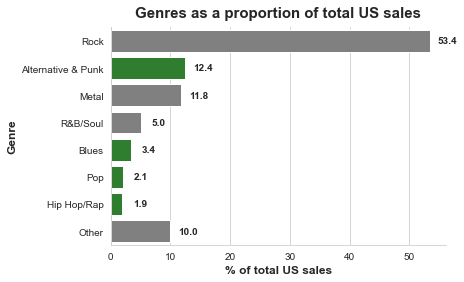

In [16]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
colors = ("forestgreen" if y in g_list else "grey" for y in genre_sold['genre_name'])
ax = sns.barplot(x=genre_sold['tracks_sold_percentage'], y=genre_sold['genre_name'],
                 orient='h', palette = colors)
ax.set_title('Genres as a proportion of total US sales', fontweight='bold', fontsize=15, pad=10)
ax.set_xlabel('% of total US sales', fontweight='bold', fontsize=12)
ax.set_ylabel('Genre', fontweight='bold', fontsize=12)
sns.despine()
for rect in ax.patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
        label_text = '{:.1f}'.format(width)
    
    # ax.text(x, y, text)
        label_x = x + width + 3
        label_y = y + height / 2
    
    # only plot labels greater than given width
        if width > 0:
            ax.text(label_x, label_y, label_text, ha='center', 
                    va='center', fontsize=10, fontweight='bold');

Based upon the best selling genres for our US customers, I would **recommend** purchasing Red Tone (Punk), Slim Jim Bites (Blues), and Meteor and the Girls (Pop).

However, whilst Punk is a popular genre for customers, the other three genres (Blues, Pop, Hip-Hop) only comprise 7.4% of total US sales. It may be worth putting more advertising budget onto the Punk album, as it is likely to be popular with existing American customers, and consider the advertising on the other artists as a form of marketing aimed at attracting new customers with different music tastes.

To increase sales quickly, it'd also be better to find a new Rock artist/album, as these make up 53% of sales.

## Q2. How are sales staff performing? <a id="q_2"></a>

**Scenario:**

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. You have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

In [17]:
%%sql
SELECT *
FROM employee;

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2016-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2017-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2017-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [18]:
%%sql
SELECT DISTINCT(support_rep_id)
FROM customer;

 * sqlite:///chinook.db
Done.


support_rep_id
3
4
5


So the three employees who are assigned to customers are:
* Jane Peacock
* Margaret Park
* Steve Johnson

In [19]:
%%sql
-- Table of all the sales by support rep id
WITH rep_sales AS
                (
                SELECT 
                    c.support_rep_id,
                    SUM(i.total) total_sales
                FROM customer c
                INNER JOIN invoice i ON i.customer_id = c.customer_id
                GROUP BY 1
                )
-- Joins above table to employee table
    SELECT
    employee_id,
    first_name || " " || last_name employee_name,
    birthdate,
    hire_date,
    ROUND(r.total_sales,2) "total_sales ($)"
FROM employee e
INNER JOIN rep_sales r ON r.support_rep_id = e.employee_id
ORDER BY 5 DESC;

 * sqlite:///chinook.db
Done.


employee_id,employee_name,birthdate,hire_date,total_sales ($)
3,Jane Peacock,1973-08-29 00:00:00,2017-04-01 00:00:00,1731.51
4,Margaret Park,1947-09-19 00:00:00,2017-05-03 00:00:00,1584.0
5,Steve Johnson,1965-03-03 00:00:00,2017-10-17 00:00:00,1393.92


In [20]:
#Passing SQL output to a dataframe
result = _
sales_staff = result.DataFrame()
print(sales_staff.shape)

(3, 5)


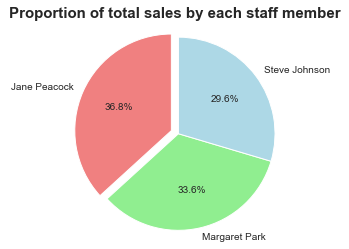

In [21]:
fig, ax = plt.subplots()
explode = (0.08,0,0) #Only explode out the first wedge
ax.pie(sales_staff['total_sales ($)'], labels=sales_staff['employee_name'],
       autopct='%1.1f%%', colors = ['lightcoral', 'lightgreen', 'lightblue'], 
       startangle=90, explode=explode)
ax.axis('equal')
ax.set_title('Proportion of total sales by each staff member', fontweight='bold', fontsize=15);

**The total sales are linked to the hire date of the employee, with sales increasing the longer the employee has been at the firm.** This is unsurprising and given how each sales staff joined a few months after the previous hire, the differences in their sales figures are expected.

## Q3. How are sales varying by country? <a id="q_3"></a>

In [22]:
%%sql
-- Creates a table with the number of customers, orders, and total sales grouped by country
WITH country_table AS
                    (
                    SELECT
                        CASE
                        /* If a country has only 1 customer, label it as Other so can be
                        grouped into category 'Other' */
                            WHEN (
                                    SELECT COUNT(*)
                                    FROM customer
                                    WHERE country=c.country
                                 ) = 1 THEN "Other"
                            ELSE c.country
                        END AS country_name,
                        COUNT(DISTINCT i.customer_id) number_customers,
                        SUM(i.total) total_sales,
                        COUNT(DISTINCT i.invoice_id) number_orders
                    FROM customer c
                    INNER JOIN invoice i ON i.customer_id = c.customer_id
                    GROUP BY country_name
                    )
-- Now calculate summary statistics based upon country_table
SELECT
    country_name,
    number_customers,
    ROUND(total_sales,2) "total_sales ($)",
    number_orders,
    ROUND(CAST(total_sales as Float) / CAST(number_customers as Float),
          2) sales_per_customer,
    ROUND(CAST(total_sales as Float) / CAST(number_orders as Float),
         2) order_value
FROM
    (
    SELECT
        ct.*,
        CASE
        /* Assign a 1 to Other and 0 to all other countries. This way can sort the countries
        so that Other is at the bottom */
            WHEN country_name = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_table ct
    )
ORDER BY sort ASC, "total_sales ($)" DESC

 * sqlite:///chinook.db
Done.


country_name,number_customers,total_sales ($),number_orders,sales_per_customer,order_value
USA,13,1040.49,131,80.04,7.94
Canada,8,535.59,76,66.95,7.05
Brazil,5,427.68,61,85.54,7.01
France,5,389.07,50,77.81,7.78
Germany,4,334.62,41,83.66,8.16
Czech Republic,2,273.24,30,136.62,9.11
United Kingdom,3,245.52,28,81.84,8.77
Portugal,2,185.13,29,92.57,6.38
India,2,183.15,21,91.58,8.72
Other,15,1094.94,147,73.0,7.45


Sales are highest in the US where we have the most customers.

Based on this analysis it would be worth looking into increasing the number of customers from the:

* Czech Republic;
* Portugal; and
* India.

**These countries have the highest sales per customer.** However the sample size is small so it may be worth investing a small amount in marketing and advertising for these countries first.

## Q4. Are customers purchasing whole albums or just individual tracks? <a id="q_4"></a>

**Scenario:**

The Chinook store is setup in a way that allows customer to make purchases in one of the two ways:

 1. purchase a whole album
 2. purchase a collection of one or more individual tracks.

The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

Find what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

In [23]:
%%sql
/* For each invoice choose a track (it does not matter which due to the nature of the shop) 
and find the album_id for it */
WITH invoice_album AS (SELECT
                            invoice_id,
                            MIN(il.track_id) track_id,
                            t.album_id album_to_match
                        FROM invoice_line il
                        INNER JOIN track t ON t.track_id = il.track_id
                        GROUP BY 1
                        ),
/* For each invoice:
    1. List all the tracks that were purchased.
    2. Find all the tracks from the album associated with a chosen track from that invoice.
    3. Compare the track lists to each other in both directions. If both return null 
        when compared, then a full album has been purchased, otherwise it is individual tracks.

Then return each invoice_id along with whether it is an album purchase or not. */

    album_or_track AS (SELECT
                        invoice_id,
                        CASE
                            WHEN (
                                ( -- Select all tracks from each invoice
                                SELECT il.track_id 
                                FROM invoice_line il
                                WHERE ia.invoice_id = il.invoice_id
                                EXCEPT
                                -- Select all tracks for the relevant album
                                SELECT t.track_id
                                FROM track t
                                WHERE album_id = ia.album_to_match
                                ) IS NULL
                                AND
                                -- Now must check it the other way round
                                (
                                -- Select all tracks for the relevant album
                                SELECT t.track_id
                                FROM track t
                                WHERE album_id = ia.album_to_match
                                EXCEPT
                                -- Select all tracks from each invoice
                                SELECT il.track_id
                                FROM invoice_line il
                                WHERE ia.invoice_id = il.invoice_id
                                ) IS NULL ) THEN "Album"
                            ELSE "Individual tracks"
                        END AS purchase_type
                        FROM invoice_album ia
                        GROUP BY invoice_id
                      )
--Show number and proportion of total invoices that were album/non-album purchases
SELECT
    purchase_type,
    COUNT(purchase_type) number_of_invoices,
    ROUND(CAST(COUNT(purchase_type) as Float) / 
         CAST((SELECT COUNT(*) FROM invoice_album) as Float) * 100,
          2) percentage_total_purchases
FROM album_or_track
GROUP BY purchase_type


 * sqlite:///chinook.db
Done.


purchase_type,number_of_invoices,percentage_total_purchases
Album,114,18.57
Individual tracks,500,81.43


Album purchases make up almost a fifth of invoices. Therefore I would **recommend** that management does not adopt the strategy of purchasing only selected tracks, as it could lead to a large fall in revenue.

## Q5. Is the range of tracks in the store reflective of their sales popularity? <a id='q_5'></a>

**Scenario:**

So management realise that switching to selling individual tracks would be a bad strategy. However, it may be that we are stocking genres that are not popular with customers and so are incurring unnecessary costs from buying and updating them. So which genres do we sell the most of, and does that match their proportion in our stock catalogue?

In [24]:
%%sql
/* Firstly calculate the number and proportion of tracks in stock for each genre */

WITH genre_stock AS (
                    SELECT
                        g.name genre,
                        COUNT(t.track_id) tracks_in_stock,
                        ROUND(CAST(COUNT(t.track_id) AS Float) / 
                             CAST((SELECT COUNT(DISTINCT track_id) FROM track) AS Float) * 100,
                             2) percentage_of_stock
                    FROM track t
                    INNER JOIN genre g ON g.genre_id = t.genre_id
                    GROUP BY 1
                    ORDER BY 2 DESC
                    ),
/* Secondly calculate the number and proportion of tracks sold for each genre */
    genre_sales AS  (
                    SELECT
                        g.name genre,
                        SUM(il.quantity) tracks_sold,
                        ROUND(CAST(SUM(il.quantity) AS Float) / 
                             CAST((SELECT SUM(quantity) FROM invoice_line) AS Float) * 100,
                              2) percentage_of_sales
 
                    FROM invoice_line il
                    INNER JOIN track t on t.track_id = il.track_id
                    INNER JOIN genre g on g.genre_id = t.genre_id
                    GROUP BY 1
                    ORDER BY 2 DESC
                    )
SELECT
    gst.*,
    gsa.tracks_sold,
    gsa.percentage_of_sales
FROM genre_stock gst
LEFT JOIN genre_sales gsa ON gsa.genre = gst.genre;

 * sqlite:///chinook.db
Done.


genre,tracks_in_stock,percentage_of_stock,tracks_sold,percentage_of_sales
Rock,1297,37.03,2635,55.39
Latin,579,16.53,167,3.51
Metal,374,10.68,619,13.01
Alternative & Punk,332,9.48,492,10.34
Jazz,130,3.71,121,2.54
TV Shows,93,2.65,2,0.04
Blues,81,2.31,124,2.61
Classical,74,2.11,47,0.99
Drama,64,1.83,1,0.02
R&B/Soul,61,1.74,159,3.34


In [25]:
#Assign SQL output to a python variable
result = _

In [26]:
genre = result.DataFrame()

In [27]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genre                25 non-null     object 
 1   tracks_in_stock      25 non-null     int64  
 2   percentage_of_stock  25 non-null     float64
 3   tracks_sold          18 non-null     float64
 4   percentage_of_sales  18 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


So the genres where no tracks have been sold have been converted to NaN values. For the purpose of this numerical analysis it makes sense to convert them to 0 values.

In [28]:
genre = genre.fillna(0)

In [29]:
#Sort df by % of sales so can plot neatly, and reset index
genre_sorted = genre.sort_values(by='percentage_of_sales')

In [30]:
genre_sorted.reset_index(drop=True, inplace=True)

In [31]:
#Get list of genres for plotting labels
genres = list(genre_sorted['genre'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


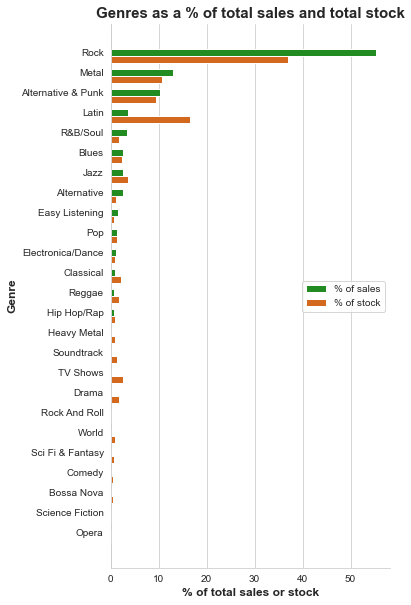

In [32]:
#Plot the results
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5,10))


y_pos = np.arange(len(genre_sorted['genre'])) #Set y axis positions
width = 0.35 #width of the bars
#Insert both bars
sales_bars = ax.barh(y_pos + width, genre_sorted['percentage_of_sales'], 
                     height=width, label='% of sales', color='forestgreen')
stock_bars = ax.barh(y_pos, genre_sorted['percentage_of_stock'], 
                     height=width, label='% of stock', color='chocolate')

ax.set(yticklabels=genres, yticks=y_pos+width)
ax.set_ylabel('Genre', fontweight='bold', fontsize=12)
ax.set_xlabel('% of total sales or stock', fontweight='bold', fontsize=12)
ax.grid(b=None, axis='y')
ax.legend(loc=5)
sns.despine()
ax.set_title('Genres as a % of total sales and total stock', fontweight='bold', fontsize=15);

It's clear from the graph that there is a mismatch between the amount of stock held for some genres and their sales popularity.

Based on the above analysis, here are some **recommendations** for management:

1. Rock tracks make up over 55% of sales and yet represent only 37% of stock. It may be that increasing the variety of rock tracks will generate more sales given the genre's popularity with customers. A follow-on research question from this is whether the popularity of rock tracks represents a population-wide preference, or whether the store attracts rock music fans given its wide variety of tracks?

2. Latin tracks comprise 16% of stock but only 3% of sales. It seems unprofitable to add any more Latin genre tracks to the store unless customer tastes are expected to shift favourably towards them in future.

3. It would be useful to consider surveying customers who have purchased music from the genres: Metal, Alternative & Punk, and R&B/Soul. For those genres sales outstrip stock proportions so it may be that there is an untapped demand for more tracks from existing customers.

4. Many of the other genres have minimal sales so there should be no more purchases of them, both to save costs and increase the focus of the store.

## Q6. How many tracks have been purchased vs not purchased? <a id='q_6'></a>

**Scenario:**

Based on the above analysis it appears that there are a number of genres where no tracks have ever been sold. To investigate this further I will calculate how many tracks have ever been purchased versus those that haven't.

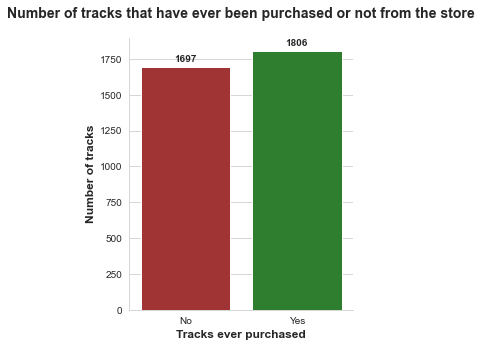

In [33]:
purchase_query = """
/* Firstly return a table of all tracks and whether they have ever appeared in an invoice */
WITH track_purchased AS (
                        SELECT
                            t2.track_id,
                            CASE --If track_id has not appeared in an invoice then No else Yes
                                WHEN (
                                      SELECT DISTINCT t.track_id
                                      FROM track t
                                      INNER JOIN invoice_line il ON il.track_id = t.track_id
                                      WHERE t.track_id = t2.track_id
                                        ) IS NULL THEN "No"
                                ELSE "Yes"
                            END AS ever_purchased,
                            g.name genre
                        FROM track t2
                        LEFT JOIN genre g ON g.genre_id = t2.genre_id
                        GROUP BY 1)

/* Summarises the number and proportion of tracks that either have been or never been purchased */
SELECT
    ever_purchased,
    COUNT(ever_purchased) number_of_tracks,
    ROUND(CAST(COUNT(ever_purchased) AS Float) / 
         CAST((SELECT COUNT(DISTINCT track_id) FROM track) AS Float) * 100, 
          1) percentage_total_tracks
FROM track_purchased tp
GROUP BY 1;
"""
conn = sqlite3.connect("chinook.db")
purchased = pd.read_sql_query(purchase_query, conn)

fig, ax = plt.subplots(figsize=(4,5))
# xn = range(len(purchased['ever_purchased'])) #Map string labels (Yes,No) to integers for plt
# ax.bar(xn, purchased['number_of_tracks'])
colors = ("firebrick" if x == "No" else "forestgreen" for x in purchased['ever_purchased'])
ax = sns.barplot(x=purchased['ever_purchased'], y=purchased['number_of_tracks'], 
                 palette = colors)
ax.set_xlabel('Tracks ever purchased', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of tracks', fontweight='bold', fontsize=12)
ax.set_title('Number of tracks that have ever been purchased or not from the store', 
             fontweight='bold', fontsize=14, pad=20)
sns.despine()
#Attach labels with the number of tracks above each bar
for rect in ax.patches:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold');

So **over 45% of tracks in the store have never been purchased**. This suggests that management could save money by not stocking certain tracks, and should focus on artists/albums that are more popular with existing customers.

Finally, based on earlier analysis, it is worth checking whether tracks from specific genres are overrepresented in the segment that have never been purchased.

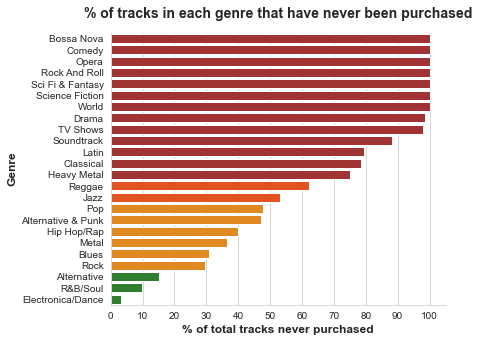

In [34]:
genre_purchase_query = """
/* Firstly return a table of all tracks and whether they have ever appeared in an invoice */
WITH track_purchased AS (
                        SELECT
                            t2.track_id,
                            CASE --If track_if has not appeared in an invoice then No else Yes
                                WHEN (
                                      SELECT DISTINCT t.track_id
                                      FROM track t
                                      INNER JOIN invoice_line il ON il.track_id = t.track_id
                                      WHERE t.track_id = t2.track_id
                                        ) IS NULL THEN "No"
                                ELSE "Yes"
                            END AS ever_purchased,
                            g.name genre
                        FROM track t2
                        LEFT JOIN genre g ON g.genre_id = t2.genre_id
                        GROUP BY 1)

/* Returns the number and proportion of tracks never purchased for each genre */
SELECT
    tp.genre,
    COUNT(tp.track_id) number_never_purchased,
    ROUND(CAST(COUNT(tp.track_id) AS Float) / 
         CAST((SELECT COUNT(t.track_id) FROM track t
               INNER JOIN genre g ON g.genre_id = t.genre_id
               WHERE g.name = tp.genre
               GROUP BY g.name
                ) AS Float) * 100, 2) percent_never_purchased
FROM track_purchased tp
WHERE tp.ever_purchased = "No"
GROUP BY 1
ORDER BY 3 DESC, 1;
"""
conn = sqlite3.connect("chinook.db")
genre_purchase = pd.read_sql_query(genre_purchase_query, conn)

fig, ax = plt.subplots(figsize=(6,5))
colors = ("firebrick" if x >= 75.0 
          else "orangered" if x >= 50.0 and x <75.0 
          else "darkorange" if x >= 25.0 and x < 50.0 
          else "forestgreen" for x in genre_purchase['percent_never_purchased'])
ax = sns.barplot(x=genre_purchase['percent_never_purchased'], y=genre_purchase['genre'],
                orient='h', palette=colors)
sns.despine()
ax.set_title('% of tracks in each genre that have never been purchased', fontweight='bold', 
             fontsize=14, pad=15)
ax.set_xlabel('% of total tracks never purchased', fontweight='bold', fontsize=12)
ax.set_ylabel('Genre', fontweight='bold', fontsize=12)
ax.set_xticks([0.,10.,20.,30.,40.,50.,60.,70.,80.,90.,100.]);

Charting the percentage of tracks that have never been purchased by genre shows that there are a large number of genres where not a single track has ever been purchased.

My **recommendations** would be to:

1. Not stock tracks from any genre that has never had a track purchased (those with 100% on the graph above).
2. Promote unsold tracks in Rock, Metal, and Alternative & Punk as they are popular genres with customers.
3. Consider stocking more tracks from popular artists in the Alternative, R&B/Soul, and Electronica/Dance genres, because most of those tracks have been purchased at least once.

## Concluding remarks

The Chinook store would benefit from an increased focus on its most popular genres such as Rock. Stocking more albums in popular genres is likely to increase sales, while costs can be reduced through not stocking tracks in certain under-performing genres. To expand sales it would be worth surveying existing customers to understand their music tastes, and stock popular albums in genres which show signs of positive growth.